# Part I - Determinants of Loan Outcome Status in Prosper P2P Loan Data
<a id="contents"></a>
## by Cvetana Decheva


1. [Introduction](#intro)


2. [Preliminary Wrangling](#prelim)
    
      
3. [Dataset Description and Variables of Interest](#voi)

3.1. [Structure of the Prosper Dataset](#structure)
    
3.2. [Main Feature of Interest: Loan Outcome Status (Repaid vs. Not Repaid)](#dv)
    
3.3. [Variables that Support the Investigation of the Loan Outcome Status](#iv)

3.3.1. [Borrower Assessment](#rating)
        
3.3.2. [Loan Characteristics](#loan)
        
3.3.3. [Borrower Characteristics](#income)
        
3.3.4. [Borrower Credit History](#history)
        
3.3.5. [Borrower Indebtedness](#debt)
      
      
4. [Cleaning and Wrangling Issues (Description)](#cleaning)


5. [Cleaning and Wrangling Solutions](#solutions)


6. [Univariate Exploration](#univar)

6.1 [Preliminary Exploration](#preex)

6.2 [Feature Engineering](#feature)
   
6.2.1. [Categorical Transformation of Highly Skewed Count Data](#feature1)
   
6.2.2. [Categorical Transformation of Highly Skewed or Multimodal Continuous Variables](#feature2)
   
6.2.3. [Categorical Transformation of Continuous Variables by Constant Increment](#feature3)
   
6.3 [Univariate Exploration Organized by Variable Groups](#univar1)

6.3.1 [Dependent Variable: Loan Outcome Status](#xoutcome)
   
6.3.2 [Borrower Assessment Variables](#xba)
      
6.3.3 [Loan Characteristics](#xloanchar)
      
6.3.4 [Borrower Characteristics](#xbch)
      
6.3.5 [Borrower Credit History Variables](#xhistory)   
        
6.3.6 [Borrower Indebtedness](#xdti)


7. [Bivariate and Multivariate Exploration](#xbiv)

7.1. [Relationships between predictor variables](#xpred)

7.1.1 [Borrower Assessment Variables](#xba1)
   
7.1.2 [Loan Characteristics](#xloanchar1)
   
7.1.3 [Borrower Characteristics](#xbch1)
   
7.1.4 [Borrower Credit History Variables, Borrower Indebtedness](#xhistorydti1)

7.1.5 [Correlations across Predictor Variable Categories](#xpred1)

7.2. [Relationship of Outcome Variable to Predictor Variables](#xbiv1)

7.2.1 [Borrower Assessment Variables](#xba2)
   
7.2.2 [Loan Characteristics](#xloanchar2)
   
7.2.3 [Borrower Characteristics](#xbch2)
   
7.2.4 [Borrower Credit History Variables, Borrower Indebtedness](#xhistorydti2)
   
7.2.5 [Chi-Square Test of Independence between Loan Outcome and Ordinal Predictor Variables](#chisq)

7.3. [Relationship of Loan Outcome Status to Predictor Variables Grouped by Loan Purpose](#grbylp)

7.3.1 [Borrower Assessment Variables](#xba3)
   
7.3.2 [Loan Characteristics](#xloanchar3)
   
7.3.3 [Borrower Characteristics](#xbch3)
   
7.3.4 [Borrower Credit History Variables, Borrower Indebtedness](#xhistorydti3)
   
8. [Conclusions](#conclusions)

## 1. Introduction
<a id="intro"></a>

Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money <a name="prosperwiki"><sup>1</sup></a>.

<sup>[1](#prosperwiki)</sup> [Prosper Wikipedia](https://en.wikipedia.org/wiki/Prosper_Marketplace)

The data set used in this report contains 113,937 loans with 81 variables on each loan. The last update was made on 03.11.2014

[Data Source](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv)

[Variable Dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

## 2. Preliminary Wrangling
<a id="prelim"></a>

In [1]:
# import all packages and set plots to be embedded inline
# set base color
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as ss
import itertools as it
pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline
base_color = sb.color_palette()[0]

In [2]:
# reading in data:
prosper_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# rows and columns:
prosper_df.shape

(113937, 81)

In [4]:
# remove limit on displayed rows to show whole series:
pd.set_option('display.max_rows', None)
#show data types
prosper_df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [5]:
#display nulls:
prosper_df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
#limit displayed rows again
pd.set_option('display.max_rows', 50)

In [7]:
# display all columns
pd.set_option('display.max_columns', None)
# All variables are displayed below:
prosper_df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00        0.165   
1         NaN    36    Current                  NaN        0.120   
2          HR    36  Completed  2009-12-17 00:00:00        0.283   
3         NaN    36    Current                  NaN        0.125   
4         NaN    36    Current                  NaN        0.246   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0         0.158        0.138                      NaN            NaN   
1         0.092        0.082                    0.080          0.025   
2         0.275        0.240                      NaN            NaN   
3         0.097        0.087                    0.085          0.025   
4         0.208        0.199                    0.183          0.092   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1            0.055                    6.000                     A   
2              NaN                      NaN                   NaN   
3            0.060                    6.000                     A   
4            0.091                    3.000                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1         7.000                          2            CO   Professional   
2           NaN                          0            GA          Other   
3         9.000                         16            GA  Skilled Labor   
4         4.000                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                     2.000                 True   
1         Employed                    44.000                False   
2    Not available                       NaN                False   
3         Employed                   113.000                 True   
4         Employed                    44.000                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                640.000                659.000     2001-10-11 00:00:00   
1                680.000                699.000     1996-03-18 00:00:00   
2                480.000                499.000     2002-07-27 00:00:00   
3                800.000                819.000     1983-02-28 00:00:00   
4                680.000                699.000     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0               5.000            4.000                      12.000   
1              14.000           14.000                      29.000   
2                 NaN              NaN                       3.000   
3               5.000            5.000                      29.000   
4              19.000           19.000                      49.000   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [8]:
# set back limit on columns:
pd.set_option('display.max_columns', 30)

We copied the original data for **cleaning**.

In [9]:
prosper_df_copy = prosper_df.copy()

# 3. Dataset Description and Variables of Interest
<a id="voi"></a>
[back to table of contents](#contents)

### 3.1 Structure of the Prosper Dataset
<a id="structure"></a>

The original dataset contains 113937 records and 81 variables. The variables are described in a data dictionary. The links are provided in point 1 above.

### 3.2 Main Feature of Interest: Loan Outcome Status (Repaid vs. Not Repaid)
<a id="dv"></a>

The loan outcome status variable contains multiple categories. They can be separated into ongoing (or current) loans and past (or completed) loans. There are several categories of past/completed loans, which can be compressed to two: repaid vs. not repaid.

### 3.3 Variables that Support the Investigation into the Loan Outcome Status
<a id="iv"></a>


[Serrano-Cinca, Gutierrez-Nieto & Lopez-Palacios (2015)](https://www.researchgate.net/publication/282426542_Determinants_of_Default_in_P2P_Lending) <a name="plosOnepaper"><sup>2</sup></a> investigated the variables determining default in the database of another p2p credit enterprise. They grouped the variables together in the following manner:

#### 3.3.1 Borrower Assessment
<a id="rating"></a>

**Borrower Assessment** consists of customer credit rating and loan interest rate. *The **interest rate** acts as another form of assessment of a customer's credibility and as such is expected to show a high positive correlation to the customer credit rating.*

Prosper uses two different customer scoring systems (one consisting of 7 grades and another consisting of 10 grades) and, additionally, a customer credit score range provided by a consumer credit rating agency.

#### 3.3.2 Loan Characteristics 
<a id="loan"></a>

The characteristics of a loan are its **purpose** and **amount**.

The loan characteristics are represented by the Prosper variables 'ListingCategory' (i.e., loan purpose) and 'LoanOriginalAmount'.

ListingCategory has 20 categories plus a "null" category ("Not available").

There is a fairly clear hypothesis related to the relationship between loan purpose and the probability of default, i.e., consumer loans (e.g., a wedding loan) are generally less risky than a loan for a small business.

The relationship between the loan amount and the probability of default is less clear (some studies show a positive correlation, while others show a negative correlation). 

#### 3.3.3 Borrower Characteristics
<a id="income"></a>

The borrower characteristics are **income**, **housing** and **employment**.

Prosper records data on monthly income ('StatedMonthlyIncome'), which is also represented as an ordinal variable ('IncomeRange'). Furthermore, a boolean variable ('IncomeVerifiable') signifies whether the stated income is verifiable by documents.

#### 3.3.4 Borrower Credit History
<a id="history"></a>

Borrower credit history is characterized by:

   1) Time since first loan (i.e., credit history lenght) and number of total and open loans;

   2) Number of open revolving accounts and the monthly payment on those;

   3) "Revolving Utilization": "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit";

   4) Current delinquencies, number of past delinquencies and amount of delinquencies on loans;

   5) Number of inquiries by creditors (totally and for a current period);

   6) Derogatory public records (Prosper saves data for the last 12 months and for the last 10 years).
   
   The Prosper data set does not contain a "revolving utilization" variable. There is a variable 'BankcardUtilization' ("the percentage of available revolving credit that is utilized at the time the credit profile was pulled.") which could be construed as revolving utilization rate. 
   
   The rest of the credit history variables are represented in the Prosper data set.  

#### 3.3.5 Borrower Indebtedness 
<a id="debt"></a>

Borrower Indebtedness variables are the following: loan amount to annual income, annual payment to annual income and debt to income ratio.

The Prosper data set only contains one of these three variables: 'DebtToIncomeRatio'.

#### Additionally, 
the loan term could be one of the factors determining default rate, especially in combination with other variables.

<sup>[2](#plosOnepaper)</sup> [Serrano-Cinca, C., Gutiérrez-Nieto, B., & López-Palacios, L. (2015). Determinants of default in P2P lending. PloS one, 10(10), e0139427.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0139427)

# 4. Cleaning and Wrangling Issues (Description)
<a id="cleaning"></a>
[back to table of contents](#contents)

## Cleaning/Wrangling Issue #1
A few ordinal variables of interest, including 'CreditGrade', 'ProsperRating (Alpha)' and 'IncomeRange', are of data type 'object'. We should change them to ordinal categorical variables. The levels of 'EmploymentStatus' should also be arranged in a meaningful way (although it is not an ordinal variable).

## Cleaning/Wrangling Issue #2 
There are three **credit rating variables** (apart from the professional rating scores 'CreditScoreRangeLower' & 'CreditScoreRangeUpper'): 

  - the variable 'CreditGrade' contains only records made **until July 2009**, 
  - 'ProsperRating (Alpha)' and its "clone" 'ProsperRating (numeric)' both apply only to records made **since July 2009**, and 
  - 'Prosper Score' is a 'custom risk score built using historical Prosper data' (according to variable dictionary), it has 10 levels and has been used **since July 2009**.

    According to the variable dictionary, 'Prosper Score'has 10 levels, however, quite a few borrowers have a value of 11 on that variable. After examining these borrowers' 7-level credit score, we suppose that this is a mistake and the real score of these borrowers should be 10.
    
    'CreditGrade' and 'ProsperRating (Alpha)' both have 7 levels, although 'CreditGrade' has an additional level 'NC' which probably corresponds to the 0 of 'ProsperRating (numeric)' and could stand for "no credit (history)". 

## Cleaning/Wrangling Issue #3
The loan term variable, 'Term', is of the data type 'integer', however, there are only three possible terms and we are not interested in mean/median loan term as outcome variable, which is why it should be regarded as an ordinal variable. Therefore, we created an additional ordinal variable, 'term_ordinal', with three ordered string values: '12 months', '36 months', '60 months'.

## Cleaning/Wrangling Issue #4
The **loan purpose** is represented by the variable 'ListingCategory (numeric)'. The labels of the categories can be found in the variable dictionary. We created a new categorical variable 'loan_purpose' with labeled categories.

## Cleaning/Wrangling Issue #5
There is no variable 'credit history lenght', but it can be calculated from these two other variables: 'FirstRecordedCreditLine' and 'ListingCreationDate'.

## Cleaning/Wrangling Issue #6
**Shrink the data set**

### Cleaning/Wrangling Issue #6.1
The main variable of interest, 'LoanStatus', has multiple values: 'Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'PastDue'. However, in order to answer the research question about factors that determine default, we are only going to investigate loans whose outcome is known (closed loans). In the current data set, closed loans are coded as 'cancelled', 'completed' (meaning repaid), 'defaulted' and 'charged-off'. There is a difference between defaulted and charged-off, however, for our purposes, both can be merged into one category, 'not repaid'. The cancelled loans are a very small group, which does not really contribute to the investigation, therefore, it can be dropped. 

### Cleaning/Wrangling Issue #6.2
We are going to **exclude** closed loans where the borrowers were rated according to the old 7-level rating ('CreditGrade'): 

  - the variable 'CreditGrade' contains only records made **until July 2009**, 
  - 'ProsperRating (Alpha)' and its "clone" 'ProsperRating (numeric)' both apply only to records made **since July 2009**
    
When we inspect the distribution of the scores before and after July 2009 (Issue # 2), they seem to be slightly different. Unfortunately, we cannot be sure whether the difference is due to different borrower characteristics before and after 2009 or to different scoring criteria. Therefore, for the sake of correctness, we should **only investigate scores from July 2009 on**, because this is when the **current rating system** was first implemented.

### Cleaning/Wrangling Issue #6.3
The data set contains a lot of variables that we are not going to investigate, therefore, we are going to save a new dataframe with less variables.

### Cleaning/Wrangling Issue #6.4
Additionally, we are going to **remove** any rows containing nulls in the (independent) variables of interest.

## Cleaning/Wrangling Issue #7
After shrinking the dataset to the records we want to analyze, the 'loan purpose' variable contains one empty category ('personal loan') and another one with very few records ('not available'). We are going to exclude both.

# 5. Cleaning and Wrangling Solutions
<a id="solutions"></a>
[back to table of contents](#contents)

## Cleaning/Wrangling Issue #1
[back to table of contents](#contents)

The levels of 'CreditGrade', 'ProsperRating (Alpha)', 'IncomeRange' and 'EmploymentStatus' are unordered.

In [10]:
# convert CreditGrade, ProsperRating (Alpha), EmploymentStatus and IncomeRange into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'IncomeRange': ['Not displayed', 'Not employed', 
                                    '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                    '$75,000-99,999', '$100,000+'],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Part-time', 'Self-employed', 
                                        'Not employed', 'Retired', 'Other', 'Not available']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosper_df_copy[var] = prosper_df_copy[var].astype(ordered_var)

## Cleaning/Wrangling Issue #2

[back to table of contents](#contents)
    
There are several borrower credit rating variables. Three of them were created by Prosper ('CreditGrade', 'ProsperRating (Alpha)'/'ProsperRating (numeric)', and 'ProsperScore'), and two are from a professional consumer credit rating agency ('CreditScoreRangeLower' and 'CreditScoreRangeUpper'). 

'CreditGrade', 'ProsperRating (Alpha)'/'ProsperRating (numeric)' have 7 levels, while 'ProsperScore' has 10 (according to variable dictionary).

   ### Cleaning/Wrangling Issue # 2.1: 7-level score
**'CreditGrade'** is an ordinal customer credit rating by Prosper applied **until July 2009**.

'CreditGrade' has 7 levels plus NC, which probably stands for no credit history.

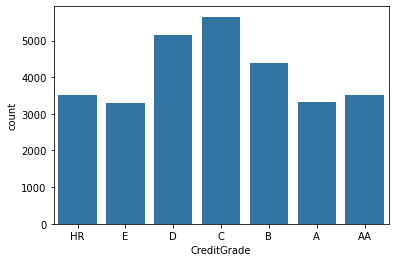

In [11]:
sb.countplot(data=prosper_df_copy, x='CreditGrade', color=base_color);

The customer rating applied after July 2009, **'ProsperRating (Alpha)'**, has the same categories (except "NC" is now NaN), but the proportions seem to be different:

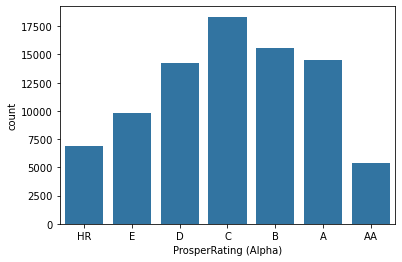

In [12]:
sb.countplot(data=prosper_df_copy, x='ProsperRating (Alpha)', color=base_color);

When we compare the bar charts, we see that the older scoring system has heavier "tails" (relatively more customers were rated with extremely high or low grades) compared to the system used from July 2009 onward. Hence the decision to analyze only new data (since July 2009).

### Cleaning/Wrangling Issue # 2.2: 10-level score

[back to table of contents](#contents)

**'Prosper Score'** is a custom risk score built using historical Prosper data (after July 2009). 

**'ProsperScore'** is supposed to be a scale from 1 to 10 (worst to best rating). However, 1456 customers were rated with 11.

In [13]:
prosper_df_copy['ProsperScore'].value_counts()

4.000     12595
6.000     12278
8.000     12053
7.000     10597
5.000      9813
3.000      7642
9.000      6911
2.000      5766
10.000     4750
11.000     1456
1.000       992
Name: ProsperScore, dtype: int64

In [14]:
# display only customers who scored 11
pscore11 = prosper_df_copy.query("ProsperScore == 11")
pscore11.loc[:, ['LoanStatus', 'CreditGrade', 'ProsperRating (Alpha)']].sample(20)

LoanStatus CreditGrade ProsperRating (Alpha)
18083     Current         NaN                    AA
8126      Current         NaN                    AA
80952     Current         NaN                    AA
102122    Current         NaN                    AA
19423     Current         NaN                    AA
75274     Current         NaN                    AA
82713     Current         NaN                    AA
45897     Current         NaN                     A
99284     Current         NaN                     A
42099     Current         NaN                     A
18035     Current         NaN                     A
30611     Current         NaN                     B
42562     Current         NaN                     A
43996     Current         NaN                     A
13627     Current         NaN                    AA
30802     Current         NaN                    AA
40293     Current         NaN                    AA
52979     Current         NaN                     B
31728     Current         NaN                    AA
6411      Current         NaN                    AA

In [15]:
pscore11['ProsperRating (Alpha)'].value_counts()

AA    739
A     521
B     171
C      25
HR      0
E       0
D       0
Name: ProsperRating (Alpha), dtype: int64

Looks like 11 = 10: most of the 1456 customers have an "A" or "AA" rating, similar to customers rated 10:

In [16]:
# display only customers who scored 10
pscore10 = prosper_df_copy.query("ProsperScore == 10")
pscore10['ProsperRating (Alpha)'].value_counts()

AA    2645
A     1394
B      492
C      196
E       13
D        7
HR       3
Name: ProsperRating (Alpha), dtype: int64

It would therefore be correct to **replace 11 by 10.**

In [17]:
# replace 'ProsperScore' 11 by 10:
prosper_df_copy['ProsperScore'] = prosper_df_copy['ProsperScore'].replace(11, 10)
prosper_df_copy['ProsperScore'].value_counts()

4.000     12595
6.000     12278
8.000     12053
7.000     10597
5.000      9813
3.000      7642
9.000      6911
10.000     6206
2.000      5766
1.000       992
Name: ProsperScore, dtype: int64

### Cleaning/Wrangling Issue #2.3: 'CreditScoreRangeLower' & 'CreditScoreRangeUpper'

[back to table of contents](#contents)

'CreditScoreRangeLower' and 'CreditScoreRangeUpper' are the upper and lower bound of borrower credit rating provided by a professional consumer credit rating agency. There is a perfect correlation between the lower and the upper bound, therefore, only the upper bound suffices for answering the research question about default.

Credit scores<a name="investopedia"><sup>3</sup></a>  are computed using a formula that considers factors such as payment history, overall debt levels, and the number of credit accounts the individual has open. A score between 740 and 850 suggests the individual has been consistently responsible, while scores between 700 to 750 are considered above average. Individuals with low credit scores, below 600, can take steps to improve them such as making payments on time, cutting down debt levels, and maintaining a zero balance on unused credit accounts. 

<sup>[3](#investopedia)</sup> [Credit Score Ranges: What Do They Mean?](https://www.investopedia.com/articles/personal-finance/081514/what-do-credit-score-ranges-mean.asp)

In [18]:
prosper_df_copy['CreditScoreRangeLower'].describe()

count   113346.000
mean       685.568
std         66.458
min          0.000
25%        660.000
50%        680.000
75%        720.000
max        880.000
Name: CreditScoreRangeLower, dtype: float64

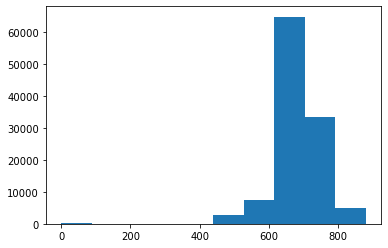

In [19]:
#prosper_df_copy_interest = prosper_df_copy[np.isfinite(prosper_df_copy['Borrower
prosper_df_copy_CSlow = prosper_df_copy[np.isfinite(prosper_df_copy['CreditScoreRangeLower'])]
plt.hist(data = prosper_df_copy_CSlow, x = 'CreditScoreRangeLower');

In [20]:
prosper_df_copy['CreditScoreRangeUpper'].describe()

count   113346.000
mean       704.568
std         66.458
min         19.000
25%        679.000
50%        699.000
75%        739.000
max        899.000
Name: CreditScoreRangeUpper, dtype: float64

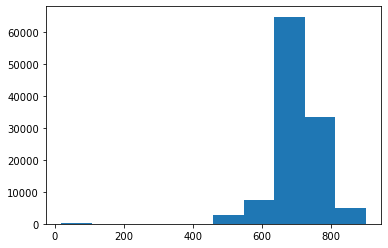

In [21]:
prosper_df_copy_CSup = prosper_df_copy[np.isfinite(prosper_df_copy['CreditScoreRangeUpper'])]
plt.hist(data = prosper_df_copy_CSup, x = 'CreditScoreRangeUpper');

In [22]:
prosper_df_copy['CreditScoreRangeLower'].isna().sum()

591

In [23]:
prosper_df_copy['CreditScoreRangeUpper'].isna().sum()

591

#### Scatter plot graph shows perfect correlation between the lower and the upper bound:

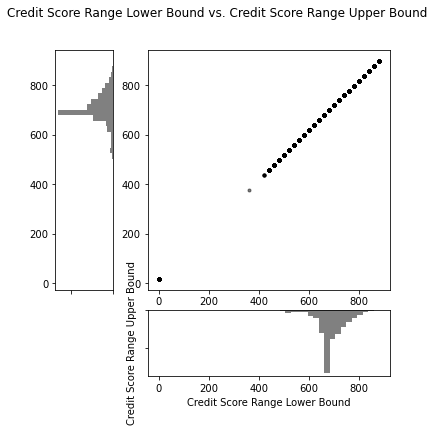

In [24]:
# Make new df where nulls are cleared from 'CreditScoreRangeUpper' and 'CreditScoreRangeLower':
df_CSrange = prosper_df_copy[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].copy()
df_CSrange.dropna(inplace= True) 

#Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.3, wspace=0.6)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
fig.suptitle('Credit Score Range Lower Bound vs. Credit Score Range Upper Bound')
    
# Scatter plot on the main axes
x = df_CSrange['CreditScoreRangeLower']
y = df_CSrange['CreditScoreRangeUpper']
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.5)
plt.xlabel('Credit Score Range Lower Bound')
plt.ylabel('Credit Score Range Upper Bound')
        
# Histograms on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
       
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis();


## Cleaning/Wrangling issue # 3

[back to table of contents](#contents)

**'ListingCategory (numeric)'** is the variable that contains the loan purpose in numeric form. We need a variable containing the labels. The labels can be found in the variable dictionary.

In [25]:
# make new variable:
purpose_dict = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 
                3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 
                6: 'Auto', 7: 'Other', 8: 'Baby & Adoption', 9: 'Boat', 
                10: 'Cosmetic Procedure', 11: 'Engagement Ring', 
                12: 'Green Loans', 13: 'Household Expenses', 
                14: 'Large Purchases', 15: 'Medical/Dental', 
                16: 'Motorcycle', 17: 'Recreational Vehicle', 
                18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'} 
prosper_df_copy['loan_purpose'] = prosper_df_copy['ListingCategory (numeric)'].map(purpose_dict)

In [26]:
# reorder categories and change data type to categorical:
purpose01 = ['Business', 'Debt Consolidation', 'Taxes', 'Student Use', 
             'Baby & Adoption', 'Wedding Loans', 'Engagement Ring',
             'Home Improvement', 'Large Purchases', 'Auto', 'Boat', 
             'Motorcycle', 'Recreational Vehicle', 'Vacation',
             'Cosmetic Procedure', 'Household Expenses', 'Medical/Dental', 
             'Personal Loan', 'Green Loans',  'Other', 'Not Available']
purpose02 = pd.api.types.CategoricalDtype(categories = purpose01, ordered = True)
prosper_df_copy['loan_purpose'] = prosper_df_copy['loan_purpose'].astype(purpose02)
prosper_df_copy['loan_purpose'].dtype

CategoricalDtype(categories=['Business', 'Debt Consolidation', 'Taxes', 'Student Use',
                  'Baby & Adoption', 'Wedding Loans', 'Engagement Ring',
                  'Home Improvement', 'Large Purchases', 'Auto', 'Boat',
                  'Motorcycle', 'Recreational Vehicle', 'Vacation',
                  'Cosmetic Procedure', 'Household Expenses', 'Medical/Dental',
                  'Personal Loan', 'Green Loans', 'Other', 'Not Available'],
, ordered=True)

In [27]:
prosper_df_copy['loan_purpose'].value_counts()

Debt Consolidation      58308
Not Available           16965
Other                   10494
Home Improvement         7433
Business                 7189
Auto                     2572
Personal Loan            2395
Household Expenses       1996
Medical/Dental           1522
Taxes                     885
Large Purchases           876
Wedding Loans             771
Vacation                  768
Student Use               756
Motorcycle                304
Engagement Ring           217
Baby & Adoption           199
Cosmetic Procedure         91
Boat                       85
Green Loans                59
Recreational Vehicle       52
Name: loan_purpose, dtype: int64

## Cleaning/Wrangling Issue # 4 

[back to table of contents](#contents)

There are three possible loan **terms**:

In [28]:
prosper_df_copy['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

**'Term'** is of the type 'integer', but it really is only of interest as a categorical variable, and since the terms vary in an ordered way, it should be ordinal. Therefore, we create a new variable **'term_ordinal'**.

In [29]:
term_dict = {12: '12', 36: '36', 60: '60'}
prosper_df_copy['term_ordinal'] = prosper_df_copy['Term'].map(term_dict)
prosper_df_copy['term_ordinal'].value_counts()

36    87778
60    24545
12     1614
Name: term_ordinal, dtype: int64

In [30]:
# change data type to categorical
term01 = ['12', '36', '60']
term02 = pd.api.types.CategoricalDtype(categories = term01, ordered = True)
prosper_df_copy['term_ordinal'] = prosper_df_copy['term_ordinal'].astype(term02)

In [31]:
# check data type
prosper_df_copy['term_ordinal'].dtype

CategoricalDtype(categories=['12', '36', '60'], ordered=True)

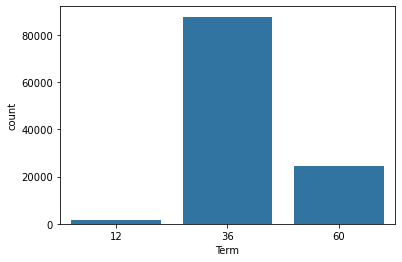

In [32]:
sb.countplot(data=prosper_df_copy, x='Term', color=base_color);

## Cleaning/Wrangling Issue #5

[back to table of contents](#contents)

**Credit history lenght** can be calculated from 'FirstRecordedCreditLine' and 'ListingCreationDate'.

In [33]:
prosper_df_copy['FirstRecordedCreditLine'].sample(5)

8952     1998-06-23 00:00:00
90451    1991-03-29 00:00:00
12825    2000-05-05 00:00:00
38665    1997-01-23 00:00:00
27426    2003-09-18 00:00:00
Name: FirstRecordedCreditLine, dtype: object

In [34]:
prosper_df_copy['FirstRecordedCreditLine'].isnull().sum()

697

In [35]:
prosper_df_copy['ListingCreationDate'].sample(5)

20641    2014-02-09 18:59:05.640000000
85289    2013-03-15 05:35:11.103000000
20885    2013-05-31 16:08:54.097000000
54120    2012-09-05 13:05:54.413000000
79728    2013-08-18 05:43:47.763000000
Name: ListingCreationDate, dtype: object

First, convert both variables of the type 'object' to 'datetime' type:

In [36]:
prosper_df_copy['first_credit_date'] = prosper_df_copy['FirstRecordedCreditLine'].astype('datetime64[ns]')
prosper_df_copy['current_credit_date'] = prosper_df_copy['ListingCreationDate'].astype('datetime64[ns]')

In [37]:
prosper_df_copy['first_credit_date'].sample(5)

46167   1997-10-03
74557   1982-12-01
33212   2002-03-04
39748   1999-02-01
4139    1998-06-18
Name: first_credit_date, dtype: datetime64[ns]

In [38]:
prosper_df_copy['current_credit_date'].sample(5)

33369   2006-12-30 04:34:50.403
91628   2013-12-17 12:49:10.010
26508   2012-12-06 08:09:17.210
68345   2013-09-21 17:57:37.040
35810   2013-02-28 18:09:19.540
Name: current_credit_date, dtype: datetime64[ns]

Now, we compute the **difference** between the dates in **months**.

In [39]:
#https://stackoverflow.com/questions/42822768/pandas-number-of-months-between-two-dates
# df['nb_months'] = ((df.date2 - df.date1)/np.timedelta64(1, 'M'))

prosper_df_copy['credit_history_months'] = ((prosper_df_copy['current_credit_date'] - prosper_df_copy['first_credit_date']) / np.timedelta64(1, 'M'))
prosper_df_copy['credit_history_months'].sample(20)

2995     143.225
36576    136.327
89960    343.388
24638    265.915
54736    209.111
8356     146.641
28483    192.150
1716      68.742
94727     53.369
3785     322.911
71502    154.053
44785     72.654
80796    198.792
31164    193.196
111355   192.442
58339     79.954
38754     87.096
109411    55.778
67297     30.516
68676    136.920
Name: credit_history_months, dtype: float64

## Cleaning/Wrangling Issue #6

[back to table of contents](#contents)

Main variable of interest: **Loan outcome status**.

The loan repayment outcome is represented by the variable 'LoanStatus'.

'Completed', 'Chargedoff', 'Defaulted', and 'Cancelled' are the categories of past loans. For simplification, cancelled loans can be excluded, and the other three categories can be compressed to two (with charged-off and defaulted loans as a single category): repaid (1) vs. not_repaid (defaulted/chaged-off, 0). 'FinalPaymentInProgress' could be added to the first category (repaid, 1).

In [40]:
prosper_df_copy.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Cleaning/Wrangling Issue 6.1: Remove current loans and 'Cancelled' category

[back to table of contents](#contents)

In [41]:
# purpose of cancelled loans:
canc_loans = prosper_df_copy.query("LoanStatus == 'Cancelled'")
canc_loans['loan_purpose']

332            Not Available
59998          Not Available
72480          Not Available
97281          Not Available
112975    Debt Consolidation
Name: loan_purpose, dtype: category
Categories (21, object): ['Business' < 'Debt Consolidation' < 'Taxes' < 'Student Use' ... 'Personal Loan' < 'Green Loans' < 'Other' < 'Not Available']

A category containing only 5 data points, such as the cancelled loans is not informative, therefore it can be removed. For this purpose, we are going to save all categories of past loans (including final payment in progress) in a new variable 'loan_status'.

In [42]:
# create new var 'loan_status' with just 4 categories:
status_dict = {'Completed': 'Completed', 'FinalPaymentInProgress': 'Final payment in progress', 'Defaulted': 'Defaulted', 'Chargedoff': 'Charged-off'} 
prosper_df_copy['loan_status'] = prosper_df_copy['LoanStatus'].map(status_dict)

In [43]:
# change data type to categorical:
status01 = ['Completed', 'Final payment in progress', 'Defaulted', 'Charged-off']
status02 = pd.api.types.CategoricalDtype(categories = status01, ordered = True)
prosper_df_copy['loan_status'] = prosper_df_copy['loan_status'].astype(status02)

In [44]:
# check data type
prosper_df_copy['loan_status'].dtype

CategoricalDtype(categories=['Completed', 'Final payment in progress', 'Defaulted',
                  'Charged-off'],
, ordered=True)

In [45]:
# check counts
prosper_df_copy['loan_status'].value_counts()

Completed                    38074
Charged-off                  11992
Defaulted                     5018
Final payment in progress      205
Name: loan_status, dtype: int64

Next, in order to separate the completed loans (repaid or not repaid) from the current loans, we create a new binary variable **'completed01'**.  In it, **past loans** (repaid, final payment in progress, defaulted, chargedoff) are signified by 1, and the rest by 0:

In [46]:
# create new binary variable:
prosper_df_copy['completed01'] = ((prosper_df_copy.LoanStatus == 'Completed') | (prosper_df_copy.LoanStatus == 'Chargedoff') | (prosper_df_copy.LoanStatus == 'Defaulted') | (prosper_df_copy.LoanStatus == 'FinalPaymentInProgress')).astype(int)
# check counts
prosper_df_copy['completed01'].value_counts()

0    58648
1    55289
Name: completed01, dtype: int64

Next, we use the variable 'completed01' to save a **new df**, 'completed_df', consisting only of **completed loans** (repaid, final payment in progress, defaulted, chargedoff):

In [47]:
# save only completed (+ defaulted, etc.) loans in new df:
completed_df = prosper_df_copy[prosper_df_copy.completed01 == 1]
# check counts
completed_df['completed01'].value_counts()

1    55289
Name: completed01, dtype: int64

In [48]:
# check loan outcome categories
completed_df['LoanStatus'].value_counts()

Completed                 38074
Chargedoff                11992
Defaulted                  5018
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

In [49]:
completed_df['LoanStatus'].isnull().sum()

0

In the new 'completed_df', we create a **binary variable** 'status_bin' for **repaid** loans ('completed', 'final payment in progress' = 1) vs. **unrepaid** loans ('defaulted, 'charged-off' = 0):

In [50]:
# create new binary variable:
compl_dict = {"Completed" : 1, "FinalPaymentInProgress" : 1, "Chargedoff": 0, "Defaulted" : 0}
completed_df['status_bin'] = completed_df['LoanStatus'].map(compl_dict)
# check counts:
completed_df['status_bin'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\974087906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_df['status_bin'] = completed_df['LoanStatus'].map(compl_dict)


1    38279
0    17010
Name: status_bin, dtype: int64

In [51]:
completed_df['status_bin'].isnull().sum()

0

### Cleaning/Wrangling Issue #6.2: Exclude Records Made before July 2009 from 'completed_df'

[back to table of contents](#contents)

The old Prosper credit rating variable 'CreditGrade' was used until July 2009. Previously, we compared the distribution of the old and the new Prosper credit rating ('ProsperRating (Alpha)/ (numeric)') and found out that they were different, possibly due to different criteria applied to borrowers. Therefore, we are now going to exclude all older records from the 'completed_df' and save the new records in a **new df**, 'completed_2009'.

In [52]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
#df.dropna(subset=['name', 'toy'])
completed_2009 = completed_df.dropna(subset=['ProsperScore'])

In [53]:
# Check row and column number
completed_2009.shape

(26210, 89)

There are no records with the old rating left:

In [54]:
completed_2009['CreditGrade'].notna().sum()

0

### Cleaning/Wrangling Issue #6.3: Exclude Variables from 'completed_09'

[back to table of contents](#contents)

In order to shrink the dataframe, we exclude (some of) the variables that we are not going to investigate.

In [55]:
# https://sparkbyexamples.com/pandas/pandas-drop-columns-examples/
# lisCol = ["Courses","Fee"]
# df2=df.drop(lisCol, axis = 1)

droplist = ['CreditGrade', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
            'LenderYield', 'CurrentlyInGroup', 'GroupKey', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 
            'TradesOpenedLast6Months', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
            'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
            'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
            'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees',
            'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
            'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
            'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

completed_09 = completed_2009.drop(droplist, axis = 1)
pd.set_option('display.max_columns', None)
completed_09.head()

ListingKey  ListingNumber            ListingCreationDate  \
15  0F483544120452347F48121         577164  2012-04-10 09:14:46.297000000   
23  101B35764008108187B2EBA         758964  2013-04-22 13:29:19.073000000   
26  0F4F3571508214190FD75CB         713131  2013-02-12 18:07:31.690000000   
27  0F5034867864161084F3789         463083  2010-06-16 16:23:44.533000000   
30  0F57353904771934596FE9F         555213  2012-01-30 17:59:17.200000000   

    Term LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  \
15    36  Defaulted  2012-12-19 00:00:00        0.358         0.318   
23    36  Defaulted  2013-12-26 00:00:00        0.280         0.242   
26    60  Completed  2013-10-22 00:00:00        0.307         0.281   
27    36  Completed  2013-07-03 00:00:00        0.113         0.092   
30    36  Completed  2012-12-19 00:00:00        0.128         0.100   

    ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
15                    1.000                    HR         5.000   
23                    3.000                     D         5.000   
26                    2.000                     E         3.000   
27                    6.000                     A         9.000   
30                    6.000                     A         9.000   

    ListingCategory (numeric) BorrowerState          Occupation  \
15                         13            FL               Other   
23                         15            IL       Skilled Labor   
26                          1            NY  Sales - Commission   
27                          1            CO           Executive   
30                         20            CA               Other   

   EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
15            Other                   121.000                 True   
23         Employed                     3.000                False   
26         Employed                    25.000                False   
27        Full-time                    10.000                 True   
30         Employed                    44.000                False   

       DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
15  2012-04-10 09:14:41                700.000                719.000   
23  2013-04-22 13:29:14                680.000                699.000   
26  2013-02-12 18:07:23                660.000                679.000   
27  2010-06-04 10:18:55                700.000                719.000   
30  2012-01-30 17:59:13                740.000                759.000   

   FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  \
15     1999-03-08 00:00:00              10.000            9.000   
23     1998-06-09 00:00:00               7.000            7.000   
26     1975-10-26 00:00:00               7.000            6.000   
27     2000-04-11 00:00:00              16.000           16.000   
30     1988-06-01 00:00:00               4.000            4.000   

    TotalCreditLinespast7years  OpenRevolvingAccounts  \
15                      18.000                      5   
23                      34.000                      5   
26                      12.000                      6   
27                      49.000                     11   
30                      19.000                      4   

    OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
15                      300.000                 0.000           1.000   
23                      245.000                 0.000           0.000   
26                       95.000                 2.000           3.000   
27                      294.000                 2.000           8.000   
30                      105.000                 0.000           0.000   

    CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
15                 0.000             0.000                    0.000   
23                 0.000             0.000                    0.000   
26                 0.000             0.000                    0

In [56]:
pd.set_option('display.max_columns', 30)

Now there are 59 variables left (including the new ones that we created by transformation):

In [57]:
completed_09.shape

(26210, 59)

### Cleaning/Wrangling Issue #6.4: Deal with Nulls in 'completed_09'

[back to table of contents](#contents)

In [58]:
# remove limit on row number
pd.set_option('display.max_rows', None)
# display null sums per variable
completed_09.isnull().sum()

ListingKey                           0
ListingNumber                        0
ListingCreationDate                  0
Term                                 0
LoanStatus                           0
ClosedDate                         205
BorrowerAPR                          0
BorrowerRate                         0
ProsperRating (numeric)              0
ProsperRating (Alpha)                0
ProsperScore                         0
ListingCategory (numeric)            0
BorrowerState                        0
Occupation                          15
EmploymentStatus                     0
EmploymentStatusDuration             9
IsBorrowerHomeowner                  0
DateCreditPulled                     0
CreditScoreRangeLower                0
CreditScoreRangeUpper                0
FirstRecordedCreditLine              0
CurrentCreditLines                   0
OpenCreditLines                      0
TotalCreditLinespast7years           0
OpenRevolvingAccounts                0
OpenRevolvingMonthlyPayme

In [59]:
# reset limit on row number
pd.set_option('display.max_rows', 50)

The 205 loans **without closed date** are of the category "final payment in progress":

In [60]:
completed_09['LoanStatus'].value_counts()

Completed                 19664
Chargedoff                 5336
Defaulted                  1005
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

The 2988 records with no **'DebtToIncomeRatio'** are possibly due to division by zero (i.e., zero income in the denominator).

In [61]:
# make df with 
dti_nulls = completed_09[completed_09['DebtToIncomeRatio'].isnull()]
dtip_nulls_zero_income = dti_nulls[dti_nulls['StatedMonthlyIncome'] == 0]
# check number of records:
dtip_nulls_zero_income.shape

(404, 59)

404 records with null in **'DebtToIncomeRatio'** have a zero in **'StatedMonthlyIncome**.

However, the Prosper data dictionary states that 'This ['DebtToIncomeRatio'] value is Null if the debt to income ratio is not available.' Therefore, the rows with nulls in can be excluded. The same goes to **'EmploymentStatusDuration'**. The df 'completed_09' contains enough records (26,210). 

The new dataframe without these missing values is **'completed_09_01'**.

In [62]:
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
# df = df[df['EPS'].notna()]

#https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
#df = df.dropna(subset=['colA', 'colC'])
completed_09_01 = completed_09.dropna(subset=['DebtToIncomeRatio', 'EmploymentStatusDuration'])

The null records from both variables are now cleared:

In [63]:
completed_09_01['DebtToIncomeRatio'].isnull().sum()

0

In [64]:
completed_09_01['EmploymentStatusDuration'].isnull().sum()

0

Check what is left of the nulls in the rest of the variables:

In [65]:
pd.set_option('display.max_rows', None)
completed_09_01.isna().sum()

ListingKey                           0
ListingNumber                        0
ListingCreationDate                  0
Term                                 0
LoanStatus                           0
ClosedDate                         189
BorrowerAPR                          0
BorrowerRate                         0
ProsperRating (numeric)              0
ProsperRating (Alpha)                0
ProsperScore                         0
ListingCategory (numeric)            0
BorrowerState                        0
Occupation                          15
EmploymentStatus                     0
EmploymentStatusDuration             0
IsBorrowerHomeowner                  0
DateCreditPulled                     0
CreditScoreRangeLower                0
CreditScoreRangeUpper                0
FirstRecordedCreditLine              0
CurrentCreditLines                   0
OpenCreditLines                      0
TotalCreditLinespast7years           0
OpenRevolvingAccounts                0
OpenRevolvingMonthlyPayme

In [66]:
# set back limit on rows:
pd.set_option('display.max_rows', 50)


### Cleaning/Wrangling Issue #6.5: Create dummy outcome variable with labels
<a id="repaid_yn"></a>

[back to table of contents](#contents)

Create a dummy variable (repaid vs. not repaid) by copying the variable 'status_bin' with labels 'Repaid' vs. 'Not repaid'. 

In [67]:
# 'status_bin' codes repaid loans as 1 and not repaid loans as 0
stb_dict = {0: 'Not repaid', 1: 'Repaid'}
completed_09_01['repaid_yn'] = completed_09_01['status_bin'].map(stb_dict)
completed_09_01['repaid_yn'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\3533317425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['repaid_yn'] = completed_09_01['status_bin'].map(stb_dict)


Repaid        17889
Not repaid     5329
Name: repaid_yn, dtype: int64

## Cleaning/Wrangling issue #7

[back to table of contents](#contents)

The category "Personal loan" contains 0 records and the category "Not available" contains 7 records. Both can be removed:

In [68]:
completed_09_01['loan_purpose'].value_counts()

Debt Consolidation      11837
Other                    4242
Home Improvement         2433
Business                 1605
Auto                     1085
Household Expenses        506
Medical/Dental            327
Student Use               201
Vacation                  189
Taxes                     187
Large Purchases           164
Wedding Loans             159
Motorcycle                 85
Engagement Ring            55
Baby & Adoption            37
Cosmetic Procedure         37
Boat                       28
Green Loans                18
Recreational Vehicle       16
Not Available               7
Personal Loan               0
Name: loan_purpose, dtype: int64

In [69]:
completed_09_01['loan_purpose'] = completed_09_01['loan_purpose'].cat.remove_categories('Personal Loan')

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\1741503653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['loan_purpose'] = completed_09_01['loan_purpose'].cat.remove_categories('Personal Loan')


In [70]:
completed_09_01['loan_purpose'] = completed_09_01['loan_purpose'].cat.remove_categories('Not Available')

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\3846381831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['loan_purpose'] = completed_09_01['loan_purpose'].cat.remove_categories('Not Available')


Check after cleaning:

In [71]:
completed_09_01['loan_purpose'].value_counts()

Debt Consolidation      11837
Other                    4242
Home Improvement         2433
Business                 1605
Auto                     1085
Household Expenses        506
Medical/Dental            327
Student Use               201
Vacation                  189
Taxes                     187
Large Purchases           164
Wedding Loans             159
Motorcycle                 85
Engagement Ring            55
Baby & Adoption            37
Cosmetic Procedure         37
Boat                       28
Green Loans                18
Recreational Vehicle       16
Name: loan_purpose, dtype: int64

#### Number of records in 'completed_09_01'

In [72]:
completed_09_01.shape[0]

23218

# 6. Univariate Exploration
<a id="univar"></a>

[back to table of contents](#contents)

## 6.1 Preliminary exploration
<a id="preex"></a>
The majority of the variables in the Prosper data set which correspond to the ones in the the theoretical outline of Serrano-Cinca, Gutierrez-Nieto & Lopez-Palacios (2015) are continuous (generally) and some are (practically) discrete. Here, we are presenting distribution shapes.

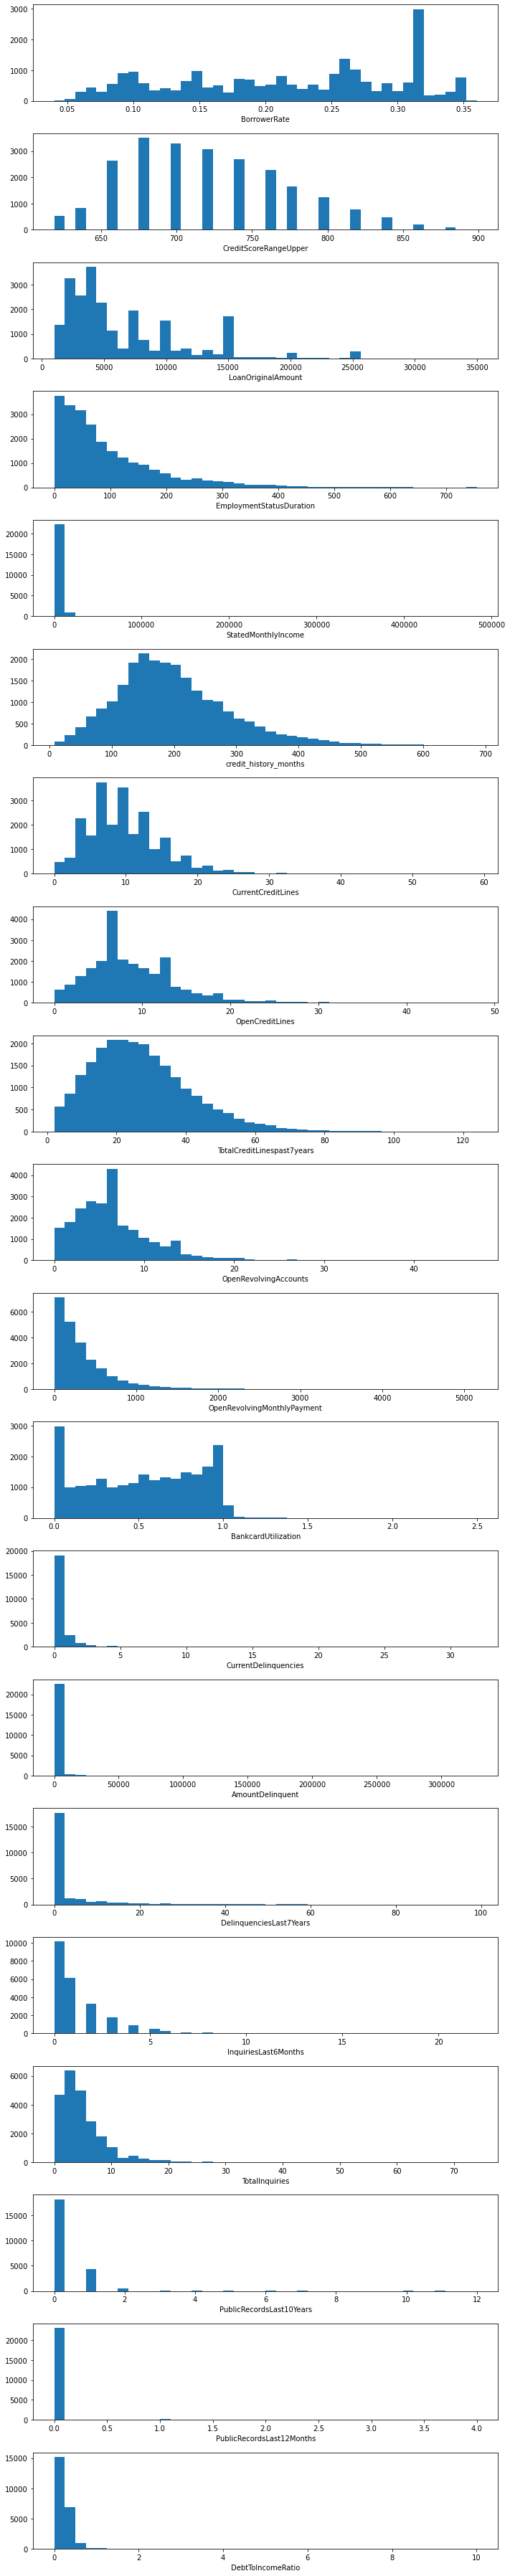

In [73]:
variables = ['BorrowerRate', 'CreditScoreRangeUpper', 'LoanOriginalAmount', 
             'EmploymentStatusDuration', 'StatedMonthlyIncome', 'credit_history_months', 
             'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
             'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'BankcardUtilization', 
             'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 
             'InquiriesLast6Months', 'TotalInquiries', 
             'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'DebtToIncomeRatio']

fig, ax = plt.subplots(nrows= 20, figsize = [10,50])
          
for i in range(len(variables)):
    var = variables[i]
    ax[i].hist(data = completed_09_01, x = var, bins = 40)
    ax[i].set_xlabel('{}'.format(var))
    
plt.tight_layout()
plt.show();

Practically all distributions are positively skewed, except the one of the interest rate ('BorrowerRate') which is multimodal ('LoanOriginalAmount' is also multimodal, albeit with one defined peak).

The distribution of two variables resembles visually a log-normal distribution ('StatedMonthlyIncome', 'OpenRevolvingMonthlyPayment'). 

There is a large group of variables which contain count data<a name="countdata"><sup>2</sup></a> ('CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'CurrentDelinquencies','DelinquenciesLast7Years', 'InquiriesLast6Months', 'TotalInquiries', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months') and one continuous variable has so few values that it is practically discrete ('CreditScoreRangeUpper').

<sup>[2](#countdata)</sup> [How to Deal with Count Data](https://pubmed.ncbi.nlm.nih.gov/34104569/)

One of the variables, 'DebtToIncomeRatio' is censored at the positive tail (at 1001%). From variable dictionary: "This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)."


## 6.2 Feature engineering
<a id="feature"></a>

[back to table of contents](#contents)

The purpose of this report is to illustrate the relationship of the variable of interest to all possible predictors, therefore a relatively easy solution would be to convert all variables into ordinal:

   - the count data are skewed, therefore the limits of categories should be defined on the basis of the frequency distribution; furthermore, the zeros are a large proportion of the values and should be a separate category;
   - the same goes for highly skewed continuous variables;
   - for not so highly skewed continuous variables, the data points can be lumped together in equal intervals.   

### 6.2.1 Categorical Transformations of Highly Skewed Count Data
<a id="feature1"></a>

[back to table of contents](#contents)

An easy solution would be to use pandas.qcut(), however, for these variables the zero is an important value and it is often the mode, therefore, we would like to save it as a separate category and to split the rest of the data by percentiles. Therefore, the method of choice is numpy.select().  

We chose to transform the scores by putting the zeros into a separate category and the rest of the values as follows: 
  - from the count of 1 to the value before the 25th percentile, 
  - from the 25th to the value below the 50th percentile, 
  - from the 50th to the value below the 75th percentile, 
  - from the 75th to the value below the 90th percentile, 
  - from the 90th to the value below the 95th percentile, 
  - from the 95th to the value below the 99th percentile, 
  - from the 99th percentile and above.

After transforming all count variables into categorical, we are going to transform them into **ordinal** variables. 

####  1) **'CurrentCreditLines'**

[back to table of contents](#contents)

In [74]:
completed_09_01['CurrentCreditLines'].describe()

count   23218.000
mean        9.753
std         5.310
min         0.000
25%         6.000
50%         9.000
75%        13.000
max        59.000
Name: CurrentCreditLines, dtype: float64

In [75]:
completed_09_01['CurrentCreditLines'].quantile([0.9, 0.95, 0.99])

0.900   17.000
0.950   19.000
0.990   26.000
Name: CurrentCreditLines, dtype: float64

In [76]:
conditions = [(completed_09_01['CurrentCreditLines'] == 0),
              (completed_09_01['CurrentCreditLines'] >=1) & (completed_09_01['CurrentCreditLines'] <6),
              (completed_09_01['CurrentCreditLines'] >=6) & (completed_09_01['CurrentCreditLines'] <9),
              (completed_09_01['CurrentCreditLines'] >=9) & (completed_09_01['CurrentCreditLines'] <13),
              (completed_09_01['CurrentCreditLines'] >=13) & (completed_09_01['CurrentCreditLines'] <17),
              (completed_09_01['CurrentCreditLines'] >=17) & (completed_09_01['CurrentCreditLines'] <19),
              (completed_09_01['CurrentCreditLines'] >=19) & (completed_09_01['CurrentCreditLines'] <26),
              (completed_09_01['CurrentCreditLines'] >=26)]

values = ['None', '1-5', '6-8', '9-12', '13- 16', '17-18', '19-25', '26 or more']

completed_09_01['current_credits'] = np.select(conditions, values)

completed_09_01['current_credits'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\2674178550.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['current_credits'] = np.select(conditions, values)


9-12          6497
6-8           5746
1-5           4819
13- 16        3646
19-25         1189
17-18          944
26 or more     253
None           124
Name: current_credits, dtype: int64

In [77]:
completed_09_01['current_credits'].isnull().sum()

0

#### 2)**'OpenCreditLines'**

[back to table of contents](#contents)

In [78]:
completed_09_01['OpenCreditLines'].describe()

count   23218.000
mean        8.603
std         4.789
min         0.000
25%         5.000
50%         8.000
75%        11.000
max        48.000
Name: OpenCreditLines, dtype: float64

In [79]:
completed_09_01['OpenCreditLines'].quantile([0.9, 0.95, 0.99])

0.900   15.000
0.950   17.000
0.990   23.000
Name: OpenCreditLines, dtype: float64

In [80]:
conditions = [(completed_09_01['OpenCreditLines'] == 0),
              (completed_09_01['OpenCreditLines'] >=1) & (completed_09_01['OpenCreditLines'] <5),
              (completed_09_01['OpenCreditLines'] >=5) & (completed_09_01['OpenCreditLines'] <8),
              (completed_09_01['OpenCreditLines'] >=8) & (completed_09_01['OpenCreditLines'] <11),
              (completed_09_01['OpenCreditLines'] >=11) & (completed_09_01['OpenCreditLines'] <15),
              (completed_09_01['OpenCreditLines'] >=15) & (completed_09_01['OpenCreditLines'] <17),
              (completed_09_01['OpenCreditLines'] >=17) & (completed_09_01['OpenCreditLines'] <23),
              (completed_09_01['OpenCreditLines'] >=23)]

values = ['None', '1-4', '5-7', '8-10', '11-14', '15-16', '17-22', '23 or more']

completed_09_01['open_credits'] = np.select(conditions, values)

completed_09_01['open_credits'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\4257542515.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['open_credits'] = np.select(conditions, values)


5-7           6398
8-10          5591
11-14         4312
1-4           4228
17-22         1157
15-16         1065
23 or more     295
None           172
Name: open_credits, dtype: int64

In [81]:
completed_09_01['open_credits'].isnull().sum()

0

#### 3)**'TotalCreditLinespast7years'**

[back to table of contents](#contents)

In [82]:
completed_09_01['TotalCreditLinespast7years'].describe()

count   23218.000
mean       27.176
std        14.095
min         2.000
25%        17.000
50%        25.000
75%        35.000
max       124.000
Name: TotalCreditLinespast7years, dtype: float64

In [83]:
completed_09_01['TotalCreditLinespast7years'].quantile([0.9, 0.95, 0.99])

0.900   46.000
0.950   53.000
0.990   68.000
Name: TotalCreditLinespast7years, dtype: float64

In [84]:
conditions = [(completed_09_01['TotalCreditLinespast7years'] <17),
              (completed_09_01['TotalCreditLinespast7years'] >=17) & (completed_09_01['TotalCreditLinespast7years'] <25),
              (completed_09_01['TotalCreditLinespast7years'] >=25) & (completed_09_01['TotalCreditLinespast7years'] <35),
              (completed_09_01['TotalCreditLinespast7years'] >=35) & (completed_09_01['TotalCreditLinespast7years'] <45),
              (completed_09_01['TotalCreditLinespast7years'] >=45) & (completed_09_01['TotalCreditLinespast7years'] <52),
              (completed_09_01['TotalCreditLinespast7years'] >=52) & (completed_09_01['TotalCreditLinespast7years'] <67),
              (completed_09_01['TotalCreditLinespast7years'] >=67)]

values = ['2-16', '17-24', '25-34', '35-44', '45-51', '52-66', '67 or more']

completed_09_01['total_credits_7y'] = np.select(conditions, values)

completed_09_01['total_credits_7y'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\2858092566.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['total_credits_7y'] = np.select(conditions, values)


25-34         6104
2-16          5527
17-24         5458
35-44         3500
45-51         1255
52-66         1092
67 or more     282
Name: total_credits_7y, dtype: int64

#### 4)**'OpenRevolvingAccounts'**

[back to table of contents](#contents)

In [85]:
completed_09_01['OpenRevolvingAccounts'].describe()

count   23218.000
mean        6.518
std         4.271
min         0.000
25%         4.000
50%         6.000
75%         9.000
max        47.000
Name: OpenRevolvingAccounts, dtype: float64

In [86]:
completed_09_01['OpenRevolvingAccounts'].quantile([0.9, 0.95, 0.99])

0.900   12.000
0.950   15.000
0.990   20.000
Name: OpenRevolvingAccounts, dtype: float64

In [87]:
conditions = [(completed_09_01['OpenRevolvingAccounts'] == 0),
              (completed_09_01['OpenRevolvingAccounts'] >=1) & (completed_09_01['OpenRevolvingAccounts'] <4),
              (completed_09_01['OpenRevolvingAccounts'] >=4) & (completed_09_01['OpenRevolvingAccounts'] <6),
              (completed_09_01['OpenRevolvingAccounts'] >=6) & (completed_09_01['OpenRevolvingAccounts'] <9),
              (completed_09_01['OpenRevolvingAccounts'] >=9) & (completed_09_01['OpenRevolvingAccounts'] <12),
              (completed_09_01['OpenRevolvingAccounts'] >=12) & (completed_09_01['OpenRevolvingAccounts'] <15),
              (completed_09_01['OpenRevolvingAccounts'] >=15) & (completed_09_01['OpenRevolvingAccounts'] <20),
              (completed_09_01['OpenRevolvingAccounts'] >=20)]

values = ['None', '1-3', '4-5', '6-8', '9-11', '12-14', '15-19', '20 or more']

completed_09_01['open_accounts'] = np.select(conditions, values)

completed_09_01['open_accounts'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\3695872129.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['open_accounts'] = np.select(conditions, values)


6-8           5920
4-5           5460
1-3           5410
9-11          3332
12-14         1555
15-19          887
None           371
20 or more     283
Name: open_accounts, dtype: int64

#### 5)**'CurrentDelinquencies'**

[back to table of contents](#contents)

In [88]:
completed_09_01['CurrentDelinquencies'].describe()

count   23218.000
mean        0.381
std         1.248
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        32.000
Name: CurrentDelinquencies, dtype: float64

In [89]:
completed_09_01['CurrentDelinquencies'].quantile([0.9, 0.95, 0.99])

0.900   1.000
0.950   2.000
0.990   6.000
Name: CurrentDelinquencies, dtype: float64

In [90]:
conditions = [(completed_09_01['CurrentDelinquencies'] == 0),
              (completed_09_01['CurrentDelinquencies'] == 1),
              (completed_09_01['CurrentDelinquencies'] == 2),
              (completed_09_01['CurrentDelinquencies'] >= 3) & (completed_09_01['CurrentDelinquencies'] <6),
              (completed_09_01['CurrentDelinquencies'] >= 6)]

values = ['None', '1', '2', '3-5', '6 or more']

completed_09_01['delinquencies'] = np.select(conditions, values)

completed_09_01['delinquencies'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\1081614810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['delinquencies'] = np.select(conditions, values)


None         19102
1             2374
2              787
3-5            662
6 or more      293
Name: delinquencies, dtype: int64

In [91]:
completed_09_01['delinquencies'].isnull().sum()

0

#### 6)**'DelinquenciesLast7Years'**

[back to table of contents](#contents)

In [92]:
completed_09_01['DelinquenciesLast7Years'].describe()

count   23218.000
mean        3.514
std         8.803
min         0.000
25%         0.000
50%         0.000
75%         2.000
max        99.000
Name: DelinquenciesLast7Years, dtype: float64

In [93]:
completed_09_01['DelinquenciesLast7Years'].quantile([0.9, 0.95, 0.99])

0.900   12.000
0.950   21.000
0.990   43.000
Name: DelinquenciesLast7Years, dtype: float64

In [94]:
conditions = [(completed_09_01['DelinquenciesLast7Years'] == 0),
              (completed_09_01['DelinquenciesLast7Years'] >=1) & (completed_09_01['DelinquenciesLast7Years'] <12),
              (completed_09_01['DelinquenciesLast7Years'] >=12) & (completed_09_01['DelinquenciesLast7Years'] <21),
              (completed_09_01['DelinquenciesLast7Years'] >=21) & (completed_09_01['DelinquenciesLast7Years'] <43),
              (completed_09_01['DelinquenciesLast7Years'] >=43)]

values = ['None', '1-11', '12-20', '21-42', '43 or more']

completed_09_01['delinquencies_7y'] = np.select(conditions, values)

completed_09_01['delinquencies_7y'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\3166557774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['delinquencies_7y'] = np.select(conditions, values)


None          16187
1-11           4605
12-20          1191
21-42           993
43 or more      242
Name: delinquencies_7y, dtype: int64

In [95]:
completed_09_01['delinquencies_7y'].isnull().sum()

0

#### 7) **'InquiriesLast6Months'**

[back to table of contents](#contents)

In [96]:
completed_09_01['InquiriesLast6Months'].describe()

count   23218.000
mean        1.209
std         1.633
min         0.000
25%         0.000
50%         1.000
75%         2.000
max        22.000
Name: InquiriesLast6Months, dtype: float64

In [97]:
completed_09_01['InquiriesLast6Months'].quantile([0.9, 0.95, 0.99])

0.900   3.000
0.950   4.000
0.990   7.000
Name: InquiriesLast6Months, dtype: float64

In [98]:
conditions = [(completed_09_01['InquiriesLast6Months'] == 0),
              (completed_09_01['InquiriesLast6Months'] == 1),
              (completed_09_01['InquiriesLast6Months'] == 2),
              (completed_09_01['InquiriesLast6Months'] == 3),
              (completed_09_01['InquiriesLast6Months'] >= 4) & (completed_09_01['InquiriesLast6Months'] < 7),
              (completed_09_01['InquiriesLast6Months'] >= 7)]

values = ['None', '1', '2', '3', '4-6', '7 or more']

completed_09_01['inquiries_6m'] = np.select(conditions, values)

completed_09_01['inquiries_6m'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\978944919.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['inquiries_6m'] = np.select(conditions, values)


None         10139
1             6141
2             3281
3             1727
4-6           1625
7 or more      305
Name: inquiries_6m, dtype: int64

In [99]:
completed_09_01['inquiries_6m'].isnull().sum()

0

#### 8) **'TotalInquiries'**

[back to table of contents](#contents)

Inquiries from creditors

In [100]:
completed_09_01['TotalInquiries'].describe()

count   23218.000
mean        4.734
std         4.288
min         0.000
25%         2.000
50%         4.000
75%         6.000
max        74.000
Name: TotalInquiries, dtype: float64

In [101]:
completed_09_01['TotalInquiries'].quantile([0.9, 0.95, 0.99])

0.900   10.000
0.950   13.000
0.990   20.000
Name: TotalInquiries, dtype: float64

In [102]:
conditions = [(completed_09_01['TotalInquiries'] == 0),
              (completed_09_01['TotalInquiries'] ==1),
              (completed_09_01['TotalInquiries'] >=2) & (completed_09_01['TotalInquiries'] <4),
              (completed_09_01['TotalInquiries'] >=4) & (completed_09_01['TotalInquiries'] <6),
              (completed_09_01['TotalInquiries'] >=6) & (completed_09_01['TotalInquiries'] <10),
              (completed_09_01['TotalInquiries'] >=10) & (completed_09_01['TotalInquiries'] <13),
              (completed_09_01['TotalInquiries'] >=13) & (completed_09_01['TotalInquiries'] <20),
              (completed_09_01['TotalInquiries'] >=20)]

values = ['None', '1', '2-3', '4-5', '6-9', '10-12', '13-19', '20 or more']

completed_09_01['inquiries_total'] = np.select(conditions, values)

completed_09_01['inquiries_total'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\3109018129.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['inquiries_total'] = np.select(conditions, values)


2-3           6378
4-5           4964
6-9           4650
1             3002
None          1668
10-12         1374
13-19          927
20 or more     255
Name: inquiries_total, dtype: int64

In [103]:
completed_09_01['inquiries_total'].isnull().sum()

0

#### 9) **'PublicRecordsLast10Years'**

[back to table of contents](#contents)

Derogatory public records

In [104]:
completed_09_01['PublicRecordsLast10Years'].describe()

count   23218.000
mean        0.266
std         0.610
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        12.000
Name: PublicRecordsLast10Years, dtype: float64

In [105]:
completed_09_01['PublicRecordsLast10Years'].quantile([0.9, 0.95, 0.99])

0.900   1.000
0.950   1.000
0.990   2.000
Name: PublicRecordsLast10Years, dtype: float64

In [106]:
conditions = [(completed_09_01['PublicRecordsLast10Years'] == 0),
              (completed_09_01['PublicRecordsLast10Years'] ==1),
              (completed_09_01['PublicRecordsLast10Years'] >=2)]

values = ['None', '1', '2 or more']

completed_09_01['pub_rec_10y'] = np.select(conditions, values)

completed_09_01['pub_rec_10y'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\1130670582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['pub_rec_10y'] = np.select(conditions, values)


None         18173
1             4331
2 or more      714
Name: pub_rec_10y, dtype: int64

In [107]:
completed_09_01['pub_rec_10y'].isnull().sum()

0

#### 10) **'PublicRecordsLast12Months'**

[back to table of contents](#contents)

In [108]:
completed_09_01['PublicRecordsLast12Months'].describe()

count   23218.000
mean        0.011
std         0.117
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         4.000
Name: PublicRecordsLast12Months, dtype: float64

In [109]:
completed_09_01['PublicRecordsLast12Months'].quantile([0.9, 0.95, 0.99])

0.900   0.000
0.950   0.000
0.990   0.000
Name: PublicRecordsLast12Months, dtype: float64

In [110]:
conditions = [(completed_09_01['PublicRecordsLast12Months'] == 0),
              (completed_09_01['PublicRecordsLast12Months'] >= 1)]

values = ['None', '1 or more']

completed_09_01['pub_rec_12m'] = np.select(conditions, values)

completed_09_01['pub_rec_12m'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\2307793176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['pub_rec_12m'] = np.select(conditions, values)


None         22987
1 or more      231
Name: pub_rec_12m, dtype: int64

In [111]:
completed_09_01['pub_rec_12m'].isnull().sum()

0

#### Change data type to ordinal

In [112]:
ordinal_var_dict_02 = {'current_credits': ['None', '1-5', '6-8', '9-12', '13- 16', '17-18', '19-25', '26 or more'],
                       'open_credits': ['None', '1-4', '5-7', '8-10', '11-14', '15-16', '17-22', '23 or more'],
                       'total_credits_7y': ['2-16', '17-24', '25-34', '35-44', '45-51', '52-66', '67 or more'],
                       'open_accounts': ['None', '1-3', '4-5', '6-8', '9-11', '12-14', '15-19', '20 or more'],
                       'delinquencies': ['None', '1', '2', '3-5', '6 or more'],
                       'delinquencies_7y': ['None', '1-11', '12-20', '21-42', '43 or more'],
                       'inquiries_6m': ['None', '1', '2', '3', '4-6', '7 or more'],
                       'inquiries_total': ['None', '1', '2-3', '4-5', '6-9', '10-12', '13-19', '20 or more'],
                       'pub_rec_10y': ['None', '1', '2 or more'],
                       'pub_rec_12m': ['None', '1 or more']}

for var in ordinal_var_dict_02:
    ordered_var_02 = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict_02[var])
    completed_09_01[var] = completed_09_01[var].astype(ordered_var_02)

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\256505989.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01[var] = completed_09_01[var].astype(ordered_var_02)


In [113]:
# check if all new variables were converted to 'category' data type
completed_09_01.select_dtypes(include='category').columns.to_list()

['ProsperRating (Alpha)',
 'EmploymentStatus',
 'IncomeRange',
 'loan_purpose',
 'term_ordinal',
 'loan_status',
 'current_credits',
 'open_credits',
 'total_credits_7y',
 'open_accounts',
 'delinquencies',
 'delinquencies_7y',
 'inquiries_6m',
 'inquiries_total',
 'pub_rec_10y',
 'pub_rec_12m']

### 6.2.2 Categorical Transformations of Highly Skewed or Multimodal Continuous Variables
<a id="feature2"></a>

[back to table of contents](#contents)

#### 1) Professional credit rating ('CreditScoreRangeUpper')
As the histogram shows, some intervals of the continuous variable 'CreditScoreRangeUpper' are empty, therefore the interval which we set at 14, is doubled at certain points of the distribution.

In [114]:
completed_09_01['CreditScoreRangeUpper'].describe()

count   23218.000
mean      720.523
std        53.287
min       619.000
25%       679.000
50%       719.000
75%       759.000
max       899.000
Name: CreditScoreRangeUpper, dtype: float64

In [115]:
conditions = [(completed_09_01['CreditScoreRangeUpper'] >= 619) & (completed_09_01['CreditScoreRangeUpper'] < 634),
              (completed_09_01['CreditScoreRangeUpper'] >= 634) & (completed_09_01['CreditScoreRangeUpper'] < 649),
              (completed_09_01['CreditScoreRangeUpper'] >= 649) & (completed_09_01['CreditScoreRangeUpper'] < 679),
              (completed_09_01['CreditScoreRangeUpper'] >= 679) & (completed_09_01['CreditScoreRangeUpper'] < 694),
              (completed_09_01['CreditScoreRangeUpper'] >= 694) & (completed_09_01['CreditScoreRangeUpper'] < 709),
              (completed_09_01['CreditScoreRangeUpper'] >= 709) & (completed_09_01['CreditScoreRangeUpper'] < 739),
              (completed_09_01['CreditScoreRangeUpper'] >= 739) & (completed_09_01['CreditScoreRangeUpper'] < 754),
              (completed_09_01['CreditScoreRangeUpper'] >= 754) & (completed_09_01['CreditScoreRangeUpper'] < 769),
              (completed_09_01['CreditScoreRangeUpper'] >= 769) & (completed_09_01['CreditScoreRangeUpper'] < 799),
              (completed_09_01['CreditScoreRangeUpper'] >= 799) & (completed_09_01['CreditScoreRangeUpper'] < 814),
              (completed_09_01['CreditScoreRangeUpper'] >= 814) & (completed_09_01['CreditScoreRangeUpper'] < 829),
              (completed_09_01['CreditScoreRangeUpper'] >= 829) & (completed_09_01['CreditScoreRangeUpper'] < 859),
              (completed_09_01['CreditScoreRangeUpper'] >= 859) & (completed_09_01['CreditScoreRangeUpper'] < 874),
              (completed_09_01['CreditScoreRangeUpper'] >= 874) & (completed_09_01['CreditScoreRangeUpper'] < 889),
              (completed_09_01['CreditScoreRangeUpper'] >= 889)]

values = ['619-633', '634-648', '649-678', '679-693', '694-708', 
          '709-738', '739-753', '754-768', '769-798', '799-813', 
          '814-828', '829-858', '859-873', '874-888', '889 or more']

completed_09_01['cscore_ordinal'] = np.select(conditions, values)

completed_09_01['cscore_ordinal'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\4237241013.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['cscore_ordinal'] = np.select(conditions, values)


679-693        3500
694-708        3306
709-738        3064
739-753        2690
649-678        2627
754-768        2278
769-798        1648
799-813        1242
634-648         815
814-828         778
619-633         530
829-858         458
859-873         197
874-888          75
889 or more      10
Name: cscore_ordinal, dtype: int64

In [116]:
completed_09_01['cscore_ordinal'].isnull().sum()

0

In [117]:
# reorder categories and change data type to categorical:
ssc01 = ['619-633', '634-648', '649-678', '679-693', '694-708', 
         '709-738', '739-753', '754-768', '769-798', '799-813', 
         '814-828', '829-858', '859-873', '874-888', '889 or more']

ssc02 = pd.api.types.CategoricalDtype(categories = ssc01, ordered = True)

completed_09_01['cscore_ordinal'] = completed_09_01['cscore_ordinal'].astype(ssc02)

completed_09_01['cscore_ordinal'].dtype

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\1567156005.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['cscore_ordinal'] = completed_09_01['cscore_ordinal'].astype(ssc02)


CategoricalDtype(categories=['619-633', '634-648', '649-678', '679-693', '694-708',
                  '709-738', '739-753', '754-768', '769-798', '799-813',
                  '814-828', '829-858', '859-873', '874-888', '889 or more'],
, ordered=True)

In [118]:
completed_09_01['cscore_ordinal'].value_counts().sort_index()

619-633         530
634-648         815
649-678        2627
679-693        3500
694-708        3306
709-738        3064
739-753        2690
754-768        2278
769-798        1648
799-813        1242
814-828         778
829-858         458
859-873         197
874-888          75
889 or more      10
Name: cscore_ordinal, dtype: int64

In [119]:
completed_09_01['cscore_ordinal'].isnull().sum()

0

#### 2) 'LoanOriginalAmount'

[back to table of contents](#contents)

The levels of the ordinal variable 'loan_amount_int' increment by \\$1,000 up to \\$26,000. All values from \\$26,000 to \\$35,000 are lumped together due to small group size.

In [120]:
completed_09_01['LoanOriginalAmount'].describe()

count   23218.000
mean     6534.554
std      4897.139
min      1000.000
25%      3000.000
50%      5000.000
75%      8799.250
max     35000.000
Name: LoanOriginalAmount, dtype: float64

In [121]:
conditions = [(completed_09_01['LoanOriginalAmount'] >= 1000) & (completed_09_01['LoanOriginalAmount'] < 2000),
              (completed_09_01['LoanOriginalAmount'] >= 2000) & (completed_09_01['LoanOriginalAmount'] < 3000),
              (completed_09_01['LoanOriginalAmount'] >= 3000) & (completed_09_01['LoanOriginalAmount'] < 4000),
              (completed_09_01['LoanOriginalAmount'] >= 4000) & (completed_09_01['LoanOriginalAmount'] < 5000),
              (completed_09_01['LoanOriginalAmount'] >= 5000) & (completed_09_01['LoanOriginalAmount'] < 6000),
              (completed_09_01['LoanOriginalAmount'] >= 6000) & (completed_09_01['LoanOriginalAmount'] < 7000),
              (completed_09_01['LoanOriginalAmount'] >= 7000) & (completed_09_01['LoanOriginalAmount'] < 8000),
              (completed_09_01['LoanOriginalAmount'] >= 8000) & (completed_09_01['LoanOriginalAmount'] < 9000),
              (completed_09_01['LoanOriginalAmount'] >= 9000) & (completed_09_01['LoanOriginalAmount'] < 10000),
              (completed_09_01['LoanOriginalAmount'] >= 10000) & (completed_09_01['LoanOriginalAmount'] < 11000),
              (completed_09_01['LoanOriginalAmount'] >= 11000) & (completed_09_01['LoanOriginalAmount'] < 12000),
              (completed_09_01['LoanOriginalAmount'] >= 12000) & (completed_09_01['LoanOriginalAmount'] < 13000),
              (completed_09_01['LoanOriginalAmount'] >= 13000) & (completed_09_01['LoanOriginalAmount'] < 14000),
              (completed_09_01['LoanOriginalAmount'] >= 14000) & (completed_09_01['LoanOriginalAmount'] < 15000),
              (completed_09_01['LoanOriginalAmount'] >= 15000) & (completed_09_01['LoanOriginalAmount'] < 16000),
              (completed_09_01['LoanOriginalAmount'] >= 16000) & (completed_09_01['LoanOriginalAmount'] < 17000),
              (completed_09_01['LoanOriginalAmount'] >= 17000) & (completed_09_01['LoanOriginalAmount'] < 18000),
              (completed_09_01['LoanOriginalAmount'] >= 18000) & (completed_09_01['LoanOriginalAmount'] < 19000),
              (completed_09_01['LoanOriginalAmount'] >= 19000) & (completed_09_01['LoanOriginalAmount'] < 20000),
              (completed_09_01['LoanOriginalAmount'] >= 20000) & (completed_09_01['LoanOriginalAmount'] < 21000),
              (completed_09_01['LoanOriginalAmount'] >= 21000) & (completed_09_01['LoanOriginalAmount'] < 22000),
              (completed_09_01['LoanOriginalAmount'] >= 22000) & (completed_09_01['LoanOriginalAmount'] < 23000),
              (completed_09_01['LoanOriginalAmount'] >= 23000) & (completed_09_01['LoanOriginalAmount'] < 24000),
              (completed_09_01['LoanOriginalAmount'] >= 24000) & (completed_09_01['LoanOriginalAmount'] < 25000),
              (completed_09_01['LoanOriginalAmount'] >= 25000) & (completed_09_01['LoanOriginalAmount'] < 26000),
              (completed_09_01['LoanOriginalAmount'] >= 26000)]

values = ['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-5,999', '6,000-6,999', '7,000-7,999', 
          '8,000-8,999', '9,000-9,999', '10,000-10,999', '11,000-11,999', '12,000-12,999', '13,000-13,999', 
          '14,000-14,999', '15,000-15,999', '16,000-16,999', '17,000-17,999', '18,000-18,999', '19,000-19,999',
          '20,000-20,999', '21,000-21,999', '22,000-22,999', '23,000-23,999', '24,000-24,999', '25,000-25,999',
          '26,000-35,000']

completed_09_01['loan_amount_int'] = np.select(conditions, values)

completed_09_01['loan_amount_int'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\2864407166.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['loan_amount_int'] = np.select(conditions, values)


4,000-4,999      4135
2,000-2,999      3417
3,000-3,999      2574
5,000-5,999      2066
7,000-7,999      1981
15,000-15,999    1714
10,000-10,999    1473
1,000-1,999      1381
6,000-6,999      1133
8,000-8,999       747
9,000-9,999       471
12,000-12,999     436
13,000-13,999     351
11,000-11,999     312
25,000-25,999     284
20,000-20,999     217
14,000-14,999     176
17,000-17,999      82
16,000-16,999      64
18,000-18,999      61
22,000-22,999      41
19,000-19,999      28
21,000-21,999      24
24,000-24,999      19
26,000-35,000      18
23,000-23,999      13
Name: loan_amount_int, dtype: int64

In [122]:
# reorder categories and change data type to categorical:
loan_am01 = ['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-5,999', '6,000-6,999', '7,000-7,999', 
          '8,000-8,999', '9,000-9,999', '10,000-10,999', '11,000-11,999', '12,000-12,999', '13,000-13,999', 
          '14,000-14,999', '15,000-15,999', '16,000-16,999', '17,000-17,999', '18,000-18,999', '19,000-19,999',
          '20,000-20,999', '21,000-21,999', '22,000-22,999', '23,000-23,999', '24,000-24,999', '25,000-25,999',
          '26,000-35,000']
loan_am02 = pd.api.types.CategoricalDtype(categories = loan_am01, ordered = True)
completed_09_01['loan_amount_int'] = completed_09_01['loan_amount_int'].astype(loan_am02)
completed_09_01['loan_amount_int'].dtype

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\613986586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['loan_amount_int'] = completed_09_01['loan_amount_int'].astype(loan_am02)


CategoricalDtype(categories=['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',
                  '5,000-5,999', '6,000-6,999', '7,000-7,999', '8,000-8,999',
                  '9,000-9,999', '10,000-10,999', '11,000-11,999',
                  '12,000-12,999', '13,000-13,999', '14,000-14,999',
                  '15,000-15,999', '16,000-16,999', '17,000-17,999',
                  '18,000-18,999', '19,000-19,999', '20,000-20,999',
                  '21,000-21,999', '22,000-22,999', '23,000-23,999',
                  '24,000-24,999', '25,000-25,999', '26,000-35,000'],
, ordered=True)

In [123]:
completed_09_01['loan_amount_int'].value_counts()

4,000-4,999      4135
2,000-2,999      3417
3,000-3,999      2574
5,000-5,999      2066
7,000-7,999      1981
15,000-15,999    1714
10,000-10,999    1473
1,000-1,999      1381
6,000-6,999      1133
8,000-8,999       747
9,000-9,999       471
12,000-12,999     436
13,000-13,999     351
11,000-11,999     312
25,000-25,999     284
20,000-20,999     217
14,000-14,999     176
17,000-17,999      82
16,000-16,999      64
18,000-18,999      61
22,000-22,999      41
19,000-19,999      28
21,000-21,999      24
24,000-24,999      19
26,000-35,000      18
23,000-23,999      13
Name: loan_amount_int, dtype: int64

#### 3) 'OpenRevolvingMonthlyPayment'

[back to table of contents](#contents)

In [124]:
# final df
completed_09_01['OpenRevolvingMonthlyPayment'].describe()

count   23218.000
mean      352.383
std       387.568
min         0.000
25%       101.000
50%       237.000
75%       465.000
max      5155.000
Name: OpenRevolvingMonthlyPayment, dtype: float64

The distribution seems similar to log-normal. Evenly-spaced intervals would result in incomparable group sizes. Instead, we can do something similar to a log-transformed scale: 0 as a separate category, 1-49, 50-99, 100-299, 300-499, 500-999, 1000-2999, 3000 or more.

In [125]:
conditions = [(completed_09_01['OpenRevolvingMonthlyPayment'] == 0),
              (completed_09_01['OpenRevolvingMonthlyPayment'] >= 1) & (completed_09_01['OpenRevolvingMonthlyPayment'] < 50),
              (completed_09_01['OpenRevolvingMonthlyPayment'] >= 50) & (completed_09_01['OpenRevolvingMonthlyPayment'] < 100),
              (completed_09_01['OpenRevolvingMonthlyPayment'] >= 100) & (completed_09_01['OpenRevolvingMonthlyPayment'] < 300),
              (completed_09_01['OpenRevolvingMonthlyPayment'] >= 300) & (completed_09_01['OpenRevolvingMonthlyPayment'] < 499),
              (completed_09_01['OpenRevolvingMonthlyPayment'] >= 500) & (completed_09_01['OpenRevolvingMonthlyPayment'] < 1000),
              (completed_09_01['OpenRevolvingMonthlyPayment'] >= 1000) & (completed_09_01['OpenRevolvingMonthlyPayment'] < 3000),
              (completed_09_01['OpenRevolvingMonthlyPayment'] >= 3000)]

values = ['0', '1-49', '50-99', '100-299', '300-499', '500-999', '1000-2999', '3000 or more']

completed_09_01['rev_mo_payment'] = np.select(conditions, values)

completed_09_01['rev_mo_payment'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\1042818020.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['rev_mo_payment'] = np.select(conditions, values)


100-299         7937
300-499         4291
500-999         3871
50-99           2766
1-49            2273
1000-2999       1364
0                681
3000 or more      35
Name: rev_mo_payment, dtype: int64

In [126]:
completed_09_01['rev_mo_payment'].isnull().sum() 

0

In [127]:
# reorder categories and change data type to categorical:
mopa_01 = ['0', '1-49', '50-99', '100-299', '300-499', '500-999', '1000-2999', '3000 or more']
mopa_02 = pd.api.types.CategoricalDtype(categories = mopa_01, ordered = True)
completed_09_01['rev_mo_payment'] = completed_09_01['rev_mo_payment'].astype(mopa_02)
completed_09_01['rev_mo_payment'].dtype

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\1543050539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['rev_mo_payment'] = completed_09_01['rev_mo_payment'].astype(mopa_02)


CategoricalDtype(categories=['0', '1-49', '50-99', '100-299', '300-499', '500-999',
                  '1000-2999', '3000 or more'],
, ordered=True)

In [128]:
completed_09_01['rev_mo_payment'].value_counts()

100-299         7937
300-499         4291
500-999         3871
50-99           2766
1-49            2273
1000-2999       1364
0                681
3000 or more      35
Name: rev_mo_payment, dtype: int64

#### 4) 'AmountDelinquent'

[back to table of contents](#contents)

'AmountDelinquent' is extremely positively skewed and 86% of the values are zero.

In [129]:
completed_09_01['AmountDelinquent'].describe()

count    23218.000
mean      1034.224
std       7446.892
min          0.000
25%          0.000
50%          0.000
75%          0.000
max     327677.000
Name: AmountDelinquent, dtype: float64

In [130]:
completed_09_01['AmountDelinquent'].quantile([0.76, 0.77, 0.78, 0.79, 
                                              0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
                                              0.9, 0.95, 0.99])

0.760       0.000
0.770       0.000
0.780       0.000
0.790       0.000
0.800       0.000
0.810       0.000
0.820       0.000
0.830       0.000
0.840       0.000
0.850       0.000
0.860      34.000
0.870      78.000
0.880     139.000
0.890     231.000
0.900     352.000
0.950    3040.400
0.990   24632.990
Name: AmountDelinquent, dtype: float64

In [131]:
conditions = [(completed_09_01['AmountDelinquent'] == 0),
              (completed_09_01['AmountDelinquent'] >= 1) & (completed_09_01['AmountDelinquent'] <352),
              (completed_09_01['AmountDelinquent'] >= 352) & (completed_09_01['AmountDelinquent'] <3040),
              (completed_09_01['AmountDelinquent'] >=3040) & (completed_09_01['AmountDelinquent'] <24632),
              (completed_09_01['AmountDelinquent'] >=24632)]

values = ['None', '1-351', '352-3,040', '3,040-24,632', '24,632 or more']

completed_09_01['amount_delinquent'] = np.select(conditions, values)

completed_09_01['amount_delinquent'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\600715456.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['amount_delinquent'] = np.select(conditions, values)


None              19859
352-3,040          1164
1-351              1034
3,040-24,632        928
24,632 or more      233
Name: amount_delinquent, dtype: int64

In [132]:
completed_09_01['amount_delinquent'].isnull().sum()

0

In [133]:
# reorder categories and change data type to categorical:
amdel_01 = ['None', '1-351', '352-3,040', '3,040-24,632', '24,632 or more']
amdel_02 = pd.api.types.CategoricalDtype(categories = amdel_01, ordered = True)
completed_09_01['amount_delinquent'] = completed_09_01['amount_delinquent'].astype(amdel_02)
completed_09_01['amount_delinquent'].dtype

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\1329830897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['amount_delinquent'] = completed_09_01['amount_delinquent'].astype(amdel_02)


CategoricalDtype(categories=['None', '1-351', '352-3,040', '3,040-24,632',
                  '24,632 or more'],
, ordered=True)

In [134]:
completed_09_01['amount_delinquent'].value_counts()

None              19859
352-3,040          1164
1-351              1034
3,040-24,632        928
24,632 or more      233
Name: amount_delinquent, dtype: int64

#### 5) 'BankcardUtilization'

[back to table of contents](#contents)

In [135]:
conditions = [(completed_09_01['BankcardUtilization'] == 0),
              (completed_09_01['BankcardUtilization'] > 0) & (completed_09_01['BankcardUtilization'] < 0.25),
              (completed_09_01['BankcardUtilization'] >= 0.25) & (completed_09_01['BankcardUtilization'] < 0.5),
              (completed_09_01['BankcardUtilization'] >= 0.5) & (completed_09_01['BankcardUtilization'] < 0.75),
              (completed_09_01['BankcardUtilization'] >= 0.75) & (completed_09_01['BankcardUtilization'] < 1),
              (completed_09_01['BankcardUtilization'] >= 1)]

values = ['0%', '0.1-25%', '25-50%', '50-75%', '75-100%', '100% or higher']

completed_09_01['card_util_rate'] = np.select(conditions, values)

completed_09_01['card_util_rate'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\2643936106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['card_util_rate'] = np.select(conditions, values)


75-100%           6934
50-75%            5254
25-50%            4463
0.1-25%           4324
0%                1769
100% or higher     474
Name: card_util_rate, dtype: int64

In [136]:
# reorder categories and change data type to categorical:
butil_01 = ['0%', '0.1-25%', '25-50%', '50-75%', '75-100%', '100% or higher']
butil_02 = pd.api.types.CategoricalDtype(categories = butil_01, ordered = True)
completed_09_01['card_util_rate'] = completed_09_01['card_util_rate'].astype(butil_02)
completed_09_01['card_util_rate'].dtype

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\2865198108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['card_util_rate'] = completed_09_01['card_util_rate'].astype(butil_02)


CategoricalDtype(categories=['0%', '0.1-25%', '25-50%', '50-75%', '75-100%',
                  '100% or higher'],
, ordered=True)

In [137]:
completed_09_01['card_util_rate'].value_counts()

75-100%           6934
50-75%            5254
25-50%            4463
0.1-25%           4324
0%                1769
100% or higher     474
Name: card_util_rate, dtype: int64

#### 6) 'DebtToIncomeRatio'

[back to table of contents](#contents)

Variable dictionary: "This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)."

In [138]:
completed_09_01['DebtToIncomeRatio'].describe()

count   23218.000
mean        0.249
std         0.383
min         0.000
25%         0.130
50%         0.200
75%         0.300
max        10.010
Name: DebtToIncomeRatio, dtype: float64

Create ordinal variable 'dti_ordinal'. Define levels by increment of 10% until 50%, then 50-100%, '100-200%', '200% or more': 9 categories.

In [139]:
conditions = [(completed_09_01['DebtToIncomeRatio'] >= 0) & (completed_09_01['DebtToIncomeRatio'] < 0.1),
              (completed_09_01['DebtToIncomeRatio'] >= 0.1) & (completed_09_01['DebtToIncomeRatio'] < 0.2),
              (completed_09_01['DebtToIncomeRatio'] >= 0.2) & (completed_09_01['DebtToIncomeRatio'] < 0.3),
              (completed_09_01['DebtToIncomeRatio'] >= 0.3) & (completed_09_01['DebtToIncomeRatio'] < 0.4),
              (completed_09_01['DebtToIncomeRatio'] >= 0.4) & (completed_09_01['DebtToIncomeRatio'] < 0.5),
              (completed_09_01['DebtToIncomeRatio'] >= 0.5) & (completed_09_01['DebtToIncomeRatio'] < 1),
              (completed_09_01['DebtToIncomeRatio'] >= 1) & (completed_09_01['DebtToIncomeRatio'] < 2),
              (completed_09_01['DebtToIncomeRatio'] >= 2)]

values = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%', '100-200%', '200% or more']

completed_09_01['dti_ordinal'] = np.select(conditions, values)

completed_09_01['dti_ordinal'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\4159089871.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['dti_ordinal'] = np.select(conditions, values)


10-20%          7992
20-30%          6058
30-40%          3359
0-10%           3152
40-50%          1386
50-100%         1112
100-200%          96
200% or more      63
Name: dti_ordinal, dtype: int64

In [140]:
# reorder categories and change data type to categorical:
dti_01 = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%', '100-200%', '200% or more']
dti_02 = pd.api.types.CategoricalDtype(categories = dti_01, ordered = True)
completed_09_01['dti_ordinal'] = completed_09_01['dti_ordinal'].astype(dti_02)
completed_09_01['dti_ordinal'].dtype

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\2234630262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['dti_ordinal'] = completed_09_01['dti_ordinal'].astype(dti_02)


CategoricalDtype(categories=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%',
                  '100-200%', '200% or more'],
, ordered=True)

In [141]:
completed_09_01['dti_ordinal'].value_counts()

10-20%          7992
20-30%          6058
30-40%          3359
0-10%           3152
40-50%          1386
50-100%         1112
100-200%          96
200% or more      63
Name: dti_ordinal, dtype: int64

#### 7) 'EmploymentStatusDuration'

[back to table of contents](#contents)

In [142]:
completed_09_01['EmploymentStatusDuration'].describe()

count   23218.000
mean       94.013
std        88.995
min         0.000
25%        30.000
50%        65.000
75%       132.000
max       755.000
Name: EmploymentStatusDuration, dtype: float64

The levels of the interval variable 'emp_dur' increment by 24 months until 528 months; the highest values are lumped together.

In [143]:
conditions = [(completed_09_01['EmploymentStatusDuration'] < 24),
              (completed_09_01['EmploymentStatusDuration'] >= 24) & (completed_09_01['EmploymentStatusDuration'] < 48),
              (completed_09_01['EmploymentStatusDuration'] >= 48) & (completed_09_01['EmploymentStatusDuration'] < 72),
              (completed_09_01['EmploymentStatusDuration'] >= 72) & (completed_09_01['EmploymentStatusDuration'] < 96),
              (completed_09_01['EmploymentStatusDuration'] >= 96) & (completed_09_01['EmploymentStatusDuration'] < 120),
              (completed_09_01['EmploymentStatusDuration'] >= 120) & (completed_09_01['EmploymentStatusDuration'] < 144),
              (completed_09_01['EmploymentStatusDuration'] >= 144) & (completed_09_01['EmploymentStatusDuration'] < 168),
              (completed_09_01['EmploymentStatusDuration'] >= 168) & (completed_09_01['EmploymentStatusDuration'] < 192),
              (completed_09_01['EmploymentStatusDuration'] >= 192) & (completed_09_01['EmploymentStatusDuration'] < 216),
              (completed_09_01['EmploymentStatusDuration'] >= 216) & (completed_09_01['EmploymentStatusDuration'] < 240),
              (completed_09_01['EmploymentStatusDuration'] >= 240) & (completed_09_01['EmploymentStatusDuration'] < 264),
              (completed_09_01['EmploymentStatusDuration'] >= 264) & (completed_09_01['EmploymentStatusDuration'] < 288),
              (completed_09_01['EmploymentStatusDuration'] >= 288) & (completed_09_01['EmploymentStatusDuration'] < 312),
              (completed_09_01['EmploymentStatusDuration'] >= 312) & (completed_09_01['EmploymentStatusDuration'] < 336),
              (completed_09_01['EmploymentStatusDuration'] >= 336) & (completed_09_01['EmploymentStatusDuration'] < 360),
              (completed_09_01['EmploymentStatusDuration'] >= 360) & (completed_09_01['EmploymentStatusDuration'] < 384),
              (completed_09_01['EmploymentStatusDuration'] >= 384) & (completed_09_01['EmploymentStatusDuration'] < 408),
              (completed_09_01['EmploymentStatusDuration'] >= 408) & (completed_09_01['EmploymentStatusDuration'] < 432),
              (completed_09_01['EmploymentStatusDuration'] >= 432) & (completed_09_01['EmploymentStatusDuration'] < 456),
              (completed_09_01['EmploymentStatusDuration'] >= 456) & (completed_09_01['EmploymentStatusDuration'] < 480),
              (completed_09_01['EmploymentStatusDuration'] >= 480) & (completed_09_01['EmploymentStatusDuration'] < 504),
              (completed_09_01['EmploymentStatusDuration'] >= 504) & (completed_09_01['EmploymentStatusDuration'] < 528),
              (completed_09_01['EmploymentStatusDuration'] >= 528)]

values = ['0-24', '24-48', '48-72', '72-96', '96-120', '120-144', '144-168', '168-192', '192-216',
          '216-240', '240-264', '264-288', '288-312', '312-336', '336-360', '360-384', '384-408',
          '408-432', '432-456', '456-480', '480-504', '504-528', '528-755']

completed_09_01['emp_dur'] = np.select(conditions, values)

completed_09_01['emp_dur'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\2275523939.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['emp_dur'] = np.select(conditions, values)


0-24       4692
24-48      4129
48-72      3533
72-96      2453
96-120     1807
120-144    1469
144-168    1252
168-192     892
192-216     644
216-240     443
240-264     431
264-288     368
288-312     318
312-336     218
336-360     134
360-384     130
384-408     117
408-432      64
432-456      42
456-480      25
480-504      19
504-528      19
528-755      19
Name: emp_dur, dtype: int64

In [144]:
# reorder categories and change data type to categorical:
empdur_01 = ['0-24', '24-48', '48-72', '72-96', '96-120', '120-144', '144-168', '168-192', '192-216',
          '216-240', '240-264', '264-288', '288-312', '312-336', '336-360', '360-384', '384-408',
          '408-432', '432-456', '456-480', '480-504', '504-528', '528-755']

empdur_02 = pd.api.types.CategoricalDtype(categories = empdur_01, ordered = True)
completed_09_01['emp_dur'] = completed_09_01['emp_dur'].astype(empdur_02)
completed_09_01['emp_dur'].dtype

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\3302931719.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['emp_dur'] = completed_09_01['emp_dur'].astype(empdur_02)


CategoricalDtype(categories=['0-24', '24-48', '48-72', '72-96', '96-120', '120-144',
                  '144-168', '168-192', '192-216', '216-240', '240-264',
                  '264-288', '288-312', '312-336', '336-360', '360-384',
                  '384-408', '408-432', '432-456', '456-480', '480-504',
                  '504-528', '528-755'],
, ordered=True)

In [145]:
completed_09_01['emp_dur'].value_counts()

0-24       4692
24-48      4129
48-72      3533
72-96      2453
96-120     1807
120-144    1469
144-168    1252
168-192     892
192-216     644
216-240     443
240-264     431
264-288     368
288-312     318
312-336     218
336-360     134
360-384     130
384-408     117
408-432      64
432-456      42
456-480      25
480-504      19
504-528      19
528-755      19
Name: emp_dur, dtype: int64

In [146]:
completed_09_01['emp_dur'].isnull().sum()

0

#### 8) 'CreditHistoryMonths'

[back to table of contents](#contents)

In [147]:
completed_09_01['credit_history_months'].describe() 

count   23218.000
mean      197.728
std        89.689
min         7.480
25%       137.001
50%       185.439
75%       246.977
max       686.556
Name: credit_history_months, dtype: float64

We create a variable whose levels increment by 24 months up to 584 months and lump the highest values together.

In [148]:
conditions = [(completed_09_01['credit_history_months'] < 32),
              (completed_09_01['credit_history_months'] >= 32) & (completed_09_01['credit_history_months'] < 56),
              (completed_09_01['credit_history_months'] >= 56) & (completed_09_01['credit_history_months'] < 80),
              (completed_09_01['credit_history_months'] >= 80) & (completed_09_01['credit_history_months'] < 104),
              (completed_09_01['credit_history_months'] >= 104) & (completed_09_01['credit_history_months'] < 128),
              (completed_09_01['credit_history_months'] >= 128) & (completed_09_01['credit_history_months'] < 152),
              (completed_09_01['credit_history_months'] >= 152) & (completed_09_01['credit_history_months'] < 176),
              (completed_09_01['credit_history_months'] >= 176) & (completed_09_01['credit_history_months'] < 200),
              (completed_09_01['credit_history_months'] >= 200) & (completed_09_01['credit_history_months'] < 224),
              (completed_09_01['credit_history_months'] >= 224) & (completed_09_01['credit_history_months'] < 248),
              (completed_09_01['credit_history_months'] >= 248) & (completed_09_01['credit_history_months'] < 272),
              (completed_09_01['credit_history_months'] >= 272) & (completed_09_01['credit_history_months'] < 296),
              (completed_09_01['credit_history_months'] >= 296) & (completed_09_01['credit_history_months'] < 320),
              (completed_09_01['credit_history_months'] >= 320) & (completed_09_01['credit_history_months'] < 344),
              (completed_09_01['credit_history_months'] >= 344) & (completed_09_01['credit_history_months'] < 368),
              (completed_09_01['credit_history_months'] >= 368) & (completed_09_01['credit_history_months'] < 392),
              (completed_09_01['credit_history_months'] >= 392) & (completed_09_01['credit_history_months'] < 416),
              (completed_09_01['credit_history_months'] >= 416) & (completed_09_01['credit_history_months'] < 440),
              (completed_09_01['credit_history_months'] >= 440) & (completed_09_01['credit_history_months'] < 464),
              (completed_09_01['credit_history_months'] >= 464) & (completed_09_01['credit_history_months'] < 488),
              (completed_09_01['credit_history_months'] >= 488) & (completed_09_01['credit_history_months'] < 512),
              (completed_09_01['credit_history_months'] >= 512) & (completed_09_01['credit_history_months'] < 536),
              (completed_09_01['credit_history_months'] >= 536) & (completed_09_01['credit_history_months'] < 560),
              (completed_09_01['credit_history_months'] >= 560) & (completed_09_01['credit_history_months'] < 584),
              (completed_09_01['credit_history_months'] >= 584)]

values = ['<32', '32-56', '56-80', '80-104', '104-128', '128-152', '152-176', '176-200', '200-224', 
          '224-248', '248-272', '272-296', '296-320', '320-344', '344-368', '368-392', '392-416',
          '416-440', '440-464', '464-488', '488-512', '512-536', '536-560', '560-584', '584-687']

completed_09_01['history_mo'] = np.select(conditions, values)

completed_09_01['history_mo'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\1441417879.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['history_mo'] = np.select(conditions, values)


152-176    2874
128-152    2843
176-200    2755
200-224    2370
104-128    1898
224-248    1816
248-272    1478
80-104     1298
272-296    1178
56-80       956
296-320     842
320-344     673
32-56       514
344-368     458
368-392     327
392-416     241
416-440     190
<32         152
440-464     130
464-488      76
488-512      56
512-536      31
560-584      22
536-560      20
584-687      20
Name: history_mo, dtype: int64

In [149]:
# reorder categories and change data type to categorical:
months01 = ['<32', '32-56', '56-80', '80-104', '104-128', '128-152', '152-176', '176-200', '200-224', 
            '224-248', '248-272', '272-296', '296-320', '320-344', '344-368', '368-392', '392-416',
            '416-440', '440-464', '464-488', '488-512', '512-536', '536-560', '560-584', '584-687']
months02 = pd.api.types.CategoricalDtype(categories = months01, ordered = True)
completed_09_01['history_mo'] = completed_09_01['history_mo'].astype(months02)
completed_09_01['history_mo'].dtype

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\4017771515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['history_mo'] = completed_09_01['history_mo'].astype(months02)


CategoricalDtype(categories=['<32', '32-56', '56-80', '80-104', '104-128', '128-152',
                  '152-176', '176-200', '200-224', '224-248', '248-272',
                  '272-296', '296-320', '320-344', '344-368', '368-392',
                  '392-416', '416-440', '440-464', '464-488', '488-512',
                  '512-536', '536-560', '560-584', '584-687'],
, ordered=True)

In [150]:
completed_09_01['history_mo'].value_counts()

152-176    2874
128-152    2843
176-200    2755
200-224    2370
104-128    1898
224-248    1816
248-272    1478
80-104     1298
272-296    1178
56-80       956
296-320     842
320-344     673
32-56       514
344-368     458
368-392     327
392-416     241
416-440     190
<32         152
440-464     130
464-488      76
488-512      56
512-536      31
560-584      22
536-560      20
584-687      20
Name: history_mo, dtype: int64

### 6.2.3 Categorical Transformation of Continuous Variables by Constant Increment
<a id="feature3"></a>

[back to table of contents](#contents)

#### Interest rate ('BorrowerRate')

The interest rate in completed credits after July 2009 (df: 'completed_09_01') is between 4% and 36%. 

It can be transformed into an ordinal variable, whose levels increment by 2%, resulting in 16 levels.

In [151]:
# round interest rate to 2 decimal places
completed_09_01['BorrowerRate'] = np.round(completed_09_01['BorrowerRate'], decimals = 2)

bins = [0, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 
      0.3, 0.32, 0.34, 0.4]

labels = ['4-5.9%', '6-7.9%', '8-9.9%', '10-11.9%', '12-13.9%', '14-15.9%', '16-17.9%', 
          '18-19.9%', '20-21.9%', '22-23.9%', '24-25.9%', '26-27.9%', '28-29.9%', 
          '30-31.9%', '32-33.9%', '34-36%']

completed_09_01['interest_16l'] = pd.cut(completed_09_01['BorrowerRate'], bins, labels=labels)

completed_09_01['interest_16l'].value_counts()

C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\3208594298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['BorrowerRate'] = np.round(completed_09_01['BorrowerRate'], decimals = 2)
C:\Users\Cvetana\AppData\Local\Temp\ipykernel_26596\3208594298.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_09_01['interest_16l'] = pd.cut(completed_09_01['BorrowerRate'], bins, labels=labels)


30-31.9%    3687
24-25.9%    2540
8-9.9%      1965
26-27.9%    1664
18-19.9%    1522
12-13.9%    1451
16-17.9%    1400
20-21.9%    1397
14-15.9%    1380
6-7.9%      1153
28-29.9%    1141
10-11.9%    1125
22-23.9%    1067
34-36%       745
32-33.9%     559
4-5.9%       422
Name: interest_16l, dtype: int64

In [152]:
completed_09_01['interest_16l'].dtype 

CategoricalDtype(categories=['4-5.9%', '6-7.9%', '8-9.9%', '10-11.9%', '12-13.9%',
                  '14-15.9%', '16-17.9%', '18-19.9%', '20-21.9%', '22-23.9%',
                  '24-25.9%', '26-27.9%', '28-29.9%', '30-31.9%', '32-33.9%',
                  '34-36%'],
, ordered=True)

In [153]:
completed_09_01['interest_16l'].isnull().sum()

0

## 6.3. Univariate Exploration Organized by Variable Groups 
<a id="univar1"></a>

[back to table of contents](#contents)

according to Serrano-Cinca, Gutierrez-Nieto & Lopez-Palacios (2015)

### 6.3.1 Dependent Variable: Loan Outcome Status
<a id="xoutcome"></a>

Variables: 
'LoanStatus' &rarr; 'loan_status' with 4 categories (completed, finalPaymentInProgress, charged-off, defaulted)
'status_bin' &rarr; 'repaid_yn' (2 categories: 'Repaid', 'Not repaid')

### **Question**: What was the number of repaid vs. not repaid loans within the period of interest?

#### 1) How many records are there?

In [154]:
completed_09_01.shape

(23218, 79)

#### 2) Check fist and last record in data frame.

In [155]:
#prosper_df.sort_values('ListingCreationDate')
completed_09_01['ListingCreationDate'][completed_09_01.sort_values('ListingCreationDate').index[0]]

'2009-07-13 18:01:24.347000000'

In [156]:
completed_09_01['ListingCreationDate'][completed_09_01.sort_values('ListingCreationDate').index[-1]]

'2014-02-28 15:48:58.233000000'

#### 3) The counts of the 4 categories ('loan_status')

In [157]:
completed_09_01['LoanStatus'].value_counts()

Completed                 17700
Chargedoff                 4444
Defaulted                   885
FinalPaymentInProgress      189
Name: LoanStatus, dtype: int64

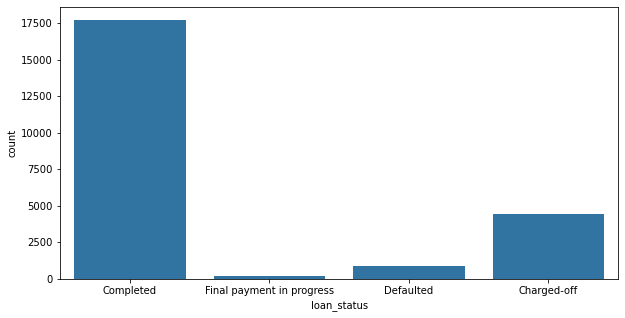

In [158]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data=completed_09_01, x='loan_status', color=base_color);

#### 4) The counts of the 2 categories ('repaid_yn')

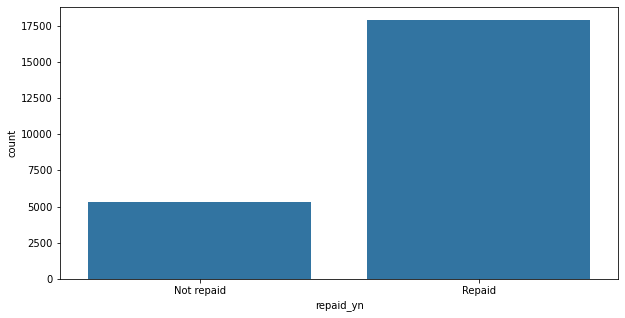

In [159]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data=completed_09_01, x='repaid_yn', color=base_color);

### **Answer** (loan outcome status): 
Between 13.07.2009 and 28.02.2014 there were 23,222 completed loans (with data on each of the variables of interest, cancelled loans excluded). Out of those, 17,892 were repaid (including 189 for which the final payment was in progress) and 5,330 were not repaid (885 defaulted and 4,445 charged-off). The difference between repaid and unrepaid loans was 3.38-fold. 

### 6.3.2 Borrower Assessment Variables 
<a id="xba"></a>

[back to table of contents](#contents)

#### 1) Interest Rate
<a id="xbr"></a>

Variable: 'BorrowerRate'

#### Question: What is the shape of the distribution, what is the mode, what are the minimum and maximum values of the interest rate in the sample of interest?

#### 1) Minimum and maximum

In [160]:
completed_09_01['BorrowerRate'].describe()

count   23218.000
mean        0.215
std         0.085
min         0.040
25%         0.140
50%         0.220
75%         0.290
max         0.360
Name: BorrowerRate, dtype: float64

#### 2) Mode

In [161]:
completed_09_01['BorrowerRate'].mode()[0]

0.32

#### 3) Shape of distribution

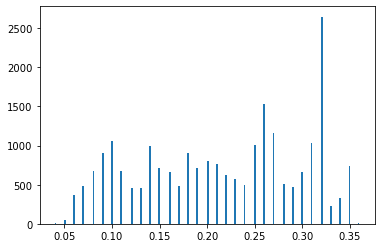

In [162]:
#prosper_df_copy_CSup = prosper_df_copy[np.isfinite(prosper_df_copy['CreditScoreRangeUpper'])]
plt.hist(data = completed_09_01, x = 'BorrowerRate', bins = 200);

### **Answer** (Interest Rate):
The minimum interest rate is 4% and the maximum is 36%. The (number one) mode is 32%. The distribution is multimodal. It should be investigated, what other variables determine the distribution of the interest rate, especially, e.g., for what purpose and for that term were the loans given at the most popular interest rate of 32%.

#### 2) Customer Credit Rating 
<a id="xcscore"></a>

[back to table of contents](#contents)

Variables: 'ProsperRating (Alpha)', 'ProsperScore', 'CreditScoreRangeUpper'

#### Question: How do the three kinds of borrower credit rating compare in terms of shape of distribution and mode(s)?

#### 1) 7-level rating

In [163]:
completed_09_01['ProsperRating (Alpha)'].value_counts()

D     5120
C     3478
A     3425
E     3240
B     3207
HR    3024
AA    1724
Name: ProsperRating (Alpha), dtype: int64

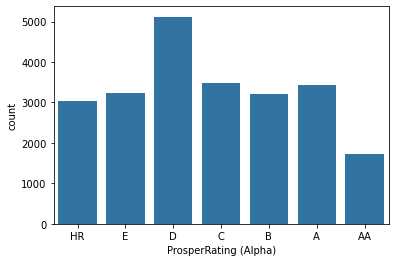

In [164]:
sb.countplot(data=completed_09_01, x='ProsperRating (Alpha)', color=base_color);

#### 2) 10-level rating

In [165]:
completed_09_01['ProsperScore'].value_counts()

8.000     4289
6.000     3482
9.000     3038
7.000     2882
5.000     2830
4.000     2295
10.000    1654
3.000     1274
2.000     1043
1.000      431
Name: ProsperScore, dtype: int64

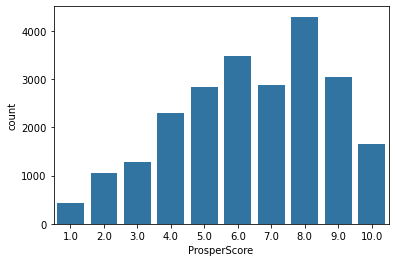

In [166]:
sb.countplot(data=completed_09_01, x='ProsperScore', color=base_color);

In [167]:
completed_09_01['ProsperScore'].value_counts()

8.000     4289
6.000     3482
9.000     3038
7.000     2882
5.000     2830
4.000     2295
10.000    1654
3.000     1274
2.000     1043
1.000      431
Name: ProsperScore, dtype: int64

#### 3) Professional customer credit rating (upper bound)

In [168]:
completed_09_01['CreditScoreRangeUpper'].describe()

count   23218.000
mean      720.523
std        53.287
min       619.000
25%       679.000
50%       719.000
75%       759.000
max       899.000
Name: CreditScoreRangeUpper, dtype: float64

In [169]:
completed_09_01['CreditScoreRangeUpper'].mode()[0]

679.0

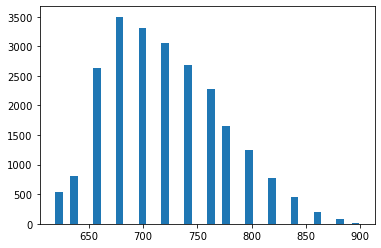

In [170]:
plt.hist(data = completed_09_01, x = 'CreditScoreRangeUpper', bins = 40);

### **Answer** (Customer Credit Rating): 
The 7-level rating ('ProsperRating (Alpha)') is definitely unimodal, with the most highly spread value of D (D is the 5th best value, with HR being the worst and AA the best). 

The 10-level rating ('ProsperScore') shows a more differentiated picture, with the peak of the distribution positioned to the right side at 8 (the rightmost score of 10 being the most positive rating). 

The professional credit score ('CreditScoreRangeUpper'), in contrast to 'ProsperScore', has a positively skewed distribution whose peak is between the scores of 650 and 700 (mode = 679; median = 719). A comparison to the distribution of the same variable in the whole data set shows that completed loans do not include the lowest values of this variable (below  619). Generally, scores below 600 are considered bad.

### 6.3.3 Loan Characteristics 
<a id="xloanchar"></a>

[back to table of contents](#contents)

#### Questions: How are loan purpose categories ordered in terms of popularity? What is the shape of the distribution, the range and the mode of loan amounts?

#### 1) Loan Purpose 
<a id="xpurpose"></a>

Variable: 'loan_purpose'

In [171]:
purpose_counts = completed_09_01['loan_purpose'].value_counts()
purpose_counts

Debt Consolidation      11837
Other                    4242
Home Improvement         2433
Business                 1605
Auto                     1085
Household Expenses        506
Medical/Dental            327
Student Use               201
Vacation                  189
Taxes                     187
Large Purchases           164
Wedding Loans             159
Motorcycle                 85
Engagement Ring            55
Baby & Adoption            37
Cosmetic Procedure         37
Boat                       28
Green Loans                18
Recreational Vehicle       16
Name: loan_purpose, dtype: int64

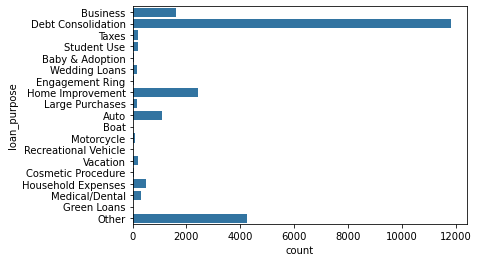

In [172]:
sb.countplot(data=completed_09_01, y='loan_purpose', color=base_color);

#### Percentage graph of loan purpose:

In [173]:
# series with count of purpose categories
purpose_counts = completed_09_01['loan_purpose'].value_counts()
# order by count from highest to lowest
purpose_order = purpose_counts.index
# sum of non-null values
n_purpose = purpose_counts.sum()

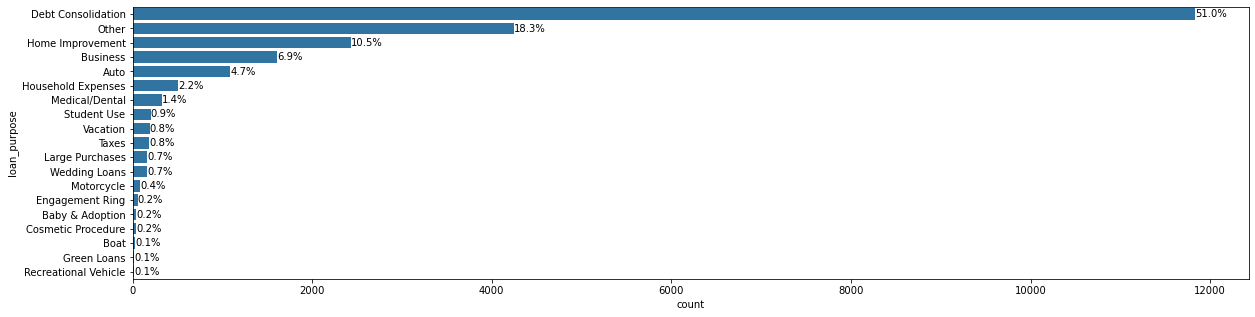

In [174]:
# print percentage on horizontal bars
plt.figure(figsize = [20, 5])
sb.countplot(data=completed_09_01, y='loan_purpose', color=base_color, order=purpose_order);

for i in range (purpose_counts.shape[0]):
    count = purpose_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_purpose)
    plt.text(count+1, i, pct_string, va='center')

#### 2) Loan Amount 
<a id="xamount"></a>

[back to table of contents](#contents)

Variable: 'LoanOriginalAmount'

In [175]:
completed_09_01['LoanOriginalAmount'].describe()

count   23218.000
mean     6534.554
std      4897.139
min      1000.000
25%      3000.000
50%      5000.000
75%      8799.250
max     35000.000
Name: LoanOriginalAmount, dtype: float64

In [176]:
completed_09_01['LoanOriginalAmount'].mode()[0]

4000

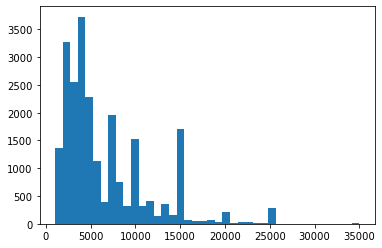

In [177]:
plt.hist(data = completed_09_01, x = 'LoanOriginalAmount', bins = 40);

#### **Answer** (loan characteristics: purpose and amount): 
The most popular purpose category in completed loans by far is debt consolidation (n = 11,839), followed by the "umbrella" category "other" (n = 4,243) and home improvement (n = 2,433). Business loans are next with n = 1,606. 

The size of completed loans is between \\$1,000 and \\$35,000. The median value is \\$5,000 and the mode is \\$4,000. The distribution is positively skewed and multimodal. 

The relationship between these two variables would be interesting to investigate (i.e., whether business loans are generally larger).

### 6.3.4 Borrower Characteristics 
<a id="xbch"></a>

[back to table of contents](#contents)

#### Questions: What are the counts of the categories of employment status, what are the shape and measures of distribution of the employment status duration? What is the shape and measures of distribution of the stated monthly income; what are the proportions of different annual income categories, and what is the proportion of verifiable income?

#### 1) Employment 
<a id="xemployment"></a>
Variables: 'EmploymentStatus'; 'EmploymentStatusDuration'

In [178]:
completed_09_01['EmploymentStatus'].value_counts()

Employed         15894
Full-time         6253
Other              659
Retired            236
Part-time          174
Self-employed        1
Not employed         1
Not available        0
Name: EmploymentStatus, dtype: int64

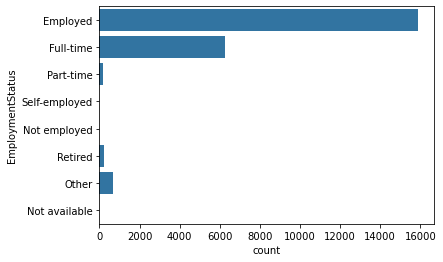

In [179]:
sb.countplot(data=completed_09_01, y='EmploymentStatus', color=base_color);

In [180]:
completed_09_01['EmploymentStatusDuration'].describe()

count   23218.000
mean       94.013
std        88.995
min         0.000
25%        30.000
50%        65.000
75%       132.000
max       755.000
Name: EmploymentStatusDuration, dtype: float64

In [181]:
completed_09_01['EmploymentStatusDuration'].mode()[0]

3.0

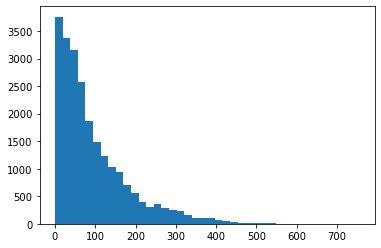

In [182]:
plt.hist(data = completed_09_01, x = 'EmploymentStatusDuration', bins = 40);

#### 2) Income 
<a id="xincome"></a>

[back to table of contents](#contents)

Variables: 'StatedMonthlyIncome'; 'IncomeRange'; 'IncomeVerifiable'

In [183]:
completed_09_01['StatedMonthlyIncome'].describe()

count    23218.000
mean      5626.945
std       5689.959
min          1.417
25%       3333.333
50%       4750.000
75%       6833.333
max     483333.333
Name: StatedMonthlyIncome, dtype: float64

In [184]:
completed_09_01['StatedMonthlyIncome'].mode()[0]

5000.0

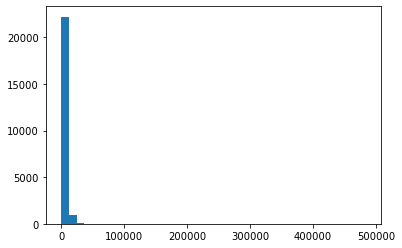

In [185]:
plt.hist(data = completed_09_01, x = 'StatedMonthlyIncome', bins = 40);

In [186]:
completed_09_01['IncomeRange'].value_counts()

$25,000-49,999    7433
$50,000-74,999    6858
$75,000-99,999    3788
$100,000+         3632
$1-24,999         1506
Not employed         1
Not displayed        0
$0                   0
Name: IncomeRange, dtype: int64

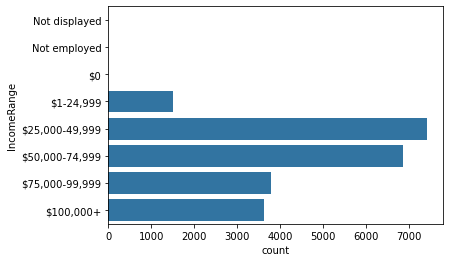

In [187]:
base_color = sb.color_palette()[0]
sb.countplot(data=completed_09_01, y='IncomeRange', color=base_color);

In [188]:
completed_09_01['IncomeVerifiable'].value_counts()

True     23217
False        1
Name: IncomeVerifiable, dtype: int64

#### 3) Housing 
<a id="xhousing"></a>

[back to table of contents](#contents)

Variable: 'IsBorrowerHomeowner'

In [189]:
completed_09_01['IsBorrowerHomeowner'].value_counts()

True     12402
False    10816
Name: IsBorrowerHomeowner, dtype: int64

#### **Answer** (borrower characteristics: employment and housing):
The most populous category of employment status is 'employed' (n = 15894), which unfortunately is not well defined against the other categories (i.e. 'full-time' and 'part-time'). The second category by count is 'full-time' (n = 6253). The 'self-employed' and 'not employed' categories are practically empty (n=1) and the 'retired', 'part-time' and 'other' groups are much smaller than the first two by count (n = 236, n = 174, n = 659).

The employment duration in months is positively skewed, with a minimum of zero and a maximum of 755 months; the median is at 65 months (5 years 5 months) and the mode is 3 months. 

The range of stated monthly income in the sample of interest is between \\$1.42 and \\$483,333.33. The distribution is strongly positively skewed with a median of \\$4,750 and a mode of \\$5,000. 

The largest category of annual income range by count is \\$25,000-49,999. The next largest is \$50,000-74,999. All stated incomes are verified bar one.

As for housing, there are roughly as many homeowners as non-homeowners in the sample (12,402 vs. 10,816).

### 6.3.5 Borrower Credit History Variables   
<a id="xhistory"></a>

[back to table of contents](#contents)

#### 1) Credit History  
<a id="xlenght"></a>

Variables: FirstRecordedCreditLine &rarr; 'credit_history_months'; CurrentCreditLines &rarr; 'current_credits';
OpenCreditLines &rarr; 'open_credits'; 'TotalCreditLinespast7years'

### Question: What are the distributions of the continuous variables that characterize the borrower credit history (credit history lenght, number of current credits, number of open credits, number of credits for the past 7 years); what are the largest categories of the categorical variables (current credits, open credits)?

In [190]:
completed_09_01['credit_history_months'].describe()

count   23218.000
mean      197.728
std        89.689
min         7.480
25%       137.001
50%       185.439
75%       246.977
max       686.556
Name: credit_history_months, dtype: float64

In [191]:
completed_09_01['credit_history_months'].mode()[0]

77.46531295151699

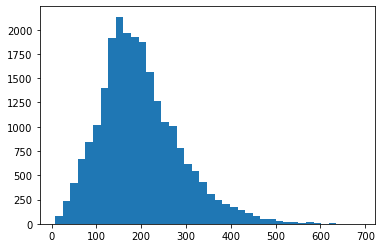

In [192]:
plt.hist(data = completed_09_01, x = 'credit_history_months', bins = 40);

In [193]:
completed_09_01['CurrentCreditLines'].describe()

count   23218.000
mean        9.753
std         5.310
min         0.000
25%         6.000
50%         9.000
75%        13.000
max        59.000
Name: CurrentCreditLines, dtype: float64

In [194]:
completed_09_01['CurrentCreditLines'].mode()[0]

8.0

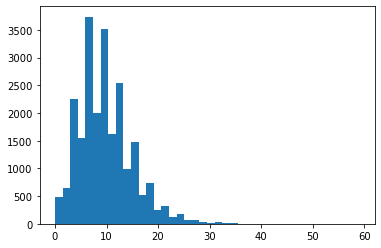

In [195]:
plt.hist(data = completed_09_01, x = 'CurrentCreditLines', bins = 40);

In [196]:
completed_09_01['current_credits'].value_counts()

9-12          6497
6-8           5746
1-5           4819
13- 16        3646
19-25         1189
17-18          944
26 or more     253
None           124
Name: current_credits, dtype: int64

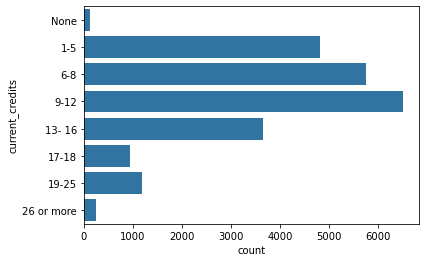

In [197]:
sb.countplot(data=completed_09_01, y='current_credits', color=base_color);

In [198]:
completed_09_01['OpenCreditLines'].describe()

count   23218.000
mean        8.603
std         4.789
min         0.000
25%         5.000
50%         8.000
75%        11.000
max        48.000
Name: OpenCreditLines, dtype: float64

In [199]:
completed_09_01['OpenCreditLines'].mode()[0]

6.0

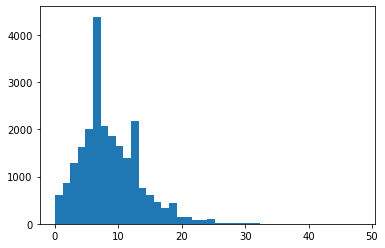

In [200]:
plt.hist(data = completed_09_01, x = 'OpenCreditLines', bins = 40);

In [201]:
completed_09_01['open_credits'].value_counts()

5-7           6398
8-10          5591
11-14         4312
1-4           4228
17-22         1157
15-16         1065
23 or more     295
None           172
Name: open_credits, dtype: int64

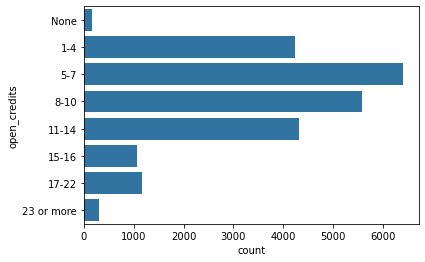

In [202]:
sb.countplot(data=completed_09_01, y='open_credits', color=base_color);

In [203]:
completed_09_01['TotalCreditLinespast7years'].describe()

count   23218.000
mean       27.176
std        14.095
min         2.000
25%        17.000
50%        25.000
75%        35.000
max       124.000
Name: TotalCreditLinespast7years, dtype: float64

In [204]:
completed_09_01['TotalCreditLinespast7years'].mode()[0]

20.0

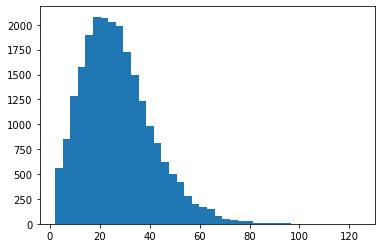

In [205]:
plt.hist(data = completed_09_01, x = 'TotalCreditLinespast7years', bins = 40);

### Answer (Credit History):
The credit history of the sample of interest ranges from 7.5 months to 686.6 months (ca. 57 years). The median is 185.4 months (ca. 16 years) and the mode is 77.5 months (ca. 7 years). The distribution is positively skewed.

The borrowers had between 0 and 59 current credit lines, median of 9 and mode of 8. The distribution is positively skewed. When the variable is translated into separate categories, the most popular range is between 9 and 12 current credit lines, followed by between 6 and 8 credit lines. 

The open credit lines ranged between 0 and 48, median = 8, mode = 6, distibution was positively skewed. The most popular range of open credit lines was between 5 and 7, followed by between 8 and 10. 

The total credit lines in the past 7 years ranged between 2 and 124, median = 25, mode = 20. The distribution is positively skewed. 

#### 2) Open Revolving Accounts 
<a id="xaccounts"></a>

[back to table of contents](#contents)

Variables: 'OpenRevolvingAccounts' &rarr; 'open_accounts'; 'OpenRevolvingMonthlyPayment'

#### Question: What are the shapes and measures of distribution of the continuous variables (number of open revolving accounts and amount of open revolving monthly payment)? What are the largest categories of the categorical variable number of open revolving accounts by count?

In [206]:
completed_09_01['OpenRevolvingAccounts'].describe()

count   23218.000
mean        6.518
std         4.271
min         0.000
25%         4.000
50%         6.000
75%         9.000
max        47.000
Name: OpenRevolvingAccounts, dtype: float64

In [207]:
completed_09_01['OpenRevolvingAccounts'].mode()[0]

4

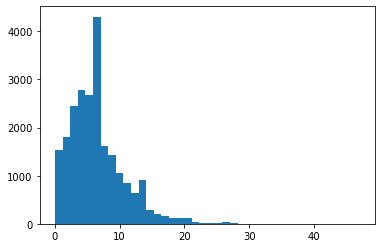

In [208]:
plt.hist(data = completed_09_01, x = 'OpenRevolvingAccounts', bins = 40);

In [209]:
completed_09_01['open_accounts'].value_counts()

6-8           5920
4-5           5460
1-3           5410
9-11          3332
12-14         1555
15-19          887
None           371
20 or more     283
Name: open_accounts, dtype: int64

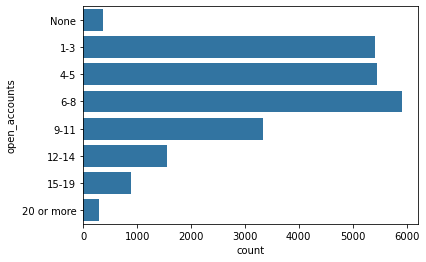

In [210]:
base_color = sb.color_palette()[0]
sb.countplot(data=completed_09_01, y='open_accounts', color=base_color);

In [211]:
completed_09_01['OpenRevolvingMonthlyPayment'].describe()

count   23218.000
mean      352.383
std       387.568
min         0.000
25%       101.000
50%       237.000
75%       465.000
max      5155.000
Name: OpenRevolvingMonthlyPayment, dtype: float64

In [212]:
completed_09_01['OpenRevolvingMonthlyPayment'].mode()[0]

0.0

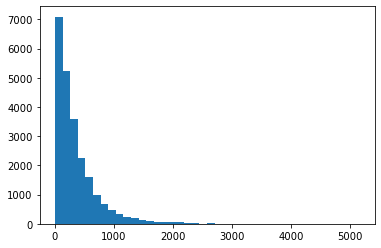

In [213]:
plt.hist(data = completed_09_01, x = 'OpenRevolvingMonthlyPayment', bins = 40);

#### Answer (open revolving accounts and monthly payment):
The borrowers in the sample of interest had between 0 and 47 open revolving accounts. The median is 6, the mode is 4. The distribution is positively skewed. The same variable presented as categorical showed that the most popular range of open revolving accounts was between 6 and 8, followed by between 4 and 5 and between 1 and 3. 

The open revolving monthly payment ranged between \\$0 and \\$5,155. The median was \\$237. The mode was \\$0. The distribution is positively skewed. 

#### 3) Revolving Utilization
<a id="xrevutil"></a>

[back to table of contents](#contents)

Variable: 'BankcardUtilization' ("The percentage of available revolving credit that is utilized at the time the credit profile was pulled.")

#### Question: What is the shape of the distribution of revolving credit utilization percentage? What are the measures of the distribution?

In [214]:
completed_09_01['BankcardUtilization'].describe()

count   23218.000
mean        0.521
std         0.328
min         0.000
25%         0.230
50%         0.550
75%         0.820
max         2.500
Name: BankcardUtilization, dtype: float64

In [215]:
completed_09_01['BankcardUtilization'].mode()[0]

0.0

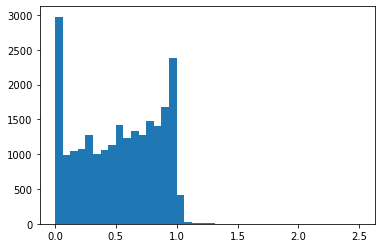

In [216]:
plt.hist(data = completed_09_01, x = 'BankcardUtilization', bins = 40);

#### Answer (Revolving Utilization):
The distribution is bimodal (the modes being 0% and 100%). The median was 55%. The maximum utilization was 250%. It would be interesting to investigate the borrowers whose utilization rate was 100% or more (and whether that predicts default rate).

#### 4) Delinquencies 
<a id="xdelinquencies"></a>

[back to table of contents](#contents)

Variables: CurrentDelinquencies &rarr; 'delinquencies'; AmountDelinquent &rarr; 'amount_delinquent';
DelinquenciesLast7Years &rarr; 'delinquencies_7y'

#### Question: What are the shapes and measures of distribution of the continuous variables number of current delinquencies on loans, sum of delinquencies for the last 7 years, and amount of payments on delinquencies; what are the most populated categories of the categorical variables?

In [217]:
completed_09_01['CurrentDelinquencies'].describe()

count   23218.000
mean        0.381
std         1.248
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        32.000
Name: CurrentDelinquencies, dtype: float64

In [218]:
completed_09_01['CurrentDelinquencies'].mode()[0]

0.0

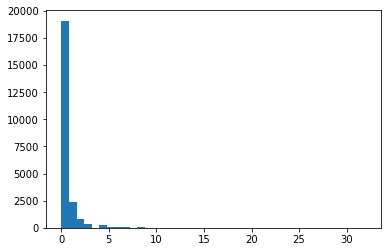

In [219]:
plt.hist(data = completed_09_01, x = 'CurrentDelinquencies', bins = 40);

In [220]:
completed_09_01['delinquencies'].value_counts()

None         19102
1             2374
2              787
3-5            662
6 or more      293
Name: delinquencies, dtype: int64

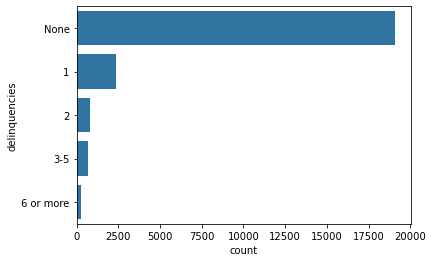

In [221]:
sb.countplot(data=completed_09_01, y='delinquencies', color=base_color);

In [222]:
completed_09_01['AmountDelinquent'].describe()

count    23218.000
mean      1034.224
std       7446.892
min          0.000
25%          0.000
50%          0.000
75%          0.000
max     327677.000
Name: AmountDelinquent, dtype: float64

In [223]:
completed_09_01['AmountDelinquent'].mode()[0]

0.0

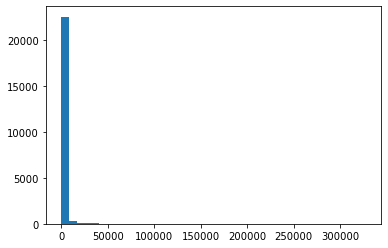

In [224]:
plt.hist(data = completed_09_01, x = 'AmountDelinquent', bins = 40);

In [225]:
completed_09_01['amount_delinquent'].value_counts()

None              19859
352-3,040          1164
1-351              1034
3,040-24,632        928
24,632 or more      233
Name: amount_delinquent, dtype: int64

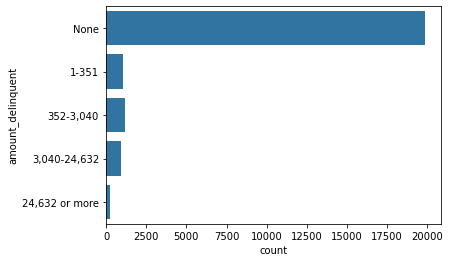

In [226]:
sb.countplot(data=completed_09_01, y='amount_delinquent', color=base_color);

In [227]:
completed_09_01['DelinquenciesLast7Years'].describe()

count   23218.000
mean        3.514
std         8.803
min         0.000
25%         0.000
50%         0.000
75%         2.000
max        99.000
Name: DelinquenciesLast7Years, dtype: float64

In [228]:
completed_09_01['DelinquenciesLast7Years'].mode()[0]

0.0

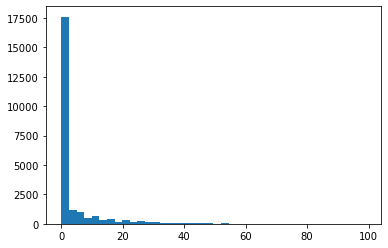

In [229]:
plt.hist(data = completed_09_01, x = 'DelinquenciesLast7Years', bins = 40);

In [230]:
completed_09_01['delinquencies_7y'].value_counts()

None          16187
1-11           4605
12-20          1191
21-42           993
43 or more      242
Name: delinquencies_7y, dtype: int64

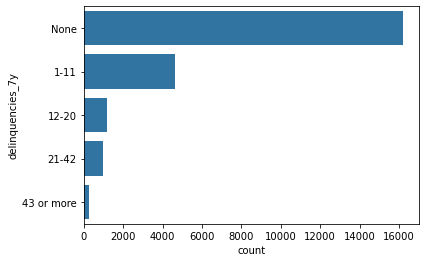

In [231]:
sb.countplot(data=completed_09_01, y='delinquencies_7y', color=base_color);

#### Answer (delinquencies):
The current delinquencies of borrowers in the sample of interest ranged between 0 and 32, median = 0, mode = 0. The distribution is highly poitively skewed. The same variable presented as categorical showed that the largest category by count was the one of no delinquencies.

The delinquencies in the past 7 years ranged between 0 and 99, median = 0, mode = 0, strong positive skewness. Translated into categories: most borrowers had zero delinquencies, the next most populated category was 1-11 delinquencies.

The amount delinquent ranged between \\$0 and \\$327,677, median = 0, mode = 0, strong positive skewness. When the variable is transformed into ranges, the largest category by count is \\$0. 

#### 5) Inquiries by Creditors 
<a id="xinquiries"></a>

[back to table of contents](#contents)

Variables: 'InquiriesLast6Months' &rarr; 'inquiries_6m'; 'TotalInquiries' &rarr; 'inquiries_total'

In [232]:
completed_09_01['InquiriesLast6Months'].describe()

count   23218.000
mean        1.209
std         1.633
min         0.000
25%         0.000
50%         1.000
75%         2.000
max        22.000
Name: InquiriesLast6Months, dtype: float64

In [233]:
completed_09_01['InquiriesLast6Months'].mode()[0]

0.0

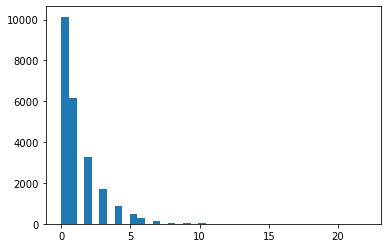

In [234]:
plt.hist(data = completed_09_01, x = 'InquiriesLast6Months', bins = 40);

In [235]:
completed_09_01['inquiries_6m'].value_counts()

None         10139
1             6141
2             3281
3             1727
4-6           1625
7 or more      305
Name: inquiries_6m, dtype: int64

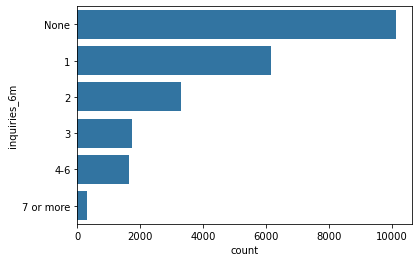

In [236]:
sb.countplot(data=completed_09_01, y='inquiries_6m', color=base_color);

In [237]:
completed_09_01['TotalInquiries'].describe()

count   23218.000
mean        4.734
std         4.288
min         0.000
25%         2.000
50%         4.000
75%         6.000
max        74.000
Name: TotalInquiries, dtype: float64

In [238]:
completed_09_01['TotalInquiries'].mode()[0]

2.0

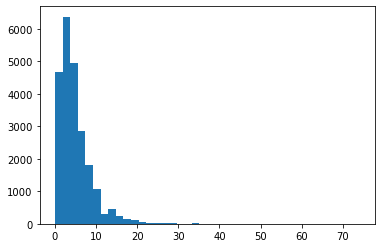

In [239]:
plt.hist(data = completed_09_01, x = 'TotalInquiries', bins = 40);

In [240]:
completed_09_01['inquiries_total'].value_counts()

2-3           6378
4-5           4964
6-9           4650
1             3002
None          1668
10-12         1374
13-19          927
20 or more     255
Name: inquiries_total, dtype: int64

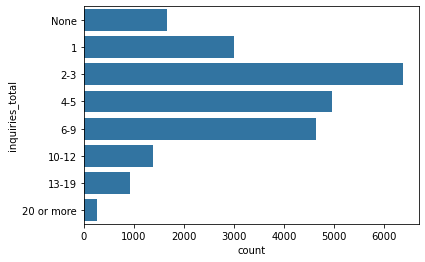

In [241]:
sb.countplot(data=completed_09_01, y='inquiries_total', color=base_color);

#### Answer (inquiries by creditors):

The inquiries by creditors about the borrowers, summed up for the last 6 months  ranged between 0 and 22, median = 1, mode = 0, strong positive skewness.

Translated into ranges, the mode was again "None", followed by 1 inquiry.

As far as total inquiries are concerned, the range was between 0 and 74, median = 4, mode = 2, strong positive skewness.

The total inquiries presented as a categorical variables showed the most popular range was 2-3 inquiries, followed by 4-5 inquiries. The third larges group was between 6 and 9 inquiries.

#### 6) Derogatory Public Records 
<a id="xpubrec"></a>

[back to table of contents](#contents)

Variables: 'PublicRecordsLast10Years' &rarr; 'pub_rec_10y'; 'PublicRecordsLast12Months' &rarr; 'pub_rec_12m'

In [242]:
completed_09_01['PublicRecordsLast10Years'].describe()

count   23218.000
mean        0.266
std         0.610
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        12.000
Name: PublicRecordsLast10Years, dtype: float64

In [243]:
completed_09_01['PublicRecordsLast10Years'].mode()[0]

0.0

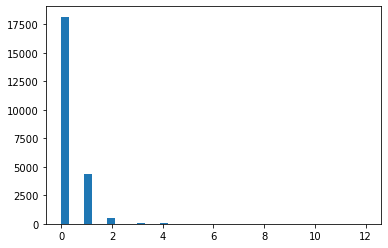

In [244]:
plt.hist(data = completed_09_01, x = 'PublicRecordsLast10Years', bins = 40);

In [245]:
completed_09_01['pub_rec_10y'].value_counts()

None         18173
1             4331
2 or more      714
Name: pub_rec_10y, dtype: int64

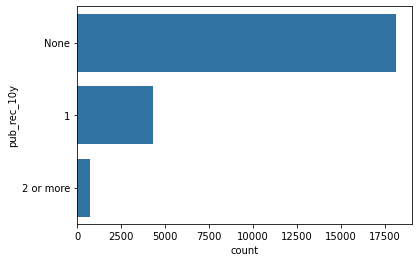

In [246]:
sb.countplot(data=completed_09_01, y='pub_rec_10y', color=base_color);

In [247]:
completed_09_01['PublicRecordsLast12Months'].describe()

count   23218.000
mean        0.011
std         0.117
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         4.000
Name: PublicRecordsLast12Months, dtype: float64

In [248]:
completed_09_01['PublicRecordsLast12Months'].mode()[0]

0.0

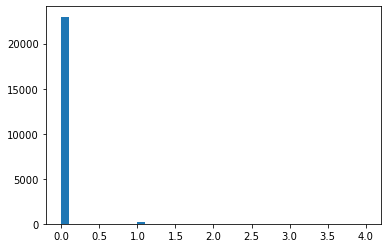

In [249]:
plt.hist(data = completed_09_01, x = 'PublicRecordsLast12Months', bins = 40);

In [250]:
completed_09_01['pub_rec_12m'].value_counts()

None         22987
1 or more      231
Name: pub_rec_12m, dtype: int64

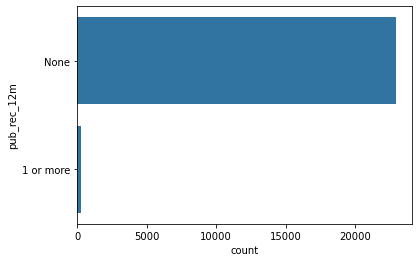

In [251]:
sb.countplot(data=completed_09_01, y='pub_rec_12m', color=base_color);

#### Answer (derogatory public records):
The derogatory public records summed up for the last 10 years ranged between 0 and 12, median = 0, mode = 0, strong positive skewness. Translated into ranges: most borrowers had 0 records, followed by 1 record and finally, by 2 or more.

Summed up for the last 12 months, the derogatory public records ranged between 0 and 4, median = 0, mode = 0, strong positive skewness. Translated into ranges: the bulk of the borrowers had no derogatory records, 231 had one or more.

### 6.3.6 Borrower Indebtedness 
<a id="xdti"></a>

[back to table of contents](#contents)

Variable: 'DebtToIncomeRatio'

Description: "The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)."

In [252]:
completed_09_01['DebtToIncomeRatio'].describe()

count   23218.000
mean        0.249
std         0.383
min         0.000
25%         0.130
50%         0.200
75%         0.300
max        10.010
Name: DebtToIncomeRatio, dtype: float64

In [253]:
completed_09_01['DebtToIncomeRatio'].mode()[0]

0.18

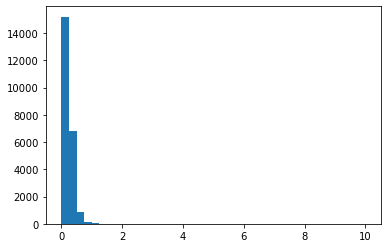

In [254]:
plt.hist(data = completed_09_01, x = 'DebtToIncomeRatio', bins = 40);

### Answer (borrower indebtedness):
The debt-to-income ratio in the sample of interest ranged between 0% and 1001% (however, data are censored at the maximum, as the variable dictionary states). The median is 20%, the mode is 18%, the distribution is strongly positively skewed.

## 7. Bivariate and Multivariate Exploration
<a id="xbiv"></a>

[back to table of contents](#contents)

### 7.1. Relationship between Predictor Variables
<a id="xpred"></a>

#### 7.1.1 Borrower Assessment Variables
<a id="xpred"></a>

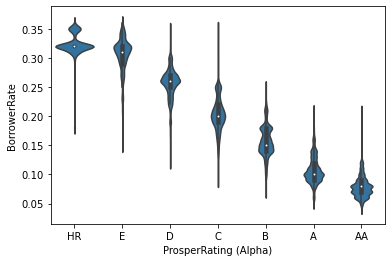

In [255]:
sb.violinplot(data = completed_09_01, x ='ProsperRating (Alpha)', y = 'BorrowerRate', color = base_color, inner = 'box');

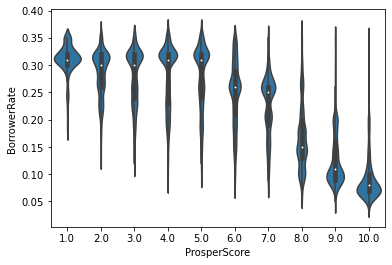

In [256]:
sb.violinplot(data = completed_09_01, x = 'ProsperScore', y = 'BorrowerRate', color = base_color, inner = 'box');

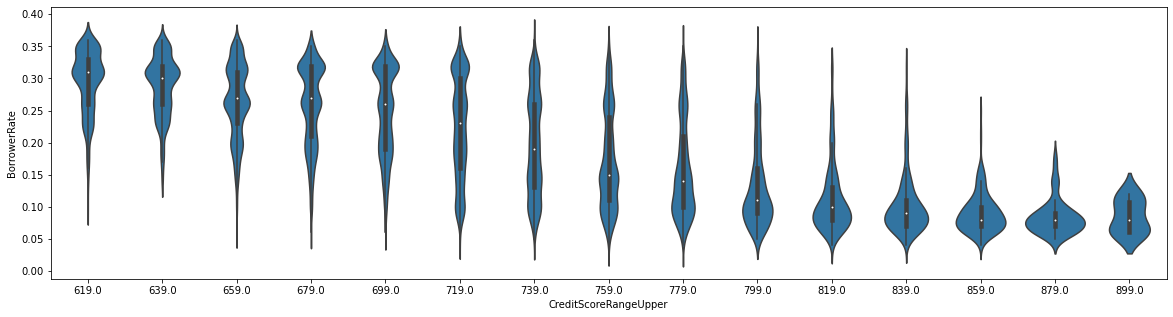

In [257]:
plt.figure(figsize = [20, 5])
sb.violinplot(data = completed_09_01, x = 'CreditScoreRangeUpper', y = 'BorrowerRate', color = base_color, inner = 'box');

#### Spearman's correlation of all 4 variables (with 'ProsperRating (numeric)' as substitute for 'ProsperRating (Alpha)')

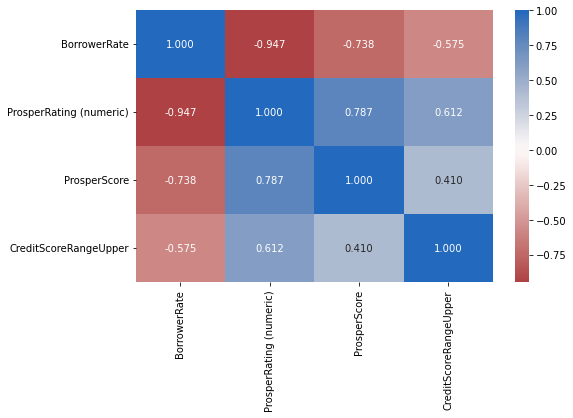

In [258]:
vars = ['BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'CreditScoreRangeUpper']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='spearman'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The correlations between the interest rate ('Borrower Rate') and the three credit rating variables are inverse (low rated borrowers are offered loans at high interest rates). The highest correlation is between interest rate and Prosper Rating (the 7-level rating, Spearman's rho = -.947). The correlations of the interest rate to the 10-level rating (Prosper Score) and to the professional credit rating (Credit Score Range Upper) are lower (Spearman's rho -.738, -.575)

#### 7.1.2 Loan Characteristics
<a id="xloanchar1"></a>

[back to table of contents](#contents)

**1) Loan purpose vs loan amount**

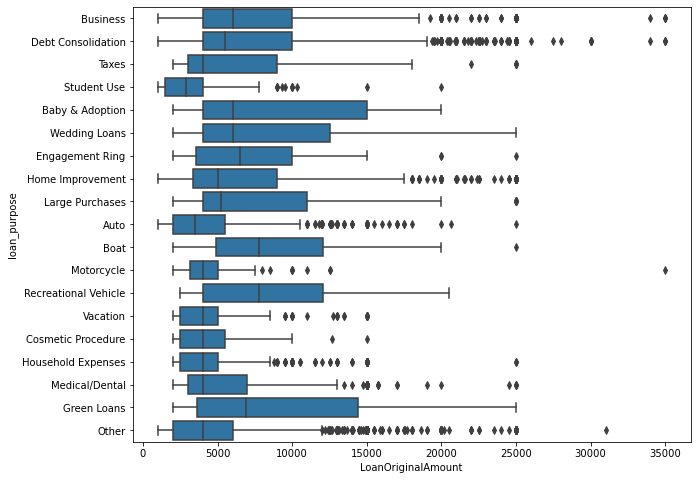

In [259]:
plt.figure(figsize = [10, 8])
sb.boxplot(data = completed_09_01, x = 'LoanOriginalAmount', y = 'loan_purpose', color = base_color);

**Loan purpose vs loan amount**: all categories of loan purpose are characterized by high positive outliers (\\$20,000 - 40,000) of loan amount, except two: 'vacation' and 'cosmetic procedure'. The highest outliers are in the categories 'business', 'motorcycle', and 'debt consolidation'.

**2) Loan term vs loan amount**

[back to table of contents](#contents)

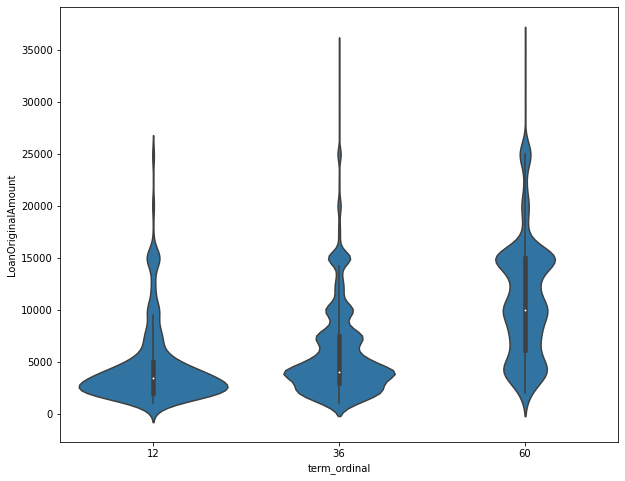

In [260]:
plt.figure(figsize = [10, 8])
sb.violinplot(data = completed_09_01, x = 'term_ordinal', y = 'LoanOriginalAmount', color = base_color, inner = 'box');

**Loan term vs loan amount**: The medians of loans of 12-month and 36-month term are approximately equal. The median amount of 60-month loans is higher. 36-month and 60-month loans contain higher outliers (> \\$35,000) compared to 12-month loans (< \\$28,000).
 
**3) Loan term vs loan purpose**

[back to table of contents](#contents)

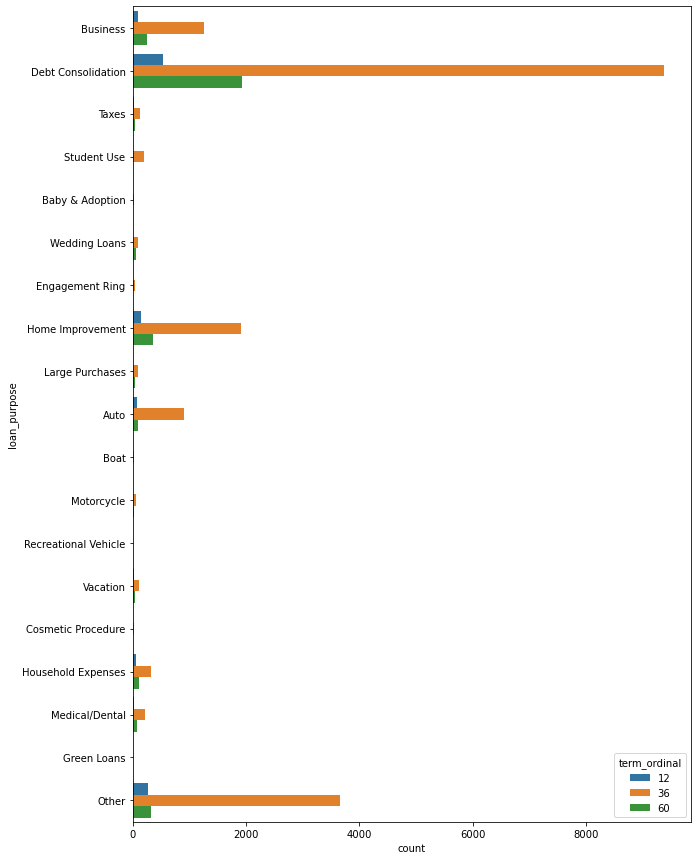

In [261]:
plt.figure(figsize = [10, 15])
sb.countplot(data = completed_09_01, y = 'loan_purpose', hue = 'term_ordinal'); 

#### 7.1.3 Borrower Characteristics
<a id="xbch1"></a>

[back to table of contents](#contents)

**1) Homeownership vs. income range**

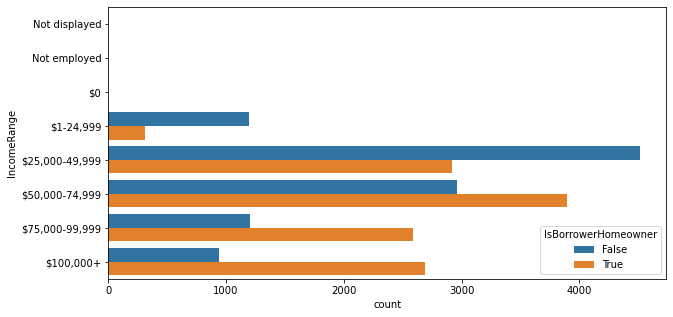

In [262]:
plt.figure(figsize = [10, 5])
sb.countplot(data = completed_09_01, y = 'IncomeRange', hue = 'IsBorrowerHomeowner'); 

**Homeownership vs. income range**: in the high income ranges (\\$50,000 - >\\$100,000), home owners prevail. In the lower income ranges (<\\$50,000) the situation is the opposite.

**2) Employment status duration vs. income range**

[back to table of contents](#contents)

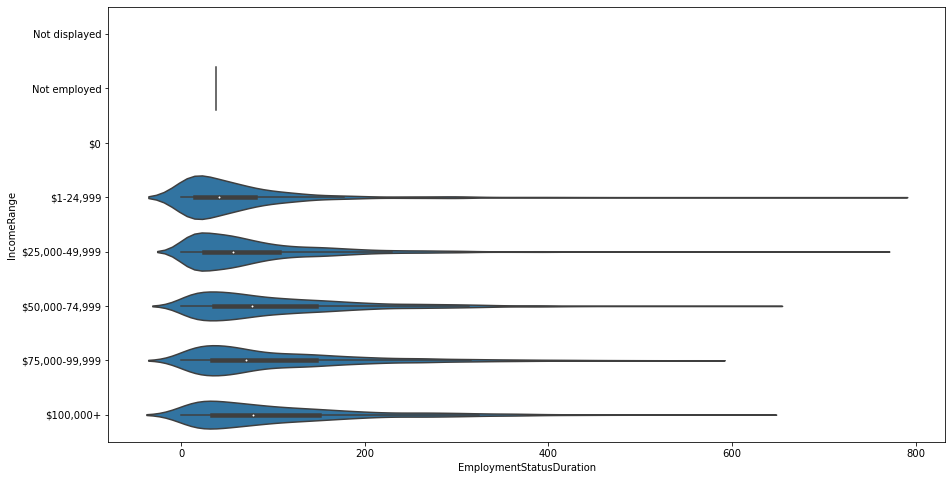

In [263]:
plt.figure(figsize = [15, 8])
sb.violinplot(data = completed_09_01, x = 'EmploymentStatusDuration', y = 'IncomeRange', color = base_color, inner = 'box');

**Employment status duration vs. income range**: there is a slight difference in the medians of employment status duration across the income levels. All groups are characterized by high positive outliers.

**3) Employment status duration vs. homeownership**

[back to table of contents](#contents)

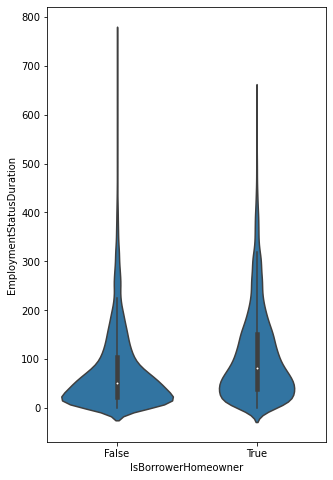

In [264]:
plt.figure(figsize = [5, 8])
sb.violinplot(data = completed_09_01, x = 'IsBorrowerHomeowner', y = 'EmploymentStatusDuration', color = base_color, inner = 'box');

**Employment status duration vs. homeownership**: homeownership tends to prevail among borrowers who have been in their current employment status for a longer time.

#### 7.1.4 Borrower Credit History Variables, Borrower Indebtedness
<a id="xhistorydti1"></a>

[back to table of contents](#contents)

 1) Time since first loan (i.e., credit history lenght) and number of total and open loans;

2) Number of open revolving accounts and the monthly payment on those;

3) "Revolving Utilization": "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit";

4) Current delinquencies, number of past delinquencies and amount of delinquencies on loans;

5) Number of inquiries by creditors (totally and for a current period);

6) Derogatory public records (Prosper saves data for the last 12 months and for the last 10 years).

The Prosper data set does not contain a "revolving utilization" variable. There is a variable 'BankcardUtilization' 

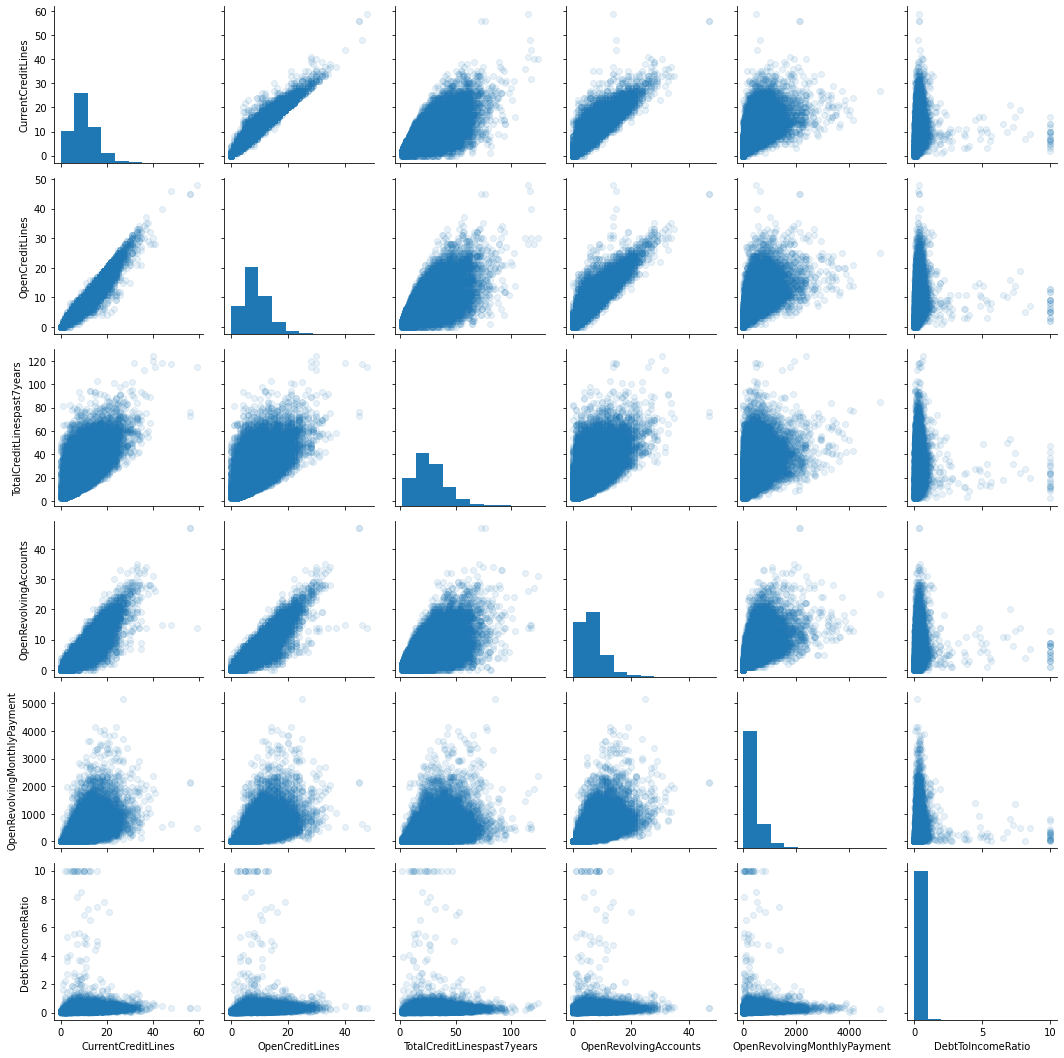

In [265]:
#scatter plots + histograms matrix
g = sb.PairGrid(data = completed_09_01, vars = ['CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
                                               'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'DebtToIncomeRatio'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.1)
plt.show();

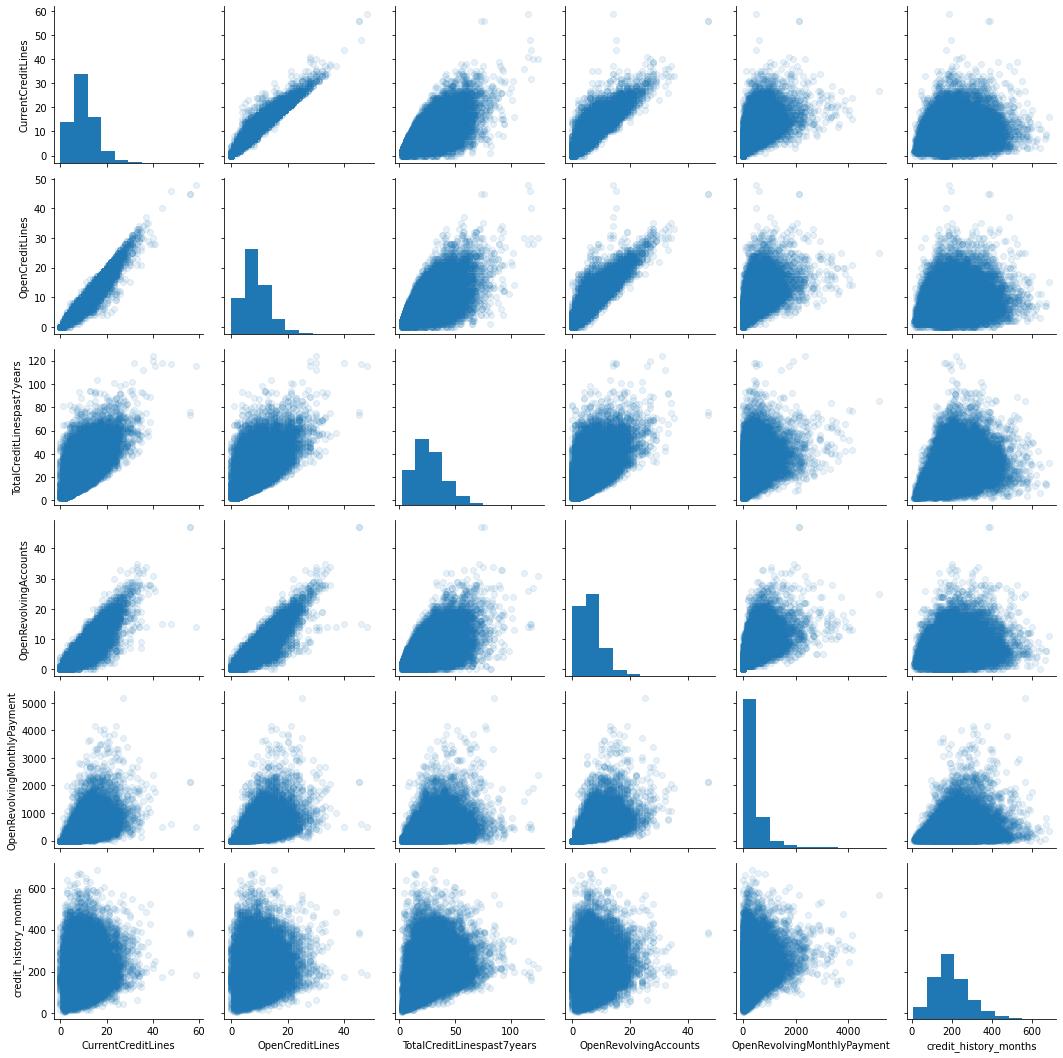

In [266]:
#scatter plots + histograms matrix
g = sb.PairGrid(data = completed_09_01, vars = ['CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
                                               'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'credit_history_months'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.1)
plt.show();

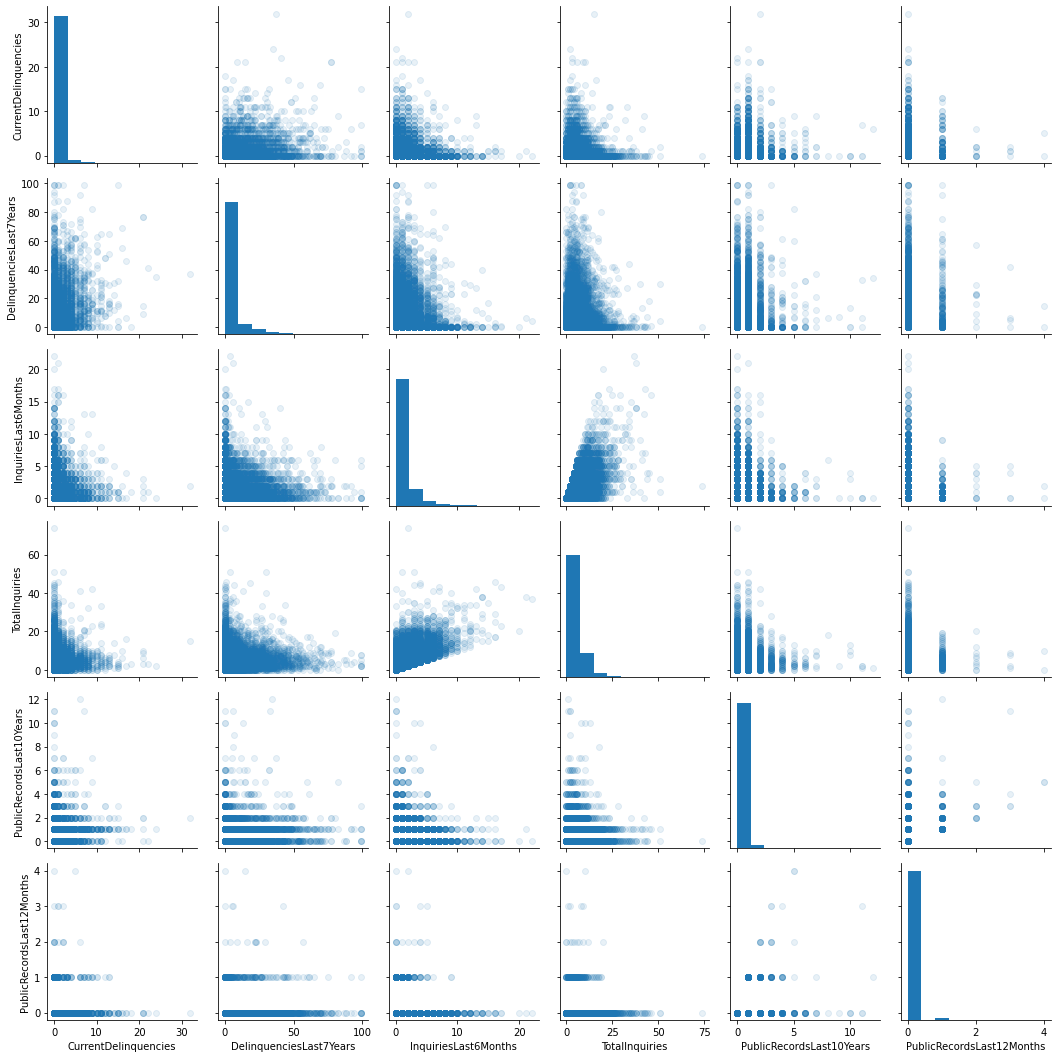

In [267]:
#scatter plots + histograms matrix
g = sb.PairGrid(data = completed_09_01, vars = ['CurrentDelinquencies', 'DelinquenciesLast7Years',
                                               'InquiriesLast6Months', 'TotalInquiries', 'PublicRecordsLast10Years',
                                               'PublicRecordsLast12Months'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.1)
plt.show();

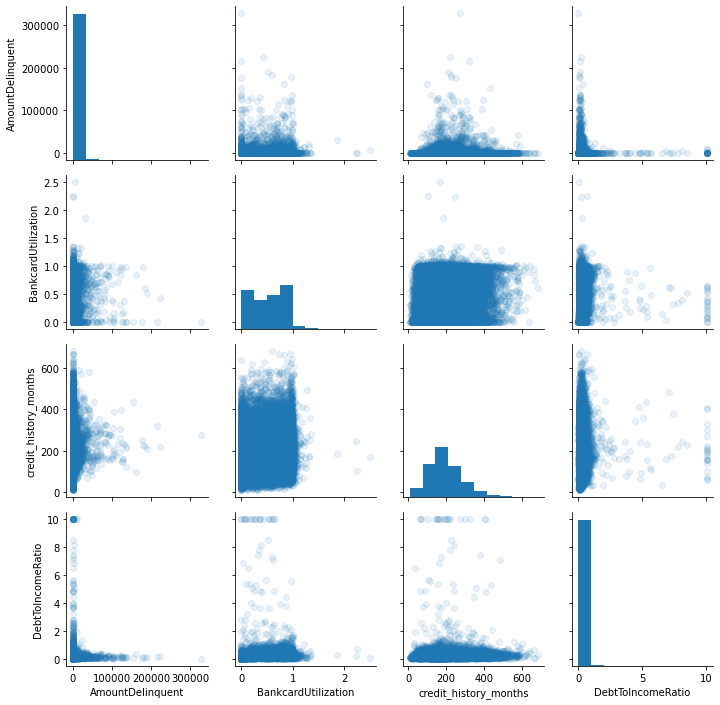

In [268]:
#scatter plots + histograms matrix
g = sb.PairGrid(data = completed_09_01, vars = ['AmountDelinquent', 'BankcardUtilization', 'credit_history_months', 
                                               'DebtToIncomeRatio'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.1)
plt.show();

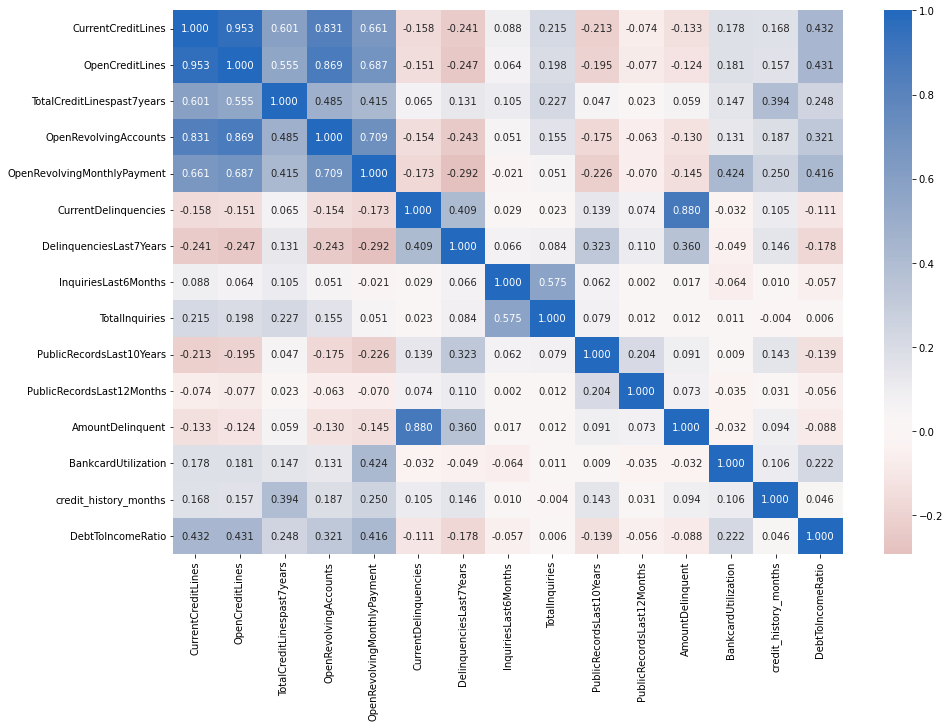

In [269]:
vars = ['CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'CurrentDelinquencies', 'DelinquenciesLast7Years',
'InquiriesLast6Months', 'TotalInquiries', 'PublicRecordsLast10Years',
'PublicRecordsLast12Months', 'AmountDelinquent', 'BankcardUtilization', 
'credit_history_months', 'DebtToIncomeRatio']
# correlation plot
plt.figure(figsize = [15, 10])
sb.heatmap(completed_09_01[vars].corr(method='spearman'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Borrower credit history variables and borrower indebtedness**. Spearman's rho (depicted on the heatmap above) is a measure of correlation of ranked scores:
- The correlation between current credit lines and open credit lines is almost perfectly positive (0.953);
- There seems to be a cluster of highly positively correlated variables: current credit lines, open credit lines, total credit lines for the past 7 years, open revolving accounts, and open revolving monthly payment.
- Interestingly, the positive correlation between the sum of derogatory public records for the last 12 months and for the last 10 years is not very high (0.204); the inquiries by creditors for the entire credit history vs. for the last 6 months are uncorrelated, which is probably due to the non-normal distribution of count variables;
- The current delinquencies and delinquencies for the last 7 years are moderately positively correlated (0.409);
- The credit history (months) variable is uncorrelated to most other variables of this group and is weakly positively correlated to the variable total credit lines for the past 7 years (0.394).
- Debt-to-income ratio has a peculiar distribution shape due to censored data (all scores above 1000% are coded as 1001%) and is not correlated to the rest of the variables.

#### 7.1.5 Correlations across Predictor Variable Categories
<a id="xpred1"></a>

[back to table of contents](#contents)

#### 7.1.5.1 Borrower assessment (credit rating variables) vs. borrower credit history variables and borrower indebtedness
<a id="xpred11"></a>

Due to the prevailing non-normality among credit history variables, we are using the transformed variables instead of the original variables. Furthermore, some of these variables are highly positively correlated to each other, therefore, we use only some of them as examples.

#### 1) current credit lines vs. interest rate over levels of credit rating variables

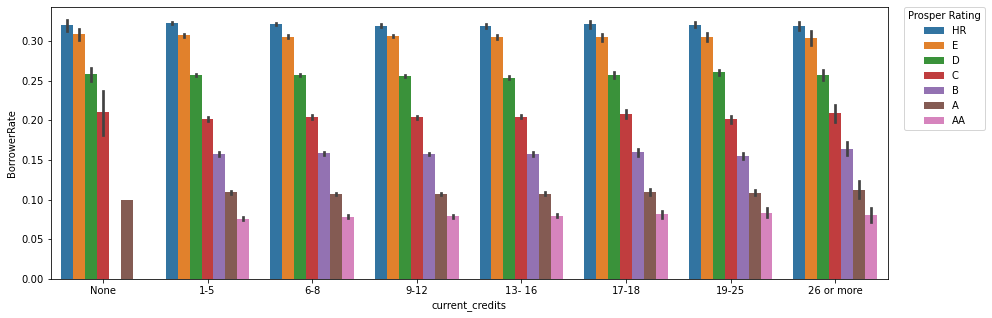

In [270]:
# current credit lines vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'current_credits', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

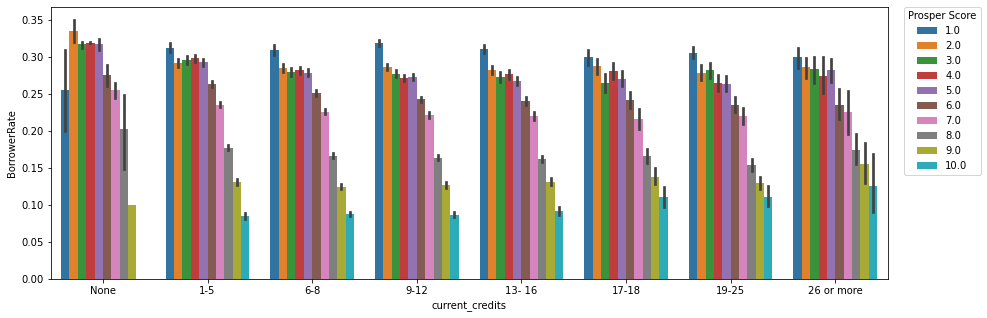

In [271]:
# current credit lines vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'current_credits', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

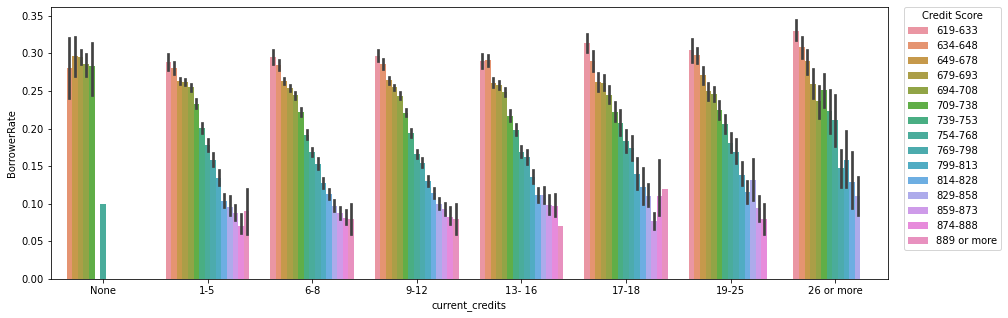

In [272]:
# current credit lines vs. interest rate over levels of Credit Score
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'current_credits', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**current credit lines vs. interest rate over levels of credit rating variables**: the group of borrowers with no current credits (i.e., without credit history) contain less or no individuals with high ratings of any kind. Other than that, the relationship between interest rate and credit rating seems to be the same or very similar for any borrowers with existing credit history.

#### 2) Open revolving monthly payment vs. interest rate over levels of credit rating variables

[back to table of contents](#contents)

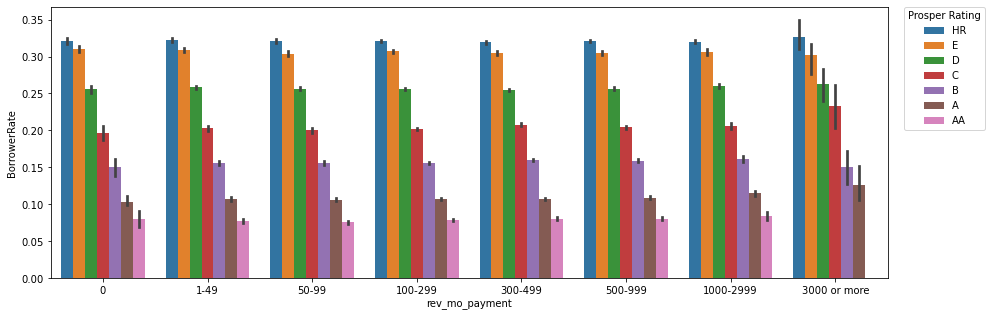

In [273]:
# Open revolving monthly payment vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'rev_mo_payment', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

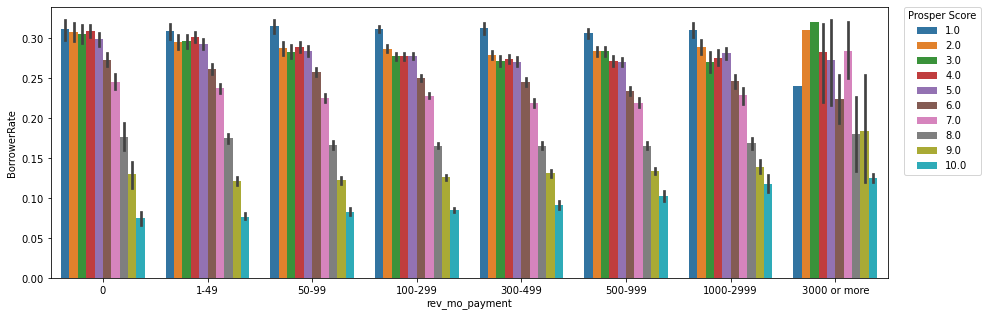

In [274]:
# Open revolving monthly payment vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'rev_mo_payment', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

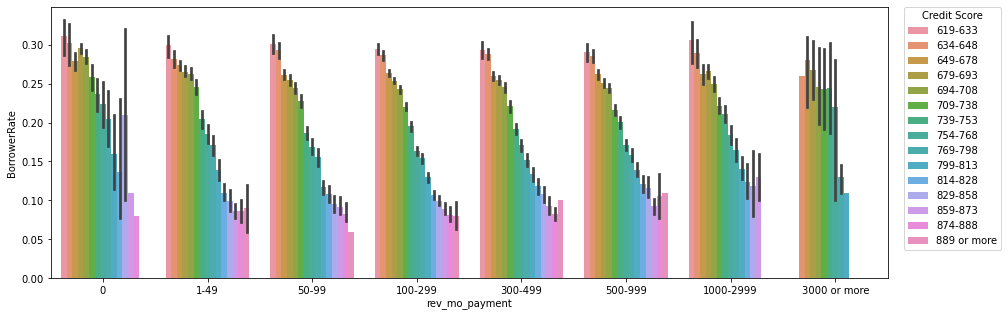

In [275]:
# Open revolving monthly payment vs. interest rate over levels of Credit Score
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'rev_mo_payment', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Open revolving monthly payment vs. interest rate over levels of credit rating variables**: The variable open revolving monthly payment is characterized by a trend which becomes obvious for revolving monthly payment of \\$3,000 or more: this category of borrowers receives loans at a higher interest rate; furthermore, this category does not contain any individuals with the highest levels of professional credit rating. In conclusion, this revolving monthly payment becomes important in terms of interest rate once it hits the \\$3,000-treshold.

#### 3) Delinquencies summed up over the Last 7 Years vs. interest rate over levels of credit rating variables

[back to table of contents](#contents)

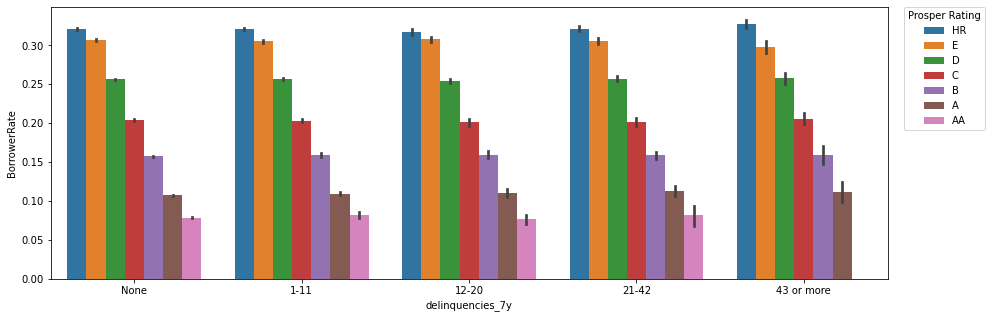

In [276]:
# Delinquencies summed up over the Last 7 Years vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'delinquencies_7y', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

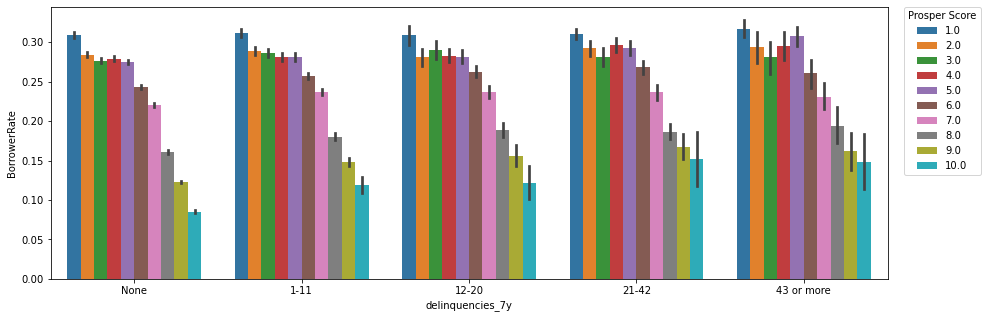

In [277]:
# Delinquencies summed up over the Last 7 Years vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'delinquencies_7y', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

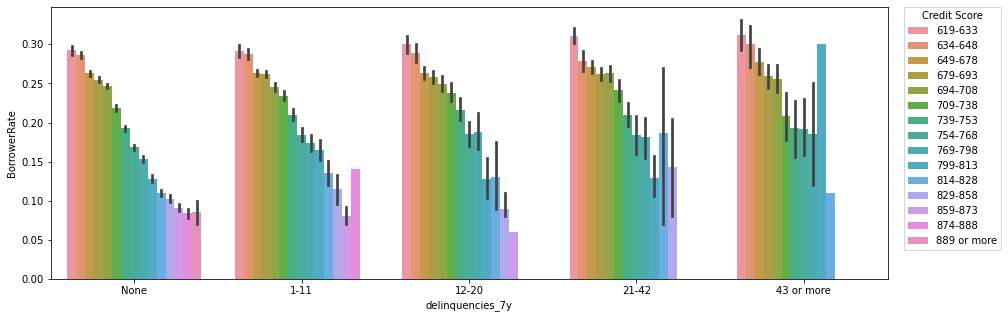

In [278]:
# Delinquencies summed up over the Last 7 Years vs. interest rate over levels of Credit Score
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'delinquencies_7y', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Delinquencies summed up over the Last 7 Years vs. interest rate over levels of credit rating variables**: Interestingly, there is a noticeable difference among the credit rating scores with regard to the last category of delinquencies (43 or more over the last 7 years): it contains no individuals with the highest levels of professional credit score, while this trend is less noticeable in the 10-level Prosper Score, while the 7-level rating contains no individuals of the highest category, AA. In conclusion, the credit rating with more levels is more sensitive towards the number of delinquencies.

#### 4) Total Inquiries by creditors vs. interest rate over levels of credit rating variables

[back to table of contents](#contents)

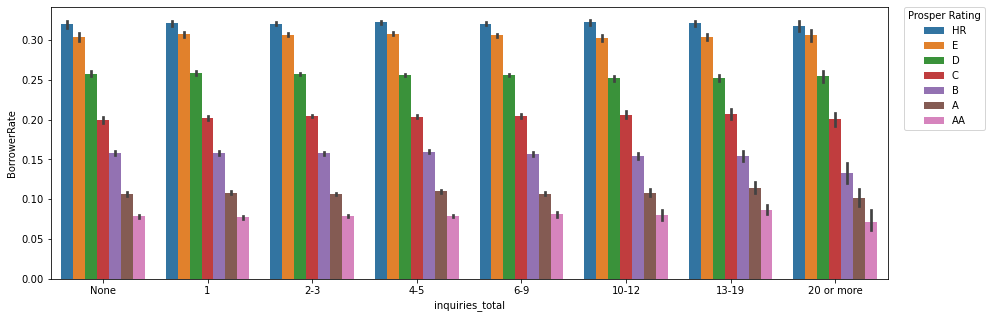

In [279]:
# Total Inquiries by creditors vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'inquiries_total', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

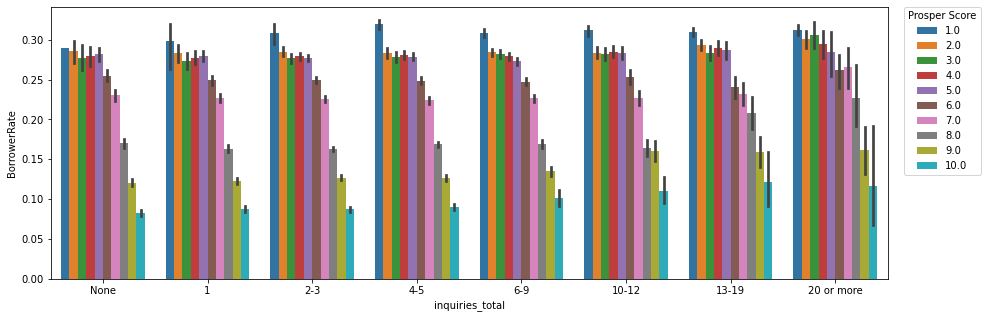

In [280]:
# Total Inquiries by creditors vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'inquiries_total', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

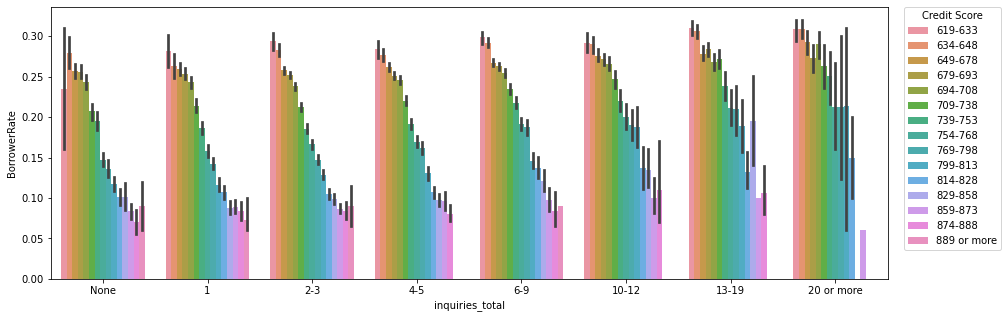

In [281]:
# Total Inquiries by creditors vs. interest rate over levels of Credit Score
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'inquiries_total', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Total Inquiries by creditors vs. interest rate over levels of credit rating variables**: The 10-level Prosper Score and the professional credit rating seem to be more sensitive towards the variable 'total inquiries by creditors'. This is especially noticeable in the last category (20 or more inquiries).

#### 5) Derogatory Public Records summed up over the Last 10 Years vs. interest rate over levels of credit rating variables

[back to table of contents](#contents)

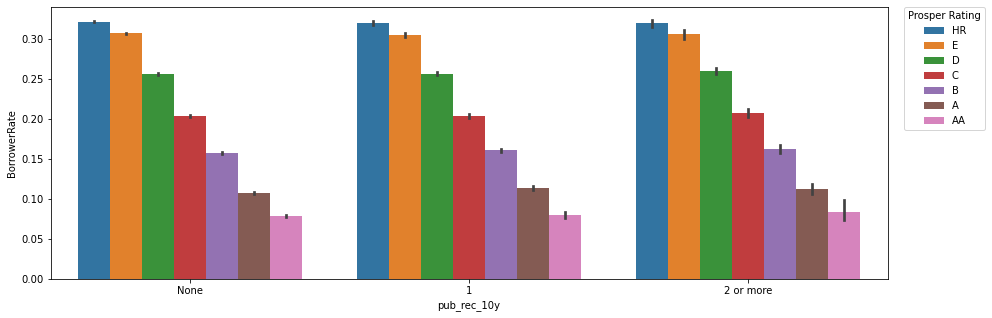

In [282]:
# Derogatory Public Records summed up over the Last 10 Years 
# vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'pub_rec_10y', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

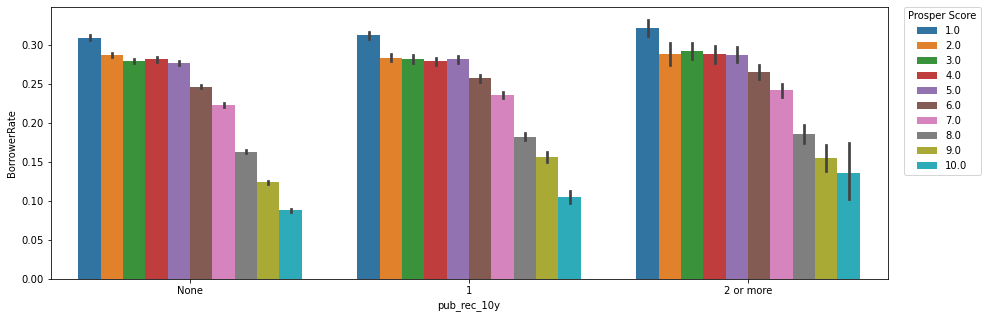

In [283]:
# Derogatory Public Records summed up over the Last 10 Years 
# vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'pub_rec_10y', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

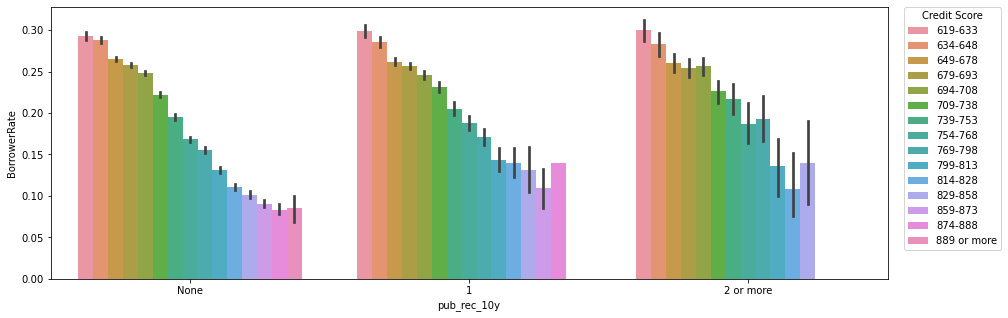

In [284]:
# Derogatory Public Records summed up over the Last 10 Years vs. interest rate over levels of Credit Score
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'pub_rec_10y', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Derogatory Public Records summed up over the Last 10 Years vs. interest rate over levels of credit rating variables**: Again, the professional credit rating seems to be more sensitive towards a credit history variable, such as the sum of derogatory public records over the last 10 years: the group of borrowers with 2 or more such records do not contains any individuals with the highest levels of credit rating.

#### 6) Amount Delinquent vs. interest rate over levels of credit rating variables

[back to table of contents](#contents)

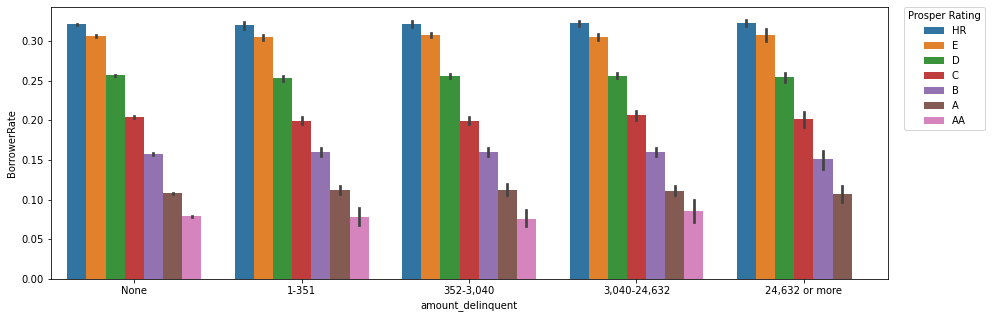

In [285]:
# Amount Delinquent vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'amount_delinquent', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

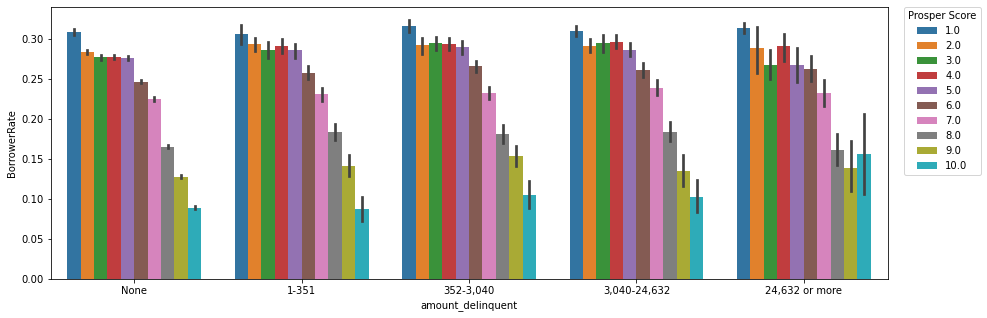

In [286]:
# Amount Delinquent vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'amount_delinquent', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

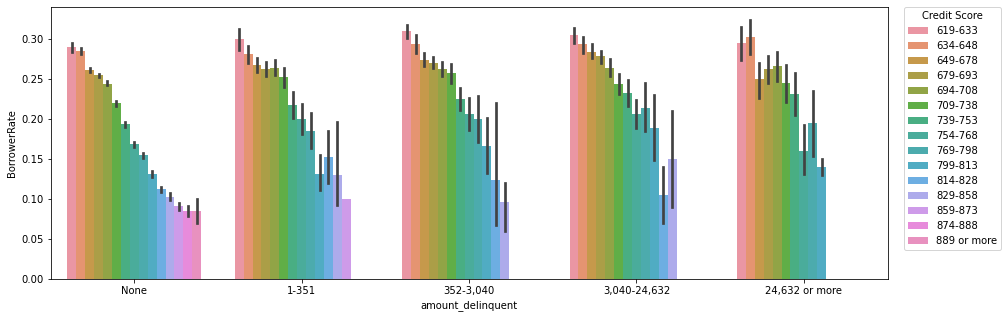

In [287]:
# Amount Delinquent vs. interest rate over levels of Credit Score
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'amount_delinquent', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Amount Delinquent vs. interest rate over levels of credit rating variables**: The high amount of delinquency on loans in combination with low credit rating drives the interest rate up. Again, the trend is more obvious with the professional credit score, where the highest credit rating levels are only present in borrowers with none or very low amont delinquent.

#### 7) Bankcard Utilization rate vs. interest rate over levels of credit rating variables

[back to table of contents](#contents)

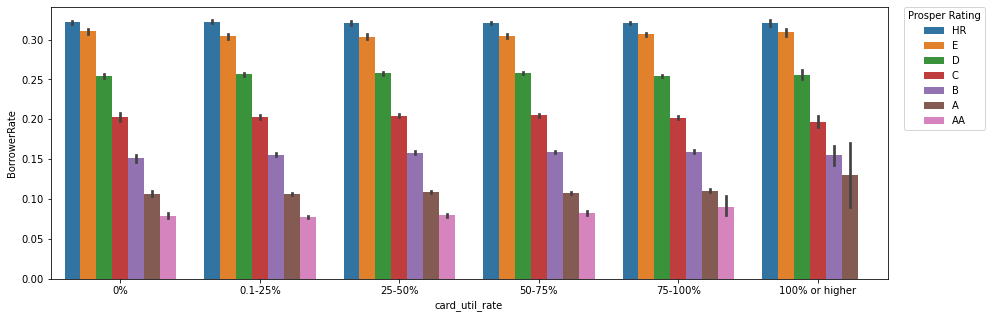

In [288]:
# Bankcard Utilization rate vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'card_util_rate', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

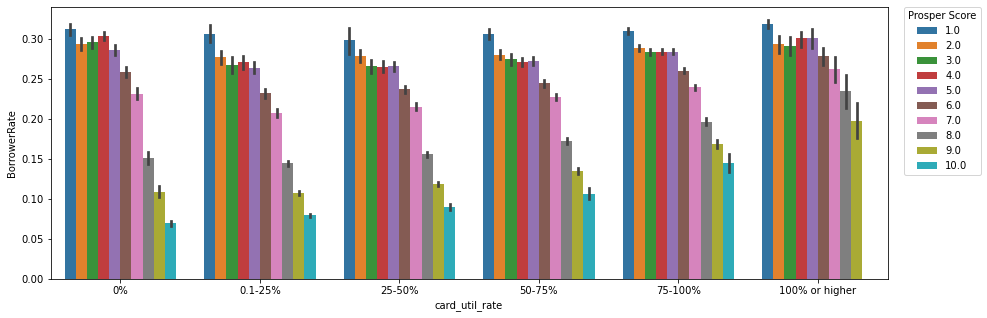

In [289]:
# Bankcard Utilization rate vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'card_util_rate', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

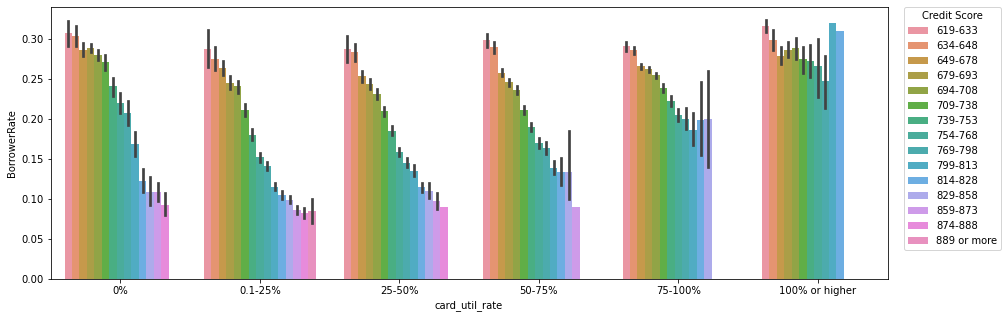

In [290]:
# Bankcard Utilization rate vs. interest rate over levels of Credit Score
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'card_util_rate', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Bankcard Utilization rate vs. interest rate over levels of credit rating variables**: The bankcard utilization rate ("the percentage of available revolving credit that is utilized at the time the credit profile was pulled") seems to visibly drive the interest rates up, especially in combination with a lower credit rating. This trend is visible in all credit rating variables, but especially with the professional credit rating.

#### 8) Borrower credit history in months vs. interest rate over levels of credit rating variables

[back to table of contents](#contents)

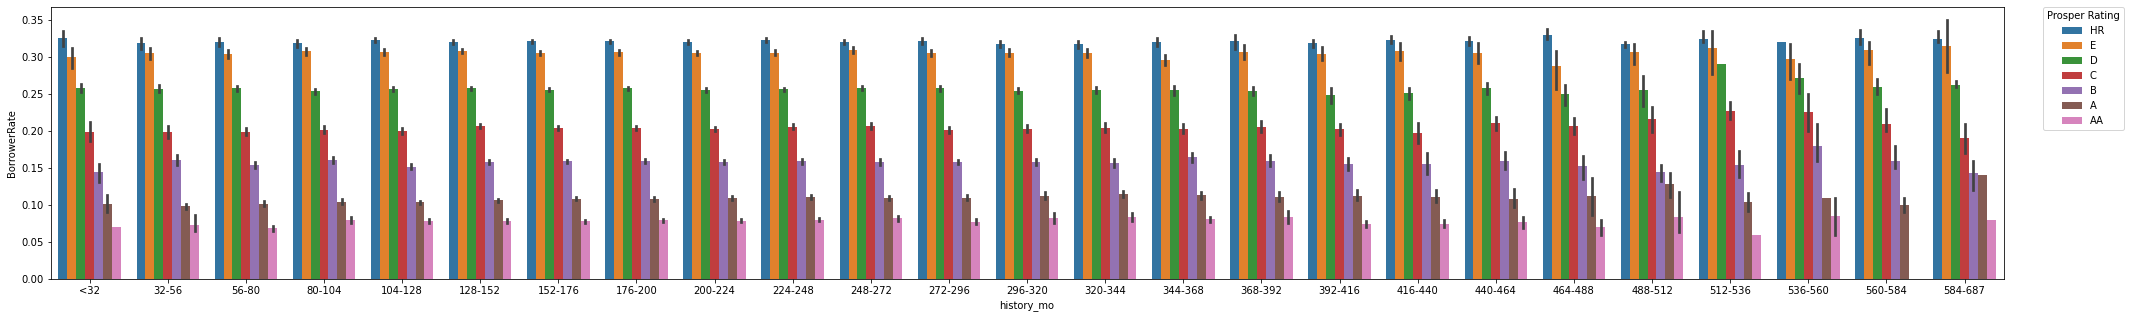

In [291]:
# Borrower credit history in months vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'history_mo', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

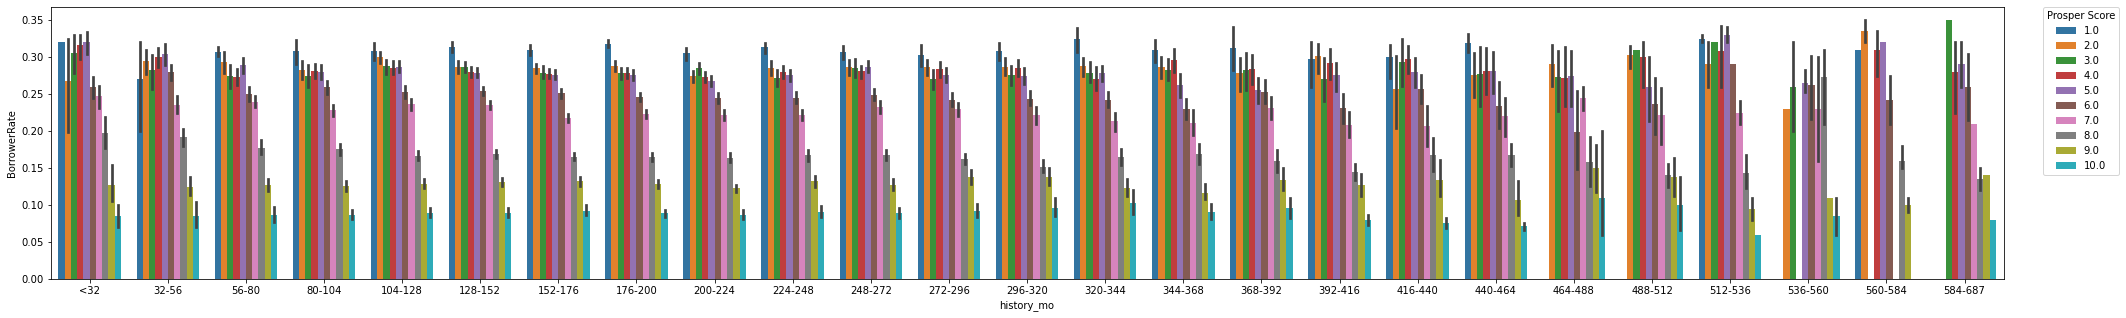

In [292]:
# Borrower credit history in months vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'history_mo', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

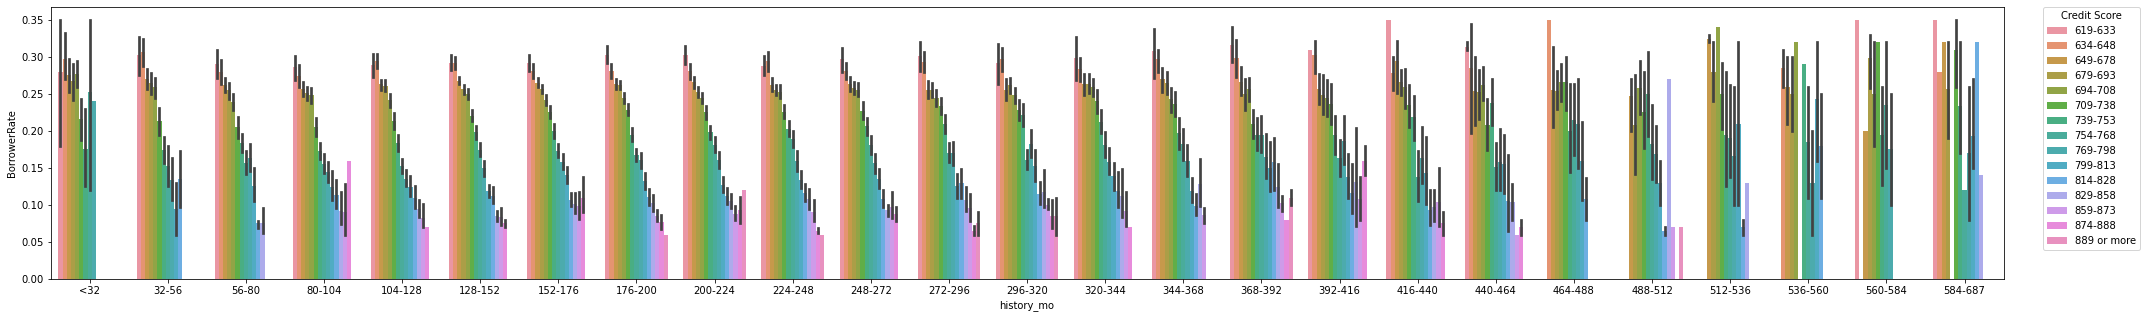

In [293]:
# Borrower credit history in months vs. interest rate over levels of Credit Score
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'history_mo', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Borrower credit history in months vs. interest rate over levels of credit rating variables**: Among the borrowers with the shortest and the longest credit history, there are none (or less) borrowers with the highest levels of professional credit score. The relationship between the three variables, credit rating (of whichever kind), credit history lenght, and interest rate, is complicated and possibly mediated by other variables. 

#### 9) Debt-To-Income Ratio vs. interest rate over levels of credit rating variables

[back to table of contents](#contents)

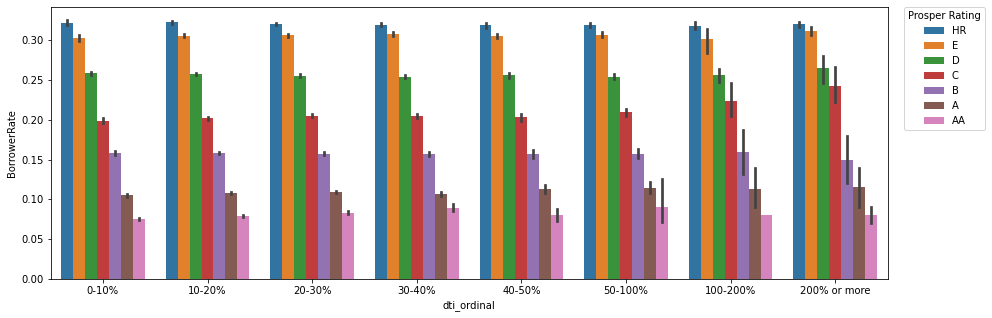

In [294]:
# Debt-To-Income Ratio vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'dti_ordinal', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

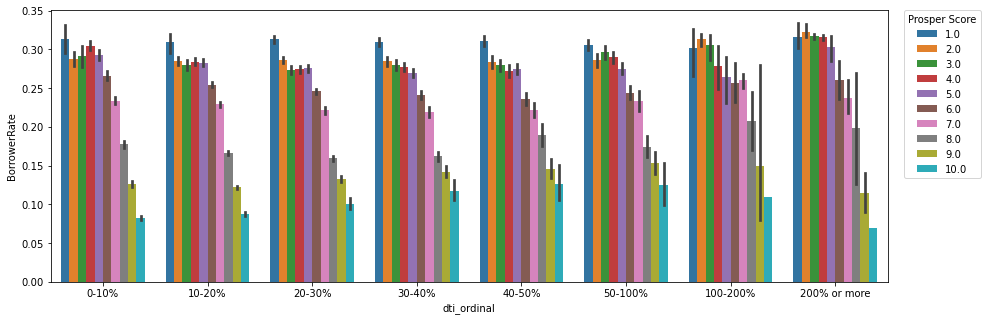

In [295]:
# Debt-To-Income Ratio vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'dti_ordinal', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

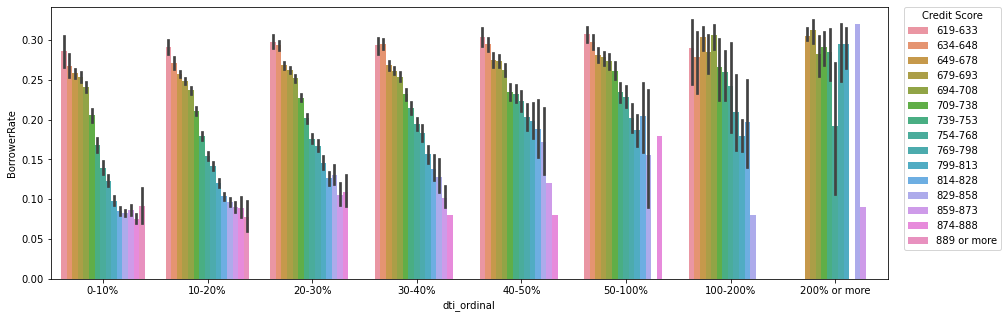

In [296]:
# Debt-To-Income Ratio vs. interest rate over levels of Credit Score
plt.figure(figsize = [15, 5]) 
sb.barplot(data = completed_09_01, x = 'dti_ordinal', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Debt-To-Income Ratio vs. interest rate over levels of credit rating variables**: Debt-To-Income Ratio seems to visibly drive the interest rates up, especially in combination with a lower credit rating. This trend is visible in all credit rating variables, but especially with the professional credit rating.

#### Borrower assessment (credit rating variables) vs. borrower credit history variables and borrower indebtedness: Conclusion
Due to having more categories, the consumer credit rating by professional credit rating agencies is more sensitive towards variables of the borrower credit history category (credit history lenght, number of loans, number of revolving accounts, credit card utilization rate, delinquencies on loans, and derogatory public records) and the borrower indebtedness category (debt-to-income ratio).

#### 7.1.5.2 Borrower assessment (credit rating variables) vs. loan characteristics (loan purpose and amount)
<a id="xpred12"></a>

[back to table of contents](#contents)

#### 1) Loan purpose vs. interest rate over levels of 7-level rating (Prosper Rating)

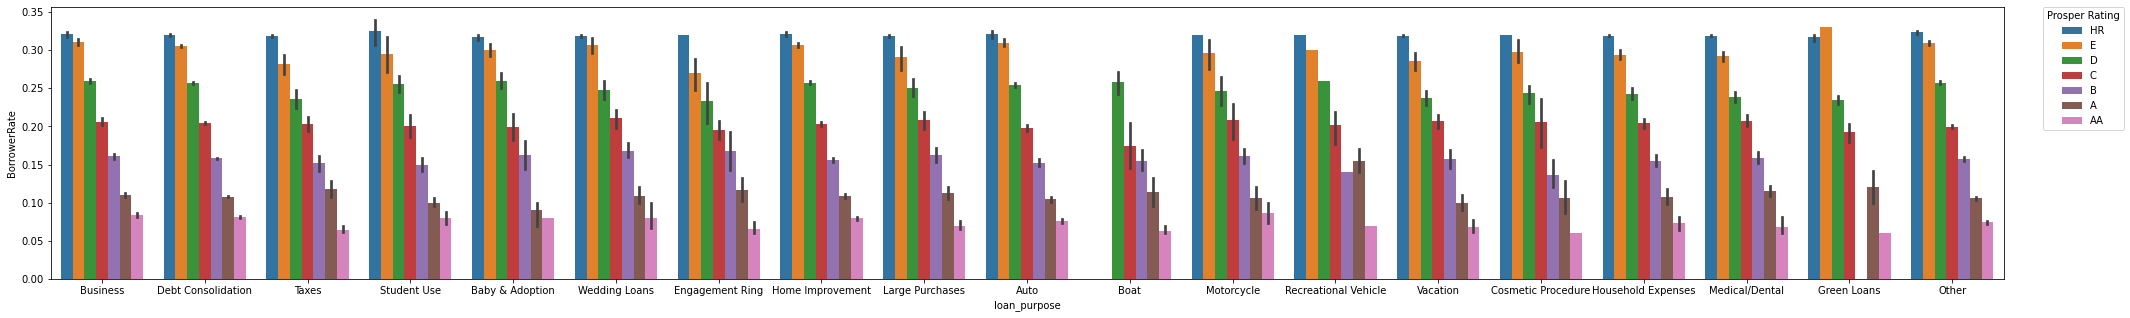

In [297]:
# Loan purpose vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'loan_purpose', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

#### 2) Loan purpose vs. interest rate over levels of 10-level rating (Prosper Score)

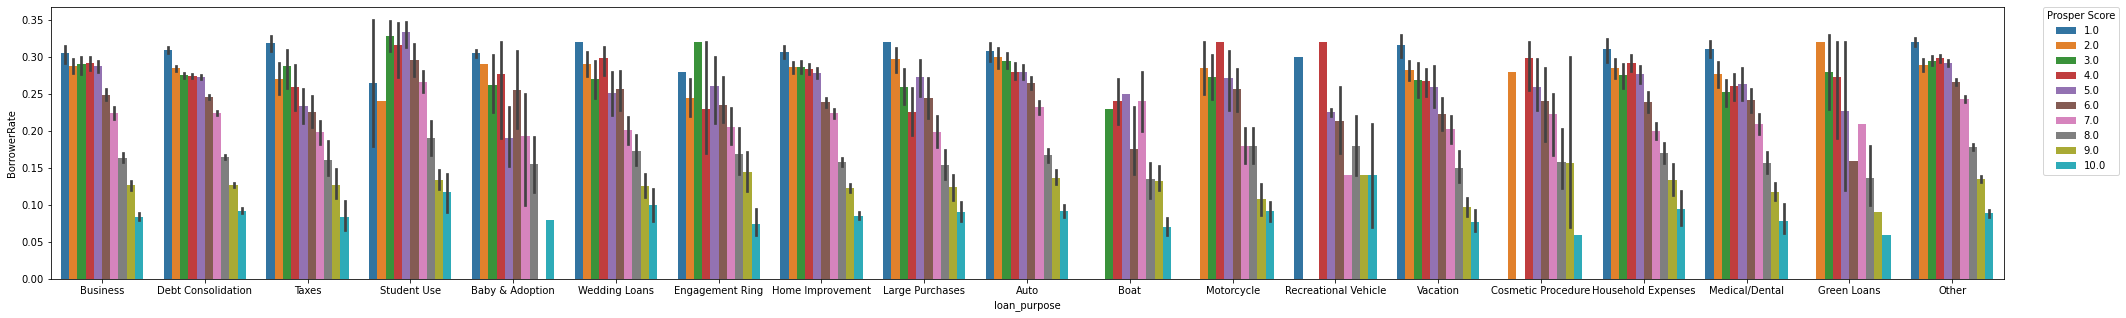

In [298]:
#  Loan purpose vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'loan_purpose', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

#### 3) Loan purpose vs. interest rate over levels of Credit Score

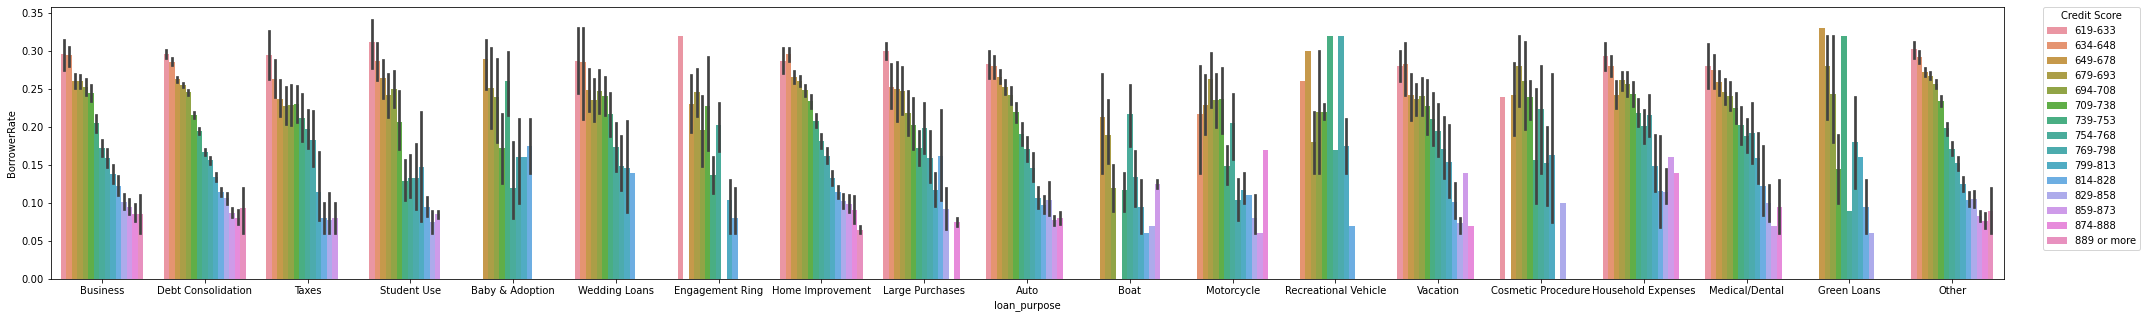

In [299]:
#  Loan purpose vs. interest rate over levels of Credit Score
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'loan_purpose', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Loan purpose vs. interest rate over levels of borrower credit rating variables**: the relationship between credit scores and interest rate seems very consistent despite different loan purposes. There are, however, certain categories of loan purpose that stand out: 

1) The interest rates for business loans, debt consolidation loans, home improvement loans, "auto" loans, and "other" loans seem to have the least amount of outliers (judging by the short error bars);
2) Loans for a boat seem be lent at more favorable conditions than loans for any other purpose; furthermore, among customers who borrowed money for a boat were none with the lowest levels of the credit rating variables (HR/E; 1/2; 619-678).

#### 4) Loan amount (ordinal) vs. interest rate over levels of 7-level rating (Prosper Rating)

[back to table of contents](#contents)

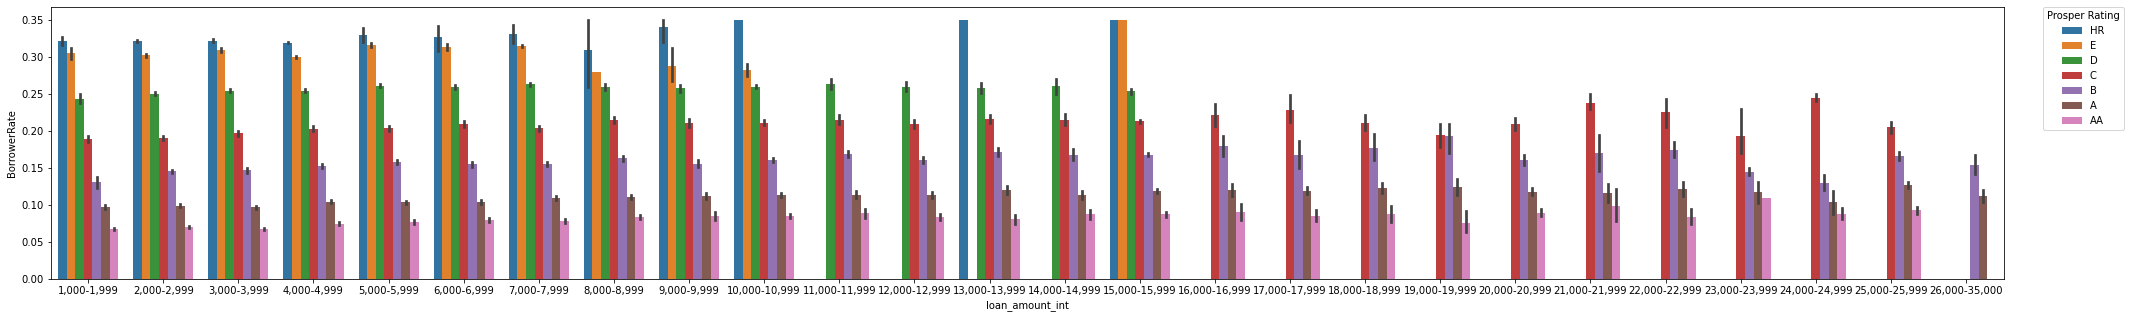

In [300]:
# Loan amount vs. interest rate over levels of 7-level rating (Prosper Rating)
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'loan_amount_int', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Rating'); 

#### 5) Loan amount (ordinal) vs. interest rate over levels of 10-level rating (Prosper Score)

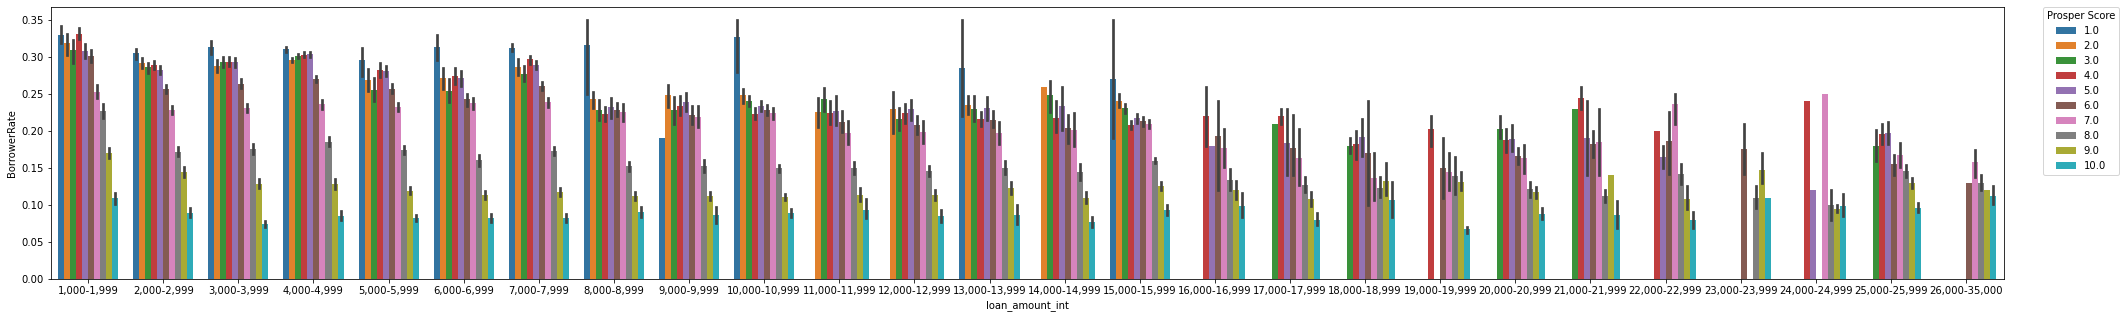

In [301]:
#  Loan amount vs. interest rate over levels of 10-level rating (Prosper Score)
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'loan_amount_int', y = 'BorrowerRate', hue = 'ProsperScore')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Prosper Score'); 

#### 6) Loan amount (ordinal) vs. interest rate over levels of Credit Score

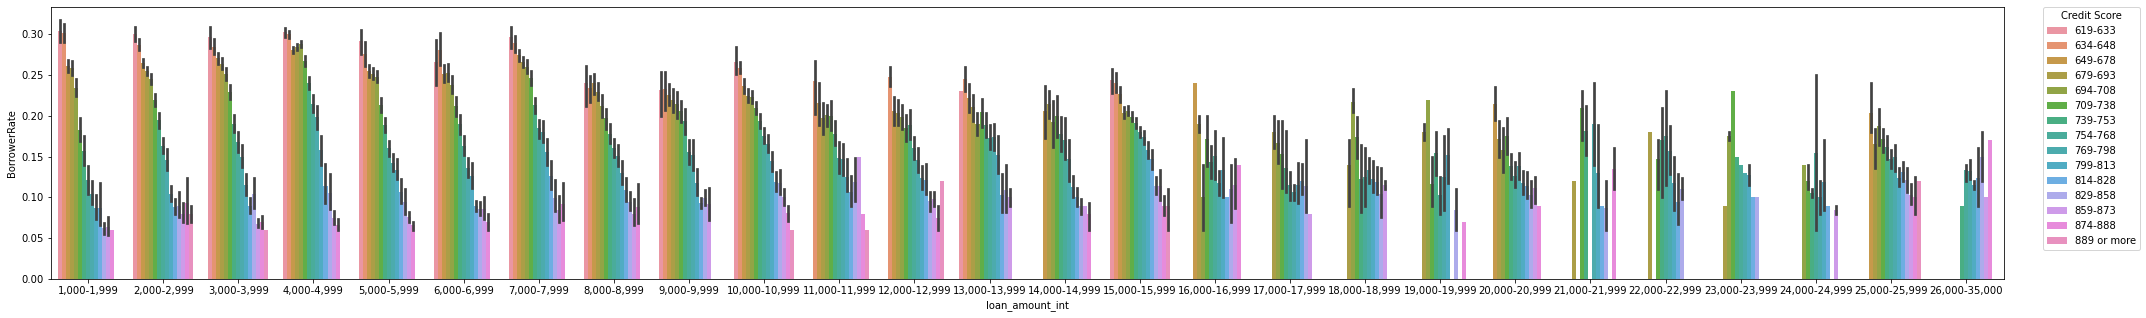

In [302]:
#  Loan purpose vs. interest rate over levels of Credit Score
plt.figure(figsize = [35, 5]) 
sb.barplot(data = completed_09_01, x = 'loan_amount_int', y = 'BorrowerRate', hue = 'cscore_ordinal')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Credit Score'); 

**Loan amount vs. interest rate over levels of borrower credit rating variables**: there is a limit of the loan amount accessible related to the credit rating. Loans higher than approximately \\$16,000 are not lent to low-rating borrowers. Furthermore, there are generally more outliers in interest rate in higher loan amounts, although the median interest rate seems to fall with the rising loan amount. 

### 7.2. Relationship of Outcome Variable to Predictor Variables
<a id="xbiv1"></a>

[back to table of contents](#contents)

The outcome variable can be represented as percentage of unrepaid loans within levels of predictor variables. All predictor variables are transformed into ordinal. The outcome 'repaid_yn' is dichotomous.

A dataframe containing the proportions of unrepaid loans within the levels of the grouping variable and a graph displaying the same are printed by a custom function - repaid_props(initial_df, grouping_cat_var) - defined below.

We define the function in three **modifications** related to the form and size of the graph:
1) Graph with the outcome on the x-axis

2) Graph with the outcome on the y-axis

3) Extra-large graph with the outcome on the x-axis



The repaid_props function contains several **steps**:

1) A groupby object s, containing the proportions of repaid and unrepaid loans within the levels of the grouping variable

2) The series s is transformed into a dataframe df by the reset_index()-method

3) We want to display only the percentage of unrepaid loans, therefore, the variable 'repaid_yn' is transformed into
categorical

4) The 'Repaid'-category is removed

5) The resulting NaN-s are dropped

6) A new column 'percentage_nr' is computed by multiplying the values in 'percentage_not_repaid' by 100

7) The variables contained in the groupby-object are depicted in a graph

In [303]:
def repaid_props_x(initial_df, grouping_cat_var):
    """ Finds percentage of unrepaid loans within levels of a 
    grouping categorical variable. Returns and prints a dataframe 
    and a graph. The outcome variable (percentage of unrepaid loans)
    is depicted on the x-axis."""

    # initial groupby object: series; aggregation: proportion
    s = initial_df.groupby(grouping_cat_var)['repaid_yn'].value_counts(normalize=True)

    # reset_index(name='percentage_not_repaid') turns series into dataframe:
    # or df = s.to_frame(name='percentage_not_repaid')
    df = s.reset_index(name='proportion_not_repaid')

    # convert index column to category (in order to use cat.remove_categories() in next step)
    df['repaid_yn'] = df['repaid_yn'].astype('category')

    # remove 'repaid' category to leave only 'not repaid' percentage
    df['repaid_yn'] = df['repaid_yn'].cat.remove_categories("Repaid")

    # part 2 of removing 'repaid' category: remove NaNs:
    df.dropna(inplace=True)

    # multiply fractions by 100 to get percent values
    df['percentage_nr'] = df['proportion_not_repaid']*100
    
    # set background grid
    sb.set_theme(style="whitegrid")
    # draw plot
    perc_plot = sb.barplot(data = df, x = 'percentage_nr', y = grouping_cat_var, color = base_color)
    
    return(df)   
    print(df)

In [304]:
def repaid_props_y(initial_df, grouping_cat_var):
    """Finds percentage of unrepaid loans within levels of a 
    grouping categorical variable. Returns and prints a dataframe 
    and a graph. The outcome variable (percentage of unrepaid loans)
    is depicted on the y-axis."""

    # initial groupby object: series; aggregation: proportion
    s = initial_df.groupby(grouping_cat_var)['repaid_yn'].value_counts(normalize=True)

    # reset_index(name='percentage_not_repaid') turns series into dataframe:
    # or df = s.to_frame(name='percentage_not_repaid')
    df = s.reset_index(name='proportion_not_repaid')

    # convert index column to category (in order to use cat.remove_categories() in next step)
    df['repaid_yn'] = df['repaid_yn'].astype('category')

    # remove 'repaid' category to leave only 'not repaid' percentage
    df['repaid_yn'] = df['repaid_yn'].cat.remove_categories("Repaid")

    # part 2 of removing 'repaid' category: remove NaNs:
    df.dropna(inplace=True)

    # multiply fractions by 100 to get percent values
    df['percentage_nr'] = df['proportion_not_repaid']*100
    
    # set background grid
    sb.set_theme(style="whitegrid")
    # draw plot
    perc_plot = sb.barplot(data = df, y = 'percentage_nr', x = grouping_cat_var, color = base_color)
    
    return(df)
        
    print(df)

In [305]:
def repaid_props_x_large(initial_df, grouping_cat_var):
    """Finds percentage of unrepaid loans within levels of a 
    grouping categorical variable. Returns and prints a dataframe 
    and a graph. The outcome variable (percentage of unrepaid loans)
    is depicted on the x-axis. The graph size is set to 20 x 10."""

    # initial groupby object: series; aggregation: proportion
    s = initial_df.groupby(grouping_cat_var)['repaid_yn'].value_counts(normalize=True)

    # reset_index(name='percentage_not_repaid') turns series into dataframe:
    # or df = s.to_frame(name='percentage_not_repaid')
    df = s.reset_index(name='proportion_not_repaid')

    # convert index column to category (in order to use cat.remove_categories() in next step)
    df['repaid_yn'] = df['repaid_yn'].astype('category')

    # remove 'repaid' category to leave only 'not repaid' percentage
    df['repaid_yn'] = df['repaid_yn'].cat.remove_categories("Repaid")

    # part 2 of removing 'repaid' category: remove NaNs:
    df.dropna(inplace=True)

    # multiply fractions by 100 to get percent values
    df['percentage_nr'] = df['proportion_not_repaid']*100
    
    # optional figsize
    plt.figure(figsize = [20, 10])
    # set background grid
    sb.set_theme(style="whitegrid")
    # draw plot
    perc_plot = sb.barplot(data = df, x = 'percentage_nr', y = grouping_cat_var, color = base_color)
    
    return(df)
    print(df)

#### 7.2.1 Borrower Assessment Variables
<a id="xba2"></a>

[back to table of contents](#contents)

#### 1) Percentage of unrepaid loans by interest rate level 

&rarr; interest as ordinal variable: 'interest_16l'

interest_16l   repaid_yn  proportion_not_repaid  percentage_nr
1        4-5.9%  Not repaid                  0.007          0.711
3        6-7.9%  Not repaid                  0.039          3.903
5        8-9.9%  Not repaid                  0.083          8.295
7      10-11.9%  Not repaid                  0.087          8.711
9      12-13.9%  Not repaid                  0.127         12.681
11     14-15.9%  Not repaid                  0.149         14.928
13     16-17.9%  Not repaid                  0.181         18.143
15     18-19.9%  Not repaid                  0.181         18.134
17     20-21.9%  Not repaid                  0.230         22.978
19     22-23.9%  Not repaid                  0.232         23.243
21     24-25.9%  Not repaid                  0.301         30.118
23     26-27.9%  Not repaid                  0.273         27.284
25     28-29.9%  Not repaid                  0.355         35.495
27     30-31.9%  Not repaid                  0.411         41.117
29     32-33.9%  Not repaid                  0.326         32.558
31       34-36%  Not repaid                  0.281         28.054

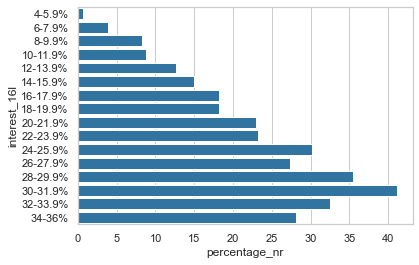

In [306]:
repaid_props_x(completed_09_01, 'interest_16l')

The relationship between interest rate and loan outcome status seems roughly quadratic. The highest percentage of not repaid loans is in the 30-31.9% group. In the two highest interest rate goups the percentage of not repaid loans was lower. The most represented interest rate in the population is located in the second to the highest group: 32-33.9%. A good question for multivariate exploration would be to explore the relationship between interest rates, loan purpose and loan outcome status.

#### 2) Percentage of unrepaid loans by level of 'ProsperRating (Alpha)'

[back to table of contents](#contents)

ProsperRating (Alpha)   repaid_yn  proportion_not_repaid  percentage_nr
1                     HR  Not repaid                  0.371         37.103
3                      E  Not repaid                  0.336         33.642
5                      D  Not repaid                  0.274         27.363
7                      C  Not repaid                  0.208         20.788
9                      B  Not repaid                  0.169         16.869
11                     A  Not repaid                  0.109         10.949
13                    AA  Not repaid                  0.045          4.466

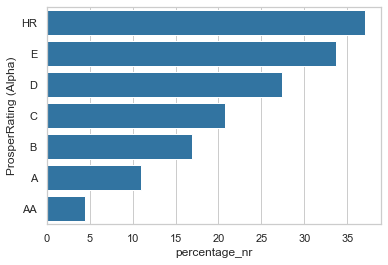

In [307]:
repaid_props_x(completed_09_01, 'ProsperRating (Alpha)')

The relationship between 7-level rating and loan outcome status seems almost ideally linear: the percentage of not replaid loans falls consistently from the lowest to the highest rating group.

#### 3) Percentage of unrepaid loans by level of 'ProsperScore'

[back to table of contents](#contents)

ProsperScore   repaid_yn  proportion_not_repaid  percentage_nr
1          1.000  Not repaid                  0.443         44.316
3          2.000  Not repaid                  0.324         32.407
5          3.000  Not repaid                  0.285         28.493
7          4.000  Not repaid                  0.319         31.895
9          5.000  Not repaid                  0.316         31.625
11         6.000  Not repaid                  0.270         26.967
13         7.000  Not repaid                  0.240         24.011
15         8.000  Not repaid                  0.175         17.487
17         9.000  Not repaid                  0.117         11.652
19        10.000  Not repaid                  0.045          4.534

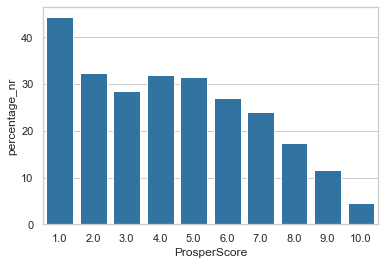

In [308]:
repaid_props_y(completed_09_01, 'ProsperScore')

The relationship between 10-level rating ('Prosper Score') and loan outcome status is roughly linear, although the trend seems less pronounced in the rating levels 2 (second to worst) to 5 (close to the middle of the scale). The levels from 5 to 10 (medium to best rating) seem to predict the loan outcome almost ideally. Furthermore, there is a pronounced difference between the worst score (1, with 44.32% not repaid loans) and the second to worst score (2, with 32.41% of not repaid loans).

#### 4) Percentage of unrepaid loans by level of professional customer credit rating 'cscore_ordinal'

[back to table of contents](#contents)

cscore_ordinal   repaid_yn  proportion_not_repaid  percentage_nr
1         619-633  Not repaid                  0.364         36.415
3         634-648  Not repaid                  0.347         34.724
5         649-678  Not repaid                  0.291         29.083
7         679-693  Not repaid                  0.278         27.829
9         694-708  Not repaid                  0.254         25.439
11        709-738  Not repaid                  0.253         25.261
13        739-753  Not repaid                  0.206         20.595
15        754-768  Not repaid                  0.182         18.174
17        769-798  Not repaid                  0.158         15.837
19        799-813  Not repaid                  0.132         13.205
21        814-828  Not repaid                  0.090          8.997
23        829-858  Not repaid                  0.061          6.114
25        859-873  Not repaid                  0.036          3.553
27        874-888  Not repaid                  0.027          2.667

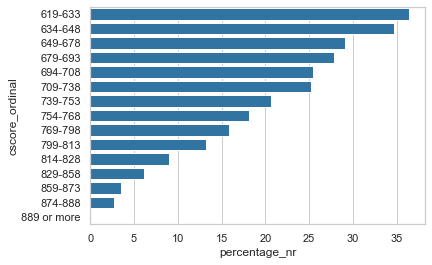

In [309]:
repaid_props_x(completed_09_01, 'cscore_ordinal')

The professional credit rating seems to predict loan outcome in an almost ideally linear manner. Borrowers with a rating of 889 or more had a zero default rate.

# Correlation of 'status_bin' and credit rating variables (+ interest rate)

[back to table of contents](#contents)

https://www.uvm.edu/~statdhtx/StatPages/More_Stuff/OrdinalChisq/OrdinalChiSq.html

correlational approach vs chi-square

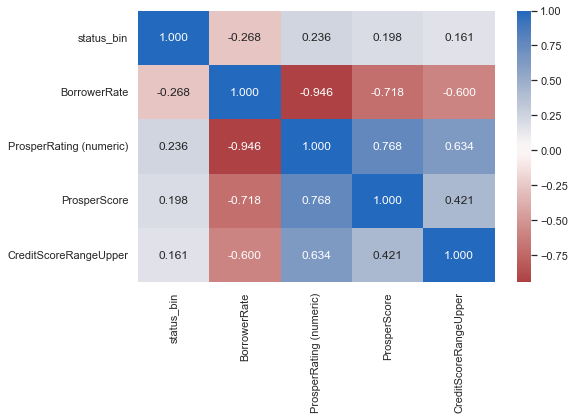

In [310]:
vars = ['status_bin', 'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'CreditScoreRangeUpper']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='pearson'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

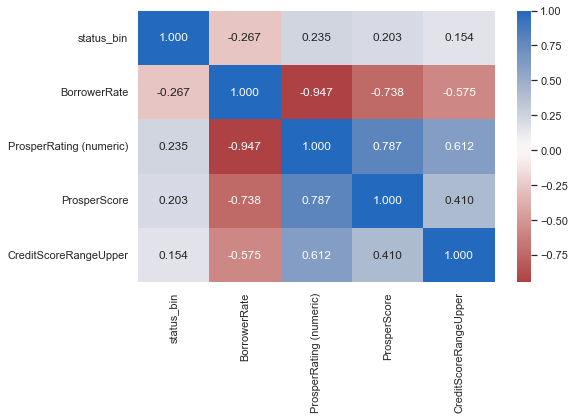

In [311]:
vars = ['status_bin', 'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'CreditScoreRangeUpper']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='spearman'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### 7.2.2 Loan Characteristics 
<a id="xloanchar2"></a>

[back to table of contents](#contents)

#### 1) Percentage of unrepaid loans by 'loan_purpose'

'loan_purpose' contains an empty category: personal loans. First, it should be removed. For this purpose, we save a df with only 'repaid_yn' and 'loan_purpose'.

loan_purpose   repaid_yn  proportion_not_repaid  percentage_nr
1               Business  Not repaid                  0.274         27.414
3     Debt Consolidation  Not repaid                  0.223         22.311
5                  Taxes  Not repaid                  0.230         22.995
7            Student Use  Not repaid                  0.144         14.428
9        Baby & Adoption  Not repaid                  0.324         32.432
11         Wedding Loans  Not repaid                  0.245         24.528
13       Engagement Ring  Not repaid                  0.055          5.455
15      Home Improvement  Not repaid                  0.224         22.441
17       Large Purchases  Not repaid                  0.244         24.390
19                  Auto  Not repaid                  0.193         19.263
21                  Boat  Not repaid                  0.107         10.714
23            Motorcycle  Not repaid                  0.035          3.529
25  Recreational Vehicle  Not repaid                  0.062          6.250
27              Vacation  Not repaid                  0.249         24.868
29    Cosmetic Procedure  Not repaid                  0.243         24.324
31    Household Expenses  Not repaid                  0.350         34.980
33        Medical/Dental  Not repaid                  0.336         33.639
35           Green Loans  Not repaid                  0.389         38.889
37                 Other  Not repaid                  0.229         22.867

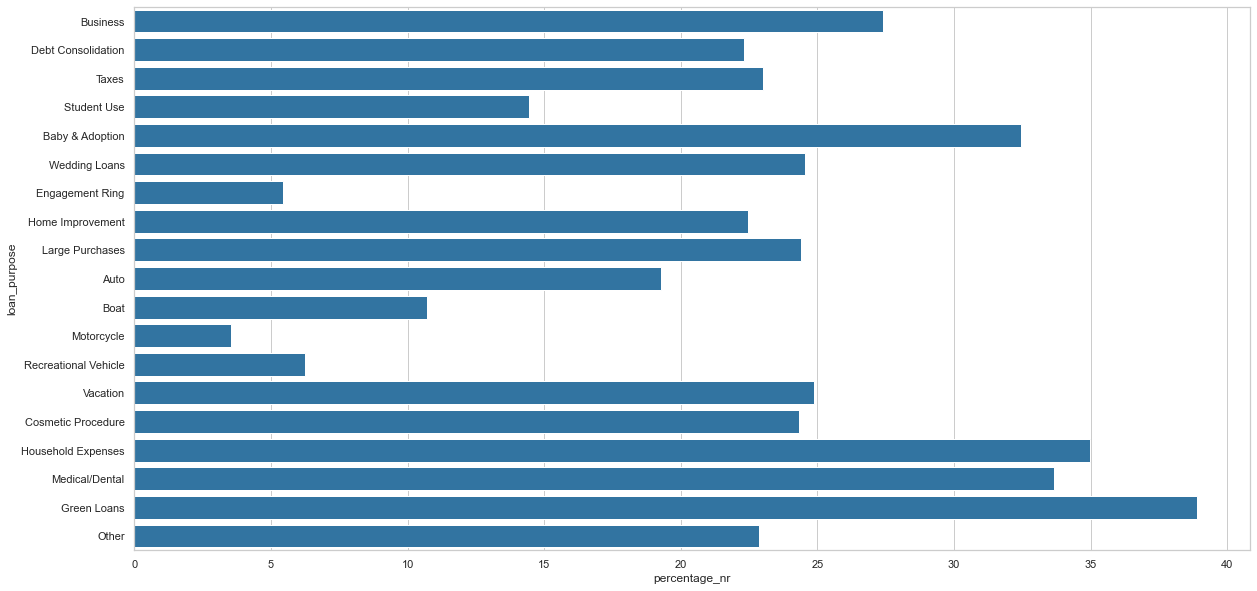

In [312]:
repaid_props_x_large(completed_09_01, 'loan_purpose')

The highest percentage of unrepaid loans was in the categories 'Green Loans' (38.89%), 'Household Expenses' (34.98%), 'Medical/Dental' (33.64%), and 'Baby & Adoption' (32.43%). Business loans are located right after this group of high-risk loans (27.41% not repaid). The lowest-risk loan purposes are as follows: 'Motorcycle' (3.53% not repaid), 'Engagement Ring' (5.46%), 'Recreational Vehicle' (6.25%), and 'Boat' (10.71%). It would be interesting to investigate the relationship between income, loan purpose and interest rate.

#### 2) Percentage of unrepaid loans by levels of loan original amount

[back to table of contents](#contents)

loan_amount_int   repaid_yn  proportion_not_repaid  percentage_nr
1      1,000-1,999  Not repaid                  0.170         17.017
3      2,000-2,999  Not repaid                  0.207         20.691
5      3,000-3,999  Not repaid                  0.215         21.484
7      4,000-4,999  Not repaid                  0.317         31.705
9      5,000-5,999  Not repaid                  0.223         22.314
11     6,000-6,999  Not repaid                  0.191         19.064
13     7,000-7,999  Not repaid                  0.260         25.997
15     8,000-8,999  Not repaid                  0.175         17.537
17     9,000-9,999  Not repaid                  0.204         20.382
19   10,000-10,999  Not repaid                  0.211         21.113
21   11,000-11,999  Not repaid                  0.240         24.038
23   12,000-12,999  Not repaid                  0.206         20.642
25   13,000-13,999  Not repaid                  0.217         21.652
27   14,000-14,999  Not repaid                  0.159         15.909
29   15,000-15,999  Not repaid                  0.235         23.512
31   16,000-16,999  Not repaid                  0.172         17.188
33   17,000-17,999  Not repaid                  0.134         13.415
35   18,000-18,999  Not repaid                  0.115         11.475
37   19,000-19,999  Not repaid                  0.071          7.143
39   20,000-20,999  Not repaid                  0.129         12.903
41   21,000-21,999  Not repaid                  0.250         25.000
43   22,000-22,999  Not repaid                  0.122         12.195
45   23,000-23,999  Not repaid                  0.231         23.077
47   24,000-24,999  Not repaid                  0.053          5.263
49   25,000-25,999  Not repaid                  0.165         16.549

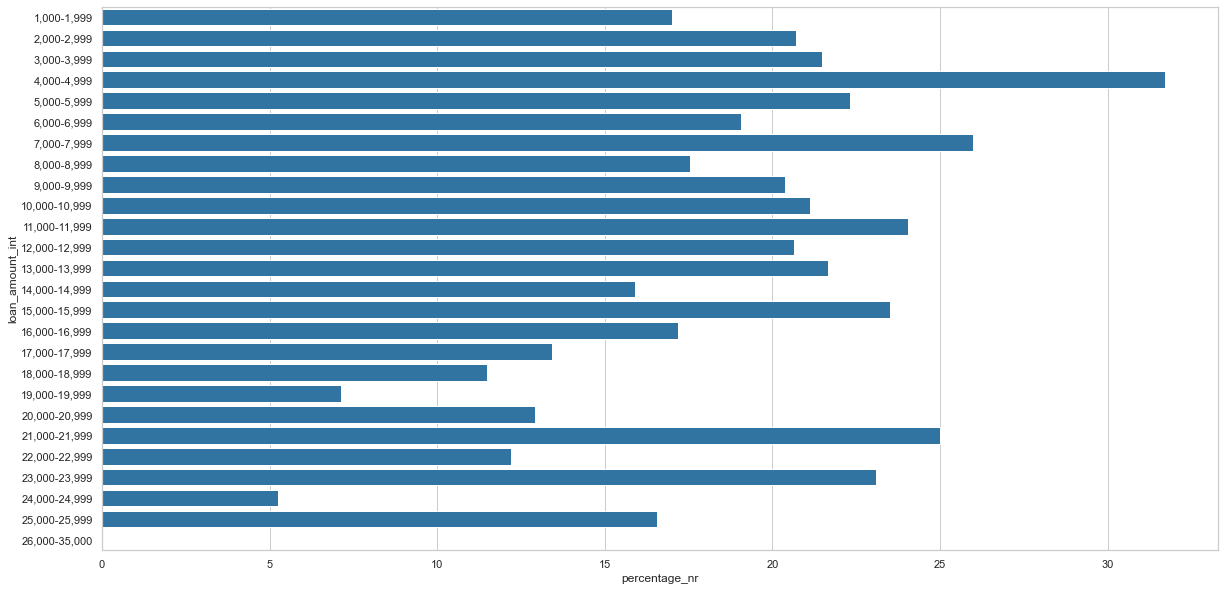

In [313]:
repaid_props_x_large(completed_09_01, 'loan_amount_int')

The loan outcome seems unrelated to the loan size. A possible explanation would be that loan size interferes with other variables (loan purpose, interest rate, borrower rating, etc.) and the percentage of not repaid loans per loan size is explained by those variables.

#### 3) Percentage of unrepaid loans by loan term

[back to table of contents](#contents)

term_ordinal   repaid_yn  proportion_not_repaid  percentage_nr
1           12  Not repaid                  0.043          4.277
3           36  Not repaid                  0.226         22.584
5           60  Not repaid                  0.325         32.456

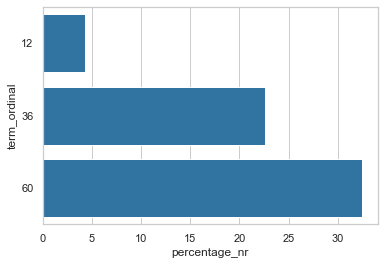

In [314]:
repaid_props_x(completed_09_01, 'term_ordinal')

The percentage of defaults is the lowest for the shortest loan term (12 months): 4.28%. It rises to 22.58% for the loan term of 36 months and is even higher for the longest term (60 months): 32.46%.

#### 7.2.3 Borrower Characteristics
<a id="xbch2"></a>

[back to table of contents](#contents)

#### 1) Percentage of unrepaid loans by levels of 'EmploymentStatus'

In [315]:
completed_09_01['EmploymentStatus'].value_counts()

Employed         15894
Full-time         6253
Other              659
Retired            236
Part-time          174
Self-employed        1
Not employed         1
Not available        0
Name: EmploymentStatus, dtype: int64

#### The categories 'Not available', while 'Self-employed' and 'Not employed' have only one member each. We are going to remove them next.

In [316]:
# save small df with just variables of interest
df_empst = completed_09_01[['EmploymentStatus', 'repaid_yn']].copy()
df_empst.head()

EmploymentStatus   repaid_yn
15            Other  Not repaid
23         Employed  Not repaid
26         Employed      Repaid
27        Full-time      Repaid
30         Employed      Repaid

In [317]:
# remove categories: 'Not available', 'Self-employed', and 'Not employed' 
df_empst['EmploymentStatus'] = df_empst['EmploymentStatus'].cat.remove_categories(['Self-employed', 
                                                                                   'Not employed', 
                                                                                   'Not available'])
df_empst['EmploymentStatus'].value_counts()

Employed     15894
Full-time     6253
Other          659
Retired        236
Part-time      174
Name: EmploymentStatus, dtype: int64

EmploymentStatus   repaid_yn  proportion_not_repaid  percentage_nr
1         Employed  Not repaid                  0.244         24.405
3        Full-time  Not repaid                  0.169         16.888
5        Part-time  Not repaid                  0.201         20.115
7          Retired  Not repaid                  0.271         27.119
9            Other  Not repaid                  0.448         44.765

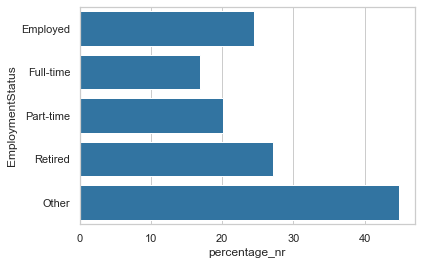

In [318]:
repaid_props_x(df_empst, 'EmploymentStatus')

The categories of 'Employment Status' unfortunately are not well defined ('Employed' includes 'Full-time' and 'Part-time'; the categories 'Self-emplyed' and 'Not employed' have only 1 member each, which is unusual and means that either data entry or data collection were compromised). On the other hand, the category 'Other', which may include unemployed borrowers, has the highest percentage of not repayed loans: 44.77%. It is therefore questionable whether this variable can contribute to predicting / inferencing about the loan outcome status.

#### 2) Percentage of unrepaid loans by levels of 'EmploymentStatusDuration'

[back to table of contents](#contents)

emp_dur   repaid_yn  proportion_not_repaid  percentage_nr
1      0-24  Not repaid                  0.243         24.297
3     24-48  Not repaid                  0.219         21.894
5     48-72  Not repaid                  0.223         22.276
7     72-96  Not repaid                  0.221         22.055
9    96-120  Not repaid                  0.221         22.081
11  120-144  Not repaid                  0.237         23.690
13  144-168  Not repaid                  0.245         24.521
15  168-192  Not repaid                  0.230         22.982
17  192-216  Not repaid                  0.225         22.516
19  216-240  Not repaid                  0.228         22.799
21  240-264  Not repaid                  0.220         22.042
23  264-288  Not repaid                  0.261         26.087
25  288-312  Not repaid                  0.258         25.786
27  312-336  Not repaid                  0.193         19.266
29  336-360  Not repaid                  0.284         28.358
31  360-384  Not repaid                  0.177         17.692
33  384-408  Not repaid                  0.197         19.658
35  408-432  Not repaid                  0.203         20.312
37  432-456  Not repaid                  0.310         30.952
39  456-480  Not repaid                  0.280         28.000
41  480-504  Not repaid                  0.421         42.105
43  504-528  Not repaid                  0.211         21.053
45  528-755  Not repaid                  0.421         42.105

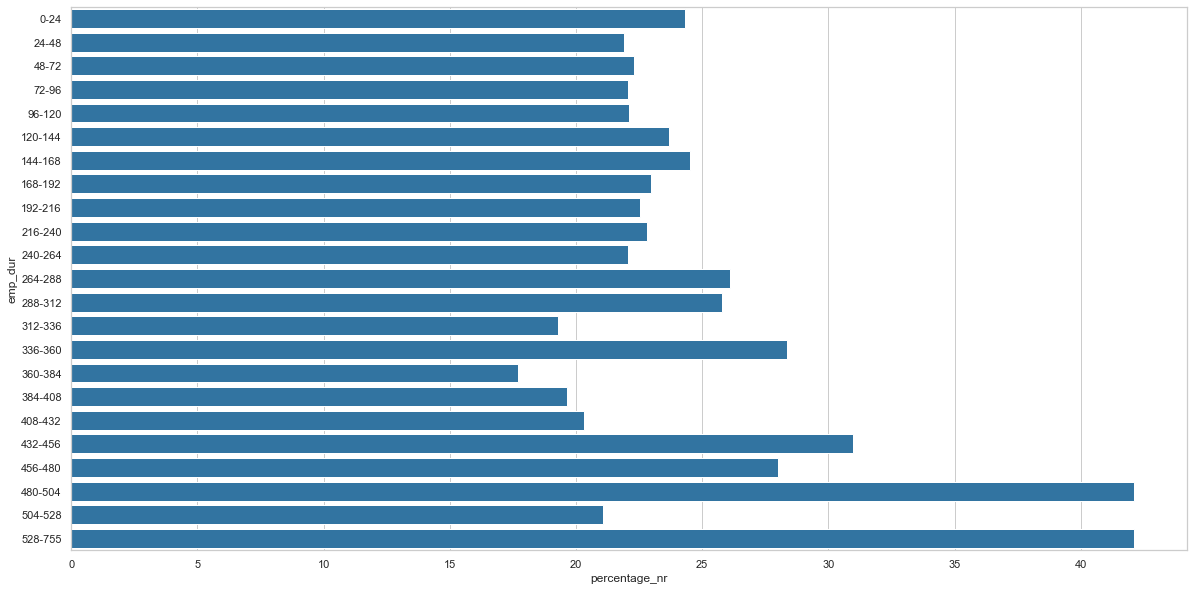

In [319]:
repaid_props_x_large(completed_09_01, 'emp_dur')

It appears that duration of employment has no influence over loan outcome, although two of the highest categories (480-504 months and 528-755 months) had the highest rates of not repaid loans: 42.11%. A clear trend is not visible and the relationship between the two variables could be influenced by other variables.

#### 3) Percentage of unrepaid loans by levels of 'IncomeRange'

[back to table of contents](#contents)

In [320]:
df_income = completed_09_01[['IncomeRange', 'repaid_yn']].copy()
df_income['IncomeRange'].value_counts()

$25,000-49,999    7433
$50,000-74,999    6858
$75,000-99,999    3788
$100,000+         3632
$1-24,999         1506
Not employed         1
Not displayed        0
$0                   0
Name: IncomeRange, dtype: int64

In [321]:
df_income['IncomeRange'].dtype

CategoricalDtype(categories=['Not displayed', 'Not employed', '$0', '$1-24,999',
                  '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
                  '$100,000+'],
, ordered=True)

### Exclude 'Not employed', 'Not displayed', '$0'

In [322]:
df_income['IncomeRange'] = df_income['IncomeRange'].cat.remove_categories(['Not displayed', 
                                                                                     'Not employed', 
                                                                                     '$0'])
df_income['IncomeRange'].value_counts()

$25,000-49,999    7433
$50,000-74,999    6858
$75,000-99,999    3788
$100,000+         3632
$1-24,999         1506
Name: IncomeRange, dtype: int64

IncomeRange   repaid_yn  proportion_not_repaid  percentage_nr
1       $1-24,999  Not repaid                  0.357         35.724
3  $25,000-49,999  Not repaid                  0.297         29.746
5  $50,000-74,999  Not repaid                  0.214         21.420
7  $75,000-99,999  Not repaid                  0.166         16.579
9       $100,000+  Not repaid                  0.133         13.298

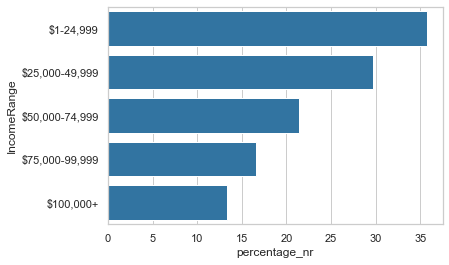

In [323]:
repaid_props_x(df_income, 'IncomeRange')

There appears to be a clear linear relationship between the borrower annual income and the loan outcome: borrowers with higher annual income are less likely to default.

#### 4) Percentage of unrepaid loans by home ownership (yes or no)

[back to table of contents](#contents)

IsBorrowerHomeowner   repaid_yn  proportion_not_repaid  percentage_nr
1                False  Not repaid                  0.249         24.898
3                 True  Not repaid                  0.213         21.255

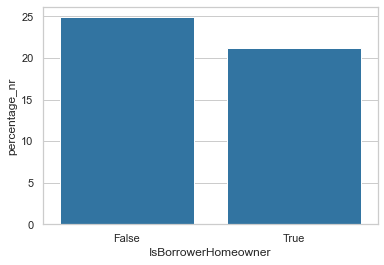

In [324]:
repaid_props_y(completed_09_01, 'IsBorrowerHomeowner')

There is a slighly lower percentage of not repaid loans in the group of borrowers who were home owners. It should be noted however that borrowers with a mortgage are also classified as homeowners, as the variable dictionary states ("A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.").

# Correlation of 'status_bin' and loan original amount, employment status duration, income

[back to table of contents](#contents)

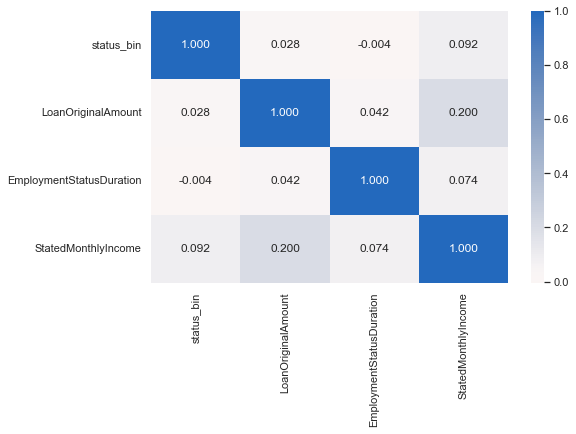

In [325]:
vars = ['status_bin', 'LoanOriginalAmount', 'EmploymentStatusDuration', 'StatedMonthlyIncome']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='pearson'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

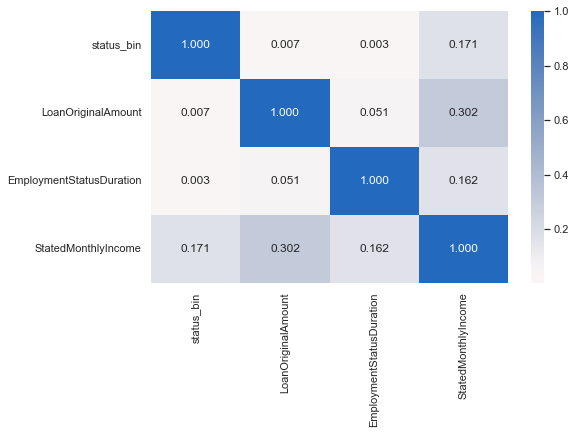

In [326]:
vars = ['status_bin', 'LoanOriginalAmount', 'EmploymentStatusDuration', 'StatedMonthlyIncome']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='spearman'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### 7.2.4 Borrower Credit History Variables, Borrower Indebtedness
<a id="xhistorydti2"></a>
[back to table of contents](#contents)

#### 1) Percentage of unrepaid loans by credit history in months

history_mo   repaid_yn  proportion_not_repaid  percentage_nr
1         <32  Not repaid                  0.224         22.368
3       32-56  Not repaid                  0.255         25.486
5       56-80  Not repaid                  0.220         21.967
7      80-104  Not repaid                  0.222         22.188
9     104-128  Not repaid                  0.211         21.075
11    128-152  Not repaid                  0.237         23.743
13    152-176  Not repaid                  0.235         23.486
15    176-200  Not repaid                  0.232         23.194
17    200-224  Not repaid                  0.217         21.730
19    224-248  Not repaid                  0.218         21.751
21    248-272  Not repaid                  0.235         23.478
23    272-296  Not repaid                  0.231         23.090
25    296-320  Not repaid                  0.205         20.546
27    320-344  Not repaid                  0.236         23.626
29    344-368  Not repaid                  0.225         22.489
31    368-392  Not repaid                  0.263         26.300
33    392-416  Not repaid                  0.303         30.290
35    416-440  Not repaid                  0.226         22.632
37    440-464  Not repaid                  0.262         26.154
39    464-488  Not repaid                  0.342         34.211
41    488-512  Not repaid                  0.321         32.143
43    512-536  Not repaid                  0.290         29.032
45    536-560  Not repaid                  0.350         35.000
47    560-584  Not repaid                  0.364         36.364
49    584-687  Not repaid                  0.450         45.000

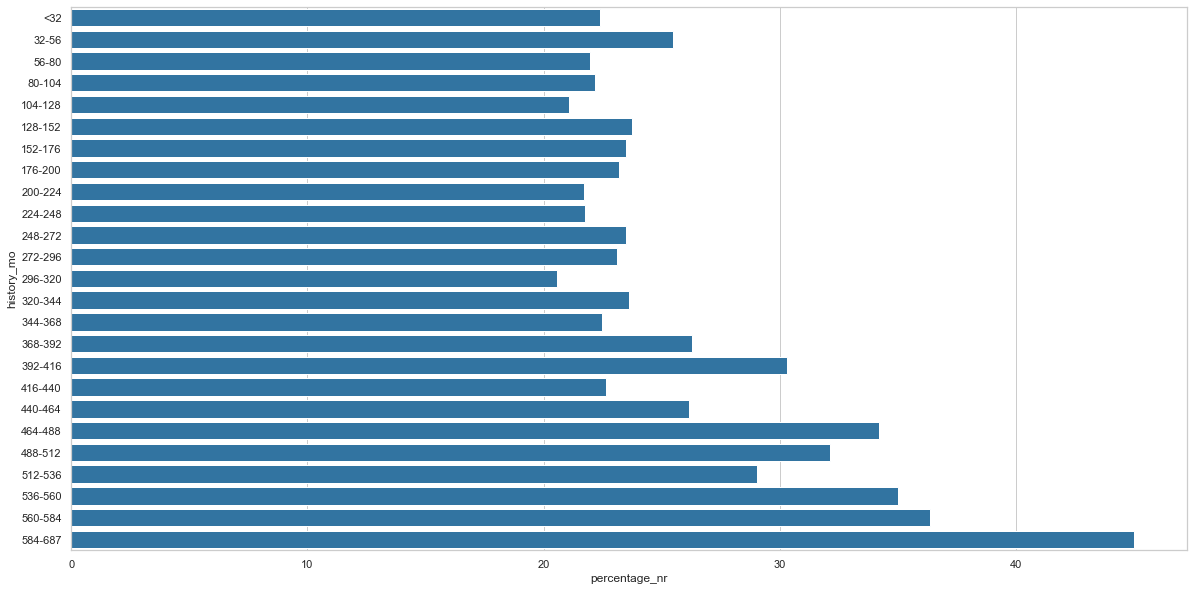

In [327]:
repaid_props_x_large(completed_09_01, 'history_mo')

A longer credit history seems to predict a higher possibility of default. It could be that for borrowers with shorter credit history other variables play a more important role.

#### 2) Percentage of unrepaid loans by number of current credit lines
[back to table of contents](#contents)

The continuous count variable 'CurrentCreditLines' was transformed into the ordinal variable 'current_credits'. 

current_credits   repaid_yn  proportion_not_repaid  percentage_nr
0             None  Not repaid                  0.621         62.097
3              1-5  Not repaid                  0.287         28.720
5              6-8  Not repaid                  0.218         21.789
7             9-12  Not repaid                  0.208         20.810
9           13- 16  Not repaid                  0.214         21.421
11           17-18  Not repaid                  0.226         22.564
13           19-25  Not repaid                  0.194         19.428
15      26 or more  Not repaid                  0.154         15.415

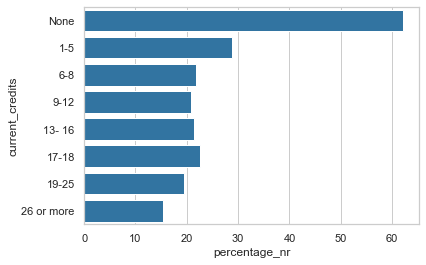

In [328]:
repaid_props_x(completed_09_01, 'current_credits')

Borrowers with no current credit lines have a very high percentage of not repaid loans: 60%. This could mean that first-time borrowers are especially risky. For the rest of the categories of 'Current credit lines' no trend is visible. 

#### 3) Percentage of unrepaid loans by number of open credit lines
[back to table of contents](#contents)

The continuous count variable 'OpenCreditLines' was transformed into the ordinal variable 'open_credits'.

open_credits   repaid_yn  proportion_not_repaid  percentage_nr
0          None  Not repaid                  0.622         62.209
3           1-4  Not repaid                  0.293         29.257
5           5-7  Not repaid                  0.219         21.851
7          8-10  Not repaid                  0.208         20.819
9         11-14  Not repaid                  0.211         21.081
11        15-16  Not repaid                  0.218         21.784
13        17-22  Not repaid                  0.196         19.620
15   23 or more  Not repaid                  0.186         18.644

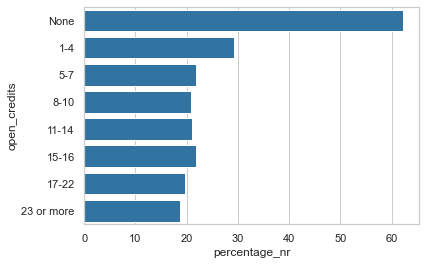

In [329]:
repaid_props_x(completed_09_01, 'open_credits')

The variable 'Open credit lines' seems like a copy of 'Current credit lines'. 

#### 4) Percentage of unrepaid loans by number of loans for the last 7 years
[back to table of contents](#contents)

The continuous count variable 'TotalCreditLinespast7years' was transformed into the ordinal variable 'total_credits_7y'.

total_credits_7y   repaid_yn  proportion_not_repaid  percentage_nr
1              2-16  Not repaid                  0.267         26.705
3             17-24  Not repaid                  0.240         23.983
5             25-34  Not repaid                  0.208         20.839
7             35-44  Not repaid                  0.216         21.571
9             45-51  Not repaid                  0.188         18.805
11            52-66  Not repaid                  0.212         21.154
13       67 or more  Not repaid                  0.177         17.730

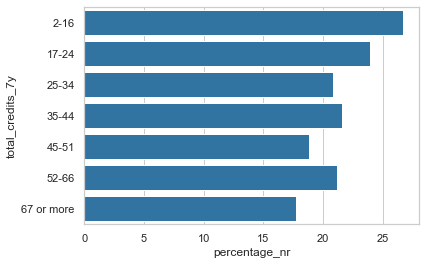

In [330]:
repaid_props_x(completed_09_01, 'total_credits_7y')

It seems that a higher number of loans a borrower has taken over the last 7 years could predict a lower possibility of default. This is probably due to the fact that borrowers who have not defaulted in the past are still given loans, while borrowers who defaulted, were subsequently rejected.

#### 5) Percentage of unrepaid loans by number of Open Revolving Accounts
[back to table of contents](#contents)

The continuous count variable 'OpenRevolvingAccounts' was transformed into the ordinal variable 'open_accounts'.

open_accounts   repaid_yn  proportion_not_repaid  percentage_nr
1           None  Not repaid                  0.477         47.709
3            1-3  Not repaid                  0.278         27.819
5            4-5  Not repaid                  0.219         21.905
7            6-8  Not repaid                  0.202         20.220
9           9-11  Not repaid                  0.203         20.258
11         12-14  Not repaid                  0.217         21.736
13         15-19  Not repaid                  0.219         21.871
15    20 or more  Not repaid                  0.166         16.608

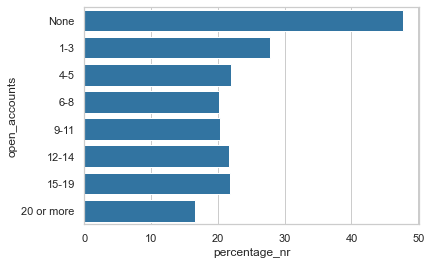

In [331]:
repaid_props_x(completed_09_01, 'open_accounts')

Customers with no open revolving accounts had the highest rate of unrepaid loans: 47.7%. For the rest of the categories, the trend is not clear.

#### 6) Percentage of unrepaid loans by amount of Open Revolving monthly payment
[back to table of contents](#contents)

The continuous variable 'OpenRevolvingMonthlyPayment' was transformed into the ordinal variable 'rev_mo_payment'.

rev_mo_payment   repaid_yn  proportion_not_repaid  percentage_nr
1               0  Not repaid                  0.474         47.430
3            1-49  Not repaid                  0.274         27.409
5           50-99  Not repaid                  0.236         23.572
7         100-299  Not repaid                  0.214         21.406
9         300-499  Not repaid                  0.213         21.300
11        500-999  Not repaid                  0.213         21.286
13      1000-2999  Not repaid                  0.210         20.968
15   3000 or more  Not repaid                  0.229         22.857

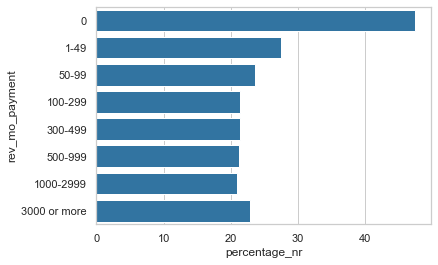

In [332]:
repaid_props_x(completed_09_01, 'rev_mo_payment')

Similarly to the number of open revolving accounts, zero payments were related to the highest default rate, whereas for the rest of the categories, no trend was visible.

#### 7) Percentage of unrepaid loans by percentage of revolving utilization ('BankcardUtilization')
[back to table of contents](#contents)

The continuous variable 'BankcardUtilization' was transformed into the ordinal variable 'card_util_rate'.

card_util_rate   repaid_yn  proportion_not_repaid  percentage_nr
1               0%  Not repaid                  0.331         33.070
3          0.1-25%  Not repaid                  0.189         18.871
5           25-50%  Not repaid                  0.207         20.681
7           50-75%  Not repaid                  0.227         22.726
9          75-100%  Not repaid                  0.238         23.781
11  100% or higher  Not repaid                  0.342         34.177

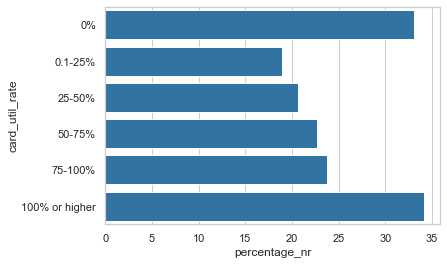

In [333]:
repaid_props_x(completed_09_01, 'card_util_rate')

Customers who had either 0% or 100% or more utilization rate of their credit cards had a high percentage of nor repaid loans (33.1% and 34.18%). For the rest of the borrowers, the probability of default rose slightly from 0.1-25% towards 75-100%. 

# Correlation of 'status_bin' and credit history (months), current credit lines, open credit lines, number of loans for last 7 years, open revolving accounts, open revolving monthly payments, percentage of revolving utilization, debt-to-income ratio

[back to table of contents](#contents)

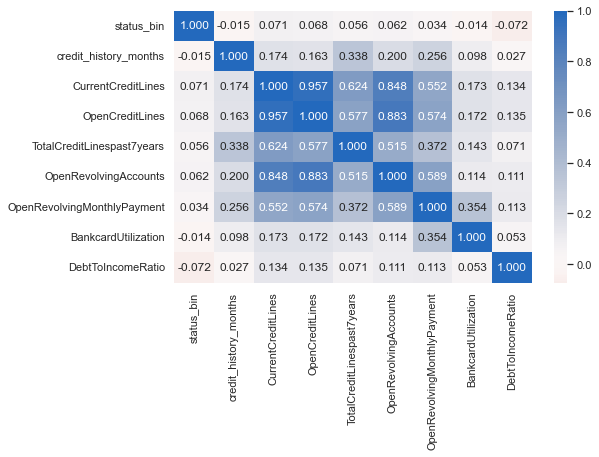

In [334]:
vars = ['status_bin', 'credit_history_months', 'CurrentCreditLines', 'OpenCreditLines', 
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
        'BankcardUtilization', 'DebtToIncomeRatio']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='pearson'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

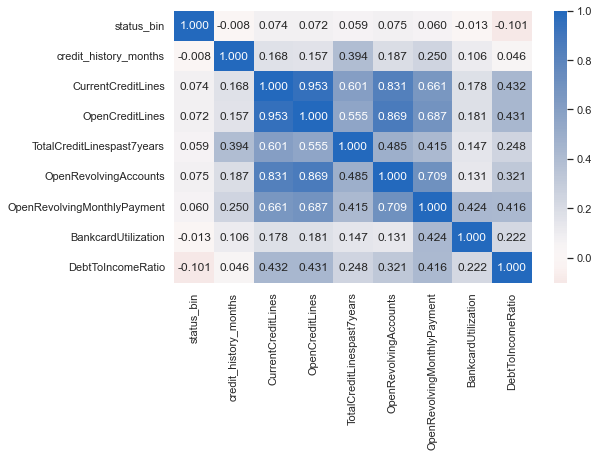

In [335]:
vars = ['status_bin', 'credit_history_months', 'CurrentCreditLines', 'OpenCreditLines', 
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
        'BankcardUtilization', 'DebtToIncomeRatio']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='spearman'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### 8) Percentage of unrepaid loans by number of current delinquencies
[back to table of contents](#contents)

The continuous count variable 'CurrentDelinquencies' was transformed into 'delinquencies' based on the frequency distribution of the latter in the original dataset.

delinquencies   repaid_yn  proportion_not_repaid  percentage_nr
1          None  Not repaid                  0.211         21.076
3             1  Not repaid                  0.296         29.570
5             2  Not repaid                  0.299         29.860
7           3-5  Not repaid                  0.397         39.728
9     6 or more  Not repaid                  0.352         35.154

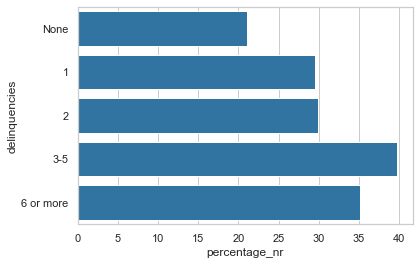

In [336]:
repaid_props_x(completed_09_01, 'delinquencies')

The relationship between percentage of unrepaid loans and number of current delinquencies appears to be quadratic with a peak at the group who had 3 to 5 delinquencies (39.73% not repaid). The percentage in the group with 6 or more delinquencies was lower (35.15%). 

#### 9) Percentage of unrepaid loans by amount delinquent on loans
[back to table of contents](#contents)

The continuous variable 'AmountDelinquent' was transformed into the ordinal variable 'amount_delinquent'.

amount_delinquent   repaid_yn  proportion_not_repaid  percentage_nr
1              None  Not repaid                  0.212         21.230
3             1-351  Not repaid                  0.310         31.044
5         352-3,040  Not repaid                  0.351         35.052
7      3,040-24,632  Not repaid                  0.341         34.052
9    24,632 or more  Not repaid                  0.292         29.185

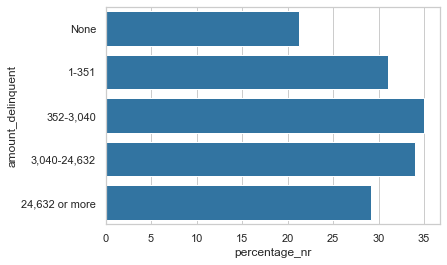

In [337]:
repaid_props_x(completed_09_01, 'amount_delinquent')

The relationship between the amount of current delinquencies and the default rate appeared to be queadratic, with a peak in the group of \\$352 to \\$3,040. However, the groups were formed not in equal intervals (due to skewness) and the real relationship may well be more complicated. 

#### 10) Percentage of unrepaid loans by number of delinquencies on loans summed up for the last 7 years
[back to table of contents](#contents)

The continuous count variable 'DelinquenciesLast7Years' was transformed into the ordinal variable 'delinquencies_7y'.

delinquencies_7y   repaid_yn  proportion_not_repaid  percentage_nr
1             None  Not repaid                  0.214         21.443
3             1-11  Not repaid                  0.264         26.450
5            12-20  Not repaid                  0.259         25.945
7            21-42  Not repaid                  0.274         27.392
9       43 or more  Not repaid                  0.244         24.380

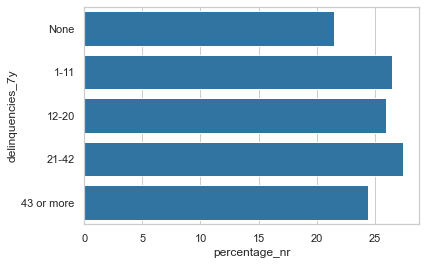

In [338]:
repaid_props_x(completed_09_01, 'delinquencies_7y')

There seems to be no discernible trend in the relationship between default rate and sum of delinquencies for the last 7 years. The relationship may be influenced by interfering variables.

#### 11) Percentage of unrepaid loans by number of inquiries by creditors for the last 6 months
[back to table of contents](#contents)

The continuous count variable 'InquiriesLast6Months' was transformed into the ordinal variable 'inquiries_6m'.

inquiries_6m   repaid_yn  proportion_not_repaid  percentage_nr
1          None  Not repaid                  0.195         19.499
3             1  Not repaid                  0.232         23.221
5             2  Not repaid                  0.259         25.907
7             3  Not repaid                  0.277         27.736
9           4-6  Not repaid                  0.294         29.354
11    7 or more  Not repaid                  0.393         39.344

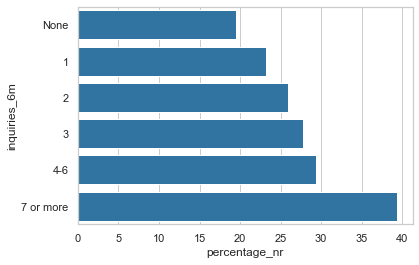

In [339]:
repaid_props_x(completed_09_01, 'inquiries_6m')

There is a linear trend between the default rate and the sum of creditor inquiries for the last 6 months. The percentage of unrepaid loans rises from 19.5% (no inquiries) to 39.34% (7 or more inquiries). 

#### 12) Percentage of unrepaid loans by total number of inquiries by creditors
[back to table of contents](#contents)

The continuous count variable 'TotalInquiries' was transformed into the ordinal variable 'inquiries_total'.

inquiries_total   repaid_yn  proportion_not_repaid  percentage_nr
1             None  Not repaid                  0.198         19.844
3                1  Not repaid                  0.218         21.752
5              2-3  Not repaid                  0.226         22.609
7              4-5  Not repaid                  0.230         22.985
9              6-9  Not repaid                  0.235         23.548
11           10-12  Not repaid                  0.255         25.546
13           13-19  Not repaid                  0.244         24.380
15      20 or more  Not repaid                  0.353         35.294

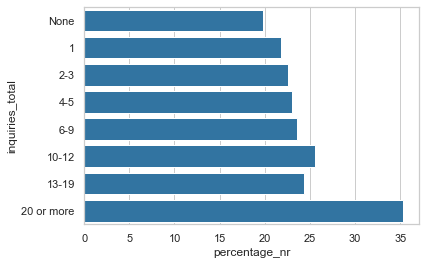

In [340]:
repaid_props_x(completed_09_01, 'inquiries_total')

The group with 20 or more inquiries by creditors has the highest percentage of unrepaid loans: 35.29%. For customers with no inquiries the default rate is 19.84%. It increases slightly (by 1% or less until the group with 10-12 inquiries and then drops slightly in the next group (13-19 inquiries). The difference between the lst group and the group with 10-12 inquiries is substantial (35.29% vs. 25.55%). The relationship between the variables may be influenced by interfering variables.

#### 13) Percentage of unrepaid loans by the number of Derogatory Public Records summed up for the last 10 years
[back to table of contents](#contents)

The continuous count variable 'PublicRecordsLast10Years' was transformed into the ordinal variable 'pub_rec_10y'.

pub_rec_10y   repaid_yn  proportion_not_repaid  percentage_nr
1        None  Not repaid                  0.218         21.824
3           1  Not repaid                  0.263         26.276
5   2 or more  Not repaid                  0.315         31.513

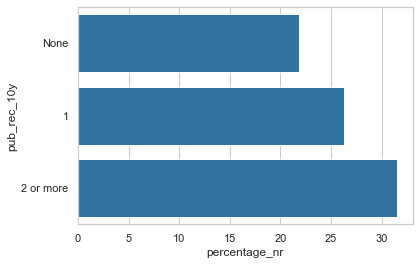

In [341]:
repaid_props_x(completed_09_01, 'pub_rec_10y')

There is a clear trend of increase in default rate from borrowers with no derogatory public records during the last 10 years to such with 2 or more (21.84% to 31.51%). 

#### 14) Percentage of unrepaid loans by the number of Derogatory Public Records summed up for the last 12 months
[back to table of contents](#contents)

The continuous count variable 'PublicRecordsLast12Months' was transformed into the ordinal variable 'pub_rec_12m'.

pub_rec_12m   repaid_yn  proportion_not_repaid  percentage_nr
1        None  Not repaid                  0.228         22.813
3   1 or more  Not repaid                  0.368         36.797

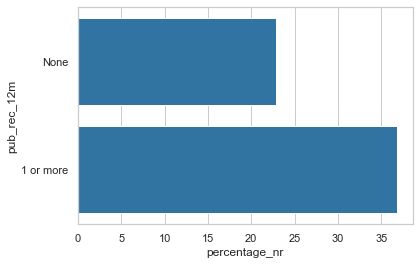

In [342]:
repaid_props_x(completed_09_01, 'pub_rec_12m')

Customers with 1 or more derogatory public records for the last 12 months had a substantially higher default rate than customers with no records: 36.8% vs. 22.81%.

#### 15) Percentage of unrepaid loans by levels of debt to income ratio
[back to table of contents](#contents)

The continuous variable 'DebtToIncomeRatio' was transformed into the ordinal variable 'dti_ordinal'.

dti_ordinal   repaid_yn  proportion_not_repaid  percentage_nr
1          0-10%  Not repaid                  0.188         18.750
3         10-20%  Not repaid                  0.199         19.932
5         20-30%  Not repaid                  0.221         22.136
7         30-40%  Not repaid                  0.255         25.514
9         40-50%  Not repaid                  0.318         31.818
11       50-100%  Not repaid                  0.391         39.119
13      100-200%  Not repaid                  0.438         43.750
15  200% or more  Not repaid                  0.460         46.032

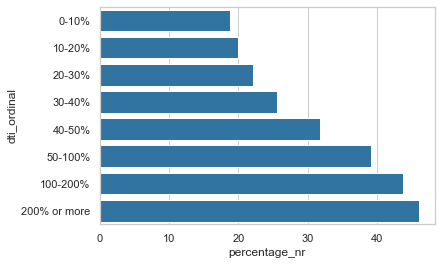

In [343]:
repaid_props_x(completed_09_01, 'dti_ordinal')

The relationship between DTI an default rate could be construed as quadratic or approximately linear: the default rate grows from 0-10% towards 200% or more. The growth rate is not even, however, the intervals of DTI are also not even due to high skewness.

# Correlation of 'status_bin' and current delinquencies, amount delinquent, number of delinquencies for last 7 years, number of inquiries by creditors for last 6 months, total number of inquiries by creditors, number of Derogatory Public Records summed up for the last 10 years, number of Derogatory Public Records summed up for the last 12 months

[back to table of contents](#contents)

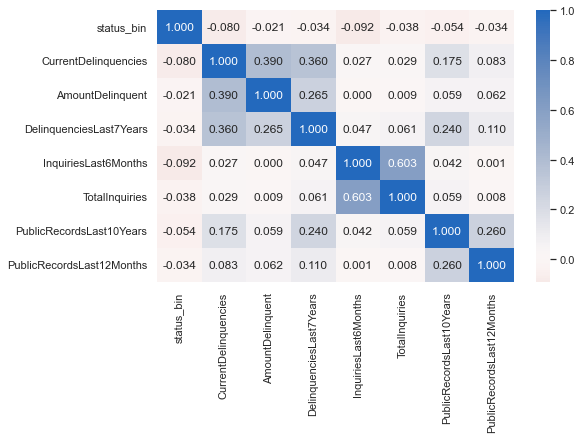

In [344]:
vars = ['status_bin', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 
        'InquiriesLast6Months', 'TotalInquiries', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='pearson'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

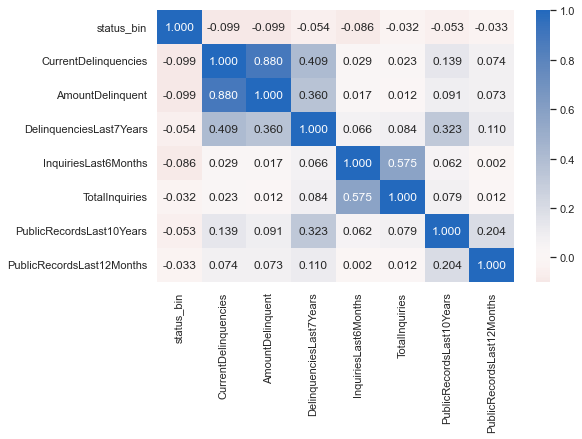

In [345]:
vars = ['status_bin', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 
        'InquiriesLast6Months', 'TotalInquiries', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(completed_09_01[vars].corr(method='spearman'), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### 7.2.5 Chi-Square Test of Independence between Loan Outcome and Ordinal Predictor Variables
<a id="chisq"></a>

[back to table of contents](#contents)

chisq1_df: 'repaid_yn' + Borrower Assessment + Loan Characteristics + Borrower Characteristics

chisq2_df: repaid_yn' + Credit History + Open Revolving Accounts + Revolving Utilization
           + Delinquencies + Inquiries by Creditors + Derogatory Public Records + Borrower Indebtedness

In [346]:
# create dfs
#new = old[['A', 'C', 'D']].copy()
df_chisq1 = completed_09_01[['repaid_yn', 'ProsperRating (Alpha)', 'ProsperScore', 'cscore_ordinal', 
                             'interest_16l', 'loan_purpose', 'loan_amount_int', 'term_ordinal', 'IncomeRange', 
                             'IsBorrowerHomeowner', 'EmploymentStatus', 'emp_dur']].copy()

df_chisq2 = completed_09_01[['repaid_yn', 'credit_history_months', 'current_credits', 'open_credits', 
                             'total_credits_7y', 'open_accounts', 'rev_mo_payment', 'card_util_rate', 
                             'delinquencies', 'amount_delinquent', 'delinquencies_7y', 'inquiries_6m', 
                             'inquiries_total', 'pub_rec_10y', 'pub_rec_12m', 'dti_ordinal']].copy()

In [347]:
# create lists for chisquare-matrix
list_chisq1_01 = ('repaid_yn', 'ProsperRating (Alpha)', 'ProsperScore', 'cscore_ordinal', 'interest_16l',
               'loan_purpose', 'loan_amount_int', 'term_ordinal', 'IncomeRange', 'IsBorrowerHomeowner', 
               'EmploymentStatus', 'emp_dur')

list_chisq1_02 = ('repaid_yn', 'ProsperRating (Alpha)', 'ProsperScore', 'cscore_ordinal', 'interest_16l',
               'loan_purpose', 'loan_amount_int', 'term_ordinal', 'IncomeRange', 'IsBorrowerHomeowner', 
               'EmploymentStatus', 'emp_dur')

list_chisq2_01 = ('repaid_yn','credit_history_months', 'current_credits', 'open_credits', 'total_credits_7y',
               'open_accounts', 'rev_mo_payment', 'card_util_rate', 'delinquencies', 
               'amount_delinquent', 'delinquencies_7y', 'inquiries_6m', 'inquiries_total',
               'pub_rec_10y', 'pub_rec_12m', 'dti_ordinal')

list_chisq2_02 = ('repaid_yn','credit_history_months', 'current_credits', 'open_credits', 'total_credits_7y',
               'open_accounts', 'rev_mo_payment', 'card_util_rate', 'delinquencies', 
               'amount_delinquent', 'delinquencies_7y', 'inquiries_6m', 'inquiries_total',
               'pub_rec_10y', 'pub_rec_12m', 'dti_ordinal')

In [348]:
# create combinations of outcome and predictors
# https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7
#cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

chisq1_prod = list(it.product(list_chisq1_01, list_chisq1_02, repeat = 1))
chisq2_prod = list(it.product(list_chisq2_01, list_chisq2_02, repeat = 1))

In [349]:
# check combinations
chisq1_prod

[('repaid_yn', 'repaid_yn'),
 ('repaid_yn', 'ProsperRating (Alpha)'),
 ('repaid_yn', 'ProsperScore'),
 ('repaid_yn', 'cscore_ordinal'),
 ('repaid_yn', 'interest_16l'),
 ('repaid_yn', 'loan_purpose'),
 ('repaid_yn', 'loan_amount_int'),
 ('repaid_yn', 'term_ordinal'),
 ('repaid_yn', 'IncomeRange'),
 ('repaid_yn', 'IsBorrowerHomeowner'),
 ('repaid_yn', 'EmploymentStatus'),
 ('repaid_yn', 'emp_dur'),
 ('ProsperRating (Alpha)', 'repaid_yn'),
 ('ProsperRating (Alpha)', 'ProsperRating (Alpha)'),
 ('ProsperRating (Alpha)', 'ProsperScore'),
 ('ProsperRating (Alpha)', 'cscore_ordinal'),
 ('ProsperRating (Alpha)', 'interest_16l'),
 ('ProsperRating (Alpha)', 'loan_purpose'),
 ('ProsperRating (Alpha)', 'loan_amount_int'),
 ('ProsperRating (Alpha)', 'term_ordinal'),
 ('ProsperRating (Alpha)', 'IncomeRange'),
 ('ProsperRating (Alpha)', 'IsBorrowerHomeowner'),
 ('ProsperRating (Alpha)', 'EmploymentStatus'),
 ('ProsperRating (Alpha)', 'emp_dur'),
 ('ProsperScore', 'repaid_yn'),
 ('ProsperScore', 'Prosp

In [350]:
# check combinations
chisq2_prod

[('repaid_yn', 'repaid_yn'),
 ('repaid_yn', 'credit_history_months'),
 ('repaid_yn', 'current_credits'),
 ('repaid_yn', 'open_credits'),
 ('repaid_yn', 'total_credits_7y'),
 ('repaid_yn', 'open_accounts'),
 ('repaid_yn', 'rev_mo_payment'),
 ('repaid_yn', 'card_util_rate'),
 ('repaid_yn', 'delinquencies'),
 ('repaid_yn', 'amount_delinquent'),
 ('repaid_yn', 'delinquencies_7y'),
 ('repaid_yn', 'inquiries_6m'),
 ('repaid_yn', 'inquiries_total'),
 ('repaid_yn', 'pub_rec_10y'),
 ('repaid_yn', 'pub_rec_12m'),
 ('repaid_yn', 'dti_ordinal'),
 ('credit_history_months', 'repaid_yn'),
 ('credit_history_months', 'credit_history_months'),
 ('credit_history_months', 'current_credits'),
 ('credit_history_months', 'open_credits'),
 ('credit_history_months', 'total_credits_7y'),
 ('credit_history_months', 'open_accounts'),
 ('credit_history_months', 'rev_mo_payment'),
 ('credit_history_months', 'card_util_rate'),
 ('credit_history_months', 'delinquencies'),
 ('credit_history_months', 'amount_delinquent

In [351]:
# get list of chi-square tests, select only p-value

result_1 = []

for i in chisq1_prod:
    if i[0] != i[1]:
        result_1.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_chisq1[i[0]], df_chisq1[i[1]])))[1]))
result_1

[('repaid_yn', 'ProsperRating (Alpha)', 5.791911148370515e-277),
 ('repaid_yn', 'ProsperScore', 6.747006169525897e-221),
 ('repaid_yn', 'cscore_ordinal', 3.2400787065524223e-122),
 ('repaid_yn', 'interest_16l', 0.0),
 ('repaid_yn', 'loan_purpose', 1.451478395545262e-20),
 ('repaid_yn', 'loan_amount_int', 1.1066784397424827e-50),
 ('repaid_yn', 'term_ordinal', 1.3761864517902527e-96),
 ('repaid_yn', 'IncomeRange', 6.75524157985564e-132),
 ('repaid_yn', 'IsBorrowerHomeowner', 5.023493908932308e-11),
 ('repaid_yn', 'EmploymentStatus', 2.984262324477228e-68),
 ('repaid_yn', 'emp_dur', 0.06366077649461144),
 ('ProsperRating (Alpha)', 'repaid_yn', 5.791911148369196e-277),
 ('ProsperRating (Alpha)', 'ProsperScore', 0.0),
 ('ProsperRating (Alpha)', 'cscore_ordinal', 0.0),
 ('ProsperRating (Alpha)', 'interest_16l', 0.0),
 ('ProsperRating (Alpha)', 'loan_purpose', 3.9613852907522043e-63),
 ('ProsperRating (Alpha)', 'loan_amount_int', 0.0),
 ('ProsperRating (Alpha)', 'term_ordinal', 0.0),
 ('Pros

In [352]:
chi_test_output_1 = pd.DataFrame(result_1, columns = ['var1', 'var2', 
                                                       'p-value'])

chi_test_output_1.pivot(index='var1', columns='var2', values='p-value')

var2                   EmploymentStatus  IncomeRange  IsBorrowerHomeowner  \
var1                                                                        
EmploymentStatus                    NaN        0.000                0.000   
IncomeRange                       0.000          NaN                0.000   
IsBorrowerHomeowner               0.000        0.000                  NaN   
ProsperRating (Alpha)             0.000        0.000                0.000   
ProsperScore                      0.000        0.000                0.000   
cscore_ordinal                    0.000        0.000                0.000   
emp_dur                           0.000        0.000                0.000   
interest_16l                      0.000        0.000                0.000   
loan_amount_int                   0.000        0.000                0.000   
loan_purpose                      0.000        0.000                0.000   
repaid_yn                         0.000        0.000                0.000   
term_ordinal                      0.000        0.000                0.000   

var2                   ProsperRating (Alpha)  ProsperScore  cscore_ordinal  \
var1                                                                         
EmploymentStatus                       0.000         0.000           0.000   
IncomeRange                            0.000         0.000           0.000   
IsBorrowerHomeowner                    0.000         0.000           0.000   
ProsperRating (Alpha)                    NaN         0.000           0.000   
ProsperScore                           0.000           NaN           0.000   
cscore_ordinal                         0.000         0.000             NaN   
emp_dur                                0.000         0.000           0.002   
interest_16l                           0.000         0.000           0.000   
loan_amount_int                        0.000         0.000           0.000   
loan_purpose                           0.000         0.000           0.000   
repaid_yn                              0.000         0.000           0.000   
term_ordinal                           0.000         0.000           0.000   

var2                   emp_dur  interest_16l  loan_amount_int  loan_purpose  \
var1                                                                          
EmploymentStatus         0.000         0.000            0.000         0.000   
IncomeRange              0.000         0.000            0.000         0.000   
IsBorrowerHomeowner      0.000         0.000            0.000         0.000   
ProsperRating (Alpha)    0.000         0.000            0.000         0.000   
ProsperScore             0.000         0.000            0.000         0.000   
cscore_ordinal           0.002         0.000            0.000         0.000   
emp_dur                    NaN         0.000            0.179         0.000   
interest_16l             0.000           NaN            0.000         0.000   
loan_amount_int          0.179         0.000              NaN         0.000   
loan_purpose             0.000         0.000            0.000           NaN   
repaid_yn                0.064         0.000            0.000         0.000   
term_ordinal             0.000         0.000            0.000         0.000   

var2                   repaid_yn  term_ordinal  
var1                                            
EmploymentStatus           0.000         0.000  
IncomeRange                0.000         0.000  
IsBorrowerHomeowner        0.000         0.000  
ProsperRating (Alpha)      0.000         0.000  
ProsperScore               0.000         0.000  
cscore_ordinal             0.000         0.000  
emp_dur                    0.064         0.000  
interest_16l               0.000         0.000  
loan_amount_int            0.000         0.000  
loan_purpose               0.000         0.000  
repaid_yn                    NaN         0.000  
term_ordinal               0.000           NaN

In [353]:
type(chi_test_output_1)

pandas.core.frame.DataFrame

In [354]:
chi_test_output_1.dtypes

var1        object
var2        object
p-value    float64
dtype: object

In [355]:
#https://stackoverflow.com/questions/38057416/reshaping-a-pandas-correlation-matrix
#df = df.rename_axis(None).rename_axis(None, axis=1)
chi_test_output_1_01 = chi_test_output_1.rename_axis(None).rename_axis(None, axis=1)

chi_test_output_1_01

var1                   var2  p-value
0    repaid_yn  ProsperRating (Alpha)    0.000
1    repaid_yn           ProsperScore    0.000
2    repaid_yn         cscore_ordinal    0.000
3    repaid_yn           interest_16l    0.000
4    repaid_yn           loan_purpose    0.000
..         ...                    ...      ...
127    emp_dur        loan_amount_int    0.179
128    emp_dur           term_ordinal    0.000
129    emp_dur            IncomeRange    0.000
130    emp_dur    IsBorrowerHomeowner    0.000
131    emp_dur       EmploymentStatus    0.000

[132 rows x 3 columns]

In [356]:
type(chi_test_output_1_01)

pandas.core.frame.DataFrame

In [357]:
#reset index
chi_test_output_1_02 = chi_test_output_1_01.reset_index(drop=True)
chi_test_output_1_02.head(15)

var1                   var2  p-value
0               repaid_yn  ProsperRating (Alpha)    0.000
1               repaid_yn           ProsperScore    0.000
2               repaid_yn         cscore_ordinal    0.000
3               repaid_yn           interest_16l    0.000
4               repaid_yn           loan_purpose    0.000
5               repaid_yn        loan_amount_int    0.000
6               repaid_yn           term_ordinal    0.000
7               repaid_yn            IncomeRange    0.000
8               repaid_yn    IsBorrowerHomeowner    0.000
9               repaid_yn       EmploymentStatus    0.000
10              repaid_yn                emp_dur    0.064
11  ProsperRating (Alpha)              repaid_yn    0.000
12  ProsperRating (Alpha)           ProsperScore    0.000
13  ProsperRating (Alpha)         cscore_ordinal    0.000
14  ProsperRating (Alpha)           interest_16l    0.000

In [358]:
chi_test_output_1_02.dtypes

var1        object
var2        object
p-value    float64
dtype: object

In [359]:
chisqdf1 = chi_test_output_1_02.iloc[:11]
chisqdf1

var1                   var2  p-value
0   repaid_yn  ProsperRating (Alpha)    0.000
1   repaid_yn           ProsperScore    0.000
2   repaid_yn         cscore_ordinal    0.000
3   repaid_yn           interest_16l    0.000
4   repaid_yn           loan_purpose    0.000
5   repaid_yn        loan_amount_int    0.000
6   repaid_yn           term_ordinal    0.000
7   repaid_yn            IncomeRange    0.000
8   repaid_yn    IsBorrowerHomeowner    0.000
9   repaid_yn       EmploymentStatus    0.000
10  repaid_yn                emp_dur    0.064

In [360]:
#https://towardsdatascience.com/essential-techniques-to-style-pandas-dataframes-8796c74c9ff3
#df.style.background_gradient(subset = ["A", "D"]))

chisqdf1_styled = chisqdf1.style.background_gradient(subset = ['p-value'])
chisqdf1_styled

In [361]:
result_2 = []

for i in chisq2_prod:
    if i[0] != i[1]:
        result_2.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_chisq2[i[0]], df_chisq2[i[1]])))[1]))
result_2

[('repaid_yn', 'credit_history_months', 0.47101812199481113),
 ('repaid_yn', 'current_credits', 2.5808301629776372e-48),
 ('repaid_yn', 'open_credits', 2.0717880240674312e-57),
 ('repaid_yn', 'total_credits_7y', 3.229530412932122e-16),
 ('repaid_yn', 'open_accounts', 1.3780553936054163e-50),
 ('repaid_yn', 'rev_mo_payment', 2.1908954771563428e-57),
 ('repaid_yn', 'card_util_rate', 1.0085071554346619e-39),
 ('repaid_yn', 'delinquencies', 1.6985954807090117e-52),
 ('repaid_yn', 'amount_delinquent', 2.8479951251299104e-50),
 ('repaid_yn', 'delinquencies_7y', 2.191255431561681e-14),
 ('repaid_yn', 'inquiries_6m', 2.200725968602894e-39),
 ('repaid_yn', 'inquiries_total', 7.481703309618036e-07),
 ('repaid_yn', 'pub_rec_10y', 7.220688194406147e-16),
 ('repaid_yn', 'pub_rec_12m', 7.41474099688987e-07),
 ('repaid_yn', 'dti_ordinal', 6.927616796171094e-73),
 ('credit_history_months', 'repaid_yn', 0.47101812199481785),
 ('credit_history_months', 'current_credits', 0.4264745481605445),
 ('credit_h

In [362]:
chi_test_output_2 = pd.DataFrame(result_2, columns = ['var1', 'var2', 
                                                       'p-value'])

chi_test_output_2.pivot(index='var1', columns='var2', values='p-value')

var2                   amount_delinquent  card_util_rate  \
var1                                                       
amount_delinquent                    NaN           0.000   
card_util_rate                     0.000             NaN   
credit_history_months              0.444           0.438   
current_credits                    0.000           0.000   
delinquencies                      0.000           0.000   
delinquencies_7y                   0.000           0.000   
dti_ordinal                        0.000           0.000   
inquiries_6m                       0.113           0.000   
inquiries_total                    0.044           0.000   
open_accounts                      0.000           0.000   
open_credits                       0.000           0.000   
pub_rec_10y                        0.000           0.000   
pub_rec_12m                        0.000           0.000   
repaid_yn                          0.000           0.000   
rev_mo_payment                     0.000           0.000   
total_credits_7y                   0.000           0.000   

var2                   credit_history_months  current_credits  delinquencies  \
var1                                                                           
amount_delinquent                      0.444            0.000          0.000   
card_util_rate                         0.438            0.000          0.000   
credit_history_months                    NaN            0.426          0.444   
current_credits                        0.426              NaN          0.000   
delinquencies                          0.444            0.000            NaN   
delinquencies_7y                       0.444            0.000          0.000   
dti_ordinal                            0.426            0.000          0.000   
inquiries_6m                           0.438            0.000          0.005   
inquiries_total                        0.426            0.000          0.000   
open_accounts                          0.426            0.000          0.000   
open_credits                           0.426            0.000          0.000   
pub_rec_10y                            0.460            0.000          0.000   
pub_rec_12m                            0.471            0.000          0.000   
repaid_yn                              0.471            0.000          0.000   
rev_mo_payment                         0.426            0.000          0.000   
total_credits_7y                       0.432            0.000          0.000   

var2                   delinquencies_7y  dti_ordinal  inquiries_6m  \
var1                                                                 
amount_delinquent                 0.000        0.000         0.113   
card_util_rate                    0.000        0.000         0.000   
credit_history_months             0.444        0.426         0.438   
current_credits                   0.000        0.000         0.000   
delinquencies                     0.000        0.000         0.005   
delinquencies_7y                    NaN        0.000         0.000   
dti_ordinal                       0.000          NaN         0.000   
inquiries_6m                      0.000        0.000           NaN   
inquiries_total                   0.000        0.000         0.000   
open_accounts                     0.000        0.000         0.000   
open_credits                      0.000        0.000         0.000   
pub_rec_10y                       0.000        0.000         0.000   
pub_rec_12m                       0.000        0.000         0.416   
repaid_yn                         0.000        0.000         0.000   
rev_mo_payment                    0.000        0.000         0.010   
total_credits_7y                  0.000        0.000         0.000   

var2                   inquiries_total  open_accounts  open_credits  \
var1                                                                  
amount_delinquent                0.044          0.000         0.000   
card

In [363]:
# reshape correlation matrix
chi_test_output_2_01 = chi_test_output_2.rename_axis(None).rename_axis(None, axis=1)
chi_test_output_2_01.head(20)

var1                   var2  p-value
0               repaid_yn  credit_history_months    0.471
1               repaid_yn        current_credits    0.000
2               repaid_yn           open_credits    0.000
3               repaid_yn       total_credits_7y    0.000
4               repaid_yn          open_accounts    0.000
5               repaid_yn         rev_mo_payment    0.000
6               repaid_yn         card_util_rate    0.000
7               repaid_yn          delinquencies    0.000
8               repaid_yn      amount_delinquent    0.000
9               repaid_yn       delinquencies_7y    0.000
10              repaid_yn           inquiries_6m    0.000
11              repaid_yn        inquiries_total    0.000
12              repaid_yn            pub_rec_10y    0.000
13              repaid_yn            pub_rec_12m    0.000
14              repaid_yn            dti_ordinal    0.000
15  credit_history_months              repaid_yn    0.471
16  credit_history_months        current_credits    0.426
17  credit_history_months           open_credits    0.426
18  credit_history_months       total_credits_7y    0.432
19  credit_history_months          open_accounts    0.426

In [364]:
#reset index
chi_test_output_2_02 = chi_test_output_2_01.reset_index(drop=True)
chi_test_output_2_02

var1                   var2  p-value
0      repaid_yn  credit_history_months    0.471
1      repaid_yn        current_credits    0.000
2      repaid_yn           open_credits    0.000
3      repaid_yn       total_credits_7y    0.000
4      repaid_yn          open_accounts    0.000
..           ...                    ...      ...
235  dti_ordinal       delinquencies_7y    0.000
236  dti_ordinal           inquiries_6m    0.000
237  dti_ordinal        inquiries_total    0.000
238  dti_ordinal            pub_rec_10y    0.000
239  dti_ordinal            pub_rec_12m    0.000

[240 rows x 3 columns]

In [365]:
chisqdf2 = chi_test_output_2_02.iloc[:15]
chisqdf2

var1                   var2  p-value
0   repaid_yn  credit_history_months    0.471
1   repaid_yn        current_credits    0.000
2   repaid_yn           open_credits    0.000
3   repaid_yn       total_credits_7y    0.000
4   repaid_yn          open_accounts    0.000
5   repaid_yn         rev_mo_payment    0.000
6   repaid_yn         card_util_rate    0.000
7   repaid_yn          delinquencies    0.000
8   repaid_yn      amount_delinquent    0.000
9   repaid_yn       delinquencies_7y    0.000
10  repaid_yn           inquiries_6m    0.000
11  repaid_yn        inquiries_total    0.000
12  repaid_yn            pub_rec_10y    0.000
13  repaid_yn            pub_rec_12m    0.000
14  repaid_yn            dti_ordinal    0.000

In [366]:
# use pd.style
chisqdf2_styled = chisqdf2.style.background_gradient(subset = ['p-value'])
chisqdf2_styled

### 7.3. Relationship of Loan Outcome Status to Predictor Variables Grouped by Loan Purpose
<a id="grbylp"></a>
[back to table of contents](#contents)

In this section, we are going to present the group difference of repaid vs. unrepaid loans on interval-level variables, split by loan purpose & the same with ordinal vars, with function from part 7.2., defined with groupby obj with 2 vars

The loan purpose variable has the following issues:

1) The "personal loan" category is empty and 

2) the "not available" category does not contain unrepaid loans. 

3) The "recreational vehicle" contains a very low number of unrepaid loans.

**Define function for boxplots for most predictor variables**:

In [367]:
def purpose_boxpl(df, xvar):
    plt.figure(figsize = [10, 10]) 
    ax = sb.boxplot(data = df, x = xvar, y = 'loan_purpose', hue = 'repaid_yn')
    # position legend outside of plot
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Loans repaid yes/no');

**Define function for boxplots for count predictor variables (with extreme outliers)**:

In [368]:
# for x-variables with a lot of outliers
def purpose_boxpl_long(df, xvar):
    plt.figure(figsize = [35, 10]) 
    ax = sb.boxplot(data = df, x = xvar, y = 'loan_purpose', hue = 'repaid_yn')
    # position legend outside of plot
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Loans repaid yes/no');

**Define function for bar charts depicting percentage of unrepaid loans in combinations of categorical/ordinal predictor variables**:

In [369]:
def repaid_props_by2vars_x(initial_df, grouping_cat_var1):
    """ Finds percentage of unrepaid loans within levels of two 
    grouping categorical variables. Returns and prints a dataframe 
    and shows a graph. The outcome variable (percentage of unrepaid loans)
    is depicted on the x-axis."""

    # initial groupby object: series; aggregation: proportion
    # second groupby variable is always loan purpose
    s = initial_df.groupby([grouping_cat_var1, 'loan_purpose'])['repaid_yn'].value_counts(normalize=True)

    # reset_index(name='percentage_not_repaid') turns series into dataframe:
    # or df = s.to_frame(name='percentage_not_repaid')
    df = s.reset_index(name='proportion_not_repaid')

    # convert index column to category (in order to use cat.remove_categories() in next step)
    df['repaid_yn'] = df['repaid_yn'].astype('category')

    # remove 'repaid' category to leave only 'not repaid' percentage
    df['repaid_yn'] = df['repaid_yn'].cat.remove_categories("Repaid")

    # part 2 of removing 'repaid' category: remove NaNs:
    df.dropna(inplace=True)

    # multiply fractions by 100 to get percent values
    df['percentage_nr'] = df['proportion_not_repaid']*100

    # bar chart of percentage of unrepaid loans by categories of 2 predictors:
    plt.figure(figsize = [10, 20])
    # set background grid
    sb.set_theme(style="whitegrid")
    #draw plot
    sb.barplot(data = df, x = 'percentage_nr', y = 'loan_purpose', hue = grouping_cat_var1)
    # position legend outside of plot
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title=grouping_cat_var1); 
    
    return(df)   
    print(df)

#### 7.3.1 Borrower Assessment Variables
<a id="xba3"></a>

[back to table of contents](#contents)

#### 1) Interest rate x loan purpose x loan outcome

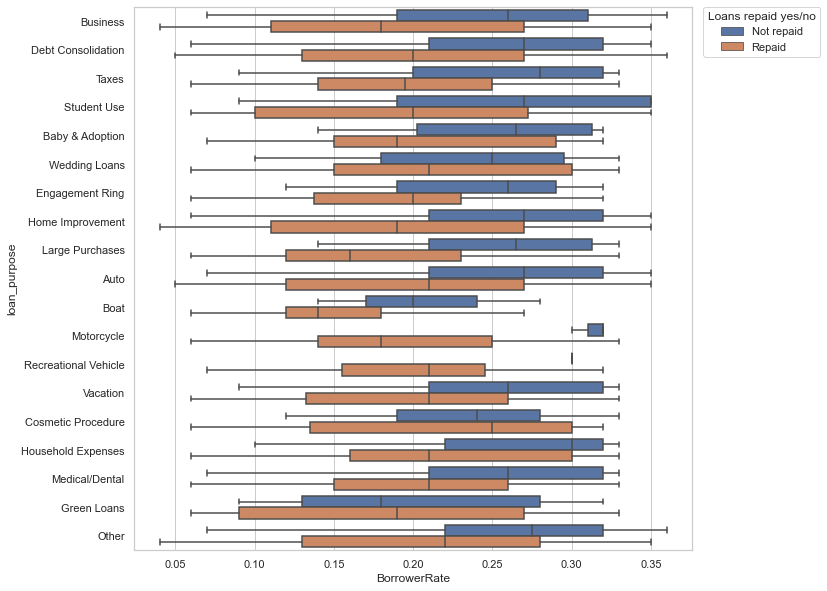

In [370]:
purpose_boxpl(completed_09_01, 'BorrowerRate')

Regarding the effect of interest rate (split by loan purpose) on the loan status outcome, there is a clear trend of unrepaid loans having been approved at a higher interest rate. The exceptions are loans for cosmetic procedures and "green" loans.

#### 2) Prosper Rating (7-level rating) x loan purpose x loan outcome

[back to table of contents](#contents)

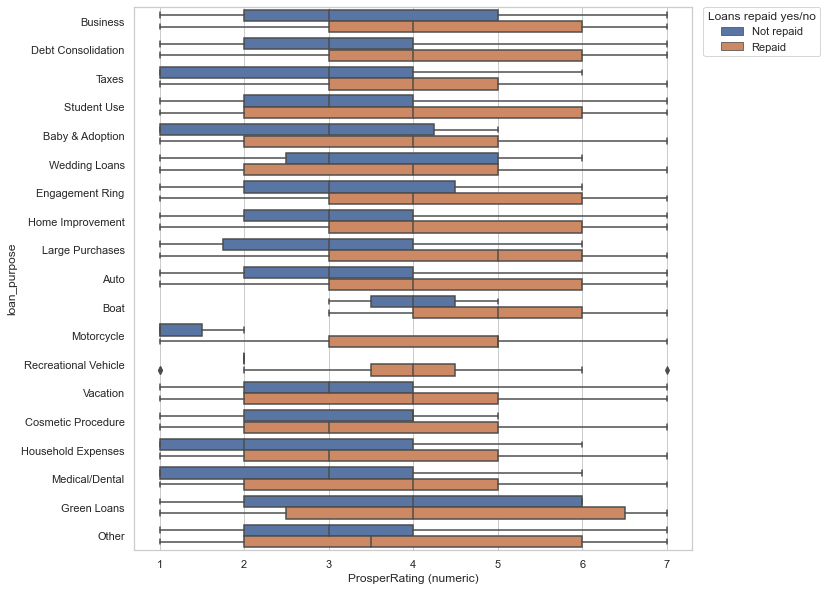

In [371]:
purpose_boxpl(completed_09_01, 'ProsperRating (numeric)')

Regarding the effect of 7-level borrower rating (also named "Prosper Rating Alpha", split by loan purpose) on the loan outcome, there is a somewhat clear trend of unrepaid loans belonging to borrowers with lower rating. The exceptions are loans for cosmetic procedures and "green" loans.

#### 3) Prosper Score (10-level rating) x loan purpose x loan outcome
[back to table of contents](#contents)

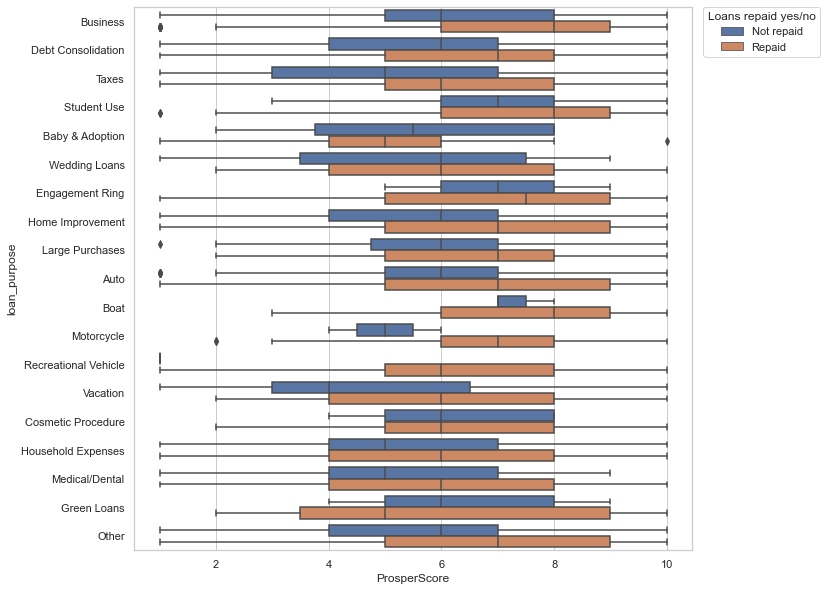

In [372]:
purpose_boxpl(completed_09_01, 'ProsperScore')

Regarding the effect of 10-level borrower rating (also named "Prosper Score", split by loan purpose) on the loan outcome, there is a clear trend of unrepaid loans belonging to borrowers with lower rating. The exceptions are loans for cosmetic procedures and weddings, where both repaid and unrepaid loans were lent to borrowers with overall equal ratings, and "green" loans, where the borrowers who repaid their loans had a (groupwise) lower rating than those who did not repay them.

#### 4) CreditScoreRangeUpper (professional credit rating) x loan purpose x loan outcome
[back to table of contents](#contents)

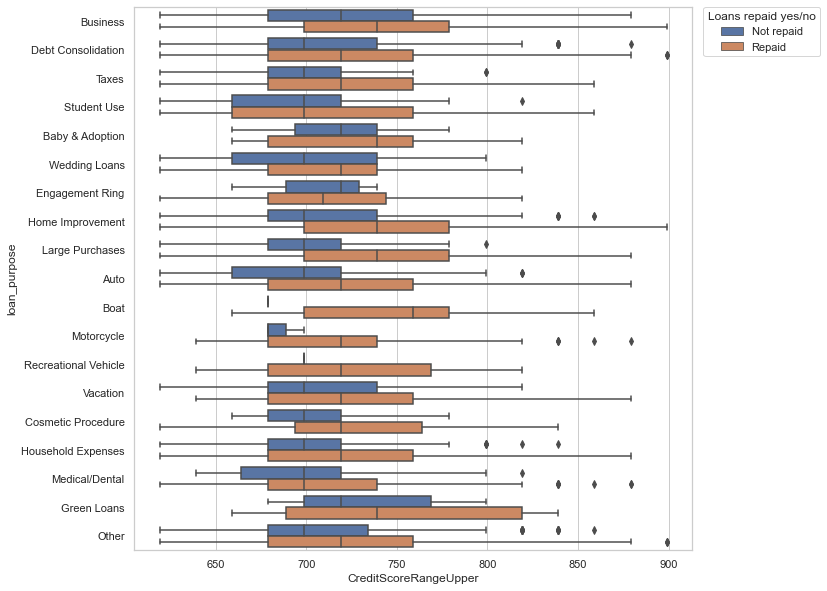

In [373]:
purpose_boxpl(completed_09_01, 'CreditScoreRangeUpper')

Regarding the effect of professional credit score (split by loan purpose) on the loan outcome, there is a somewhat clear trend of unrepaid loans belonging to borrowers with lower rating. The exceptions are student use loans, engagement ring loans, and medical and dental loans.

#### 7.3.2 Loan Characteristics 
<a id="xloanchar3"></a>
[back to table of contents](#contents)

#### 1) LoanOriginalAmount x loan purpose x loan outcome

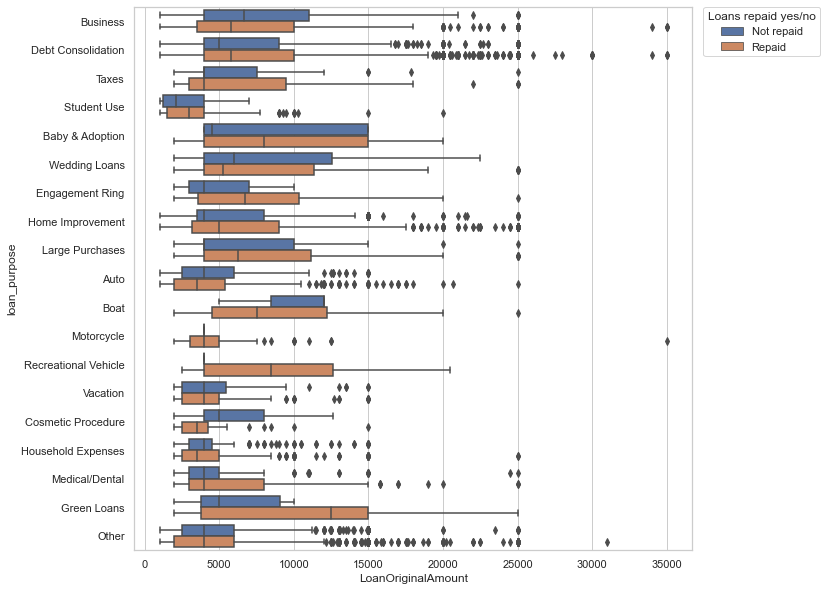

In [374]:
purpose_boxpl(completed_09_01, 'LoanOriginalAmount')

The loan amount variable is characterized by positive outliers in almost every category of loan purpose. There is no clear trend regarding the medians (or the bulk of the scores) of repaid vs. unrepaid loans.

#### 2) Loan term (ordinal) x loan purpose x loan outcome
[back to table of contents](#contents)

term_ordinal          loan_purpose   repaid_yn  proportion_not_repaid  \
1            12              Business  Not repaid                  0.056   
3            12    Debt Consolidation  Not repaid                  0.050   
7            12         Wedding Loans  Not repaid                  0.071   
10           12      Home Improvement  Not repaid                  0.032   
13           12                  Auto  Not repaid                  0.047   
19           12    Cosmetic Procedure  Not repaid                  0.125   
21           12    Household Expenses  Not repaid                  0.075   
23           12        Medical/Dental  Not repaid                  0.100   
26           12                 Other  Not repaid                  0.026   
28           36              Business  Not repaid                  0.261   
30           36    Debt Consolidation  Not repaid                  0.219   
32           36                 Taxes  Not repaid                  0.262   
34           36           Student Use  Not repaid                  0.144   
36           36       Baby & Adoption  Not repaid                  0.364   
38           36         Wedding Loans  Not repaid                  0.196   
40           36       Engagement Ring  Not repaid                  0.057   
42           36      Home Improvement  Not repaid                  0.221   
44           36       Large Purchases  Not repaid                  0.228   
46           36                  Auto  Not repaid                  0.190   
48           36                  Boat  Not repaid                  0.118   
50           36            Motorcycle  Not repaid                  0.052   
52           36  Recreational Vehicle  Not repaid                  0.111   
54           36              Vacation  Not repaid                  0.229   
56           36    Cosmetic Procedure  Not repaid                  0.217   
58           36    Household Expenses  Not repaid                  0.366   
60           36        Medical/Dental  Not repaid                  0.330   
62           36           Green Loans  Not repaid                  0.462   
64           36                 Other  Not repaid                  0.232   
66           60              Business  Not repaid                  0.418   
68           60    Debt Consolidation  Not repaid                  0.293   
70           60                 Taxes  Not repaid                  0.282   
72           60       Baby & Adoption  Not repaid                  0.364   
74           60         Wedding Loans  Not repaid                  0.377   
76           60       Engagement Ring  Not repaid                  0.091   
78           60      Home Improvement  Not repaid                  0.323   
80           60       Large Purchases  Not repaid                  0.354   
82           60                  Auto  Not repaid                  0.343   
84           60                  Boat  Not repaid                  0.143   
87           60              Vacation  Not repaid                  0.513   
89           60    Cosmetic Procedure  Not repaid                  0.500   
92           60    Household Expenses  Not repaid                  0.465   
94           60        Medical/Dental  Not repaid                  0.457   
95           60           Green Loans  Not repaid                  0.500   
98           60                 Other  Not repaid                  0.364   

    percentage_nr  
1           5.618  
3           5.019  
7           7.143  
10          3.205  
13          4.651  
19         12.500  
21          7.463  
23         10.000  
26          2.602  
28         26.087  
30         21.877  
32         26.230  
34         14.428  
36         36.364  
38         19.565  
40          5.714  
42         22.141  
44         22.772  
46         19.000  
48         11.765  
50          5.172  
52         11.111  
54         22.881  
56         21.739  
58         36.615  
60         33.040  
62         46.154  
64         23.188  
66

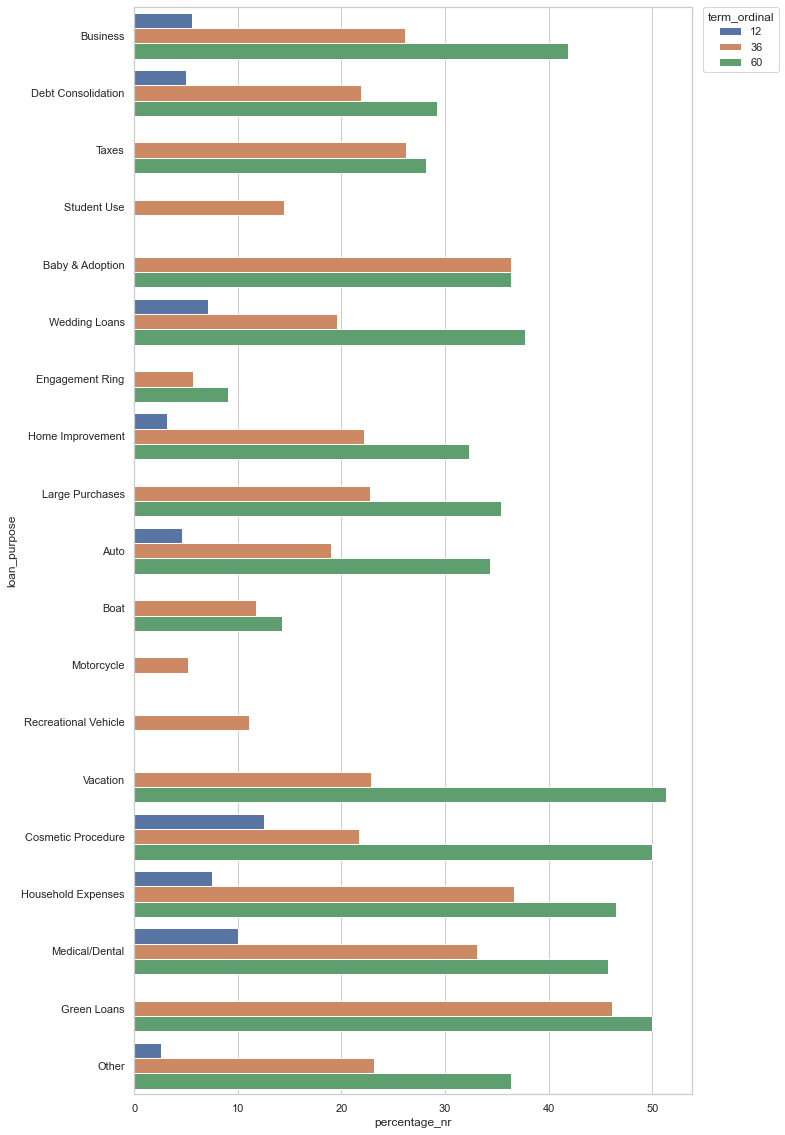

In [375]:
repaid_props_by2vars_x(completed_09_01, 'term_ordinal')

Short-term loans (12 months) in about half of categories of loan purpose contain no unrepaid loans. The loan outcome clearly depends on the loan term: the longer the term, the highest the probability of default.

#### 7.3.3 Borrower Characteristics
<a id="xbch3"></a>
[back to table of contents](#contents)

#### 1) StatedMonthlyIncome x loan purpose x loan outcome

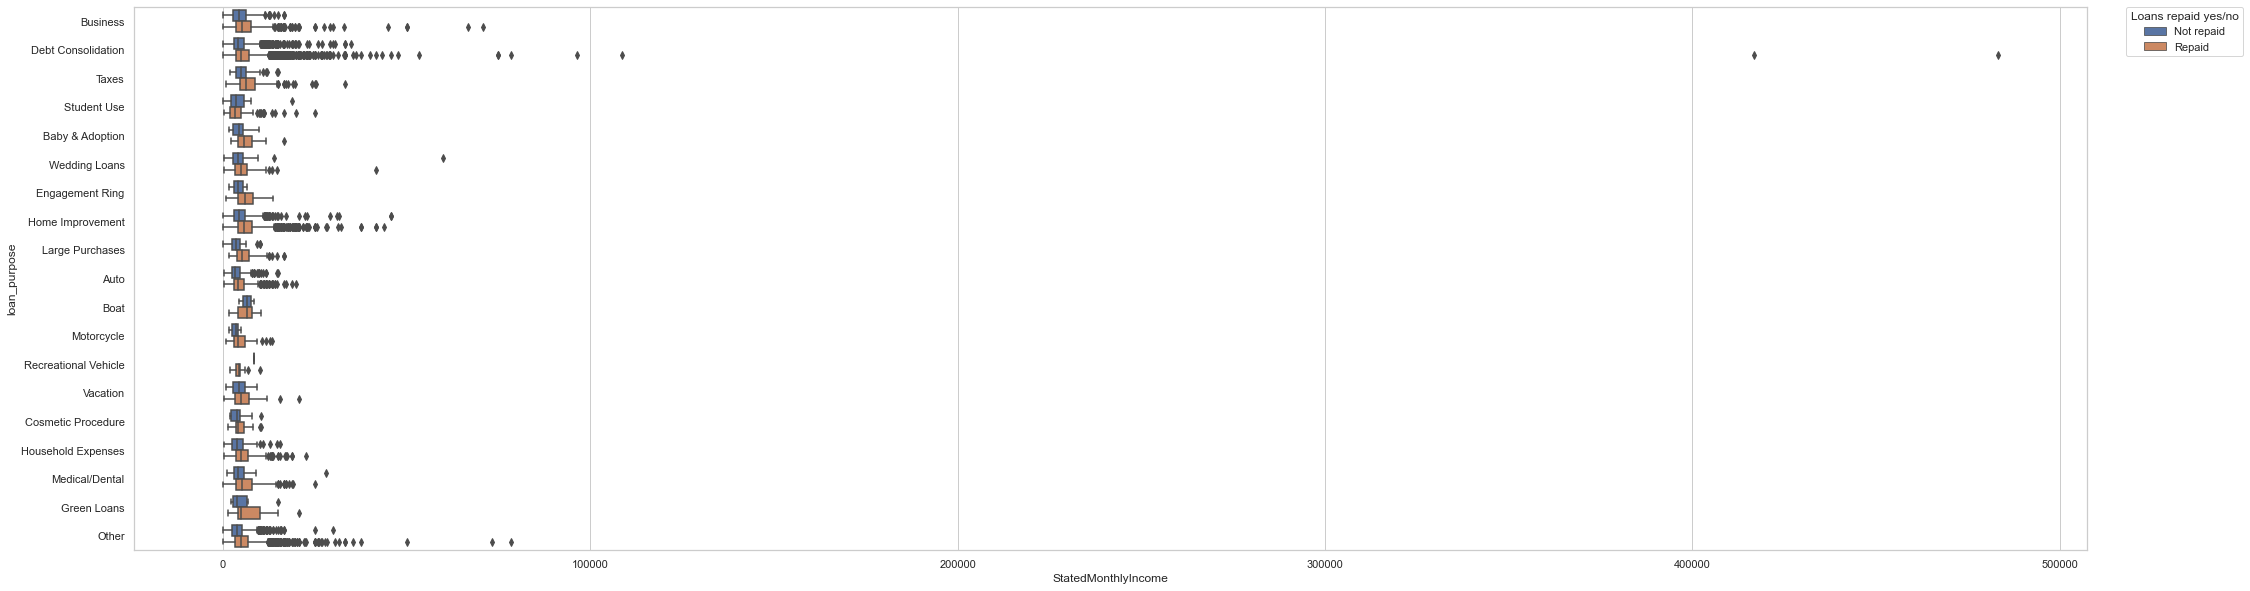

In [376]:
purpose_boxpl_long(completed_09_01, 'StatedMonthlyIncome')

The loan purpose category 'Debt Consolidation' (repaid loans) contains some extreme high outliers in Stated Monthly Income. In order to make the graph more comprehensible, we can filter them out.

In [377]:
# prefilter the df
filter_debtc = completed_09_01[(completed_09_01['loan_purpose'] == 'Debt Consolidation') & (completed_09_01['repaid_yn'] == 'Repaid')]
# sort by stated monthly income
filter_debtc_sorted = filter_debtc.sort_values(by=['StatedMonthlyIncome'], ascending=False)
# leave only columns of interest
filt_3var = filter_debtc_sorted.loc[:, ['loan_purpose', 'repaid_yn', 'StatedMonthlyIncome']]
# display cases with highest monthly income
filt_3var.head(20)

loan_purpose repaid_yn  StatedMonthlyIncome
17411   Debt Consolidation    Repaid           483333.333
8066    Debt Consolidation    Repaid           416666.667
111265  Debt Consolidation    Repaid           108750.000
59928   Debt Consolidation    Repaid            96266.500
59542   Debt Consolidation    Repaid            78364.417
4691    Debt Consolidation    Repaid            75000.000
27013   Debt Consolidation    Repaid            75000.000
21250   Debt Consolidation    Repaid            53333.333
90726   Debt Consolidation    Repaid            47726.750
44013   Debt Consolidation    Repaid            45833.333
92234   Debt Consolidation    Repaid            43333.333
73952   Debt Consolidation    Repaid            41666.667
88527   Debt Consolidation    Repaid            39953.333
86035   Debt Consolidation    Repaid            37500.000
44664   Debt Consolidation    Repaid            36250.000
19184   Debt Consolidation    Repaid            35416.667
104456  Debt Consolidation    Repaid            33333.333
55795   Debt Consolidation    Repaid            33333.333
54607   Debt Consolidation    Repaid            33333.333
81898   Debt Consolidation    Repaid            33333.333

There are two extreme cases: 17411 and 8066. We can exclude them and redo the graph.

In [378]:
# filter by stated monthly income (excluding cases over $100,000)
filt_income = completed_09_01[completed_09_01['StatedMonthlyIncome'] < 100000]
# leave only variables of interest
filt_income_3var = filt_income.loc[:, ['loan_purpose', 'repaid_yn', 'StatedMonthlyIncome']]
# sort by monthly income
filt_income_3var_sorted = filt_income_3var.sort_values(by=['StatedMonthlyIncome'], ascending=False)
# show cases with highest income
filt_income_3var_sorted.head()

loan_purpose repaid_yn  StatedMonthlyIncome
59928  Debt Consolidation    Repaid            96266.500
20708               Other    Repaid            78364.417
59542  Debt Consolidation    Repaid            78364.417
4691   Debt Consolidation    Repaid            75000.000
27013  Debt Consolidation    Repaid            75000.000

#### Redo graph: StatedMonthlyIncome (minus 2 highest outliers) x loan purpose x loan outcome

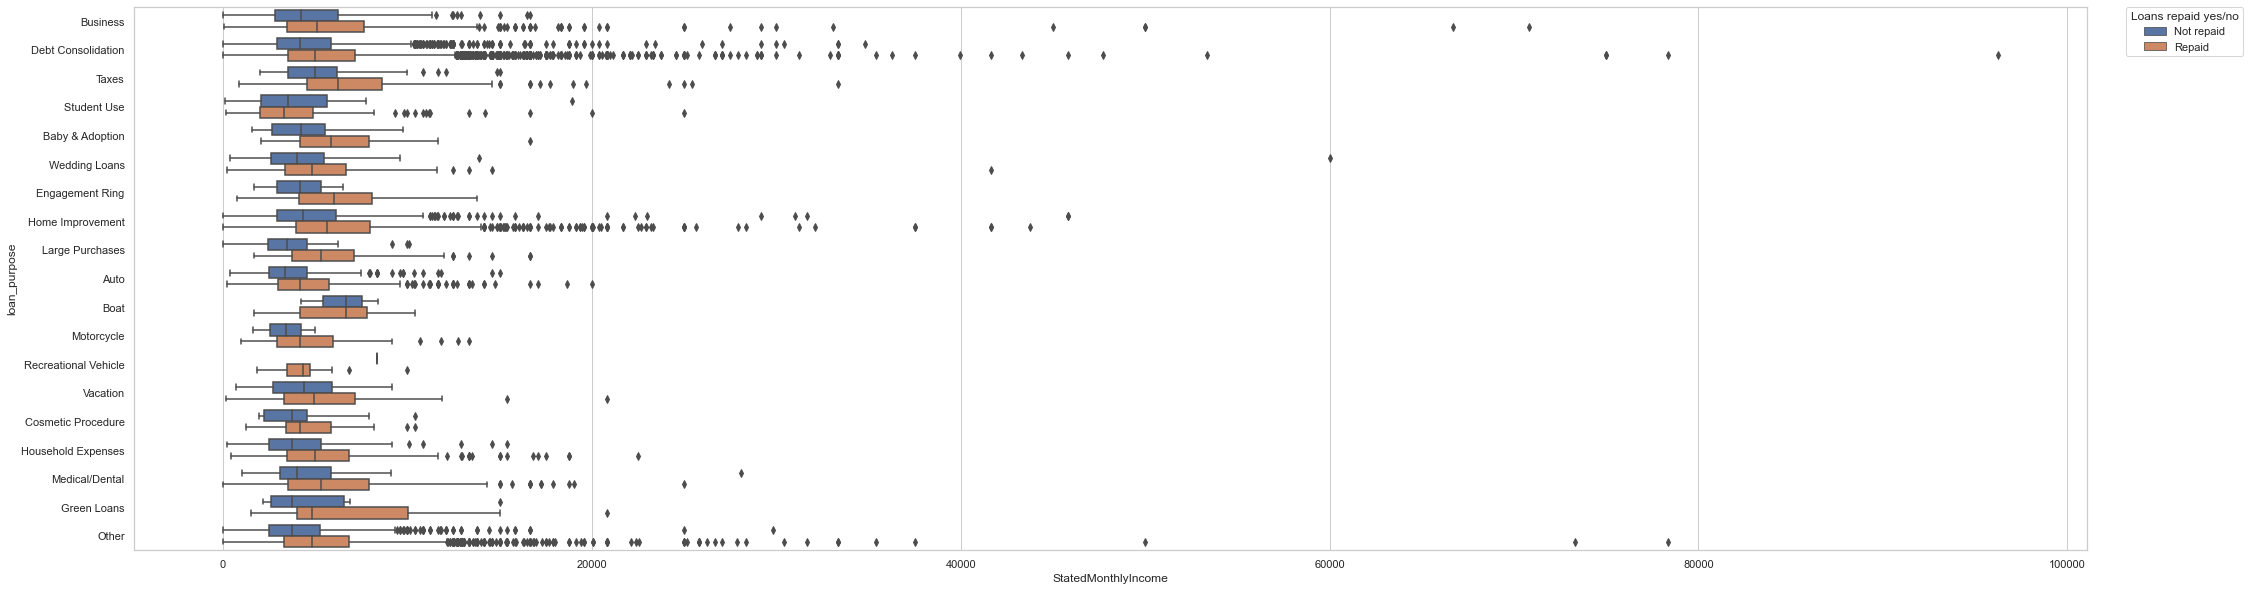

In [379]:
purpose_boxpl_long(filt_income, 'StatedMonthlyIncome')

Generally, the median stated monthly income of borrowers of unrepaid loans is lower for almost all categories of loan purpose. The exceptions are: loans for "Student Use", "Boat", and "Recreational Vehicle". The variable "Stated Monthly Income" has many high outliers. The three highest outliers are situated in the loan purpose category of "Debt Consolidation". Other loan purpose categories with high outliers in stated monthly income are business loans, wedding loans, "home improvement" - loans, and the category "Other".

#### 2) EmploymentStatusDuration x loan purpose x loan outcome
[back to table of contents](#contents)

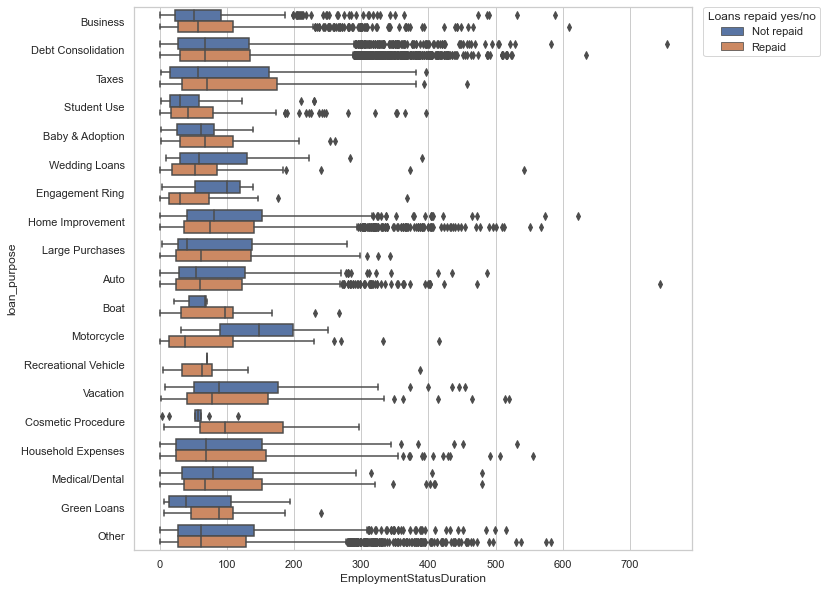

In [380]:
purpose_boxpl(completed_09_01, 'EmploymentStatusDuration')

The Employment Status Duration variable is characterized by positive outliers in almost every category of loan purpose. There is no clear trend regarding the medians (or the bulk of the scores) of repaid vs. unrepaid loans.

#### 3) Housing
[back to table of contents](#contents)

IsBorrowerHomeowner          loan_purpose   repaid_yn  \
1                 False              Business  Not repaid   
3                 False    Debt Consolidation  Not repaid   
5                 False                 Taxes  Not repaid   
7                 False           Student Use  Not repaid   
9                 False       Baby & Adoption  Not repaid   
11                False         Wedding Loans  Not repaid   
13                False       Engagement Ring  Not repaid   
15                False      Home Improvement  Not repaid   
17                False       Large Purchases  Not repaid   
19                False                  Auto  Not repaid   
21                False                  Boat  Not repaid   
23                False            Motorcycle  Not repaid   
26                False              Vacation  Not repaid   
28                False    Cosmetic Procedure  Not repaid   
30                False    Household Expenses  Not repaid   
32                False        Medical/Dental  Not repaid   
33                False           Green Loans  Not repaid   
36                False                 Other  Not repaid   
38                 True              Business  Not repaid   
40                 True    Debt Consolidation  Not repaid   
42                 True                 Taxes  Not repaid   
44                 True           Student Use  Not repaid   
46                 True       Baby & Adoption  Not repaid   
48                 True         Wedding Loans  Not repaid   
50                 True       Engagement Ring  Not repaid   
52                 True      Home Improvement  Not repaid   
54                 True       Large Purchases  Not repaid   
56                 True                  Auto  Not repaid   
58                 True                  Boat  Not repaid   
60                 True            Motorcycle  Not repaid   
62                 True  Recreational Vehicle  Not repaid   
64                 True              Vacation  Not repaid   
66                 True    Cosmetic Procedure  Not repaid   
68                 True    Household Expenses  Not repaid   
70                 True        Medical/Dental  Not repaid   
72                 True           Green Loans  Not repaid   
74                 True                 Other  Not repaid   

    proportion_not_repaid  percentage_nr  
1                   0.334         33.381  
3                   0.235         23.452  
5                   0.254         25.373  
7                   0.150         15.000  
9                   0.286         28.571  
11                  0.267         26.667  
13                  0.045          4.545  
15                  0.250         25.000  
17                  0.323         32.292  
19                  0.225         22.488  
21                  0.154         15.385  
23                  0.038          3.774  
26                  0.219         21.905  
28                  0.318         31.818  
30                  0.377         37.692  
32                  0.348         34.810  
33                  0.500         50.000  
36                  0.254         25.398  
38                  0.228         22.788  
40                  0.214         21.351  
42                  0.217         21.667  
44                  0.131         13.115  
46                  0.375         37.500  
48                  0.204         20.370  
50                  0.091          9.091  
52                  0.214         21.374  
54                  0.132         13.235  
56                  0.148         14.847  
58                  0.067          6.667  
60                  0.031          3.125  
62                  0.125         12.500  
64                  0.286         28.571  
66                  0.133         13.333  
68                  0.321         32.114  
70                  0.325         32.544  
72                  0.300         30.000  
74                  0.200         19.980

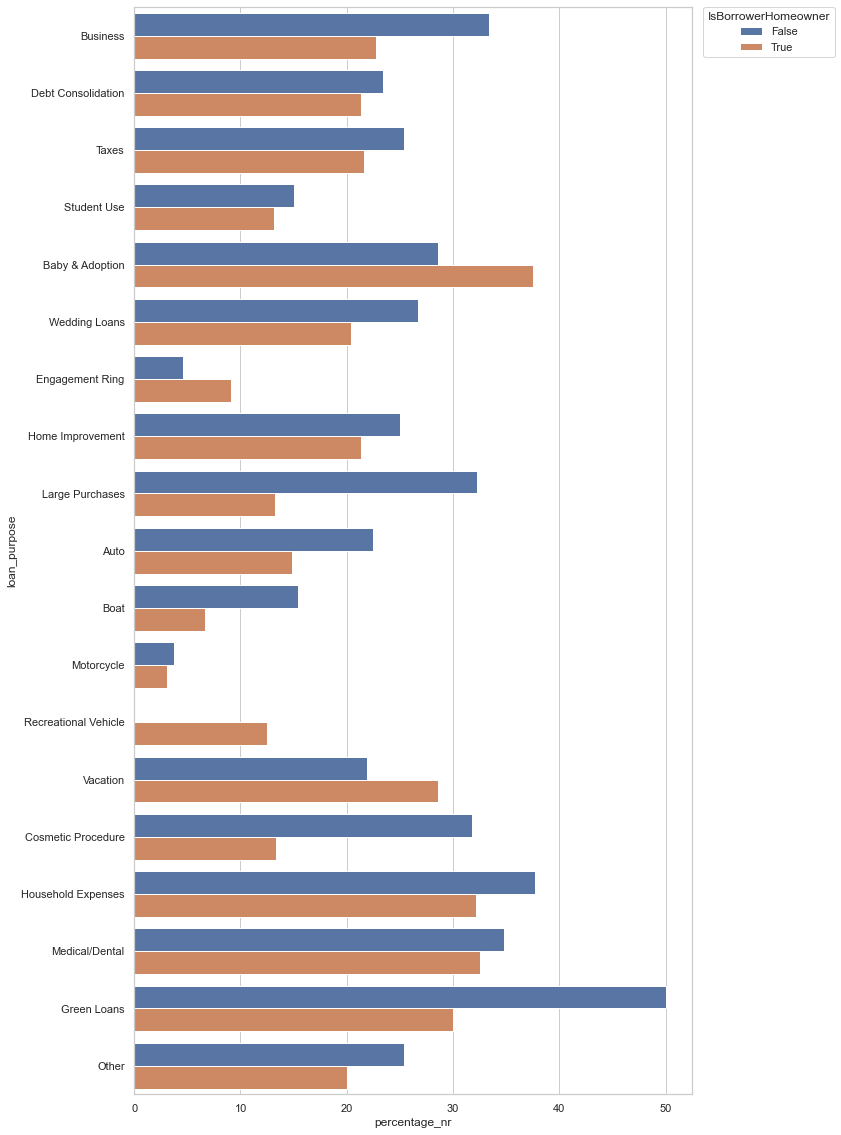

In [381]:
repaid_props_by2vars_x(completed_09_01, 'IsBorrowerHomeowner')

Generally, borrowers who default tend to not be homeowners. The opposite is true for two loan purpose categories: 'Baby and Adoption' and 'Vacation'.

#### 7.3.4 Borrower Credit History Variables, Borrower Indebtedness
<a id="xhistorydti3"></a>
[back to table of contents](#contents)

#### 1) CurrentCreditLines x loan purpose x loan outcome

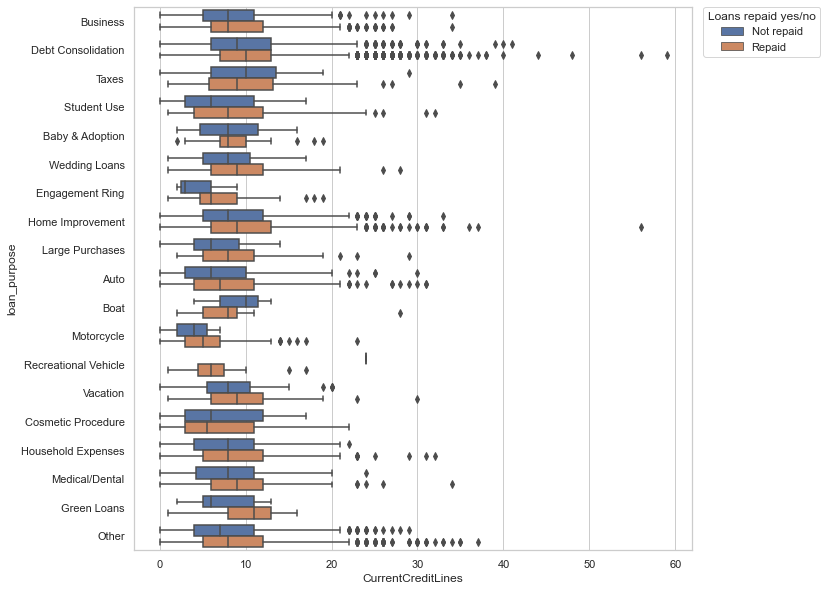

In [382]:
purpose_boxpl(completed_09_01, 'CurrentCreditLines')

# 'current_credits'  ordinal
[back to table of contents](#contents)

current_credits        loan_purpose   repaid_yn  proportion_not_repaid  \
0              None            Business  Not repaid                  0.750   
2              None  Debt Consolidation  Not repaid                  0.636   
4              None               Taxes  Not repaid                  1.000   
5              None         Student Use  Not repaid                  1.000   
6              None    Home Improvement  Not repaid                  0.667   
..              ...                 ...         ...                    ...   
220      26 or more  Debt Consolidation  Not repaid                  0.161   
222      26 or more               Taxes  Not repaid                  0.200   
226      26 or more    Home Improvement  Not repaid                  0.167   
229      26 or more                Auto  Not repaid                  0.125   
235      26 or more               Other  Not repaid                  0.105   

     percentage_nr  
0           75.000  
2           63.636  
4          100.000  
5          100.000  
6           66.667  
..             ...  
220         16.129  
222         20.000  
226         16.667  
229         12.500  
235         10.526  

[107 rows x 5 columns]

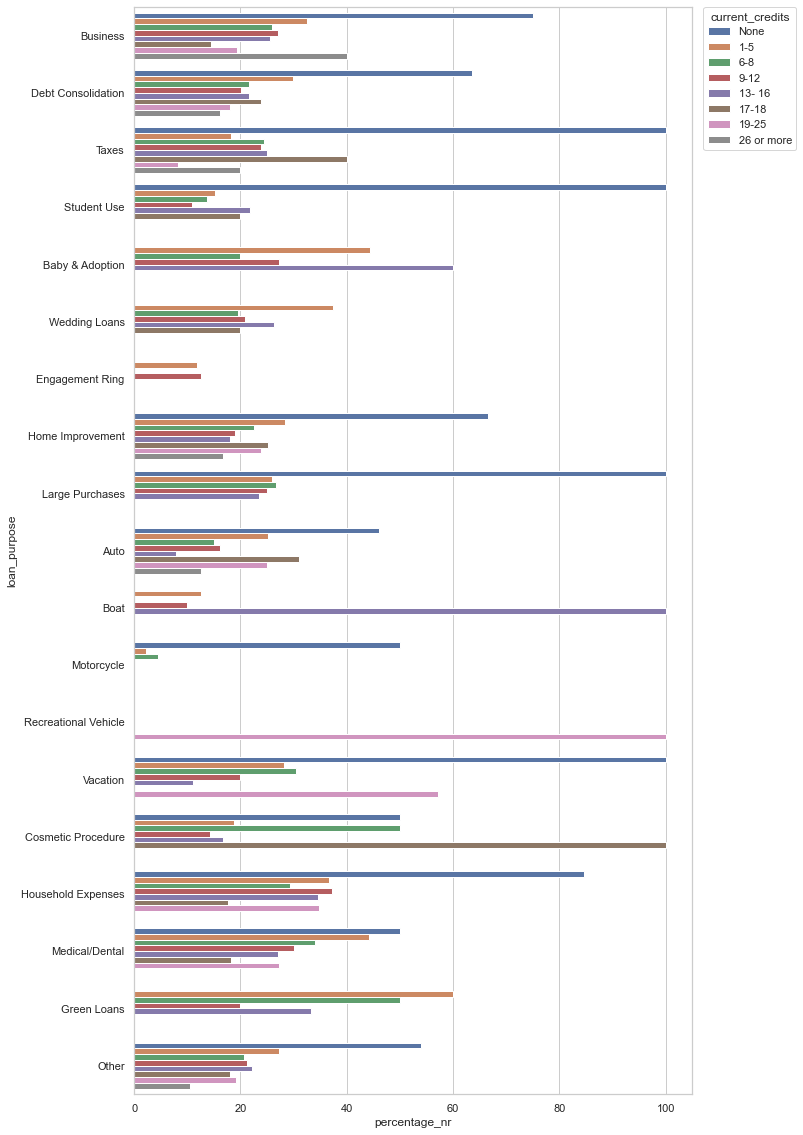

In [383]:
repaid_props_by2vars_x(completed_09_01, 'current_credits')

#### 2) OpenCreditLines x loan purpose x loan outcome
[back to table of contents](#contents)

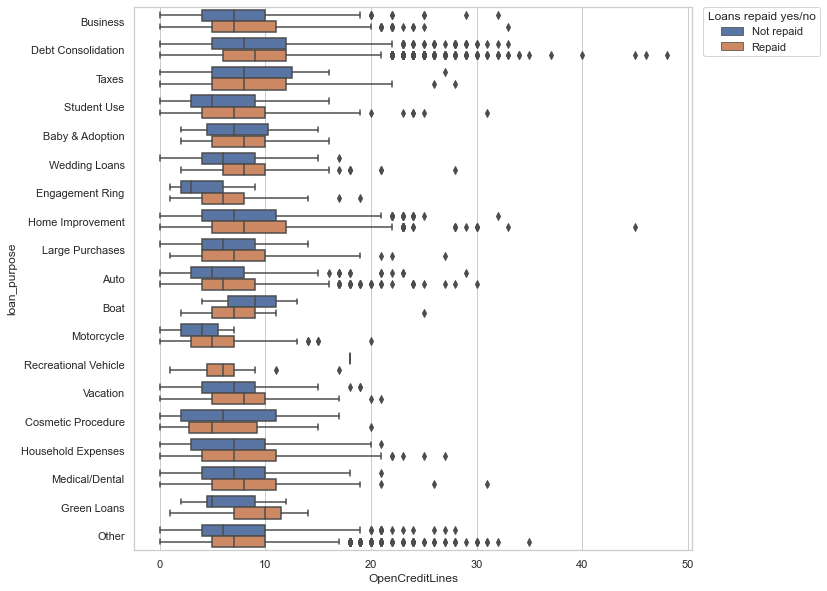

In [384]:
purpose_boxpl(completed_09_01, 'OpenCreditLines')

# 'open_credits' ordinal
[back to table of contents](#contents)

open_credits        loan_purpose   repaid_yn  proportion_not_repaid  \
0           None            Business  Not repaid                  0.778   
2           None  Debt Consolidation  Not repaid                  0.617   
4           None               Taxes  Not repaid                  0.500   
6           None         Student Use  Not repaid                  0.500   
8           None       Wedding Loans  Not repaid                  1.000   
..           ...                 ...         ...                    ...   
225   23 or more  Debt Consolidation  Not repaid                  0.168   
227   23 or more               Taxes  Not repaid                  0.333   
231   23 or more    Home Improvement  Not repaid                  0.306   
234   23 or more                Auto  Not repaid                  0.300   
239   23 or more               Other  Not repaid                  0.125   

     percentage_nr  
0           77.778  
2           61.702  
4           50.000  
6           50.000  
8          100.000  
..             ...  
225         16.848  
227         33.333  
231         30.556  
234         30.000  
239         12.500  

[109 rows x 5 columns]

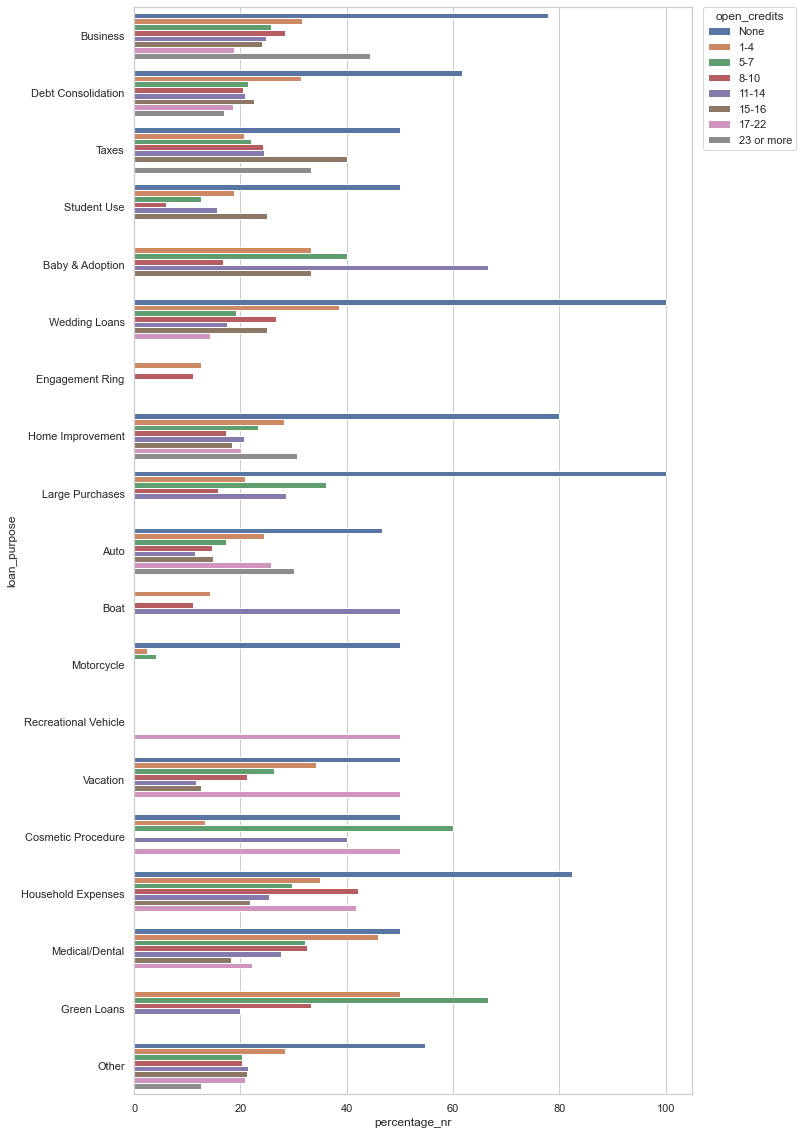

In [385]:
repaid_props_by2vars_x(completed_09_01, 'open_credits')

#### 3) TotalCreditLinespast7years x loan purpose x loan outcome
[back to table of contents](#contents)

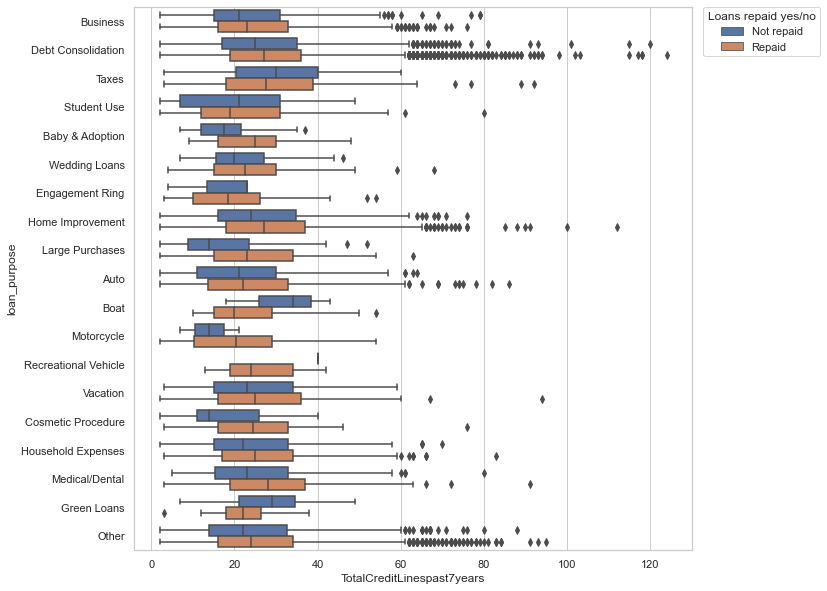

In [386]:
purpose_boxpl(completed_09_01, 'TotalCreditLinespast7years')

# 'total_credits_7y' ordinal:
[back to table of contents](#contents)

total_credits_7y        loan_purpose   repaid_yn  proportion_not_repaid  \
1               2-16            Business  Not repaid                  0.318   
3               2-16  Debt Consolidation  Not repaid                  0.261   
5               2-16               Taxes  Not repaid                  0.162   
7               2-16         Student Use  Not repaid                  0.165   
9               2-16     Baby & Adoption  Not repaid                  0.417   
..               ...                 ...         ...                    ...   
200       67 or more  Debt Consolidation  Not repaid                  0.177   
205       67 or more    Home Improvement  Not repaid                  0.185   
209       67 or more  Household Expenses  Not repaid                  0.500   
212       67 or more      Medical/Dental  Not repaid                  0.333   
214       67 or more               Other  Not repaid                  0.175   

     percentage_nr  
1           31.818  
3           26.100  
5           16.216  
7           16.456  
9           41.667  
..             ...  
200         17.683  
205         18.519  
209         50.000  
212         33.333  
214         17.544  

[96 rows x 5 columns]

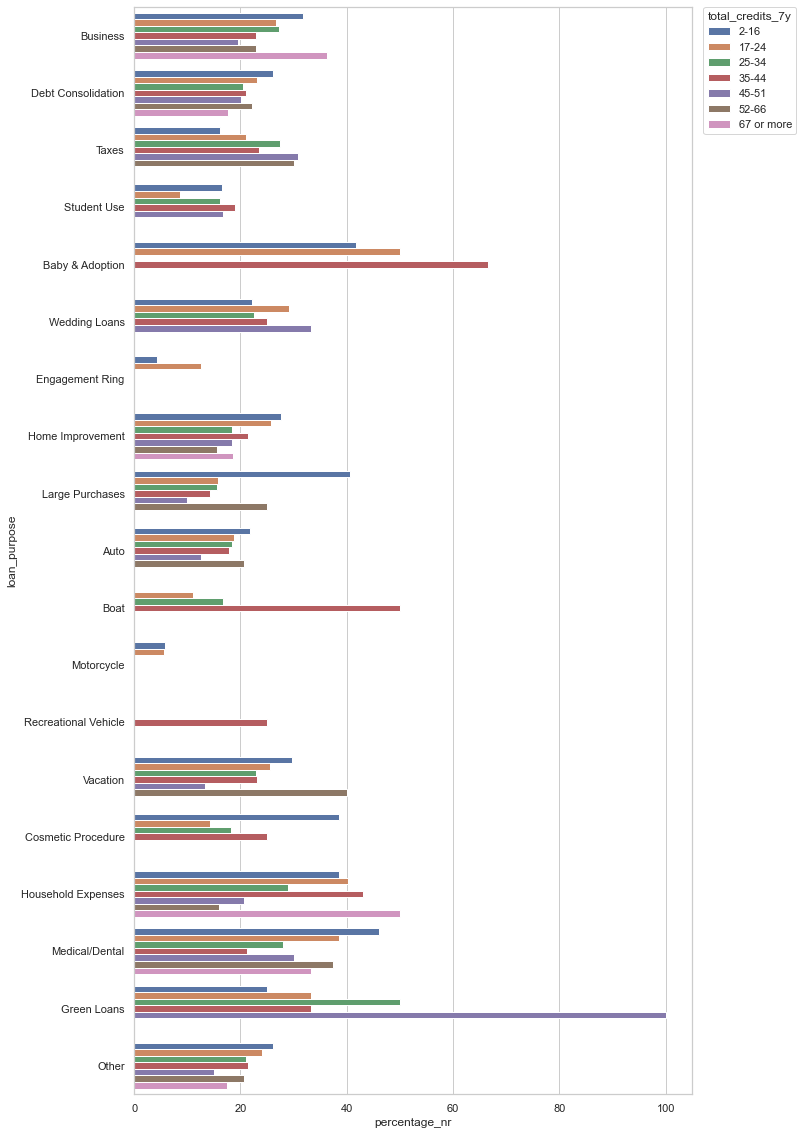

In [387]:
repaid_props_by2vars_x(completed_09_01, 'total_credits_7y')

#### 4) OpenRevolvingAccounts x loan purpose x loan outcome
[back to table of contents](#contents)

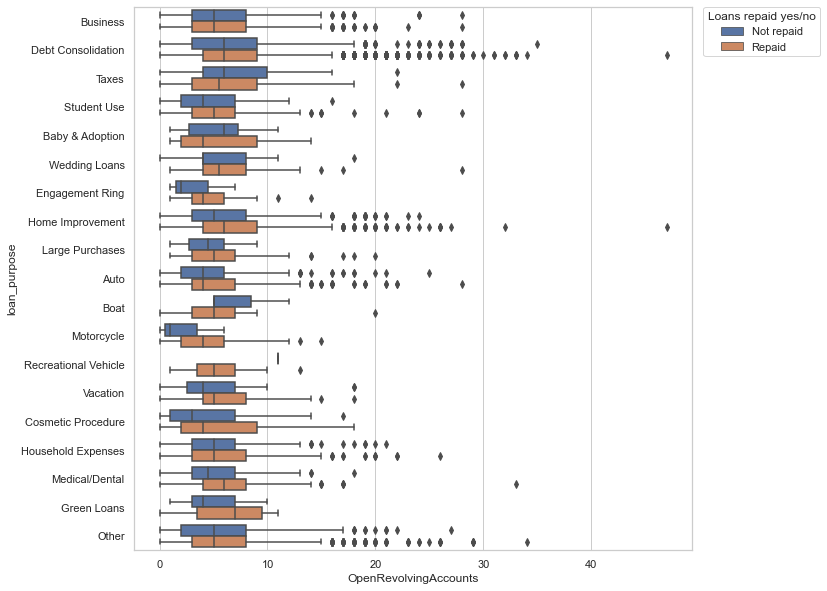

In [388]:
purpose_boxpl(completed_09_01, 'OpenRevolvingAccounts')

# 'open_accounts' ordinal:
[back to table of contents](#contents)

open_accounts        loan_purpose   repaid_yn  proportion_not_repaid  \
0            None            Business  Not repaid                  0.615   
2            None  Debt Consolidation  Not repaid                  0.531   
5            None               Taxes  Not repaid                  0.333   
7            None         Student Use  Not repaid                  0.333   
8            None       Wedding Loans  Not repaid                  1.000   
..            ...                 ...         ...                    ...   
225    20 or more               Taxes  Not repaid                  0.333   
229    20 or more    Home Improvement  Not repaid                  0.212   
232    20 or more                Auto  Not repaid                  0.375   
235    20 or more  Household Expenses  Not repaid                  0.250   
238    20 or more               Other  Not repaid                  0.143   

     percentage_nr  
0           61.538  
2           53.097  
5           33.333  
7           33.333  
8          100.000  
..             ...  
225         33.333  
229         21.212  
232         37.500  
235         25.000  
238         14.286  

[107 rows x 5 columns]

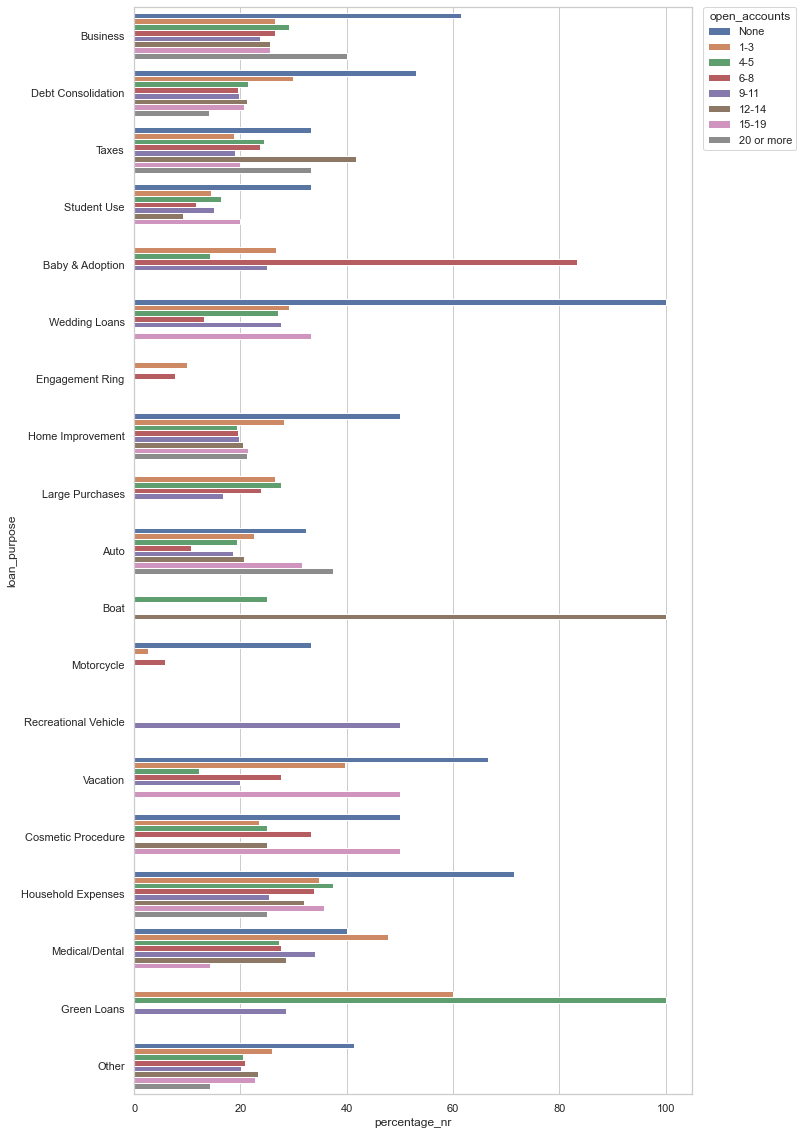

In [389]:
repaid_props_by2vars_x(completed_09_01, 'open_accounts')

#### 5) OpenRevolvingMonthlyPayment x loan purpose x loan outcome
[back to table of contents](#contents)

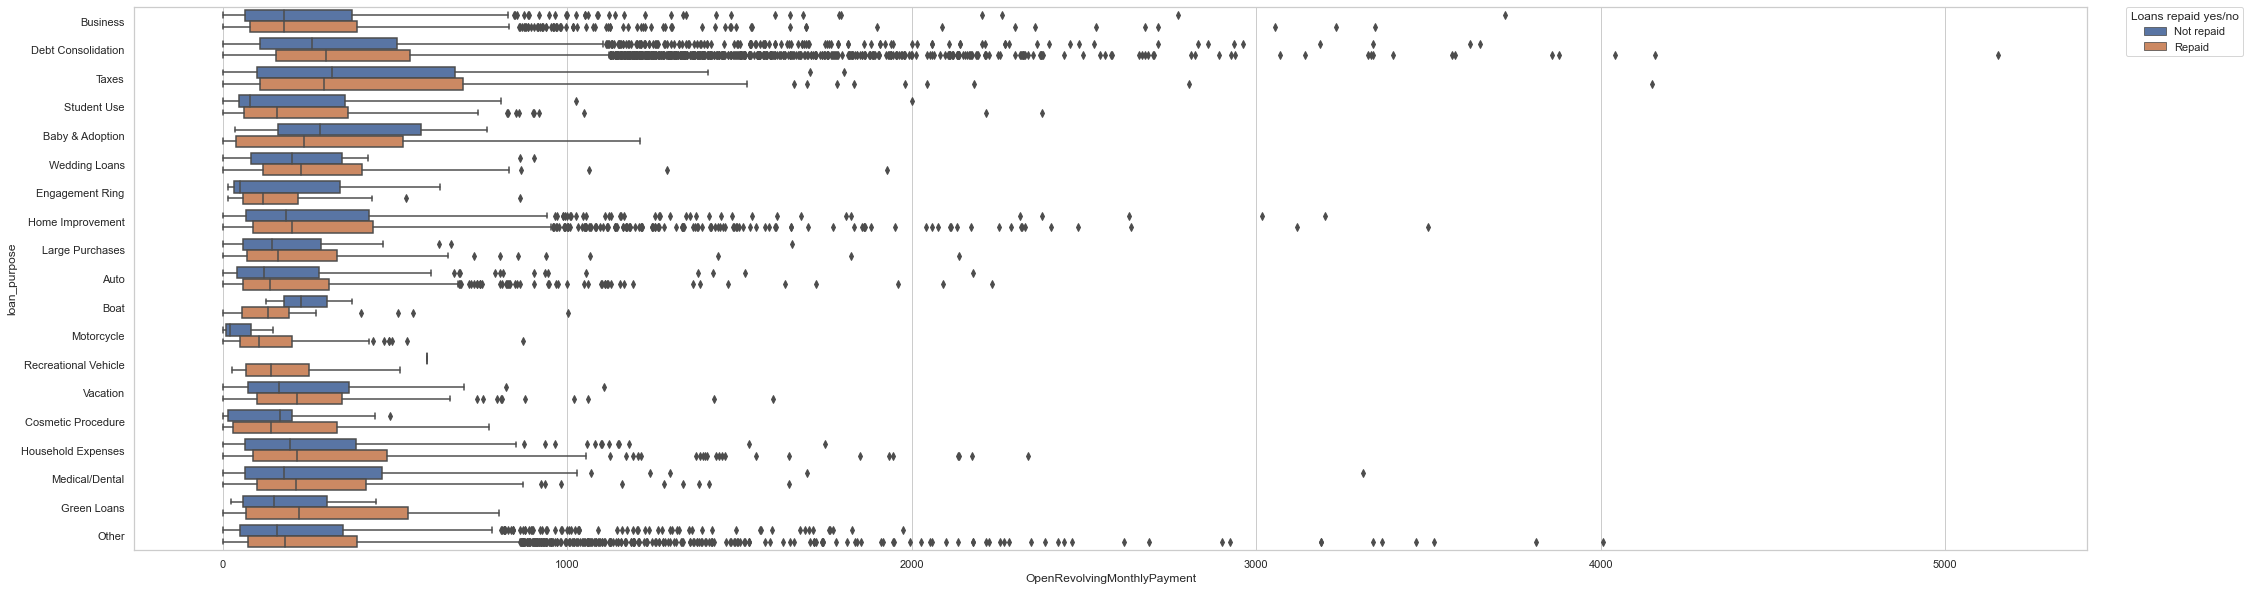

In [390]:
purpose_boxpl_long(completed_09_01, 'OpenRevolvingMonthlyPayment')

# 'rev_mo_payment' ordinal:
[back to table of contents](#contents)

rev_mo_payment        loan_purpose   repaid_yn  proportion_not_repaid  \
0                0            Business  Not repaid                  0.574   
2                0  Debt Consolidation  Not repaid                  0.536   
5                0               Taxes  Not repaid                  0.400   
7                0         Student Use  Not repaid                  0.250   
9                0       Wedding Loans  Not repaid                  0.667   
..             ...                 ...         ...                    ...   
228      1000-2999               Other  Not repaid                  0.203   
230   3000 or more            Business  Not repaid                  0.250   
232   3000 or more  Debt Consolidation  Not repaid                  0.235   
234   3000 or more    Home Improvement  Not repaid                  0.500   
236   3000 or more      Medical/Dental  Not repaid                  1.000   

     percentage_nr  
0           57.407  
2           53.555  
5           40.000  
7           25.000  
9           66.667  
..             ...  
228         20.312  
230         25.000  
232         23.529  
234         50.000  
236        100.000  

[109 rows x 5 columns]

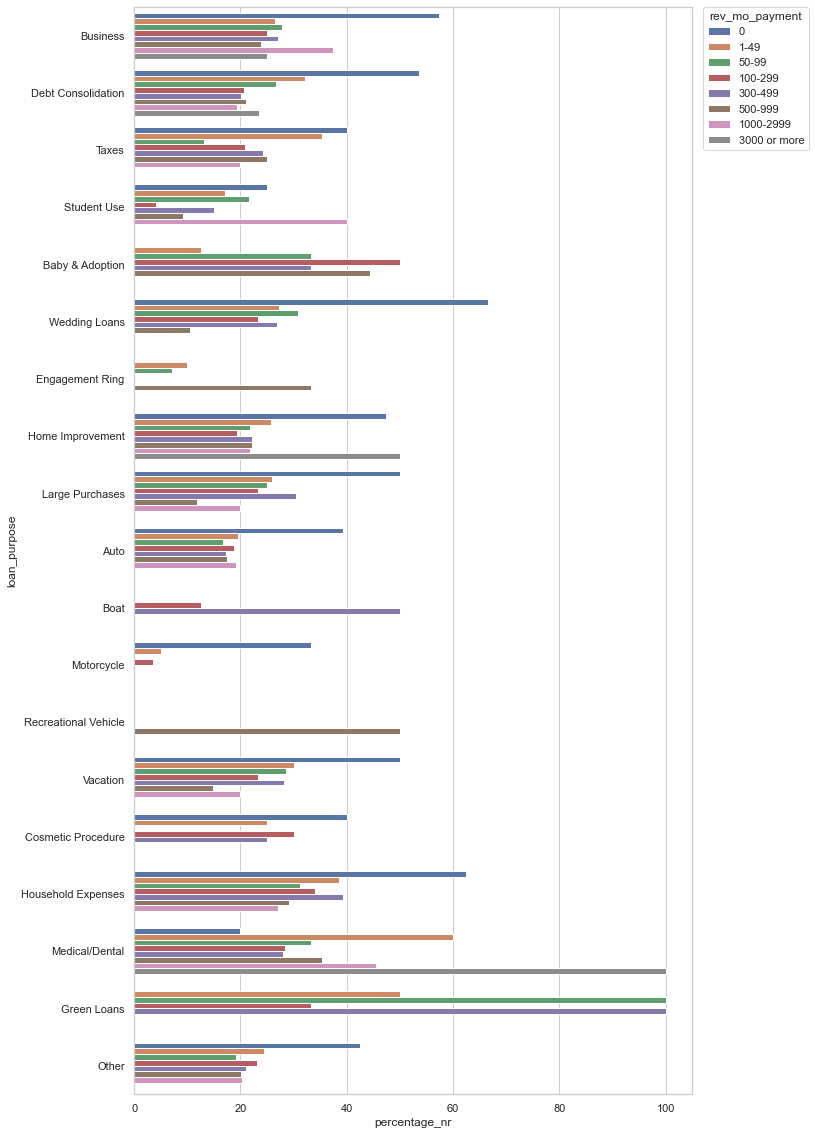

In [391]:
repaid_props_by2vars_x(completed_09_01, 'rev_mo_payment')

#### 6) CurrentDelinquencies x loan purpose x loan outcome
[back to table of contents](#contents)

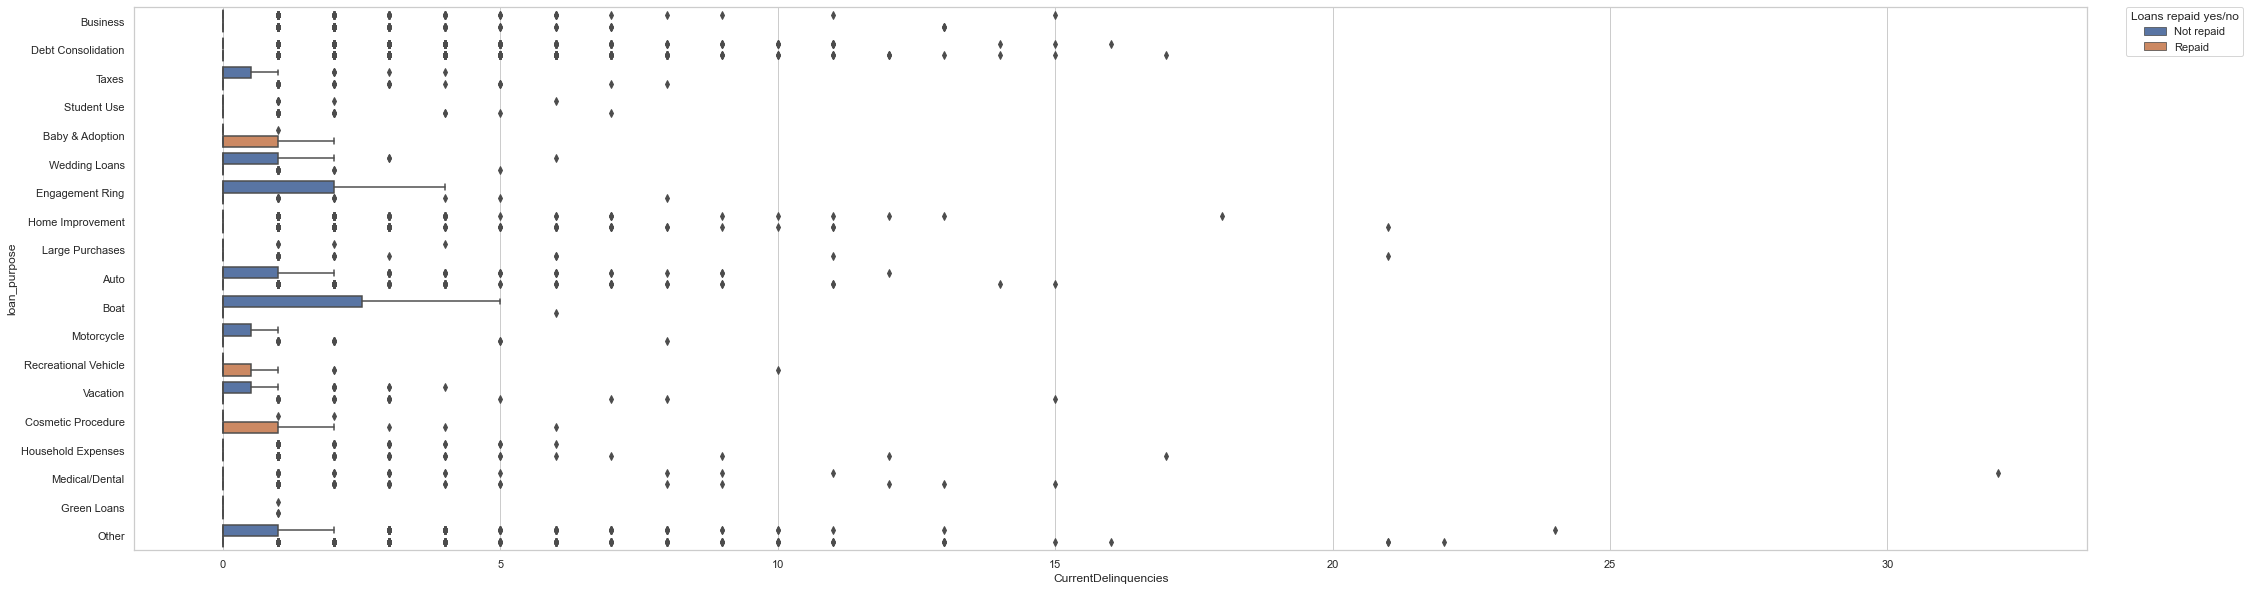

In [392]:
purpose_boxpl_long(completed_09_01, 'CurrentDelinquencies')

# current delinquencies as ordinal var:
[back to table of contents](#contents)

delinquencies        loan_purpose   repaid_yn  proportion_not_repaid  \
1            None            Business  Not repaid                  0.255   
3            None  Debt Consolidation  Not repaid                  0.206   
5            None               Taxes  Not repaid                  0.222   
7            None         Student Use  Not repaid                  0.138   
9            None     Baby & Adoption  Not repaid                  0.393   
..            ...                 ...         ...                    ...   
140     6 or more    Home Improvement  Not repaid                  0.379   
143     6 or more                Auto  Not repaid                  0.375   
150     6 or more  Household Expenses  Not repaid                  0.167   
152     6 or more      Medical/Dental  Not repaid                  0.444   
154     6 or more               Other  Not repaid                  0.358   

     percentage_nr  
1           25.450  
3           20.561  
5           22.222  
7           13.772  
9           39.286  
..             ...  
140         37.931  
143         37.500  
150         16.667  
152         44.444  
154         35.802  

[70 rows x 5 columns]

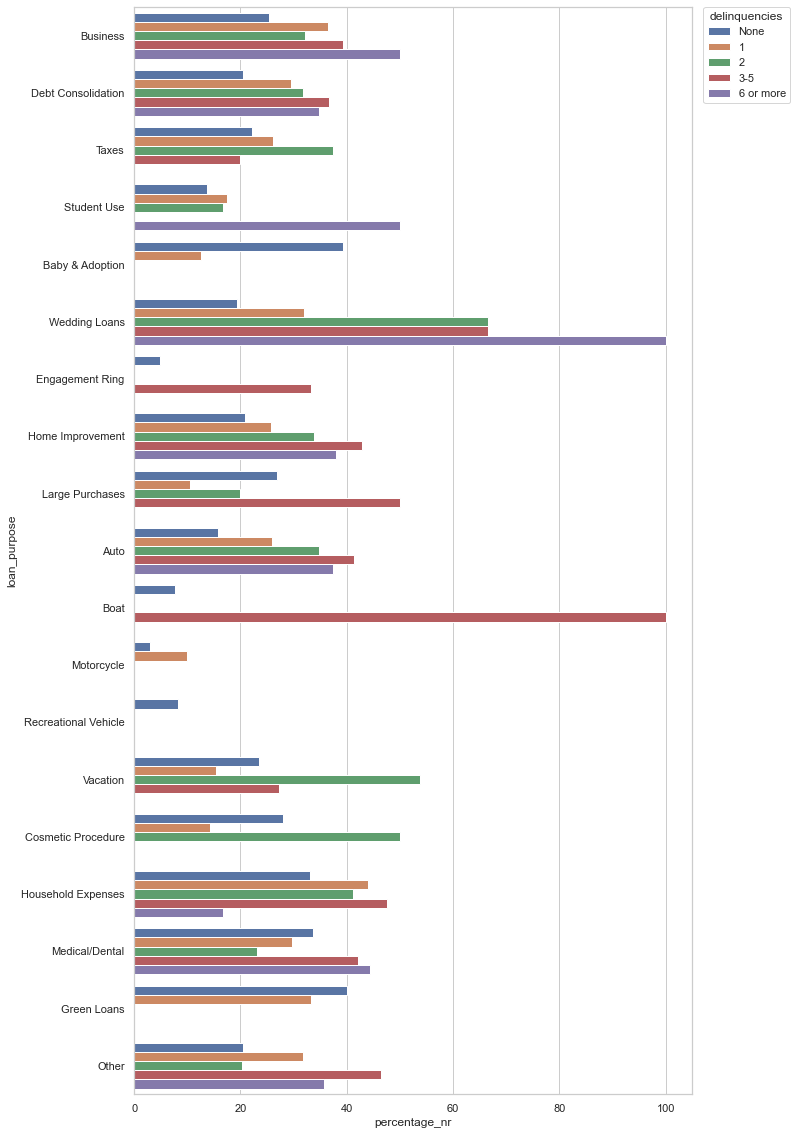

In [393]:
repaid_props_by2vars_x(completed_09_01, 'delinquencies')

The total number of delinquencies ?????????????????????? seems to be a strong predictor for unrepaid loans in the purpose categories of "business loans", 'debt consolidation loans", "wedding loans", "home improvement loans", "auto loans". Therefore, the loan purpose category interferes with the overall effect of the predictor "total number of delinquencies".

#### 7) DelinquenciesLast7Years x loan purpose x loan outcome
[back to table of contents](#contents)

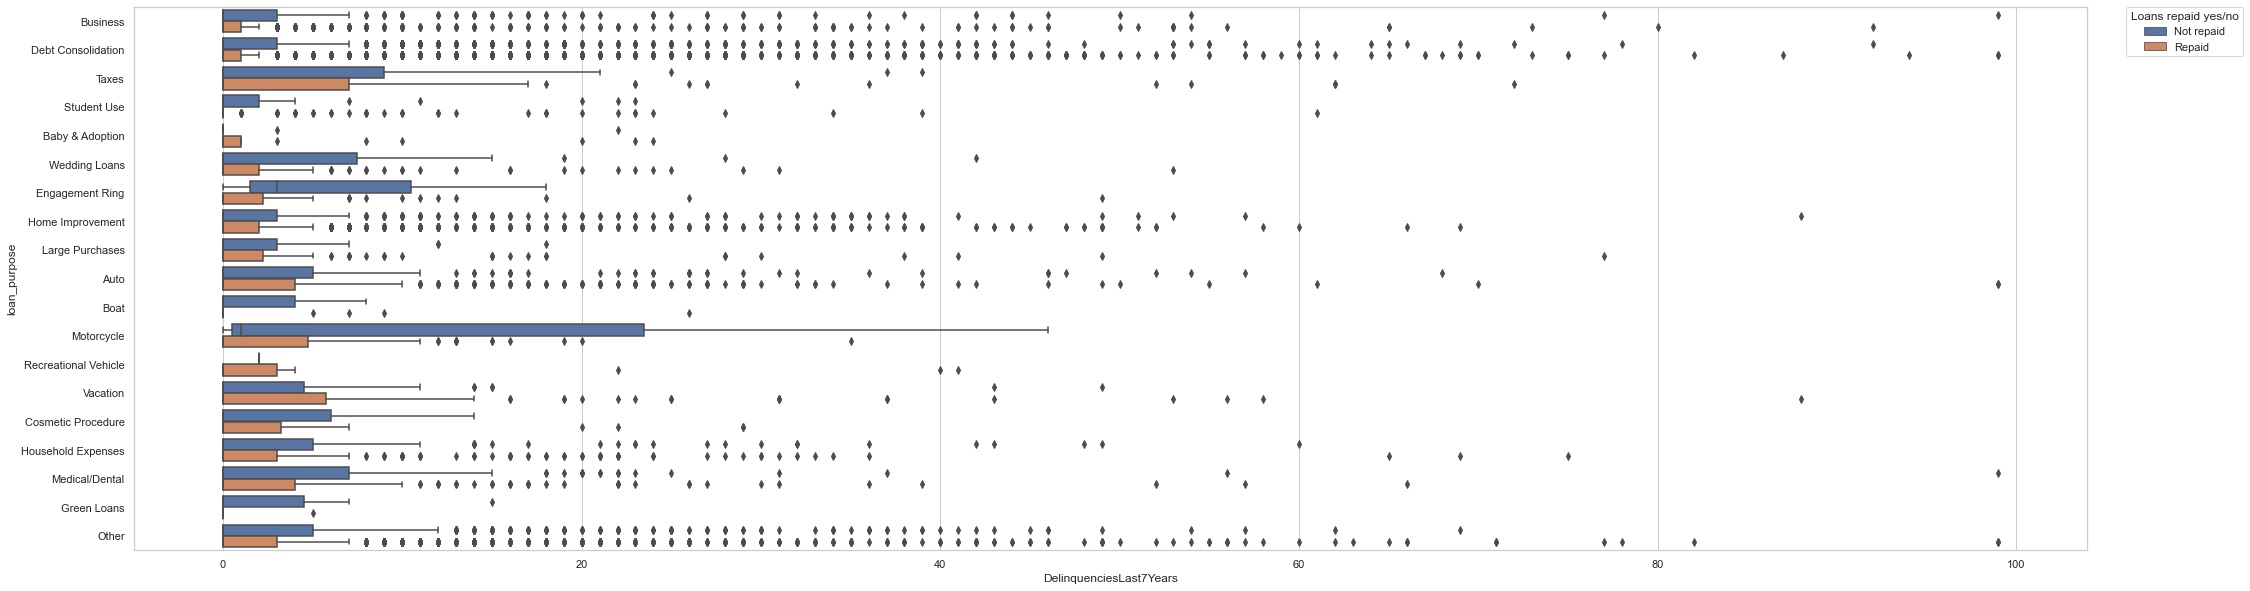

In [394]:
purpose_boxpl_long(completed_09_01, 'DelinquenciesLast7Years')

# delinquencies over 7 years as ordinal var:
[back to table of contents](#contents)

delinquencies_7y        loan_purpose   repaid_yn  proportion_not_repaid  \
1               None            Business  Not repaid                  0.261   
3               None  Debt Consolidation  Not repaid                  0.209   
5               None               Taxes  Not repaid                  0.219   
7               None         Student Use  Not repaid                  0.133   
9               None     Baby & Adoption  Not repaid                  0.370   
..               ...                 ...         ...                    ...   
148       43 or more          Motorcycle  Not repaid                  1.000   
150       43 or more            Vacation  Not repaid                  0.286   
151       43 or more  Household Expenses  Not repaid                  0.571   
154       43 or more      Medical/Dental  Not repaid                  0.400   
156       43 or more               Other  Not repaid                  0.196   

     percentage_nr  
1           26.110  
3           20.926  
5           21.930  
7           13.333  
9           37.037  
..             ...  
148        100.000  
150         28.571  
151         57.143  
154         40.000  
156         19.565  

[72 rows x 5 columns]

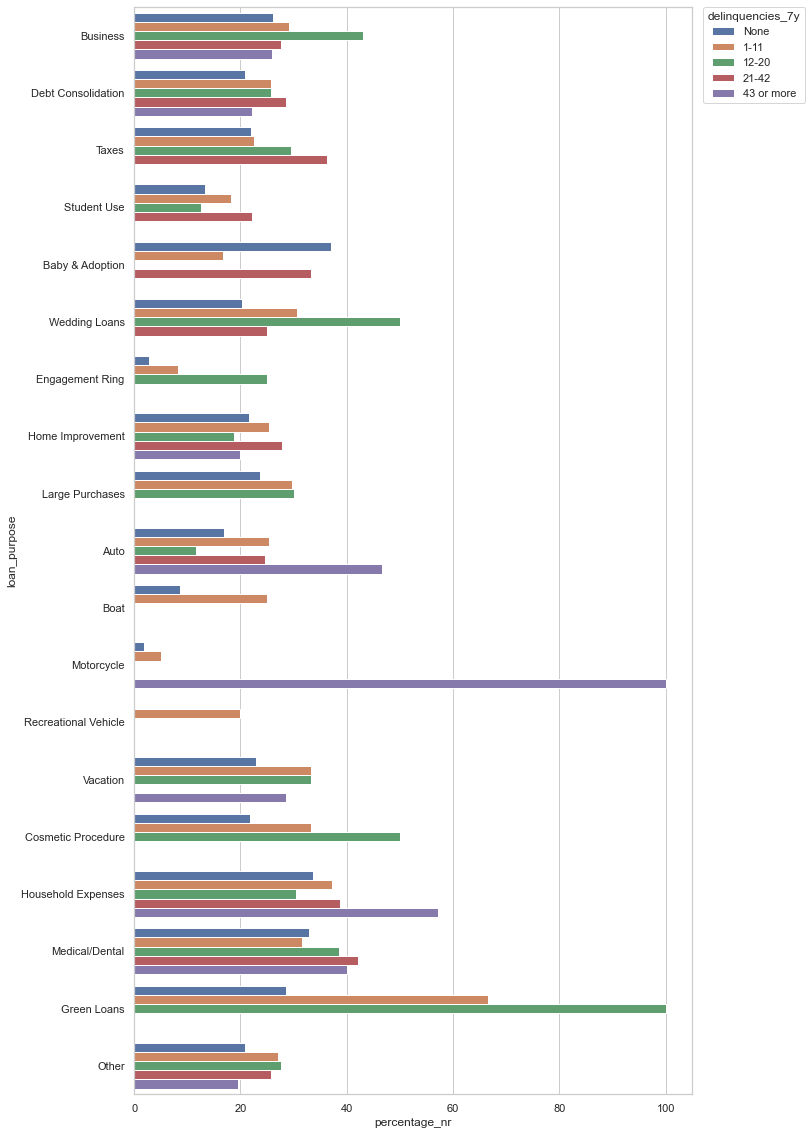

In [395]:
repaid_props_by2vars_x(completed_09_01, 'delinquencies_7y')

There is no obvious linear trend in the effect of the sum of delinquencies for the past 7 years on the percentage of unrepaid loans split by loan purpose categories.

#### 8) AmountDelinquent x loan purpose x loan outcome
[back to table of contents](#contents)

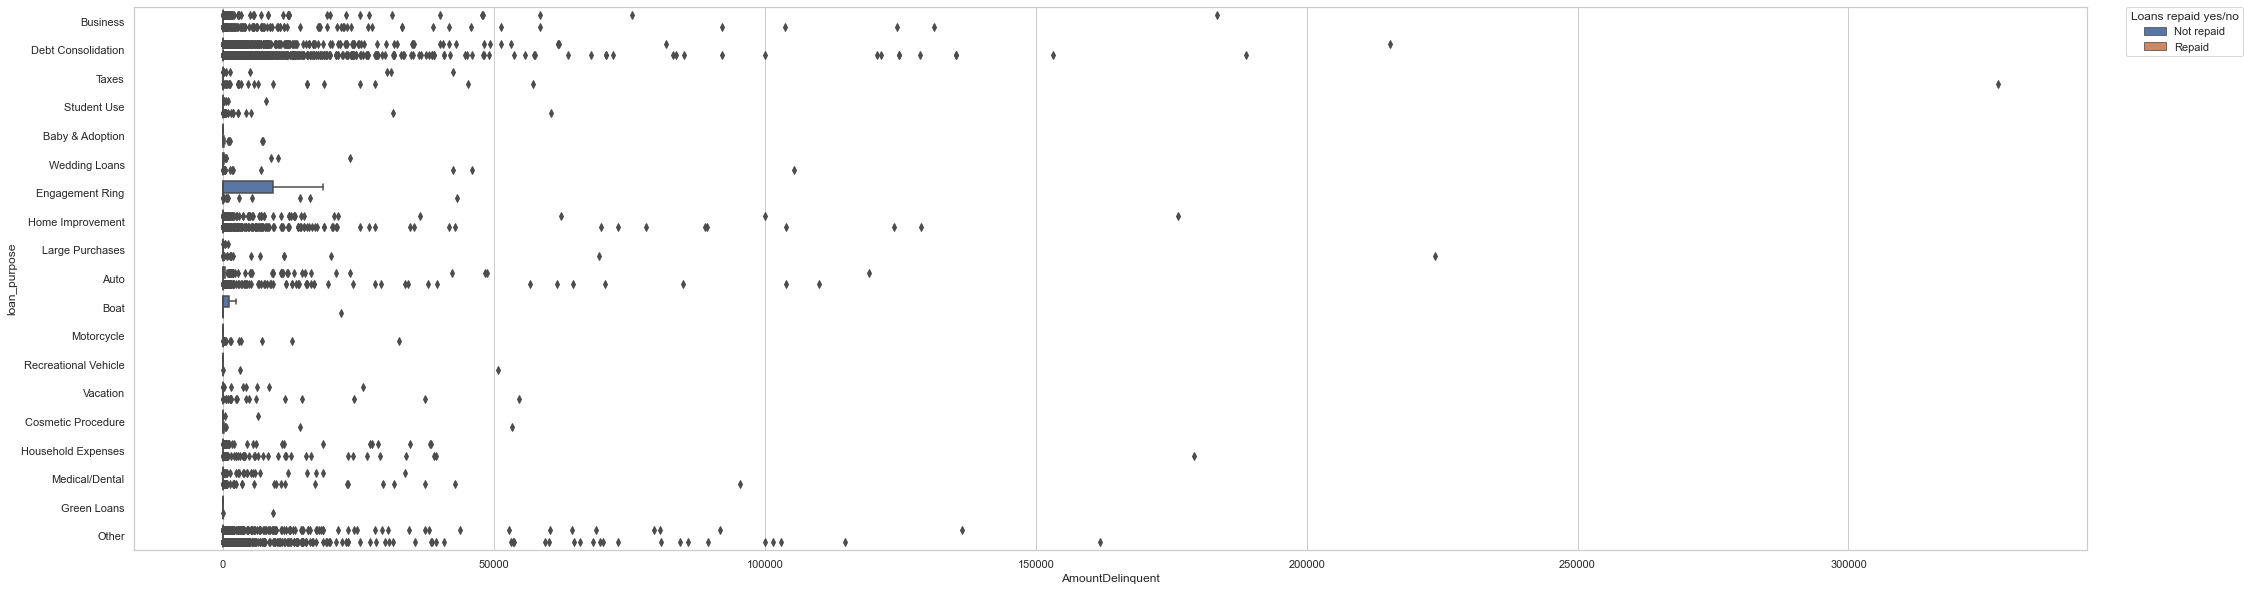

In [396]:
purpose_boxpl_long(completed_09_01, 'AmountDelinquent')

# AmountDelinquent as ordinal var:
[back to table of contents](#contents)

amount_delinquent        loan_purpose   repaid_yn  proportion_not_repaid  \
1                None            Business  Not repaid                  0.259   
3                None  Debt Consolidation  Not repaid                  0.207   
5                None               Taxes  Not repaid                  0.225   
7                None         Student Use  Not repaid                  0.137   
9                None     Baby & Adoption  Not repaid                  0.414   
..                ...                 ...         ...                    ...   
144    24,632 or more                Auto  Not repaid                  0.235   
148    24,632 or more            Vacation  Not repaid                  0.333   
150    24,632 or more  Household Expenses  Not repaid                  0.500   
153    24,632 or more      Medical/Dental  Not repaid                  0.167   
155    24,632 or more               Other  Not repaid                  0.340   

     percentage_nr  
1           25.867  
3           20.689  
5           22.517  
7           13.714  
9           41.379  
..             ...  
144         23.529  
148         33.333  
150         50.000  
153         16.667  
155         34.043  

[68 rows x 5 columns]

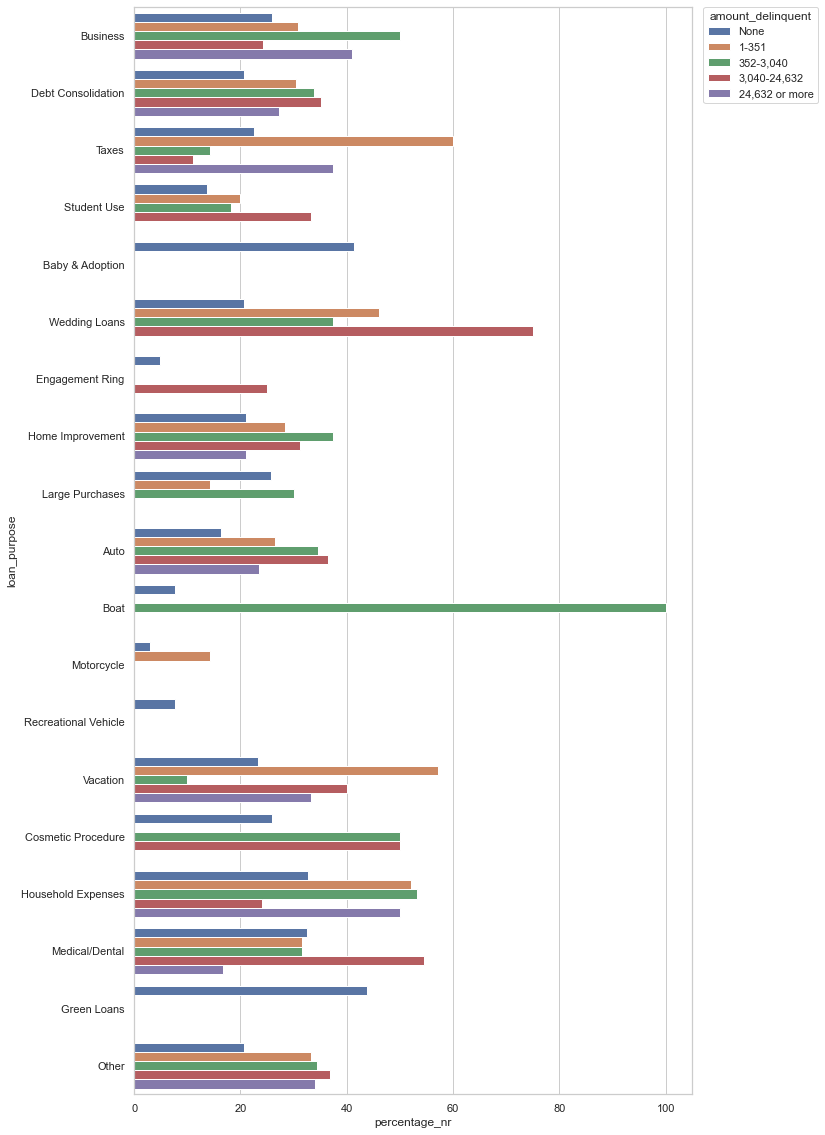

In [397]:
repaid_props_by2vars_x(completed_09_01, 'amount_delinquent')

There is no obvious linear trend in the effect of "amount delinquent" on percentage of unrepaid loans split by loan purpose categories.

#### 9) InquiriesLast6Months x loan purpose x loan outcome
[back to table of contents](#contents)

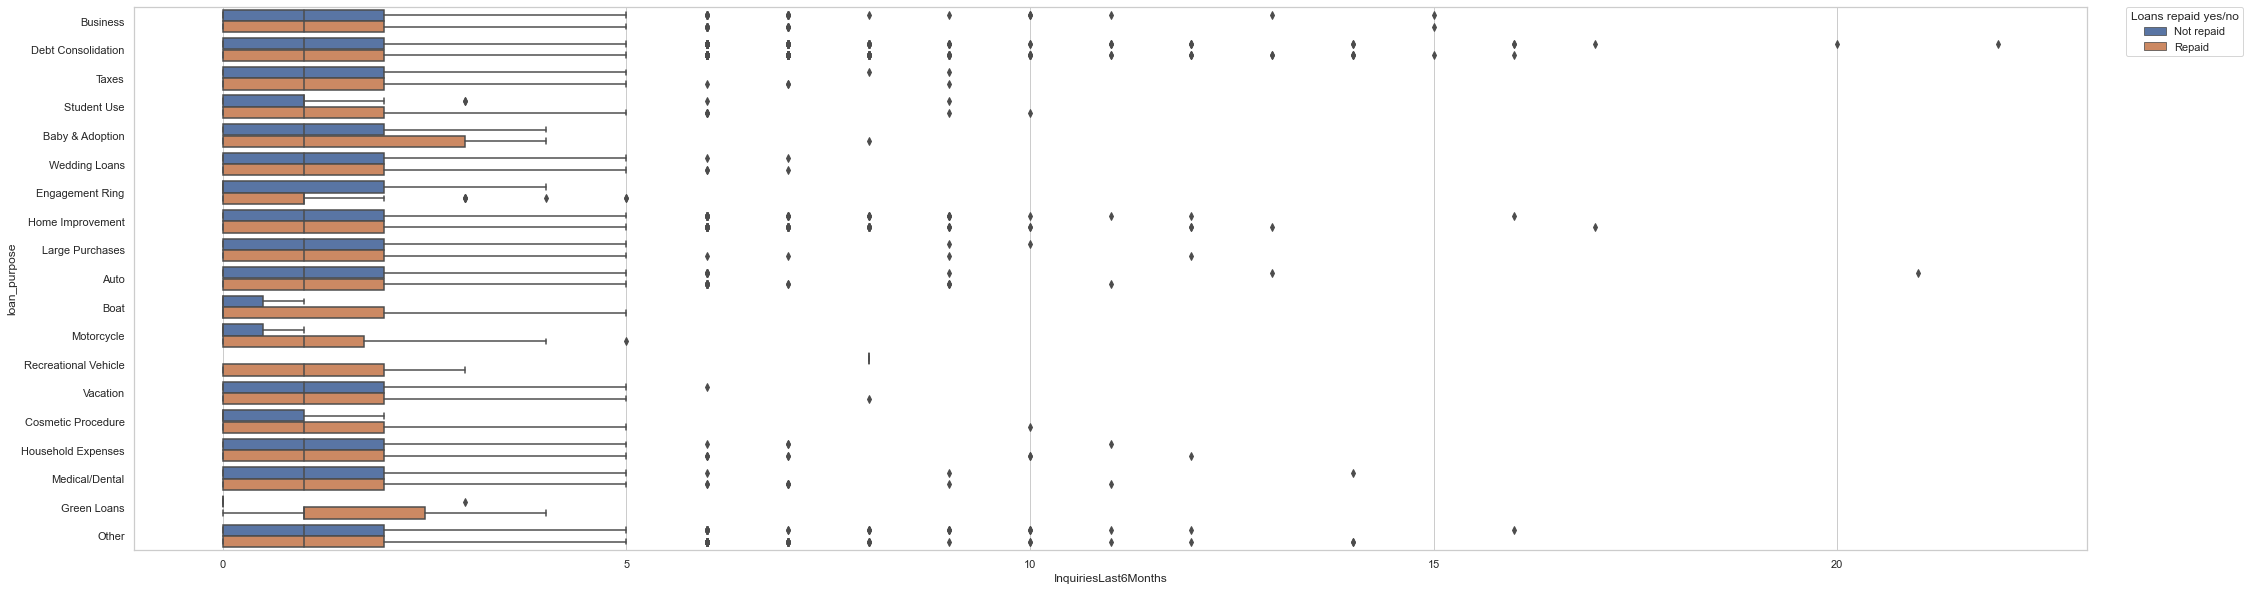

In [398]:
purpose_boxpl_long(completed_09_01, 'InquiriesLast6Months')

# InquiriesLast6Months as ordinal var:
[back to table of contents](#contents)

inquiries_6m          loan_purpose   repaid_yn  proportion_not_repaid  \
1           None              Business  Not repaid                  0.258   
3           None    Debt Consolidation  Not repaid                  0.186   
5           None                 Taxes  Not repaid                  0.174   
7           None           Student Use  Not repaid                  0.140   
9           None       Baby & Adoption  Not repaid                  0.357   
..           ...                   ...         ...                    ...   
186    7 or more                  Auto  Not repaid                  0.333   
187    7 or more  Recreational Vehicle  Not repaid                  1.000   
191    7 or more    Household Expenses  Not repaid                  0.375   
193    7 or more        Medical/Dental  Not repaid                  0.250   
195    7 or more                 Other  Not repaid                  0.348   

     percentage_nr  
1           25.826  
3           18.569  
5           17.442  
7           13.953  
9           35.714  
..             ...  
186         33.333  
187        100.000  
191         37.500  
193         25.000  
195         34.783  

[88 rows x 5 columns]

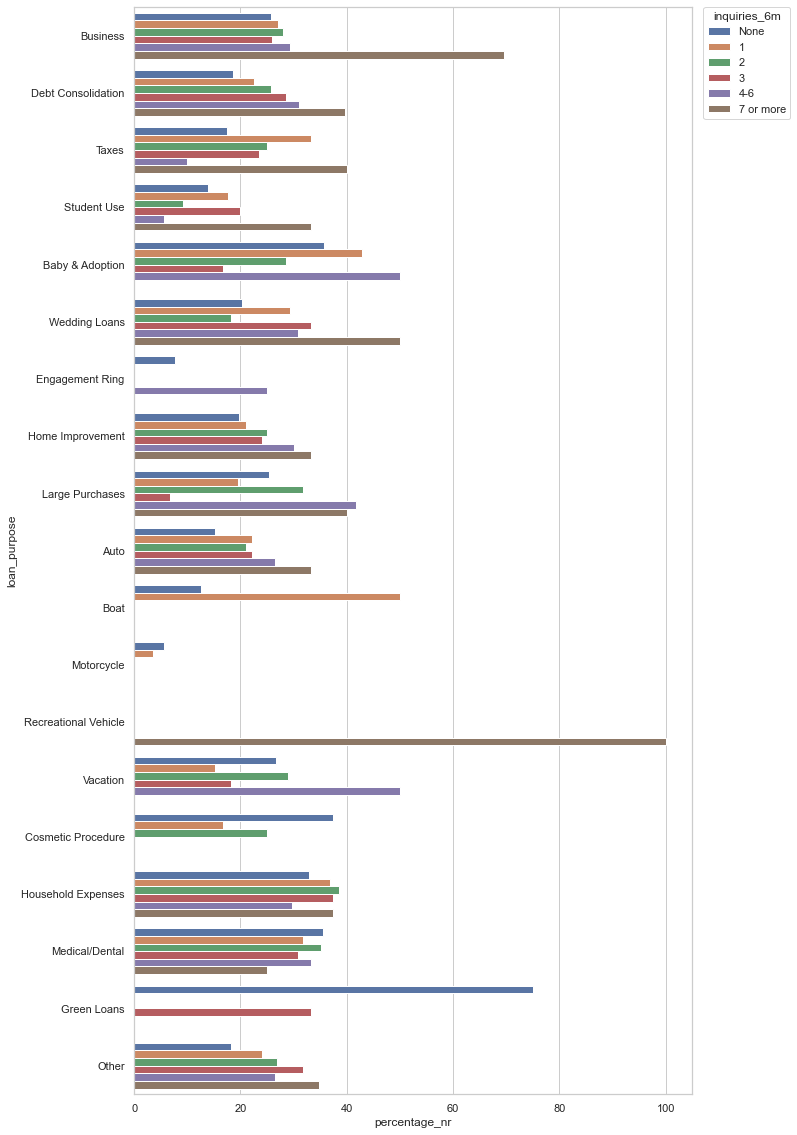

In [399]:
repaid_props_by2vars_x(completed_09_01, 'inquiries_6m')

The sum of inquiries by creditors for the past 6 months seems to be a good predictor of the percentage of unrepaid loans in the following loan purpose categories: debt consolidation, home improvement, auto, other. There is therefore an interaction between the sum of inquiries (6 months) and loan purpose as predictors of loan outcome.

#### 10) TotalInquiries x loan purpose x loan outcome
[back to table of contents](#contents)

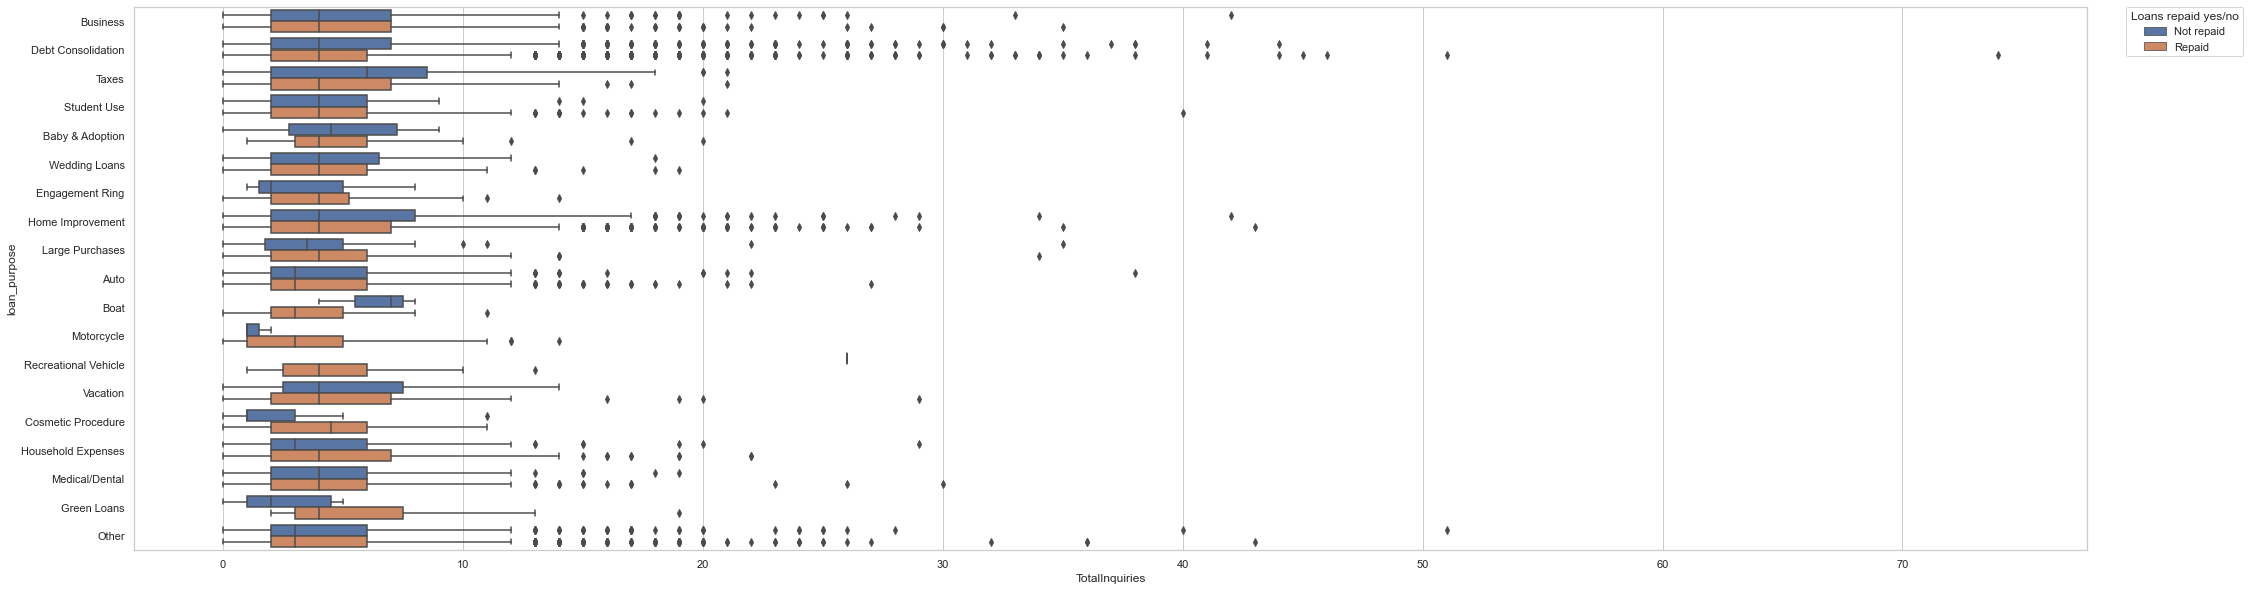

In [400]:
purpose_boxpl_long(completed_09_01, 'TotalInquiries')

# TotalInquiries as ordinal var:
[back to table of contents](#contents)

inquiries_total          loan_purpose   repaid_yn  proportion_not_repaid  \
1              None              Business  Not repaid                  0.358   
3              None    Debt Consolidation  Not repaid                  0.178   
5              None                 Taxes  Not repaid                  0.200   
7              None           Student Use  Not repaid                  0.071   
8              None       Baby & Adoption  Not repaid                  1.000   
..              ...                   ...         ...                    ...   
239      20 or more       Large Purchases  Not repaid                  0.667   
241      20 or more                  Auto  Not repaid                  0.625   
243      20 or more  Recreational Vehicle  Not repaid                  1.000   
245      20 or more    Household Expenses  Not repaid                  0.500   
249      20 or more                 Other  Not repaid                  0.324   

     percentage_nr  
1           35.849  
3           17.755  
5           20.000  
7            7.143  
8          100.000  
..             ...  
239         66.667  
241         62.500  
243        100.000  
245         50.000  
249         32.432  

[112 rows x 5 columns]

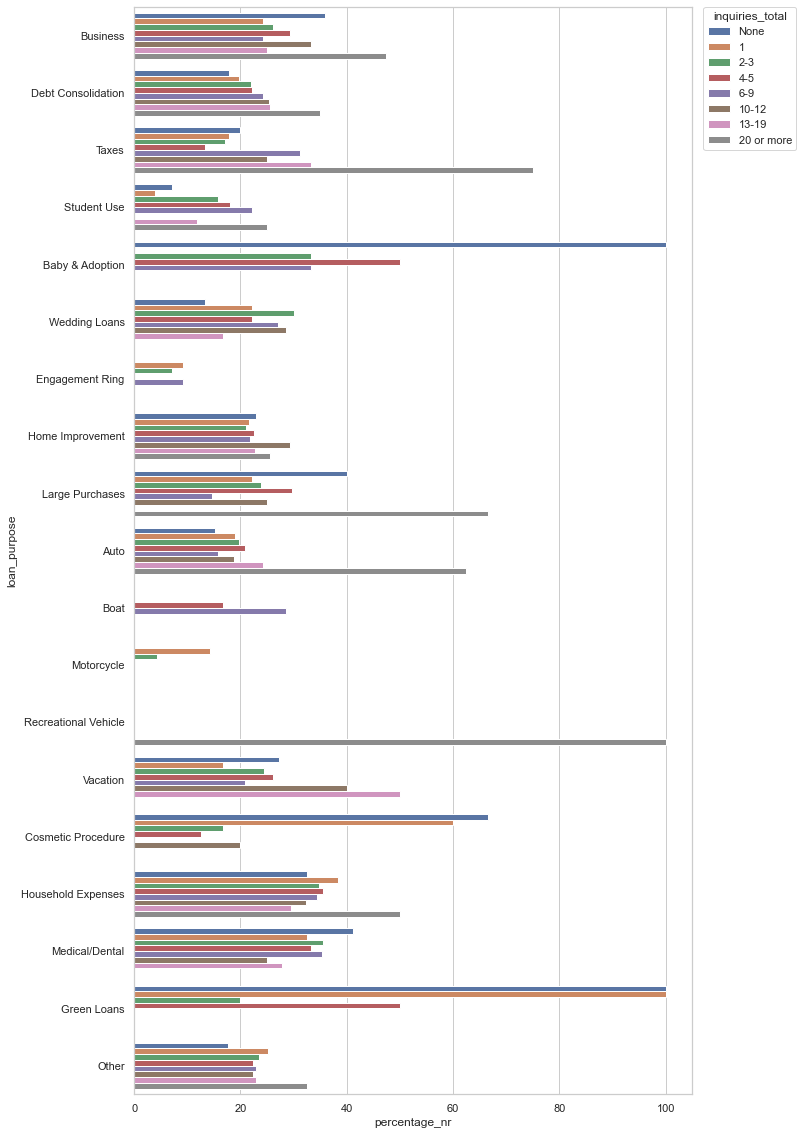

In [401]:
repaid_props_by2vars_x(completed_09_01, 'inquiries_total')

There is no obvious linear trend in the effect of the sum of inquiries by creditors (total) on the percentage of unrepaid loans split by loan purpose categories.

#### 11) PublicRecordsLast12Months x loan purpose x loan outcome
[back to table of contents](#contents)

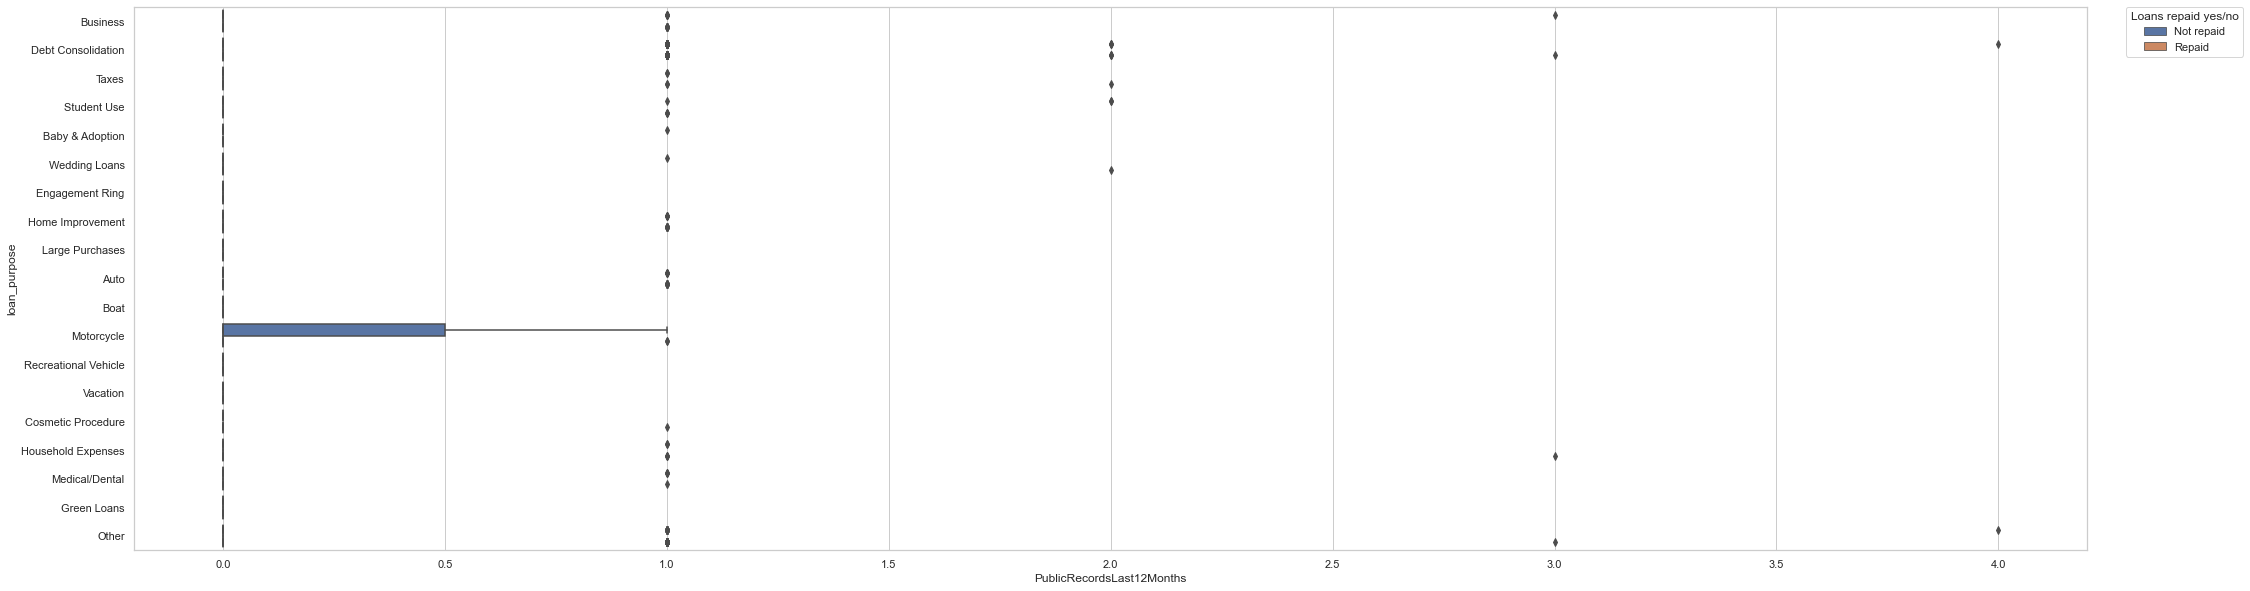

In [402]:
purpose_boxpl_long(completed_09_01, 'PublicRecordsLast12Months')

# PublicRecordsLast12Months as ordinal var:
[back to table of contents](#contents)

pub_rec_12m          loan_purpose   repaid_yn  proportion_not_repaid  \
1         None              Business  Not repaid                  0.273   
3         None    Debt Consolidation  Not repaid                  0.221   
5         None                 Taxes  Not repaid                  0.225   
7         None           Student Use  Not repaid                  0.133   
9         None       Baby & Adoption  Not repaid                  0.306   
11        None         Wedding Loans  Not repaid                  0.242   
13        None       Engagement Ring  Not repaid                  0.055   
15        None      Home Improvement  Not repaid                  0.224   
17        None       Large Purchases  Not repaid                  0.244   
19        None                  Auto  Not repaid                  0.191   
21        None                  Boat  Not repaid                  0.107   
23        None            Motorcycle  Not repaid                  0.024   
25        None  Recreational Vehicle  Not repaid                  0.062   
27        None              Vacation  Not repaid                  0.249   
29        None    Cosmetic Procedure  Not repaid                  0.250   
31        None    Household Expenses  Not repaid                  0.350   
33        None        Medical/Dental  Not repaid                  0.331   
35        None           Green Loans  Not repaid                  0.389   
37        None                 Other  Not repaid                  0.228   
39   1 or more              Business  Not repaid                  0.375   
41   1 or more    Debt Consolidation  Not repaid                  0.432   
43   1 or more                 Taxes  Not repaid                  0.400   
44   1 or more           Student Use  Not repaid                  0.500   
46   1 or more       Baby & Adoption  Not repaid                  1.000   
47   1 or more         Wedding Loans  Not repaid                  0.500   
50   1 or more      Home Improvement  Not repaid                  0.286   
52   1 or more                  Auto  Not repaid                  0.286   
54   1 or more            Motorcycle  Not repaid                  0.333   
57   1 or more    Household Expenses  Not repaid                  0.333   
58   1 or more        Medical/Dental  Not repaid                  0.750   
61   1 or more                 Other  Not repaid                  0.266   

    percentage_nr  
1          27.313  
3          22.143  
5          22.527  
7          13.333  
9          30.556  
11         24.204  
13          5.455  
15         22.406  
17         24.390  
19         19.141  
21         10.714  
23          2.439  
25          6.250  
27         24.868  
29         25.000  
31         35.000  
33         33.127  
35         38.889  
37         22.810  
39         37.500  
41         43.158  
43         40.000  
44         50.000  
46        100.000  
47         50.000  
50         28.571  
52         28.571  
54         33.333  
57         33.333  
58         75.000  
61         26.562

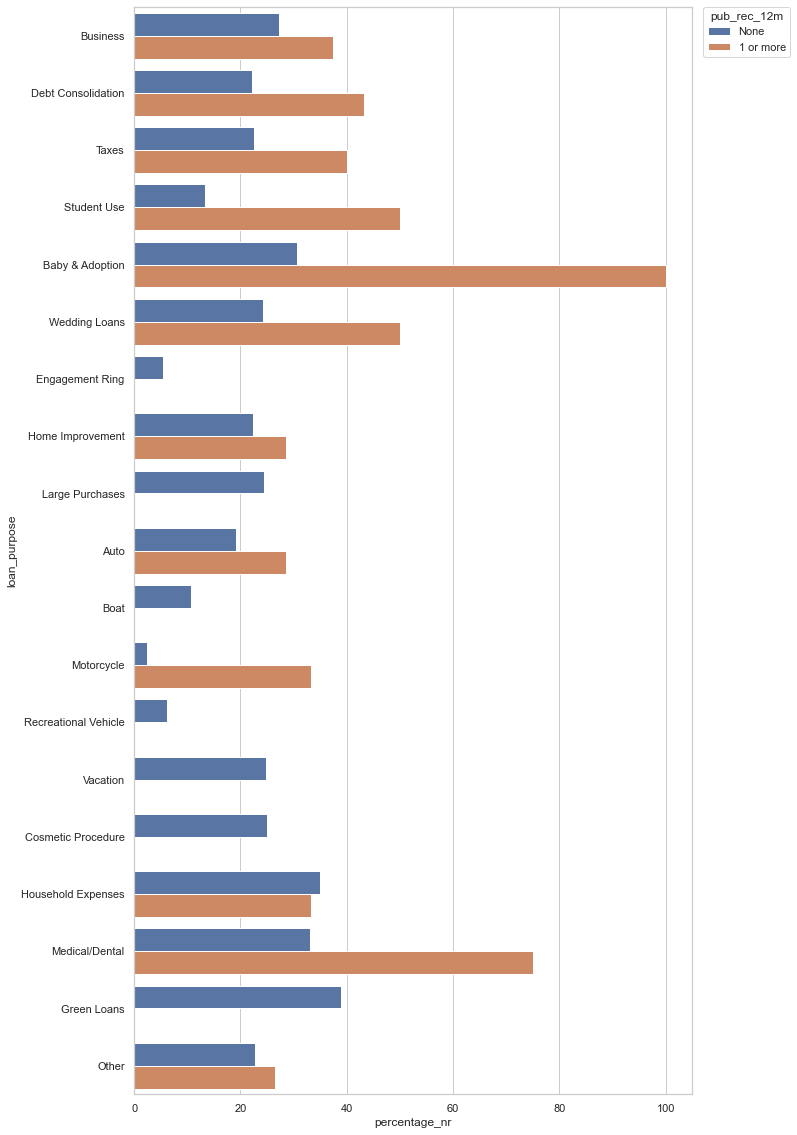

In [403]:
repaid_props_by2vars_x(completed_09_01, 'pub_rec_12m')

It seems that the sum of derogatory public records for the last 12 months would only be a useful predictor in certain subsets of the data, such as the loan purpose categories of business and debt consolidation.

#### 12) PublicRecordsLast10Years x loan purpose x loan outcome
[back to table of contents](#contents)

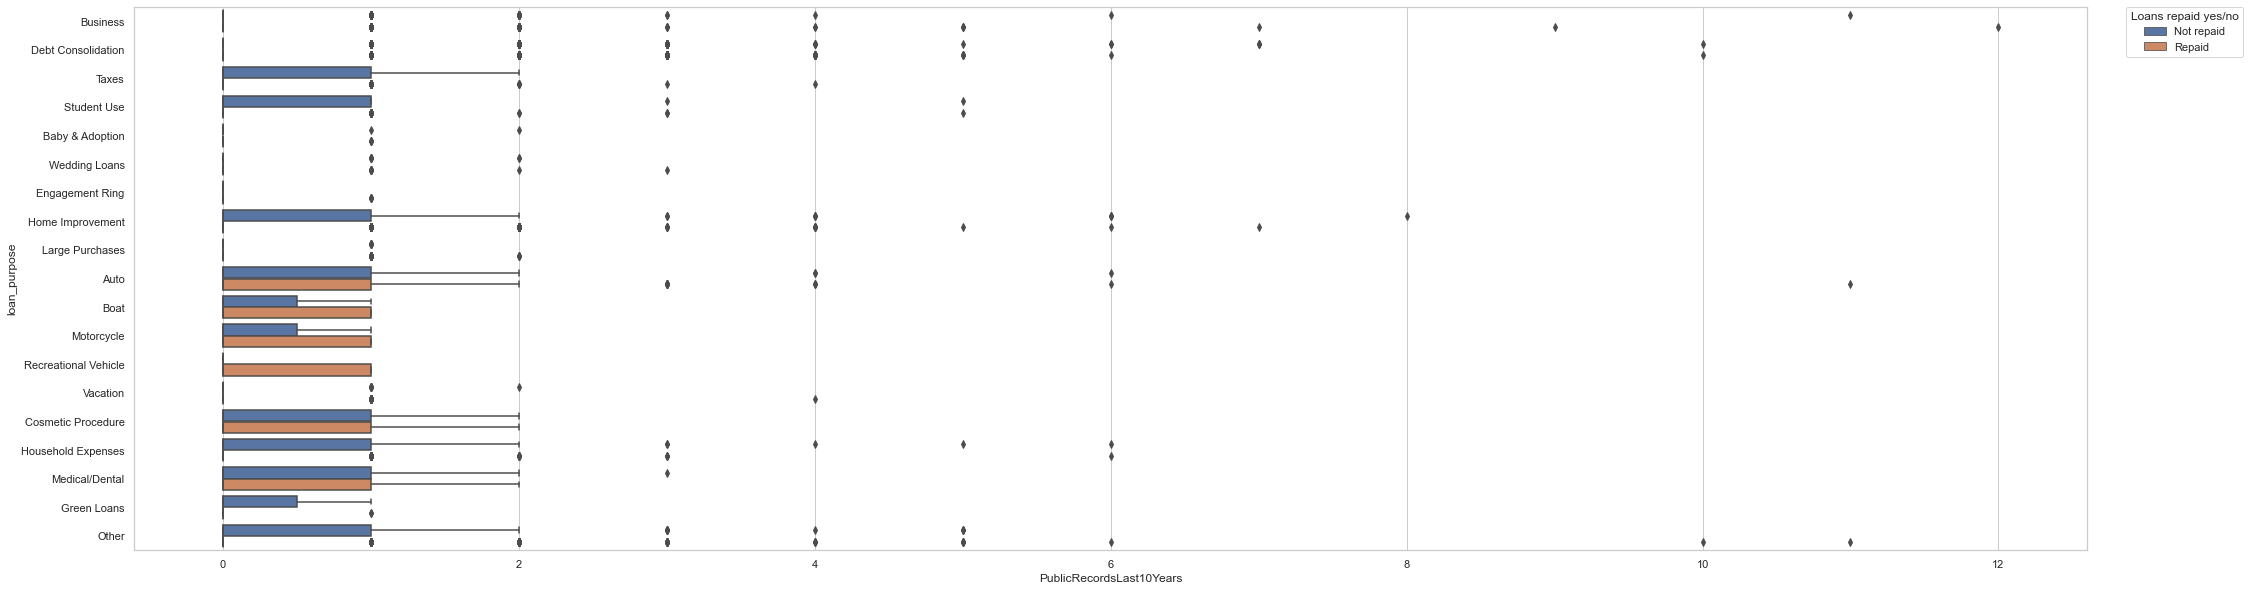

In [404]:
purpose_boxpl_long(completed_09_01, 'PublicRecordsLast10Years')

# PublicRecordsLast10Years as ordinal var:
[back to table of contents](#contents)

pub_rec_10y          loan_purpose   repaid_yn  proportion_not_repaid  \
1         None              Business  Not repaid                  0.259   
3         None    Debt Consolidation  Not repaid                  0.212   
5         None                 Taxes  Not repaid                  0.199   
7         None           Student Use  Not repaid                  0.120   
9         None       Baby & Adoption  Not repaid                  0.323   
11        None         Wedding Loans  Not repaid                  0.216   
13        None       Engagement Ring  Not repaid                  0.061   
15        None      Home Improvement  Not repaid                  0.219   
17        None       Large Purchases  Not repaid                  0.256   
19        None                  Auto  Not repaid                  0.184   
21        None                  Boat  Not repaid                  0.111   
23        None            Motorcycle  Not repaid                  0.037   
25        None  Recreational Vehicle  Not repaid                  0.100   
27        None              Vacation  Not repaid                  0.253   
29        None    Cosmetic Procedure  Not repaid                  0.200   
31        None    Household Expenses  Not repaid                  0.332   
33        None        Medical/Dental  Not repaid                  0.326   
35        None           Green Loans  Not repaid                  0.357   
37        None                 Other  Not repaid                  0.215   
39           1              Business  Not repaid                  0.333   
41           1    Debt Consolidation  Not repaid                  0.258   
43           1                 Taxes  Not repaid                  0.314   
45           1           Student Use  Not repaid                  0.250   
47           1       Baby & Adoption  Not repaid                  0.200   
49           1         Wedding Loans  Not repaid                  0.438   
52           1      Home Improvement  Not repaid                  0.230   
54           1       Large Purchases  Not repaid                  0.226   
56           1                  Auto  Not repaid                  0.206   
58           1                  Boat  Not repaid                  0.100   
60           1            Motorcycle  Not repaid                  0.032   
63           1              Vacation  Not repaid                  0.216   
65           1    Cosmetic Procedure  Not repaid                  0.333   
67           1    Household Expenses  Not repaid                  0.397   
69           1        Medical/Dental  Not repaid                  0.361   
70           1           Green Loans  Not repaid                  0.500   
73           1                 Other  Not repaid                  0.274   
75   2 or more              Business  Not repaid                  0.379   
77   2 or more    Debt Consolidation  Not repaid                  0.319   
79   2 or more                 Taxes  Not repaid                  0.364   
81   2 or more           Student Use  Not repaid                  0.286   
82   2 or more       Baby & Adoption  Not repaid                  1.000   
83   2 or more         Wedding Loans  Not repaid                  0.500   
86   2 or more      Home Improvement  Not repaid                  0.307   
89   2 or more                  Auto  Not repaid                  0.273   
90   2 or more              Vacation  Not repaid                  0.500   
93   2 or more    Cosmetic Procedure  Not repaid                  0.333   
95   2 or more    Household Expenses  Not repaid                  0.400   
97   2 or more        Medical/Dental  Not repaid                  0.364   
99   2 or more                 Other  Not repaid                  0.270   

    percentage_nr  
1          25.861  
3          21.213  
5          19.858  
7          12.048  
9          32.258  
11         21.583  
13          6.122  
15         21.868  
17         25.581  
19         18.421  
21         11.111  
23          

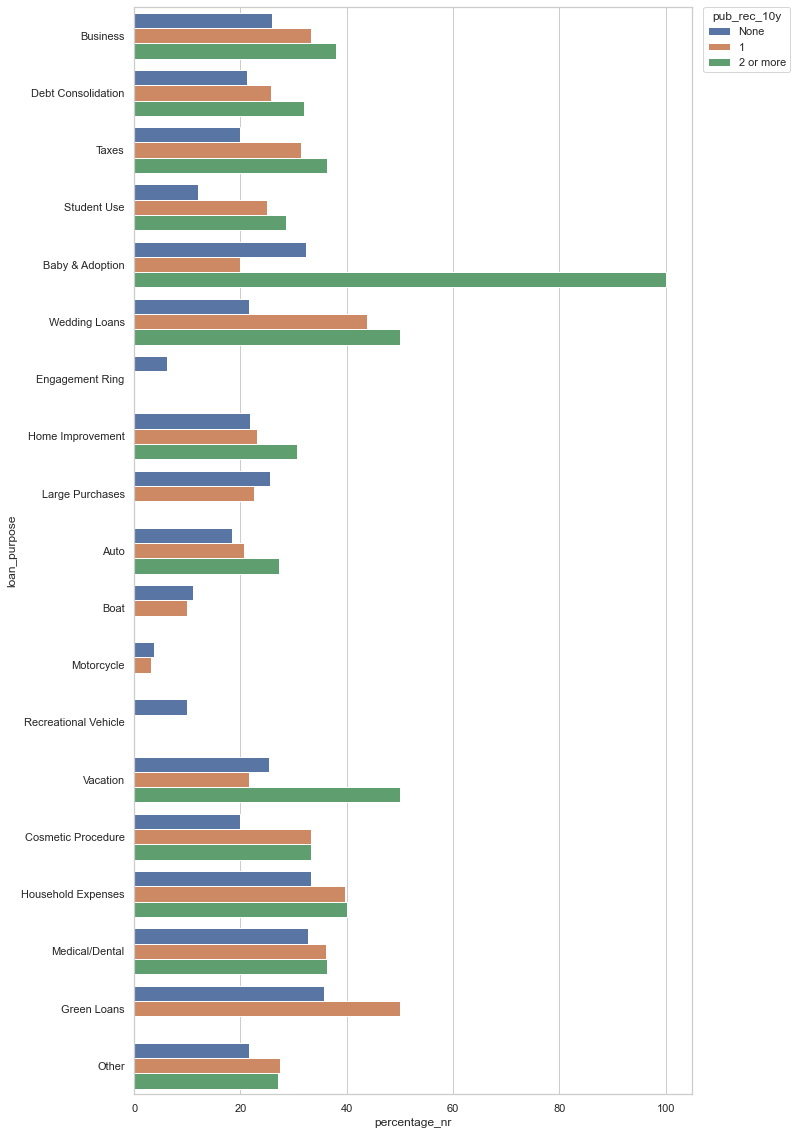

In [405]:
repaid_props_by2vars_x(completed_09_01, 'pub_rec_10y')

The effect of the predictor "sum of derogatory public records for the past 10 years" seems to interfere with the effect of the loan purpose category (the linear effect if more or less pronounced in the different loan purpose categories). 

#### 13) BankcardUtilization x loan purpose x loan outcome
[back to table of contents](#contents)

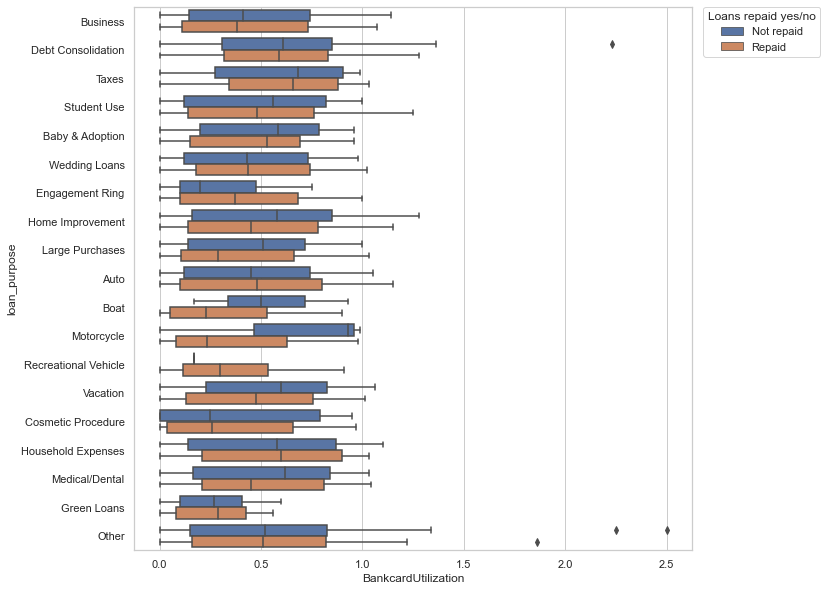

In [406]:
purpose_boxpl(completed_09_01, 'BankcardUtilization')

# 'card_util_rate' ordinal:
[back to table of contents](#contents)

card_util_rate        loan_purpose   repaid_yn  proportion_not_repaid  \
1                0%            Business  Not repaid                  0.345   
3                0%  Debt Consolidation  Not repaid                  0.368   
5                0%               Taxes  Not repaid                  0.250   
7                0%         Student Use  Not repaid                  0.174   
9                0%     Baby & Adoption  Not repaid                  0.286   
..              ...                 ...         ...                    ...   
191  100% or higher                Auto  Not repaid                  0.316   
193  100% or higher            Vacation  Not repaid                  0.333   
195  100% or higher  Household Expenses  Not repaid                  0.400   
197  100% or higher      Medical/Dental  Not repaid                  0.182   
199  100% or higher               Other  Not repaid                  0.299   

     percentage_nr  
1           34.524  
3           36.814  
5           25.000  
7           17.391  
9           28.571  
..             ...  
191         31.579  
193         33.333  
195         40.000  
197         18.182  
199         29.870  

[93 rows x 5 columns]

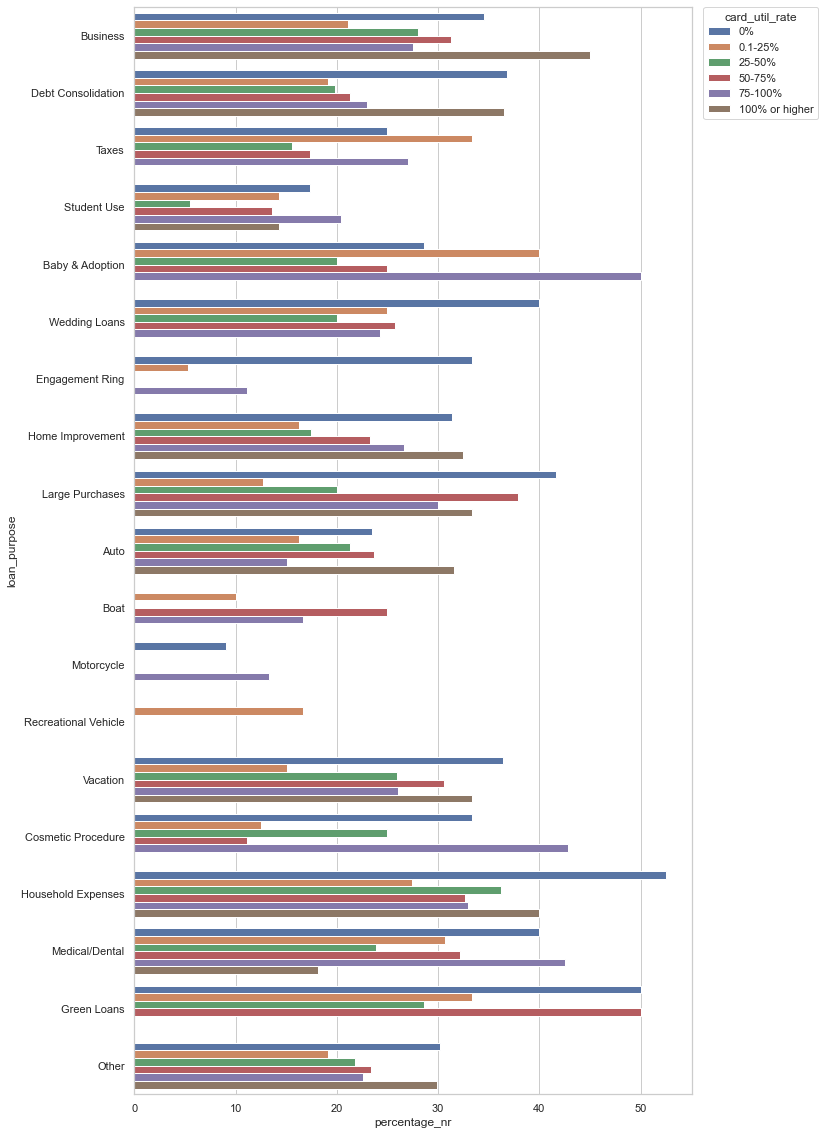

In [407]:
repaid_props_by2vars_x(completed_09_01, 'card_util_rate')

#### 14) credit_history_months x loan purpose x loan outcome
[back to table of contents](#contents)

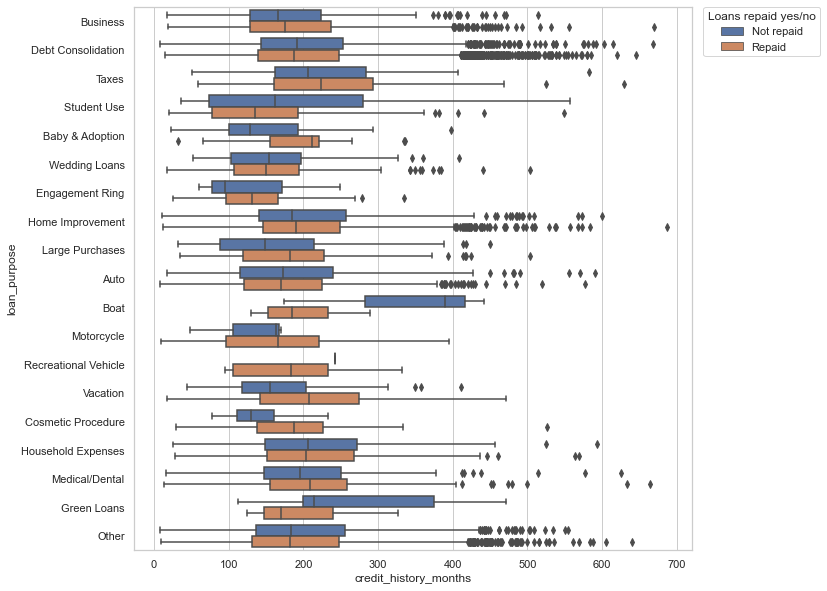

In [408]:
purpose_boxpl(completed_09_01, 'credit_history_months')

The credit history lenght variable contains positive outliers in most categories of loan purpose. There is no clear trend regarding the outcome variable, repaid vs. unrepaid loans.

#### 15) DebtToIncomeRatio x loan purpose x loan outcome
[back to table of contents](#contents)

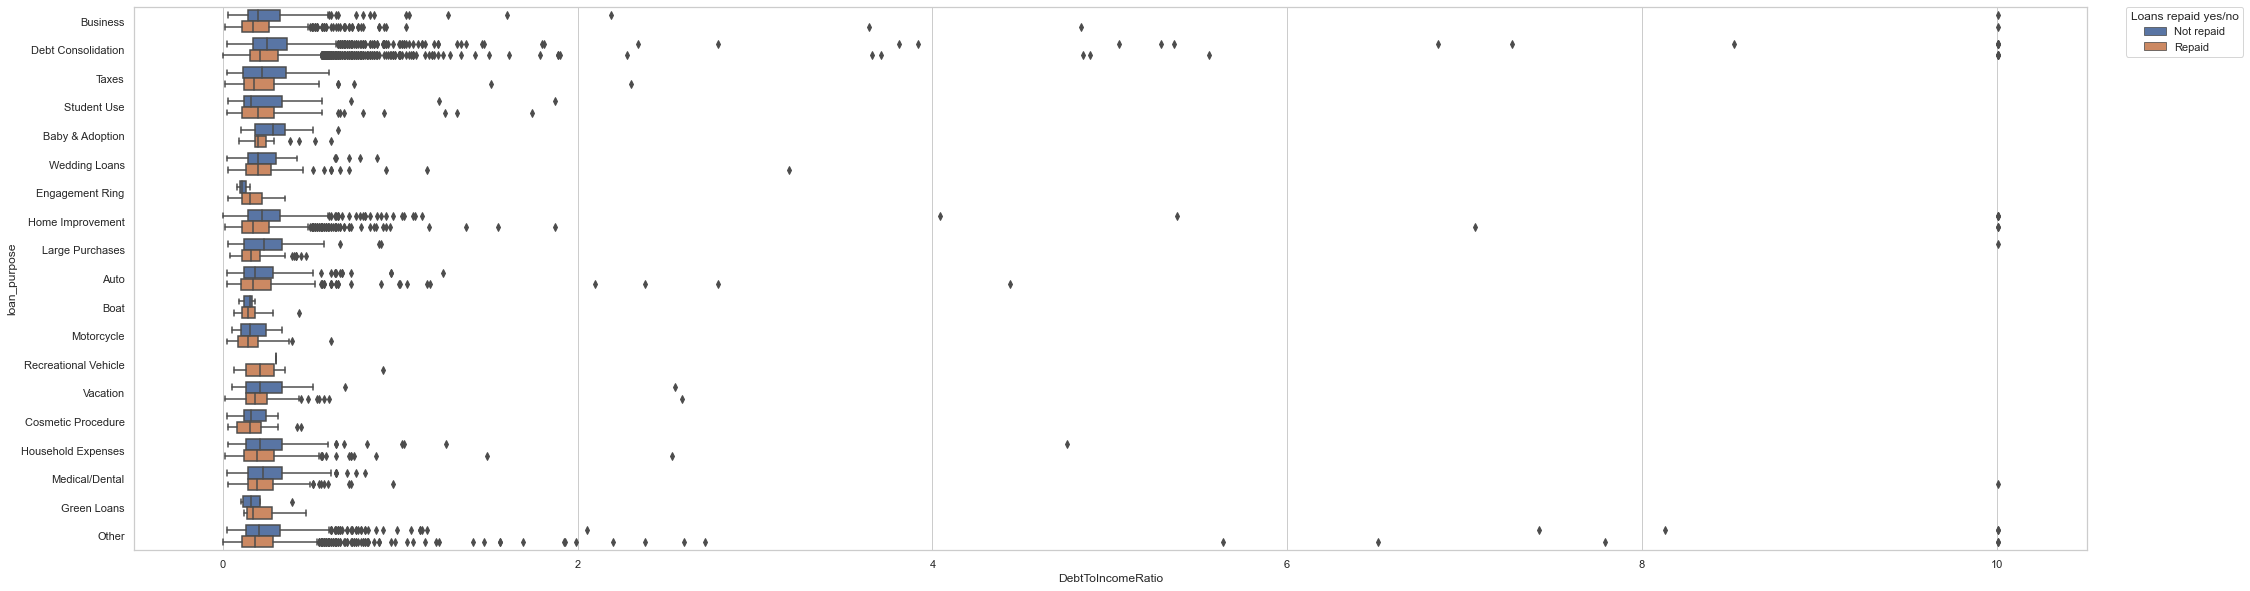

In [409]:
purpose_boxpl_long(completed_09_01, 'DebtToIncomeRatio')

# dti ordinal:
[back to table of contents](#contents)

dti_ordinal        loan_purpose   repaid_yn  proportion_not_repaid  \
1           0-10%            Business  Not repaid                  0.183   
3           0-10%  Debt Consolidation  Not repaid                  0.188   
5           0-10%               Taxes  Not repaid                  0.270   
7           0-10%         Student Use  Not repaid                  0.125   
10          0-10%       Wedding Loans  Not repaid                  0.353   
..            ...                 ...         ...                    ...   
217  200% or more    Home Improvement  Not repaid                  0.625   
219  200% or more     Large Purchases  Not repaid                  1.000   
221  200% or more            Vacation  Not repaid                  0.500   
223  200% or more  Household Expenses  Not repaid                  0.500   
227  200% or more               Other  Not repaid                  0.357   

     percentage_nr  
1           18.280  
3           18.786  
5           27.027  
7           12.500  
10          35.294  
..             ...  
217         62.500  
219        100.000  
221         50.000  
223         50.000  
227         35.714  

[105 rows x 5 columns]

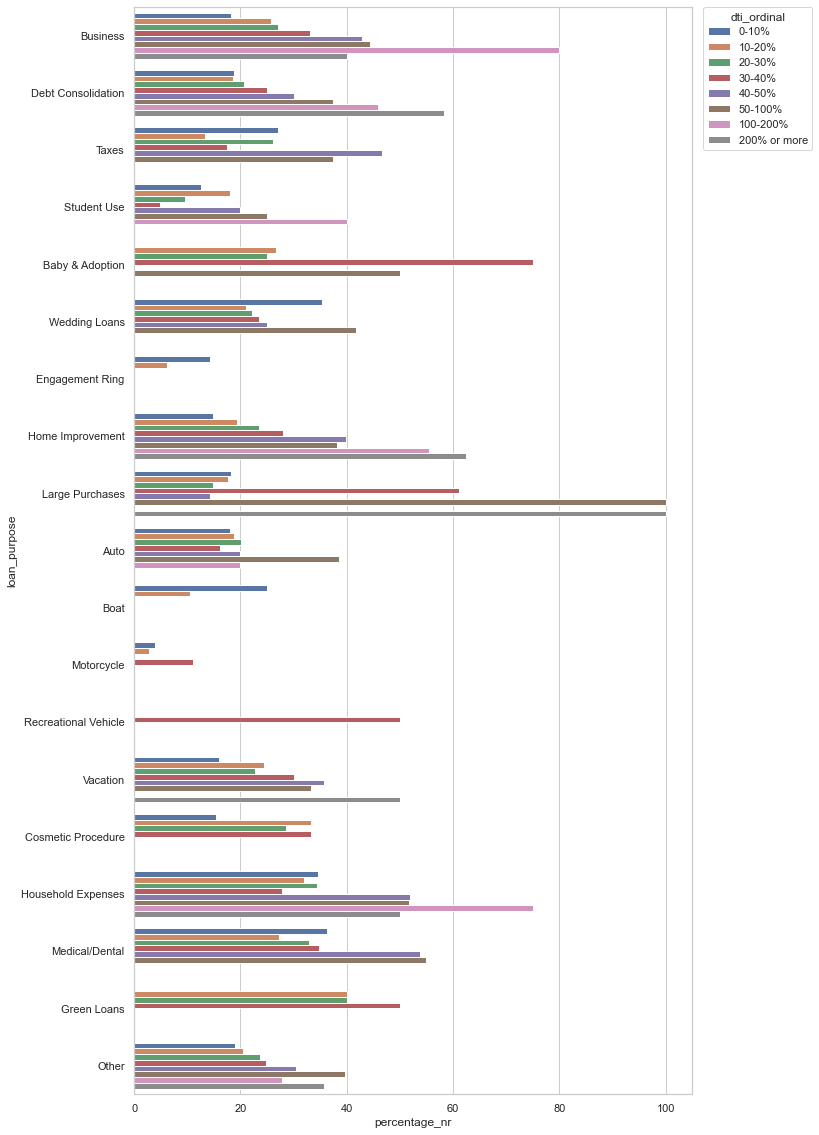

In [410]:
repaid_props_by2vars_x(completed_09_01, 'dti_ordinal')

When the cases are grouped by loan purpose and level of debt-to-income ratio, several groups have extremely high percentage of unrepaid loans: 1) loans for large puchases taken on by borrowers with DTI of 50-100% and 200% or more; 2) business loans given to borrowers with 100-200% DTI; 3) loans for household expenses given to borrowers with 100-200% DTI; 4) loans for home improvement lent to borrowers with 200% or more DTI. The is no consistent pattern of increase in the percentage of unrepaid loans with the increase of DTI. Rather, each loan purpose category has its own specific pattern, or, in other words, there is an interaction between the predictors loan purpose and DTI regarding their effect on the percentage of unrepaid loans.

## 8. Conclusions
<a id="conclusions"></a>
[back to table of contents](#contents)

Generally, a statistical model can be defined as a prediction model, an inference model,
or a combination of the two. A prediction model is focused on how to best predict an outcome 
based on a combination of predictors without looking too much into the relationships among the predictors.
An inference model, on the other hand, is also focused on the way predictors influence each other 
as well as on the influence of each separate predictor variable on the outcome 
[James, G. et al., 2021](https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics-ebook/dp/B01IBM7790) <a name="statlearning"><sup>5</sup></a> 

Including all of the predictor variables in a regression model of the Prosper data proved to be difficult.

The first issue we encountered was the variety of non-normal distributions of the continuous variables.
Furthermore, many of these variables were count data containing a lot of zeros.

The zeros together with multimodal and strongly skewed distributions (which were visibly not resembling a log-normal distribution)
precluded log-transformation. A possible solution would be to use a specific regression model for count data which is often encountered in life science <a name="countdata"><sup>4</sup></a>.

However, the aim of an exploratory study like this one is to gain insight into the relationships among variables.
We have built neighter a prediction nor an inference model here. Instead, continuous (and discrete) variables were transformed into ordinal variables
and the percentage of unrepaid loans was computed for each level of each variable. Plotting the percentage proved to be very illustrative
and allowed us to classify the variables as possible strong or weak predictors of loan outcome status.

The transformation was performed either by using percentiles or equal intervals, depending on the distribution of the rough data.

In addition, there are unordered categorical variables, such as loan purpose and homeownership which influence the ordered ones.   

Correlation measures such as Pearson or Spearman are not suitable for proving the relationship between loan outcome and predictors,
because of the assumption of linearity (Spearman uses ranked scores, but applies the same assumption to them). 
A chi-square test of independence proved that the hypothesis of independence of the outcome and most of the predictor variables can be rejected
(i.e., most chi-square tests were statistically significant, except two: loan outcome vs. credit history lenght and loan outcome vs. employment status duration).
However, in order to make complete sense of these results, a correction of the p-value for multiple comparisons should be applied.
Due to the exploratory aim of this study, we refrained from applying such correction.

The following classification into 'weak' and 'strong' predictors is based only on inspection of plots. 

#### Strong predictors:
- interest rate (quadratic, with a peak at approximately 30-32%)
- 7-level rating or 'Prosper Rating' (linear)
- 10-level rating or 'Prosper Score' (could be interpreted as linear, quadratic or cubic)
- customer credit rating by a professional credit rating agency (linear)
- loan term (with three categories, 12, 36, and 60 months, trend linear or exponential)
- income range (linear)
- sum of derogatory public records for the last 10 years (linear)
- sum of derogatory public records for the last 12 months (there is a difference between the two categories)
- debt-to-income ratio (could be interpreted as linear or cubic)

#### Weak predictors:
- loan amount (could be interpreted as quadratic, probably moderated by other variables such as purpose, income and debt-to-income ratio)
- employment status duration (default rate seems to grow with this variable, however the trend is not clear)
- homeownership (very small difference in default rate between the categories, possibly moderated by other variables)
- borrower credit history (default rate seems to grow from a certain value of this variable onward)
- number of current credit lines (one value is associated with a much higher default rate than the rest: zero)
- number of open credit lines (the same as current credit lines)
- sum of loans for the last 7 years (seemingly linear, but very weak)
- number of open revolving accounts (one value is associated with a much higher default rate than the rest: zero)
- open revolving monthly payment (same as open revolving accounts)
- revolving utilization or 'Bankcard Utilization' (two values are associated with a much higher default rate than the rest: 0% and 100% or higher)
- number of current delinquencies on loans (possibly quadratic with peak at 3-5 delinquencies)
- amount delinquent of loans (possibly quadratic with a peak in the category \\$352-3,040)
- sum of delinquencies for the last 7 years (no obvious trend)
- sum of inquiries by creditors for the last 6 months (one value is associated with a much higher default rate than the rest: 7 or more inquiries)
- total sum of inquiries by creditors (one value is associated with a much higher default rate than the rest: 20 or more inquiries) 

#### Unordered categorical variables:
- loan purpose (some categories have very low default rates, while others have much higher ones,
which is why we also investigated the combination between loan purpose and other predictors)

Strong predictors of default would be redundant in a prediction model, especially the different credit rating variables (all of which are strongly correlated to the interest rate, as theoretical models propose). Deciding which of them to include into a model would go beyond the score of this discussion. The 'weak' predictors, on the other hand, could have important influence as part of a regression model. A necessary preparatory step of such a model would be to decide on a suitable transformation method.
Unordered categorical variables, as, for instance, the loan purpose should also be included in a prediction model. Plotting the combinations of loan purpose with other variables showed that certain categories of loan purpose are clearly distinct in terms of default rate, interest rate, loan size, income and so forth. 


<sup>[4](#countdata)</sup> [How to Deal with Count Data](https://pubmed.ncbi.nlm.nih.gov/34104569/)

<sup>[5](#statlearning)</sup> [James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An introduction to statistical learning. New York: Springer.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0139427)